In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [3]:
latent_dim = 100
learning_rate = 1e-3
batch_size = 128
epochs = 20
kl_weight = 0.000075


In [4]:
class VAE(nn.Module):
    def __init__(self, latent_dim=100):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1),  # [B, 32, 16, 16]
            nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2, 1),  # [B, 64, 8, 8]
            nn.ReLU(),
            nn.Conv2d(64, 128, 4, 2, 1),  # [B, 128, 4, 4]
            nn.ReLU(),
        )
        self.flatten = nn.Flatten()
        self.fc_mu = nn.Linear(128*4*4, latent_dim)
        self.fc_logvar = nn.Linear(128*4*4, latent_dim)
        self.fc_decode = nn.Linear(latent_dim, 128*4*4)

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, 4, 2, 1),  # [B, 64, 8, 8]
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 4, 2, 1),  # [B, 32, 16, 16]
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 4, 2, 1),   # [B, 3, 32, 32]
            nn.Sigmoid()
        )

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x):
        x_enc = self.encoder(x)
        x_flat = self.flatten(x_enc)
        mu = self.fc_mu(x_flat)
        logvar = self.fc_logvar(x_flat)
        z = self.reparameterize(mu, logvar)
        x_dec = self.fc_decode(z).view(-1, 128, 4, 4)
        recon = self.decoder(x_dec)
        return recon, mu, logvar

In [5]:
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = criterion(recon_x, x)
    kl_loss = torch.sum(-0.5 * (1 + logvar - mu.pow(2) - logvar.exp()))
    total_loss = recon_loss + kl_weight * kl_loss
    return total_loss, recon_loss, kl_loss

#### latent ndims = 2 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.52it/s]


Epoch [1/100] Train Loss: 126.4797
Epoch [1/100] Test Loss: 113.8462
✅ Best model saved at epoch 1 with test loss: 113.8462


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.85it/s]


Epoch [2/100] Train Loss: 112.8583
Epoch [2/100] Test Loss: 113.0031
✅ Best model saved at epoch 2 with test loss: 113.0031


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.96it/s]


Epoch [3/100] Train Loss: 112.3727
Epoch [3/100] Test Loss: 112.2206
✅ Best model saved at epoch 3 with test loss: 112.2206


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.47it/s]


Epoch [4/100] Train Loss: 112.0955
Epoch [4/100] Test Loss: 112.0228
✅ Best model saved at epoch 4 with test loss: 112.0228


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.59it/s]


Epoch [5/100] Train Loss: 111.8298
Epoch [5/100] Test Loss: 111.6712
✅ Best model saved at epoch 5 with test loss: 111.6712


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.87it/s]


Epoch [6/100] Train Loss: 111.5558
Epoch [6/100] Test Loss: 111.8286


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.60it/s]


Epoch [7/100] Train Loss: 111.4000
Epoch [7/100] Test Loss: 112.2883


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.65it/s]


Epoch [8/100] Train Loss: 111.1486
Epoch [8/100] Test Loss: 110.9701
✅ Best model saved at epoch 8 with test loss: 110.9701


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.42it/s]


Epoch [9/100] Train Loss: 110.9661
Epoch [9/100] Test Loss: 110.9848


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.97it/s]


Epoch [10/100] Train Loss: 110.9375
Epoch [10/100] Test Loss: 110.5659
✅ Best model saved at epoch 10 with test loss: 110.5659


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [11/100] Train Loss: 110.6787
Epoch [11/100] Test Loss: 110.6535


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.26it/s]


Epoch [12/100] Train Loss: 110.6440
Epoch [12/100] Test Loss: 112.1291


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.63it/s]


Epoch [13/100] Train Loss: 110.2005
Epoch [13/100] Test Loss: 111.1352


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.55it/s]


Epoch [14/100] Train Loss: 110.2395
Epoch [14/100] Test Loss: 109.9528
✅ Best model saved at epoch 14 with test loss: 109.9528


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.75it/s]


Epoch [15/100] Train Loss: 110.4200
Epoch [15/100] Test Loss: 110.3860


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.40it/s]


Epoch [16/100] Train Loss: 109.9319
Epoch [16/100] Test Loss: 110.2112


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.48it/s]


Epoch [17/100] Train Loss: 110.3443
Epoch [17/100] Test Loss: 111.9056


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.35it/s]


Epoch [18/100] Train Loss: 109.9509
Epoch [18/100] Test Loss: 108.9289
✅ Best model saved at epoch 18 with test loss: 108.9289


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.59it/s]


Epoch [19/100] Train Loss: 109.6563
Epoch [19/100] Test Loss: 109.5732


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.28it/s]


Epoch [20/100] Train Loss: 110.0138
Epoch [20/100] Test Loss: 110.1024


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.74it/s]


Epoch [21/100] Train Loss: 109.7653
Epoch [21/100] Test Loss: 109.8643


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.13it/s]


Epoch [22/100] Train Loss: 109.3699
Epoch [22/100] Test Loss: 109.1709


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.15it/s]


Epoch [23/100] Train Loss: 109.5195
Epoch [23/100] Test Loss: 110.1736


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.87it/s]


Epoch [24/100] Train Loss: 109.4313
Epoch [24/100] Test Loss: 109.9816


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.75it/s]


Epoch [25/100] Train Loss: 109.3564
Epoch [25/100] Test Loss: 108.6081
✅ Best model saved at epoch 25 with test loss: 108.6081


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [26/100] Train Loss: 109.5602
Epoch [26/100] Test Loss: 110.1071


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.99it/s]


Epoch [27/100] Train Loss: 109.1518
Epoch [27/100] Test Loss: 109.0107


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.39it/s]


Epoch [28/100] Train Loss: 109.1919
Epoch [28/100] Test Loss: 109.2117


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.50it/s]


Epoch [29/100] Train Loss: 109.3751
Epoch [29/100] Test Loss: 109.8133


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.34it/s]


Epoch [30/100] Train Loss: 109.1998
Epoch [30/100] Test Loss: 111.5511


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.78it/s]


Epoch [31/100] Train Loss: 109.1182
Epoch [31/100] Test Loss: 108.7608


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.87it/s]


Epoch [32/100] Train Loss: 109.2769
Epoch [32/100] Test Loss: 109.0557


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.53it/s]


Epoch [33/100] Train Loss: 108.5538
Epoch [33/100] Test Loss: 108.0768
✅ Best model saved at epoch 33 with test loss: 108.0768


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.73it/s]


Epoch [34/100] Train Loss: 109.0312
Epoch [34/100] Test Loss: 108.9882


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.69it/s]


Epoch [35/100] Train Loss: 110.2022
Epoch [35/100] Test Loss: 109.0565


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.63it/s]


Epoch [36/100] Train Loss: 108.6286
Epoch [36/100] Test Loss: 109.0129


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.52it/s]


Epoch [37/100] Train Loss: 109.2849
Epoch [37/100] Test Loss: 109.8359


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.24it/s]


Epoch [38/100] Train Loss: 108.6704
Epoch [38/100] Test Loss: 109.7228


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.02it/s]


Epoch [39/100] Train Loss: 108.5903
Epoch [39/100] Test Loss: 109.6144


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.10it/s]


Epoch [40/100] Train Loss: 109.2265
Epoch [40/100] Test Loss: 107.9116
✅ Best model saved at epoch 40 with test loss: 107.9116


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [41/100] Train Loss: 109.2209
Epoch [41/100] Test Loss: 108.9685


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [42/100] Train Loss: 112.3822
Epoch [42/100] Test Loss: 114.2034


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.93it/s]


Epoch [43/100] Train Loss: 113.5073
Epoch [43/100] Test Loss: 112.8928


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.19it/s]


Epoch [44/100] Train Loss: 112.7516
Epoch [44/100] Test Loss: 112.7301


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.87it/s]


Epoch [45/100] Train Loss: 112.3206
Epoch [45/100] Test Loss: 112.3551


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [46/100] Train Loss: 111.9792
Epoch [46/100] Test Loss: 112.0396


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.15it/s]


Epoch [47/100] Train Loss: 111.6720
Epoch [47/100] Test Loss: 111.8980


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.12it/s]


Epoch [48/100] Train Loss: 111.5068
Epoch [48/100] Test Loss: 111.2228


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.33it/s]


Epoch [49/100] Train Loss: 111.3687
Epoch [49/100] Test Loss: 111.2677


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.17it/s]


Epoch [50/100] Train Loss: 111.1544
Epoch [50/100] Test Loss: 111.4478


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.56it/s]


Epoch [51/100] Train Loss: 111.0839
Epoch [51/100] Test Loss: 110.9365


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.99it/s]


Epoch [52/100] Train Loss: 110.8441
Epoch [52/100] Test Loss: 111.0772


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.91it/s]


Epoch [53/100] Train Loss: 110.8484
Epoch [53/100] Test Loss: 112.0076


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.81it/s]


Epoch [54/100] Train Loss: 110.6151
Epoch [54/100] Test Loss: 110.6216


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.92it/s]


Epoch [55/100] Train Loss: 110.5260
Epoch [55/100] Test Loss: 110.5933
🚦🚦🚦 Early stopping triggered 🚦


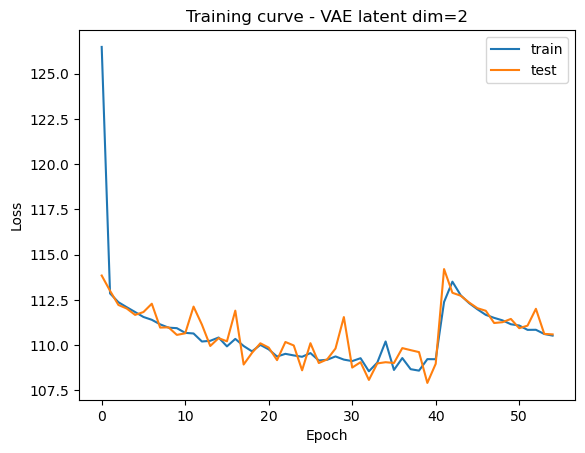

#### latent ndims = 4 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.67it/s]


Epoch [1/100] Train Loss: 109.0847
Epoch [1/100] Test Loss: 93.6991
✅ Best model saved at epoch 1 with test loss: 93.6991


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.17it/s]


Epoch [2/100] Train Loss: 93.2041
Epoch [2/100] Test Loss: 92.8223
✅ Best model saved at epoch 2 with test loss: 92.8223


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.60it/s]


Epoch [3/100] Train Loss: 92.4502
Epoch [3/100] Test Loss: 91.7229
✅ Best model saved at epoch 3 with test loss: 91.7229


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.92it/s]


Epoch [4/100] Train Loss: 91.5894
Epoch [4/100] Test Loss: 90.9235
✅ Best model saved at epoch 4 with test loss: 90.9235


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.73it/s]


Epoch [5/100] Train Loss: 90.9245
Epoch [5/100] Test Loss: 90.5847
✅ Best model saved at epoch 5 with test loss: 90.5847


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.27it/s]


Epoch [6/100] Train Loss: 90.4440
Epoch [6/100] Test Loss: 90.1837
✅ Best model saved at epoch 6 with test loss: 90.1837


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.36it/s]


Epoch [7/100] Train Loss: 90.1737
Epoch [7/100] Test Loss: 89.9860
✅ Best model saved at epoch 7 with test loss: 89.9860


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [8/100] Train Loss: 89.9422
Epoch [8/100] Test Loss: 90.0173


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.38it/s]


Epoch [9/100] Train Loss: 89.7652
Epoch [9/100] Test Loss: 89.6811
✅ Best model saved at epoch 9 with test loss: 89.6811


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [10/100] Train Loss: 89.6009
Epoch [10/100] Test Loss: 89.6752
✅ Best model saved at epoch 10 with test loss: 89.6752


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.04it/s]


Epoch [11/100] Train Loss: 89.4135
Epoch [11/100] Test Loss: 89.5943
✅ Best model saved at epoch 11 with test loss: 89.5943


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.81it/s]


Epoch [12/100] Train Loss: 89.2984
Epoch [12/100] Test Loss: 89.3338
✅ Best model saved at epoch 12 with test loss: 89.3338


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.35it/s]


Epoch [13/100] Train Loss: 89.1499
Epoch [13/100] Test Loss: 89.7809


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.33it/s]


Epoch [14/100] Train Loss: 89.0561
Epoch [14/100] Test Loss: 89.1668
✅ Best model saved at epoch 14 with test loss: 89.1668


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [15/100] Train Loss: 88.9119
Epoch [15/100] Test Loss: 89.3613


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.23it/s]


Epoch [16/100] Train Loss: 88.7983
Epoch [16/100] Test Loss: 89.2637


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [17/100] Train Loss: 88.7349
Epoch [17/100] Test Loss: 89.6743


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.56it/s]


Epoch [18/100] Train Loss: 88.6205
Epoch [18/100] Test Loss: 89.2219


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.49it/s]


Epoch [19/100] Train Loss: 88.5891
Epoch [19/100] Test Loss: 89.5234


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.05it/s]


Epoch [20/100] Train Loss: 88.3915
Epoch [20/100] Test Loss: 89.2079


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [21/100] Train Loss: 88.2794
Epoch [21/100] Test Loss: 89.2436


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.18it/s]


Epoch [22/100] Train Loss: 88.2077
Epoch [22/100] Test Loss: 89.2776


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.10it/s]


Epoch [23/100] Train Loss: 88.2087
Epoch [23/100] Test Loss: 89.3124


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.43it/s]


Epoch [24/100] Train Loss: 88.0520
Epoch [24/100] Test Loss: 89.4149


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.81it/s]


Epoch [25/100] Train Loss: 87.9907
Epoch [25/100] Test Loss: 89.3763


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.27it/s]


Epoch [26/100] Train Loss: 87.8634
Epoch [26/100] Test Loss: 89.3841


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.49it/s]


Epoch [27/100] Train Loss: 87.7883
Epoch [27/100] Test Loss: 89.0737
✅ Best model saved at epoch 27 with test loss: 89.0737


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.14it/s]


Epoch [28/100] Train Loss: 87.6974
Epoch [28/100] Test Loss: 89.1519


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.44it/s]


Epoch [29/100] Train Loss: 87.5893
Epoch [29/100] Test Loss: 89.1672


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.64it/s]


Epoch [30/100] Train Loss: 87.5722
Epoch [30/100] Test Loss: 89.0852


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [31/100] Train Loss: 87.4320
Epoch [31/100] Test Loss: 89.3847


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [32/100] Train Loss: 87.3385
Epoch [32/100] Test Loss: 89.2062


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.62it/s]


Epoch [33/100] Train Loss: 87.2475
Epoch [33/100] Test Loss: 89.7202


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.20it/s]


Epoch [34/100] Train Loss: 87.1731
Epoch [34/100] Test Loss: 89.5458


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.81it/s]


Epoch [35/100] Train Loss: 87.1308
Epoch [35/100] Test Loss: 89.7123


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.75it/s]


Epoch [36/100] Train Loss: 87.0753
Epoch [36/100] Test Loss: 89.3053


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.44it/s]


Epoch [37/100] Train Loss: 86.9654
Epoch [37/100] Test Loss: 89.7921


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.49it/s]


Epoch [38/100] Train Loss: 86.8887
Epoch [38/100] Test Loss: 90.0817


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.45it/s]


Epoch [39/100] Train Loss: 86.8729
Epoch [39/100] Test Loss: 89.5226


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.23it/s]


Epoch [40/100] Train Loss: 86.7849
Epoch [40/100] Test Loss: 89.6122


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.73it/s]


Epoch [41/100] Train Loss: 86.7202
Epoch [41/100] Test Loss: 89.4818


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.30it/s]


Epoch [42/100] Train Loss: 86.6259
Epoch [42/100] Test Loss: 89.4037
🚦🚦🚦 Early stopping triggered 🚦


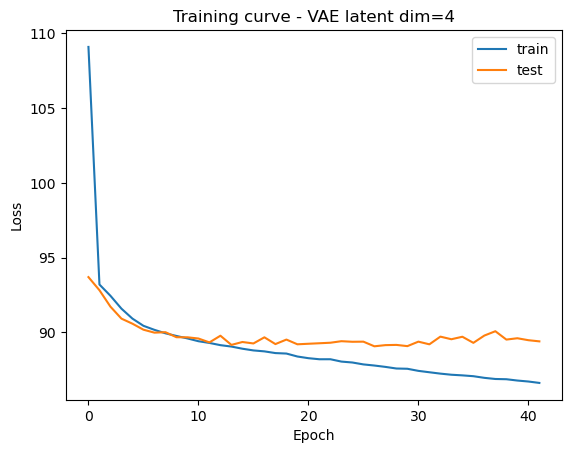

#### latent ndims = 6 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.72it/s]


Epoch [1/100] Train Loss: 94.0225
Epoch [1/100] Test Loss: 82.3868
✅ Best model saved at epoch 1 with test loss: 82.3868


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.64it/s]


Epoch [2/100] Train Loss: 81.2540
Epoch [2/100] Test Loss: 80.5995
✅ Best model saved at epoch 2 with test loss: 80.5995


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.27it/s]


Epoch [3/100] Train Loss: 79.8676
Epoch [3/100] Test Loss: 79.8351
✅ Best model saved at epoch 3 with test loss: 79.8351


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.15it/s]


Epoch [4/100] Train Loss: 79.1816
Epoch [4/100] Test Loss: 79.0130
✅ Best model saved at epoch 4 with test loss: 79.0130


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [5/100] Train Loss: 78.6608
Epoch [5/100] Test Loss: 78.5473
✅ Best model saved at epoch 5 with test loss: 78.5473


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.86it/s]


Epoch [6/100] Train Loss: 78.2361
Epoch [6/100] Test Loss: 78.2940
✅ Best model saved at epoch 6 with test loss: 78.2940


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [7/100] Train Loss: 77.9711
Epoch [7/100] Test Loss: 78.0840
✅ Best model saved at epoch 7 with test loss: 78.0840


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.50it/s]


Epoch [8/100] Train Loss: 77.6538
Epoch [8/100] Test Loss: 78.0327
✅ Best model saved at epoch 8 with test loss: 78.0327


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.63it/s]


Epoch [9/100] Train Loss: 77.4350
Epoch [9/100] Test Loss: 77.8049
✅ Best model saved at epoch 9 with test loss: 77.8049


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [10/100] Train Loss: 77.2118
Epoch [10/100] Test Loss: 77.6520
✅ Best model saved at epoch 10 with test loss: 77.6520


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.65it/s]


Epoch [11/100] Train Loss: 77.0769
Epoch [11/100] Test Loss: 77.7349


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.70it/s]


Epoch [12/100] Train Loss: 76.9205
Epoch [12/100] Test Loss: 77.5188
✅ Best model saved at epoch 12 with test loss: 77.5188


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.08it/s]


Epoch [13/100] Train Loss: 76.7649
Epoch [13/100] Test Loss: 77.5531


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.91it/s]


Epoch [14/100] Train Loss: 76.5898
Epoch [14/100] Test Loss: 77.3486
✅ Best model saved at epoch 14 with test loss: 77.3486


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.32it/s]


Epoch [15/100] Train Loss: 76.4886
Epoch [15/100] Test Loss: 77.4073


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.63it/s]


Epoch [16/100] Train Loss: 76.3891
Epoch [16/100] Test Loss: 77.3002
✅ Best model saved at epoch 16 with test loss: 77.3002


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.56it/s]


Epoch [17/100] Train Loss: 76.2342
Epoch [17/100] Test Loss: 77.4136


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.69it/s]


Epoch [18/100] Train Loss: 76.1162
Epoch [18/100] Test Loss: 77.2721
✅ Best model saved at epoch 18 with test loss: 77.2721


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.05it/s]


Epoch [19/100] Train Loss: 76.0249
Epoch [19/100] Test Loss: 77.4212


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.33it/s]


Epoch [20/100] Train Loss: 75.9208
Epoch [20/100] Test Loss: 77.1758
✅ Best model saved at epoch 20 with test loss: 77.1758


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.82it/s]


Epoch [21/100] Train Loss: 75.8398
Epoch [21/100] Test Loss: 77.1974


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.38it/s]


Epoch [22/100] Train Loss: 75.7409
Epoch [22/100] Test Loss: 77.4654


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.49it/s]


Epoch [23/100] Train Loss: 75.6196
Epoch [23/100] Test Loss: 77.1414
✅ Best model saved at epoch 23 with test loss: 77.1414


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.12it/s]


Epoch [24/100] Train Loss: 75.5199
Epoch [24/100] Test Loss: 77.2282


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.70it/s]


Epoch [25/100] Train Loss: 75.4560
Epoch [25/100] Test Loss: 77.5685


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.94it/s]


Epoch [26/100] Train Loss: 75.3668
Epoch [26/100] Test Loss: 77.1388
✅ Best model saved at epoch 26 with test loss: 77.1388


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.15it/s]


Epoch [27/100] Train Loss: 75.2835
Epoch [27/100] Test Loss: 77.5892


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.84it/s]


Epoch [28/100] Train Loss: 75.2124
Epoch [28/100] Test Loss: 77.7388


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.83it/s]


Epoch [29/100] Train Loss: 75.1690
Epoch [29/100] Test Loss: 77.2578


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.40it/s]


Epoch [30/100] Train Loss: 75.0409
Epoch [30/100] Test Loss: 77.4805


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [31/100] Train Loss: 74.9737
Epoch [31/100] Test Loss: 77.2967


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.13it/s]


Epoch [32/100] Train Loss: 74.9364
Epoch [32/100] Test Loss: 77.4830


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.51it/s]


Epoch [33/100] Train Loss: 74.8808
Epoch [33/100] Test Loss: 77.2603


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.11it/s]


Epoch [34/100] Train Loss: 74.7881
Epoch [34/100] Test Loss: 77.4511


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.38it/s]


Epoch [35/100] Train Loss: 74.7503
Epoch [35/100] Test Loss: 77.4382


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.89it/s]


Epoch [36/100] Train Loss: 74.7028
Epoch [36/100] Test Loss: 77.4556


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [37/100] Train Loss: 74.5831
Epoch [37/100] Test Loss: 77.3705


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [38/100] Train Loss: 74.5380
Epoch [38/100] Test Loss: 77.8479


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.53it/s]


Epoch [39/100] Train Loss: 74.5633
Epoch [39/100] Test Loss: 77.8241


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.19it/s]


Epoch [40/100] Train Loss: 74.4590
Epoch [40/100] Test Loss: 77.6654


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.51it/s]


Epoch [41/100] Train Loss: 74.3407
Epoch [41/100] Test Loss: 77.6703
🚦🚦🚦 Early stopping triggered 🚦


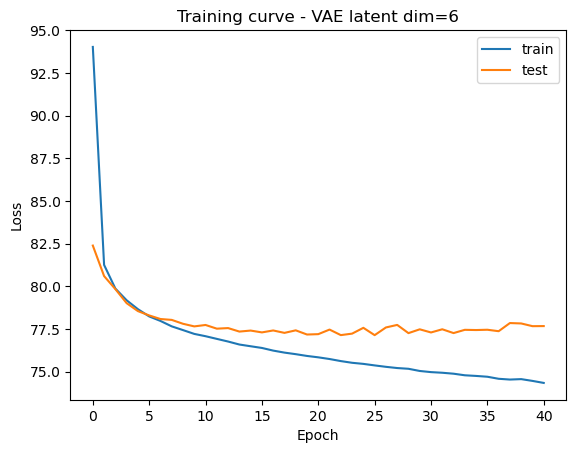

#### latent ndims = 8 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.52it/s]


Epoch [1/100] Train Loss: 91.3692
Epoch [1/100] Test Loss: 72.3431
✅ Best model saved at epoch 1 with test loss: 72.3431


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.88it/s]


Epoch [2/100] Train Loss: 71.6469
Epoch [2/100] Test Loss: 71.4704
✅ Best model saved at epoch 2 with test loss: 71.4704


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.46it/s]


Epoch [3/100] Train Loss: 70.7180
Epoch [3/100] Test Loss: 70.6700
✅ Best model saved at epoch 3 with test loss: 70.6700


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.40it/s]


Epoch [4/100] Train Loss: 70.2261
Epoch [4/100] Test Loss: 70.2255
✅ Best model saved at epoch 4 with test loss: 70.2255


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.67it/s]


Epoch [5/100] Train Loss: 69.7601
Epoch [5/100] Test Loss: 70.0227
✅ Best model saved at epoch 5 with test loss: 70.0227


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.18it/s]


Epoch [6/100] Train Loss: 69.4063
Epoch [6/100] Test Loss: 69.7037
✅ Best model saved at epoch 6 with test loss: 69.7037


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.46it/s]


Epoch [7/100] Train Loss: 69.1250
Epoch [7/100] Test Loss: 69.4940
✅ Best model saved at epoch 7 with test loss: 69.4940


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.62it/s]


Epoch [8/100] Train Loss: 68.9014
Epoch [8/100] Test Loss: 69.2099
✅ Best model saved at epoch 8 with test loss: 69.2099


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.70it/s]


Epoch [9/100] Train Loss: 68.7019
Epoch [9/100] Test Loss: 69.1454
✅ Best model saved at epoch 9 with test loss: 69.1454


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.18it/s]


Epoch [10/100] Train Loss: 68.4493
Epoch [10/100] Test Loss: 69.2475


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [11/100] Train Loss: 68.3523
Epoch [11/100] Test Loss: 68.8475
✅ Best model saved at epoch 11 with test loss: 68.8475


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [12/100] Train Loss: 68.1692
Epoch [12/100] Test Loss: 68.9447


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [13/100] Train Loss: 67.9855
Epoch [13/100] Test Loss: 68.8837


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.83it/s]


Epoch [14/100] Train Loss: 67.9018
Epoch [14/100] Test Loss: 68.7645
✅ Best model saved at epoch 14 with test loss: 68.7645


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.02it/s]


Epoch [15/100] Train Loss: 67.7692
Epoch [15/100] Test Loss: 68.5264
✅ Best model saved at epoch 15 with test loss: 68.5264


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.82it/s]


Epoch [16/100] Train Loss: 67.6563
Epoch [16/100] Test Loss: 68.4829
✅ Best model saved at epoch 16 with test loss: 68.4829


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.50it/s]


Epoch [17/100] Train Loss: 67.5640
Epoch [17/100] Test Loss: 68.4589
✅ Best model saved at epoch 17 with test loss: 68.4589


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.45it/s]


Epoch [18/100] Train Loss: 67.4116
Epoch [18/100] Test Loss: 68.4495
✅ Best model saved at epoch 18 with test loss: 68.4495


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.04it/s]


Epoch [19/100] Train Loss: 67.3588
Epoch [19/100] Test Loss: 68.4319
✅ Best model saved at epoch 19 with test loss: 68.4319


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.24it/s]


Epoch [20/100] Train Loss: 67.2592
Epoch [20/100] Test Loss: 68.6214


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [21/100] Train Loss: 67.1632
Epoch [21/100] Test Loss: 68.3995
✅ Best model saved at epoch 21 with test loss: 68.3995


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.93it/s]


Epoch [22/100] Train Loss: 67.0801
Epoch [22/100] Test Loss: 68.7799


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.03it/s]


Epoch [23/100] Train Loss: 67.0207
Epoch [23/100] Test Loss: 68.3485
✅ Best model saved at epoch 23 with test loss: 68.3485


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.36it/s]


Epoch [24/100] Train Loss: 66.9044
Epoch [24/100] Test Loss: 68.3099
✅ Best model saved at epoch 24 with test loss: 68.3099


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.82it/s]


Epoch [25/100] Train Loss: 66.8426
Epoch [25/100] Test Loss: 68.2753
✅ Best model saved at epoch 25 with test loss: 68.2753


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.12it/s]


Epoch [26/100] Train Loss: 66.7689
Epoch [26/100] Test Loss: 68.2658
✅ Best model saved at epoch 26 with test loss: 68.2658


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.17it/s]


Epoch [27/100] Train Loss: 66.7297
Epoch [27/100] Test Loss: 68.3933


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [28/100] Train Loss: 66.6354
Epoch [28/100] Test Loss: 68.2200
✅ Best model saved at epoch 28 with test loss: 68.2200


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [29/100] Train Loss: 66.5607
Epoch [29/100] Test Loss: 68.2685


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.52it/s]


Epoch [30/100] Train Loss: 66.5588
Epoch [30/100] Test Loss: 68.3259


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.37it/s]


Epoch [31/100] Train Loss: 66.4405
Epoch [31/100] Test Loss: 68.3922


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.72it/s]


Epoch [32/100] Train Loss: 66.3967
Epoch [32/100] Test Loss: 68.2215


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.12it/s]


Epoch [33/100] Train Loss: 66.3280
Epoch [33/100] Test Loss: 68.4003


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.60it/s]


Epoch [34/100] Train Loss: 66.2906
Epoch [34/100] Test Loss: 68.4850


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.96it/s]


Epoch [35/100] Train Loss: 66.2558
Epoch [35/100] Test Loss: 68.5409


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.71it/s]


Epoch [36/100] Train Loss: 66.1815
Epoch [36/100] Test Loss: 68.1823
✅ Best model saved at epoch 36 with test loss: 68.1823


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.41it/s]


Epoch [37/100] Train Loss: 66.1000
Epoch [37/100] Test Loss: 68.3868


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.90it/s]


Epoch [38/100] Train Loss: 66.1095
Epoch [38/100] Test Loss: 68.3171


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.78it/s]


Epoch [39/100] Train Loss: 66.0310
Epoch [39/100] Test Loss: 68.3968


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.81it/s]


Epoch [40/100] Train Loss: 65.9770
Epoch [40/100] Test Loss: 68.6783


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.70it/s]


Epoch [41/100] Train Loss: 65.9208
Epoch [41/100] Test Loss: 68.4993


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.54it/s]


Epoch [42/100] Train Loss: 65.8831
Epoch [42/100] Test Loss: 68.5182


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.06it/s]


Epoch [43/100] Train Loss: 65.8396
Epoch [43/100] Test Loss: 68.6344


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [44/100] Train Loss: 65.8040
Epoch [44/100] Test Loss: 68.5454


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.20it/s]


Epoch [45/100] Train Loss: 65.7444
Epoch [45/100] Test Loss: 68.6751


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.66it/s]


Epoch [46/100] Train Loss: 65.7278
Epoch [46/100] Test Loss: 68.5982


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.24it/s]


Epoch [47/100] Train Loss: 65.7035
Epoch [47/100] Test Loss: 68.6534


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.36it/s]


Epoch [48/100] Train Loss: 65.6533
Epoch [48/100] Test Loss: 68.5448


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.62it/s]


Epoch [49/100] Train Loss: 65.6091
Epoch [49/100] Test Loss: 68.5744


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.84it/s]


Epoch [50/100] Train Loss: 65.5766
Epoch [50/100] Test Loss: 68.6613


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.02it/s]


Epoch [51/100] Train Loss: 65.5247
Epoch [51/100] Test Loss: 68.7206
🚦🚦🚦 Early stopping triggered 🚦


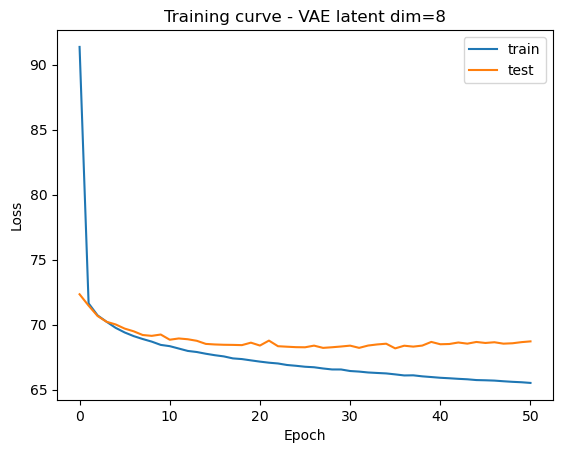

#### latent ndims = 10 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.04it/s]


Epoch [1/100] Train Loss: 84.8808
Epoch [1/100] Test Loss: 65.7773
✅ Best model saved at epoch 1 with test loss: 65.7773


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.15it/s]


Epoch [2/100] Train Loss: 64.7811
Epoch [2/100] Test Loss: 64.4900
✅ Best model saved at epoch 2 with test loss: 64.4900


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.85it/s]


Epoch [3/100] Train Loss: 63.9029
Epoch [3/100] Test Loss: 63.7799
✅ Best model saved at epoch 3 with test loss: 63.7799


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.55it/s]


Epoch [4/100] Train Loss: 63.4454
Epoch [4/100] Test Loss: 63.4784
✅ Best model saved at epoch 4 with test loss: 63.4784


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.42it/s]


Epoch [5/100] Train Loss: 63.0871
Epoch [5/100] Test Loss: 63.2514
✅ Best model saved at epoch 5 with test loss: 63.2514


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.75it/s]


Epoch [6/100] Train Loss: 62.8036
Epoch [6/100] Test Loss: 62.9108
✅ Best model saved at epoch 6 with test loss: 62.9108


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [7/100] Train Loss: 62.5602
Epoch [7/100] Test Loss: 62.9972


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.80it/s]


Epoch [8/100] Train Loss: 62.3323
Epoch [8/100] Test Loss: 62.7653
✅ Best model saved at epoch 8 with test loss: 62.7653


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [9/100] Train Loss: 62.1299
Epoch [9/100] Test Loss: 62.7262
✅ Best model saved at epoch 9 with test loss: 62.7262


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.61it/s]


Epoch [10/100] Train Loss: 61.9773
Epoch [10/100] Test Loss: 62.6554
✅ Best model saved at epoch 10 with test loss: 62.6554


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.33it/s]


Epoch [11/100] Train Loss: 61.8464
Epoch [11/100] Test Loss: 62.5625
✅ Best model saved at epoch 11 with test loss: 62.5625


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.65it/s]


Epoch [12/100] Train Loss: 61.6417
Epoch [12/100] Test Loss: 62.4268
✅ Best model saved at epoch 12 with test loss: 62.4268


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.90it/s]


Epoch [13/100] Train Loss: 61.5162
Epoch [13/100] Test Loss: 62.4789


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.07it/s]


Epoch [14/100] Train Loss: 61.4070
Epoch [14/100] Test Loss: 62.1687
✅ Best model saved at epoch 14 with test loss: 62.1687


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.82it/s]


Epoch [15/100] Train Loss: 61.3093
Epoch [15/100] Test Loss: 62.3975


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.92it/s]


Epoch [16/100] Train Loss: 61.1774
Epoch [16/100] Test Loss: 62.2967


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.62it/s]


Epoch [17/100] Train Loss: 61.0793
Epoch [17/100] Test Loss: 62.1037
✅ Best model saved at epoch 17 with test loss: 62.1037


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.57it/s]


Epoch [18/100] Train Loss: 61.0043
Epoch [18/100] Test Loss: 62.1849


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.66it/s]


Epoch [19/100] Train Loss: 60.9068
Epoch [19/100] Test Loss: 62.3568


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.52it/s]


Epoch [20/100] Train Loss: 60.8304
Epoch [20/100] Test Loss: 62.0354
✅ Best model saved at epoch 20 with test loss: 62.0354


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.21it/s]


Epoch [21/100] Train Loss: 60.7574
Epoch [21/100] Test Loss: 62.5045


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.64it/s]


Epoch [22/100] Train Loss: 60.6562
Epoch [22/100] Test Loss: 62.1599


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.55it/s]


Epoch [23/100] Train Loss: 60.5925
Epoch [23/100] Test Loss: 62.0145
✅ Best model saved at epoch 23 with test loss: 62.0145


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.20it/s]


Epoch [24/100] Train Loss: 60.5495
Epoch [24/100] Test Loss: 61.9484
✅ Best model saved at epoch 24 with test loss: 61.9484


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.69it/s]


Epoch [25/100] Train Loss: 60.4716
Epoch [25/100] Test Loss: 62.0747


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.98it/s]


Epoch [26/100] Train Loss: 60.3968
Epoch [26/100] Test Loss: 61.9857


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.31it/s]


Epoch [27/100] Train Loss: 60.3481
Epoch [27/100] Test Loss: 62.1970


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.63it/s]


Epoch [28/100] Train Loss: 60.2955
Epoch [28/100] Test Loss: 62.1532


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.99it/s]


Epoch [29/100] Train Loss: 60.2455
Epoch [29/100] Test Loss: 62.4160


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.93it/s]


Epoch [30/100] Train Loss: 60.1631
Epoch [30/100] Test Loss: 62.0876


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.29it/s]


Epoch [31/100] Train Loss: 60.1114
Epoch [31/100] Test Loss: 62.1380


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.81it/s]


Epoch [32/100] Train Loss: 60.0814
Epoch [32/100] Test Loss: 62.0947


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.50it/s]


Epoch [33/100] Train Loss: 60.0466
Epoch [33/100] Test Loss: 62.0703


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.97it/s]


Epoch [34/100] Train Loss: 59.9932
Epoch [34/100] Test Loss: 62.0446


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [35/100] Train Loss: 59.9032
Epoch [35/100] Test Loss: 62.2000


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.37it/s]


Epoch [36/100] Train Loss: 59.8703
Epoch [36/100] Test Loss: 62.0367


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.36it/s]


Epoch [37/100] Train Loss: 59.8563
Epoch [37/100] Test Loss: 62.0995


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.38it/s]


Epoch [38/100] Train Loss: 59.8013
Epoch [38/100] Test Loss: 62.1412


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.86it/s]


Epoch [39/100] Train Loss: 59.7717
Epoch [39/100] Test Loss: 62.0670
🚦🚦🚦 Early stopping triggered 🚦


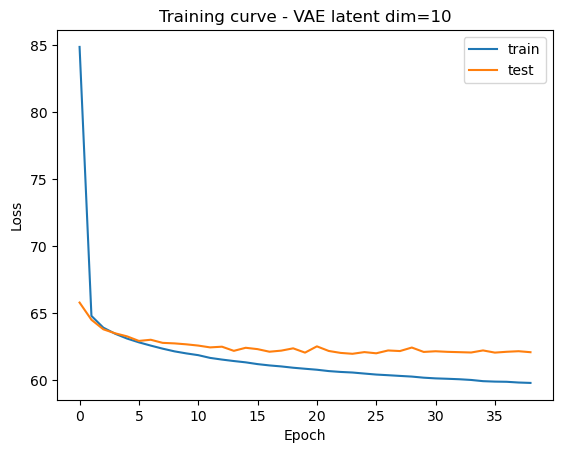

#### latent ndims = 15 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.86it/s]


Epoch [1/100] Train Loss: 84.1835
Epoch [1/100] Test Loss: 58.4645
✅ Best model saved at epoch 1 with test loss: 58.4645


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.36it/s]


Epoch [2/100] Train Loss: 55.3185
Epoch [2/100] Test Loss: 54.4268
✅ Best model saved at epoch 2 with test loss: 54.4268


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.40it/s]


Epoch [3/100] Train Loss: 53.9680
Epoch [3/100] Test Loss: 53.7654
✅ Best model saved at epoch 3 with test loss: 53.7654


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.12it/s]


Epoch [4/100] Train Loss: 53.3636
Epoch [4/100] Test Loss: 53.3349
✅ Best model saved at epoch 4 with test loss: 53.3349


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [5/100] Train Loss: 52.9519
Epoch [5/100] Test Loss: 53.4822


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.05it/s]


Epoch [6/100] Train Loss: 52.6797
Epoch [6/100] Test Loss: 52.9221
✅ Best model saved at epoch 6 with test loss: 52.9221


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.32it/s]


Epoch [7/100] Train Loss: 52.4043
Epoch [7/100] Test Loss: 52.7097
✅ Best model saved at epoch 7 with test loss: 52.7097


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.36it/s]


Epoch [8/100] Train Loss: 52.2220
Epoch [8/100] Test Loss: 52.5048
✅ Best model saved at epoch 8 with test loss: 52.5048


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.21it/s]


Epoch [9/100] Train Loss: 51.9703
Epoch [9/100] Test Loss: 52.4712
✅ Best model saved at epoch 9 with test loss: 52.4712


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.96it/s]


Epoch [10/100] Train Loss: 51.8387
Epoch [10/100] Test Loss: 52.3547
✅ Best model saved at epoch 10 with test loss: 52.3547


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.88it/s]


Epoch [11/100] Train Loss: 51.6578
Epoch [11/100] Test Loss: 52.3048
✅ Best model saved at epoch 11 with test loss: 52.3048


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.86it/s]


Epoch [12/100] Train Loss: 51.5176
Epoch [12/100] Test Loss: 52.1464
✅ Best model saved at epoch 12 with test loss: 52.1464


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.60it/s]


Epoch [13/100] Train Loss: 51.3981
Epoch [13/100] Test Loss: 52.0977
✅ Best model saved at epoch 13 with test loss: 52.0977


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.07it/s]


Epoch [14/100] Train Loss: 51.2585
Epoch [14/100] Test Loss: 52.4616


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.00it/s]


Epoch [15/100] Train Loss: 51.1097
Epoch [15/100] Test Loss: 51.9167
✅ Best model saved at epoch 15 with test loss: 51.9167


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.49it/s]


Epoch [16/100] Train Loss: 51.0244
Epoch [16/100] Test Loss: 51.9140
✅ Best model saved at epoch 16 with test loss: 51.9140


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.31it/s]


Epoch [17/100] Train Loss: 50.8990
Epoch [17/100] Test Loss: 51.9299


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.34it/s]


Epoch [18/100] Train Loss: 50.8094
Epoch [18/100] Test Loss: 51.9311


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.60it/s]


Epoch [19/100] Train Loss: 50.7867
Epoch [19/100] Test Loss: 52.0132


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.98it/s]


Epoch [20/100] Train Loss: 50.6578
Epoch [20/100] Test Loss: 51.7627
✅ Best model saved at epoch 20 with test loss: 51.7627


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.60it/s]


Epoch [21/100] Train Loss: 50.5857
Epoch [21/100] Test Loss: 51.7445
✅ Best model saved at epoch 21 with test loss: 51.7445


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.00it/s]


Epoch [22/100] Train Loss: 50.5533
Epoch [22/100] Test Loss: 51.7981


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.92it/s]


Epoch [23/100] Train Loss: 50.4825
Epoch [23/100] Test Loss: 51.7788


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [24/100] Train Loss: 50.4090
Epoch [24/100] Test Loss: 51.8208


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [25/100] Train Loss: 50.3644
Epoch [25/100] Test Loss: 51.6694
✅ Best model saved at epoch 25 with test loss: 51.6694


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [26/100] Train Loss: 50.3126
Epoch [26/100] Test Loss: 51.6971


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.98it/s]


Epoch [27/100] Train Loss: 50.2397
Epoch [27/100] Test Loss: 51.6461
✅ Best model saved at epoch 27 with test loss: 51.6461


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.14it/s]


Epoch [28/100] Train Loss: 50.2076
Epoch [28/100] Test Loss: 52.1273


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.87it/s]


Epoch [29/100] Train Loss: 50.1675
Epoch [29/100] Test Loss: 51.6299
✅ Best model saved at epoch 29 with test loss: 51.6299


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.89it/s]


Epoch [30/100] Train Loss: 50.1069
Epoch [30/100] Test Loss: 51.6821


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.13it/s]


Epoch [31/100] Train Loss: 50.0633
Epoch [31/100] Test Loss: 51.6655


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.55it/s]


Epoch [32/100] Train Loss: 50.0667
Epoch [32/100] Test Loss: 51.6643


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.22it/s]


Epoch [33/100] Train Loss: 49.9625
Epoch [33/100] Test Loss: 51.6750


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.15it/s]


Epoch [34/100] Train Loss: 49.9898
Epoch [34/100] Test Loss: 51.6726


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.02it/s]


Epoch [35/100] Train Loss: 49.9266
Epoch [35/100] Test Loss: 51.7970


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.11it/s]


Epoch [36/100] Train Loss: 49.9009
Epoch [36/100] Test Loss: 51.7916


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [37/100] Train Loss: 49.8702
Epoch [37/100] Test Loss: 51.6914


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.87it/s]


Epoch [38/100] Train Loss: 49.8440
Epoch [38/100] Test Loss: 51.6918


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.77it/s]


Epoch [39/100] Train Loss: 49.7832
Epoch [39/100] Test Loss: 51.8084


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [40/100] Train Loss: 49.7683
Epoch [40/100] Test Loss: 51.7085


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.03it/s]


Epoch [41/100] Train Loss: 49.7582
Epoch [41/100] Test Loss: 51.7732


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.67it/s]


Epoch [42/100] Train Loss: 49.7121
Epoch [42/100] Test Loss: 51.6637


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.76it/s]


Epoch [43/100] Train Loss: 49.6989
Epoch [43/100] Test Loss: 51.7649


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [44/100] Train Loss: 49.6556
Epoch [44/100] Test Loss: 51.7033
🚦🚦🚦 Early stopping triggered 🚦


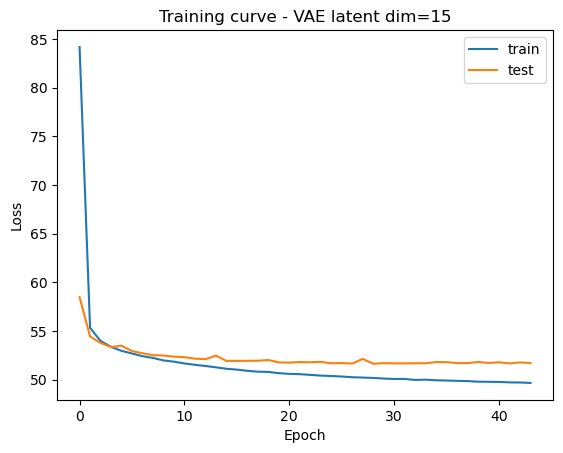

#### latent ndims = 20 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.69it/s]


Epoch [1/100] Train Loss: 82.7369
Epoch [1/100] Test Loss: 52.0326
✅ Best model saved at epoch 1 with test loss: 52.0326


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.68it/s]


Epoch [2/100] Train Loss: 49.3160
Epoch [2/100] Test Loss: 48.2380
✅ Best model saved at epoch 2 with test loss: 48.2380


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.70it/s]


Epoch [3/100] Train Loss: 47.8273
Epoch [3/100] Test Loss: 48.0387
✅ Best model saved at epoch 3 with test loss: 48.0387


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.54it/s]


Epoch [4/100] Train Loss: 47.1391
Epoch [4/100] Test Loss: 47.3029
✅ Best model saved at epoch 4 with test loss: 47.3029


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.24it/s]


Epoch [5/100] Train Loss: 46.6780
Epoch [5/100] Test Loss: 46.7599
✅ Best model saved at epoch 5 with test loss: 46.7599


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [6/100] Train Loss: 46.3467
Epoch [6/100] Test Loss: 46.9114


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.99it/s]


Epoch [7/100] Train Loss: 46.0498
Epoch [7/100] Test Loss: 46.2444
✅ Best model saved at epoch 7 with test loss: 46.2444


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [8/100] Train Loss: 45.8585
Epoch [8/100] Test Loss: 46.2378
✅ Best model saved at epoch 8 with test loss: 46.2378


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.47it/s]


Epoch [9/100] Train Loss: 45.5660
Epoch [9/100] Test Loss: 46.1222
✅ Best model saved at epoch 9 with test loss: 46.1222


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.98it/s]


Epoch [10/100] Train Loss: 45.3290
Epoch [10/100] Test Loss: 45.7367
✅ Best model saved at epoch 10 with test loss: 45.7367


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.98it/s]


Epoch [11/100] Train Loss: 45.1086
Epoch [11/100] Test Loss: 45.6325
✅ Best model saved at epoch 11 with test loss: 45.6325


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.32it/s]


Epoch [12/100] Train Loss: 44.9484
Epoch [12/100] Test Loss: 45.5312
✅ Best model saved at epoch 12 with test loss: 45.5312


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.88it/s]


Epoch [13/100] Train Loss: 44.7757
Epoch [13/100] Test Loss: 45.5134
✅ Best model saved at epoch 13 with test loss: 45.5134


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [14/100] Train Loss: 44.6100
Epoch [14/100] Test Loss: 45.3125
✅ Best model saved at epoch 14 with test loss: 45.3125


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.16it/s]


Epoch [15/100] Train Loss: 44.5205
Epoch [15/100] Test Loss: 45.2772
✅ Best model saved at epoch 15 with test loss: 45.2772


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.11it/s]


Epoch [16/100] Train Loss: 44.4182
Epoch [16/100] Test Loss: 45.3136


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.50it/s]


Epoch [17/100] Train Loss: 44.2761
Epoch [17/100] Test Loss: 45.2057
✅ Best model saved at epoch 17 with test loss: 45.2057


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [18/100] Train Loss: 44.1898
Epoch [18/100] Test Loss: 45.1287
✅ Best model saved at epoch 18 with test loss: 45.1287


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [19/100] Train Loss: 44.1234
Epoch [19/100] Test Loss: 45.1490


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.68it/s]


Epoch [20/100] Train Loss: 44.0459
Epoch [20/100] Test Loss: 45.2047


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.94it/s]


Epoch [21/100] Train Loss: 43.9757
Epoch [21/100] Test Loss: 45.1358


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.50it/s]


Epoch [22/100] Train Loss: 43.9222
Epoch [22/100] Test Loss: 45.3254


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.67it/s]


Epoch [23/100] Train Loss: 43.8307
Epoch [23/100] Test Loss: 45.0841
✅ Best model saved at epoch 23 with test loss: 45.0841


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.54it/s]


Epoch [24/100] Train Loss: 43.7560
Epoch [24/100] Test Loss: 44.9316
✅ Best model saved at epoch 24 with test loss: 44.9316


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.50it/s]


Epoch [25/100] Train Loss: 43.7257
Epoch [25/100] Test Loss: 45.0208


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.10it/s]


Epoch [26/100] Train Loss: 43.6438
Epoch [26/100] Test Loss: 45.1238


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.58it/s]


Epoch [27/100] Train Loss: 43.6248
Epoch [27/100] Test Loss: 45.0153


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.94it/s]


Epoch [28/100] Train Loss: 43.5573
Epoch [28/100] Test Loss: 44.9853


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.56it/s]


Epoch [29/100] Train Loss: 43.4992
Epoch [29/100] Test Loss: 44.9729


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.64it/s]


Epoch [30/100] Train Loss: 43.4740
Epoch [30/100] Test Loss: 45.0267


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.23it/s]


Epoch [31/100] Train Loss: 43.4442
Epoch [31/100] Test Loss: 44.9932


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [32/100] Train Loss: 43.3733
Epoch [32/100] Test Loss: 44.9724


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.30it/s]


Epoch [33/100] Train Loss: 43.3515
Epoch [33/100] Test Loss: 45.0549


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [34/100] Train Loss: 43.3268
Epoch [34/100] Test Loss: 45.0016


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.06it/s]


Epoch [35/100] Train Loss: 43.2829
Epoch [35/100] Test Loss: 44.9216
✅ Best model saved at epoch 35 with test loss: 44.9216


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.74it/s]


Epoch [36/100] Train Loss: 43.2343
Epoch [36/100] Test Loss: 45.1185


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.05it/s]


Epoch [37/100] Train Loss: 43.2106
Epoch [37/100] Test Loss: 45.0089


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.24it/s]


Epoch [38/100] Train Loss: 43.1906
Epoch [38/100] Test Loss: 44.9497


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [39/100] Train Loss: 43.1711
Epoch [39/100] Test Loss: 44.9094
✅ Best model saved at epoch 39 with test loss: 44.9094


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.55it/s]


Epoch [40/100] Train Loss: 43.1321
Epoch [40/100] Test Loss: 44.9982


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.24it/s]


Epoch [41/100] Train Loss: 43.0839
Epoch [41/100] Test Loss: 44.9259


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.65it/s]


Epoch [42/100] Train Loss: 43.0801
Epoch [42/100] Test Loss: 44.9088
✅ Best model saved at epoch 42 with test loss: 44.9088


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.55it/s]


Epoch [43/100] Train Loss: 43.0318
Epoch [43/100] Test Loss: 44.9957


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.62it/s]


Epoch [44/100] Train Loss: 43.0166
Epoch [44/100] Test Loss: 44.9694


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.98it/s]


Epoch [45/100] Train Loss: 42.9947
Epoch [45/100] Test Loss: 45.0302


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.77it/s]


Epoch [46/100] Train Loss: 42.9815
Epoch [46/100] Test Loss: 45.0264


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.29it/s]


Epoch [47/100] Train Loss: 42.9320
Epoch [47/100] Test Loss: 45.0478


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.85it/s]


Epoch [48/100] Train Loss: 42.9357
Epoch [48/100] Test Loss: 44.9454


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.82it/s]


Epoch [49/100] Train Loss: 42.8936
Epoch [49/100] Test Loss: 45.0103


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.40it/s]


Epoch [50/100] Train Loss: 42.8820
Epoch [50/100] Test Loss: 45.0038


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.80it/s]


Epoch [51/100] Train Loss: 42.8525
Epoch [51/100] Test Loss: 45.0589


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.10it/s]


Epoch [52/100] Train Loss: 42.8396
Epoch [52/100] Test Loss: 45.2263


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [53/100] Train Loss: 42.8369
Epoch [53/100] Test Loss: 45.0241


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.35it/s]


Epoch [54/100] Train Loss: 42.7924
Epoch [54/100] Test Loss: 45.1204


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.19it/s]


Epoch [55/100] Train Loss: 42.7993
Epoch [55/100] Test Loss: 44.9926


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.01it/s]


Epoch [56/100] Train Loss: 42.7653
Epoch [56/100] Test Loss: 45.1947


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.30it/s]


Epoch [57/100] Train Loss: 42.7591
Epoch [57/100] Test Loss: 45.1513
🚦🚦🚦 Early stopping triggered 🚦


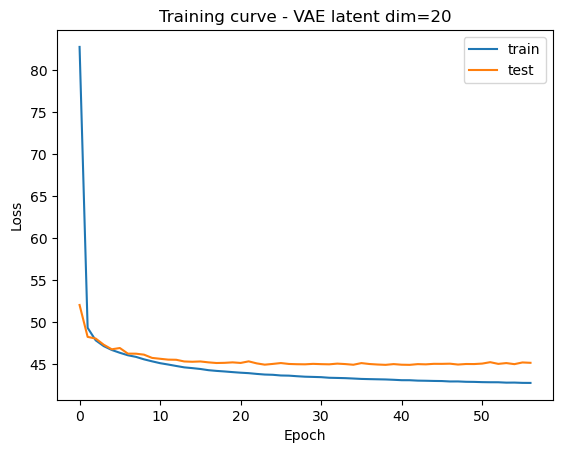

#### latent ndims = 25 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.60it/s]


Epoch [1/100] Train Loss: 80.5165
Epoch [1/100] Test Loss: 47.1856
✅ Best model saved at epoch 1 with test loss: 47.1856


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.80it/s]


Epoch [2/100] Train Loss: 44.4829
Epoch [2/100] Test Loss: 43.4968
✅ Best model saved at epoch 2 with test loss: 43.4968


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.64it/s]


Epoch [3/100] Train Loss: 42.8804
Epoch [3/100] Test Loss: 42.6276
✅ Best model saved at epoch 3 with test loss: 42.6276


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.23it/s]


Epoch [4/100] Train Loss: 42.2307
Epoch [4/100] Test Loss: 42.1452
✅ Best model saved at epoch 4 with test loss: 42.1452


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.33it/s]


Epoch [5/100] Train Loss: 41.7557
Epoch [5/100] Test Loss: 41.8104
✅ Best model saved at epoch 5 with test loss: 41.8104


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.10it/s]


Epoch [6/100] Train Loss: 41.4456
Epoch [6/100] Test Loss: 41.7071
✅ Best model saved at epoch 6 with test loss: 41.7071


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.62it/s]


Epoch [7/100] Train Loss: 41.2363
Epoch [7/100] Test Loss: 41.4259
✅ Best model saved at epoch 7 with test loss: 41.4259


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.68it/s]


Epoch [8/100] Train Loss: 40.9001
Epoch [8/100] Test Loss: 41.0067
✅ Best model saved at epoch 8 with test loss: 41.0067


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.33it/s]


Epoch [9/100] Train Loss: 40.6012
Epoch [9/100] Test Loss: 40.8891
✅ Best model saved at epoch 9 with test loss: 40.8891


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.26it/s]


Epoch [10/100] Train Loss: 40.4017
Epoch [10/100] Test Loss: 40.7882
✅ Best model saved at epoch 10 with test loss: 40.7882


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.50it/s]


Epoch [11/100] Train Loss: 40.2252
Epoch [11/100] Test Loss: 40.6686
✅ Best model saved at epoch 11 with test loss: 40.6686


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.02it/s]


Epoch [12/100] Train Loss: 40.0837
Epoch [12/100] Test Loss: 40.8032


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.29it/s]


Epoch [13/100] Train Loss: 39.9498
Epoch [13/100] Test Loss: 40.5676
✅ Best model saved at epoch 13 with test loss: 40.5676


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [14/100] Train Loss: 39.8213
Epoch [14/100] Test Loss: 40.5831


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [15/100] Train Loss: 39.7482
Epoch [15/100] Test Loss: 40.5930


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.72it/s]


Epoch [16/100] Train Loss: 39.7039
Epoch [16/100] Test Loss: 40.4337
✅ Best model saved at epoch 16 with test loss: 40.4337


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.43it/s]


Epoch [17/100] Train Loss: 39.5506
Epoch [17/100] Test Loss: 40.3889
✅ Best model saved at epoch 17 with test loss: 40.3889


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.08it/s]


Epoch [18/100] Train Loss: 39.5326
Epoch [18/100] Test Loss: 40.5174


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.12it/s]


Epoch [19/100] Train Loss: 39.4104
Epoch [19/100] Test Loss: 40.2333
✅ Best model saved at epoch 19 with test loss: 40.2333


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.32it/s]


Epoch [20/100] Train Loss: 39.3398
Epoch [20/100] Test Loss: 40.1777
✅ Best model saved at epoch 20 with test loss: 40.1777


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.67it/s]


Epoch [21/100] Train Loss: 39.3097
Epoch [21/100] Test Loss: 40.2235


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.88it/s]


Epoch [22/100] Train Loss: 39.2435
Epoch [22/100] Test Loss: 40.1573
✅ Best model saved at epoch 22 with test loss: 40.1573


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.73it/s]


Epoch [23/100] Train Loss: 39.1915
Epoch [23/100] Test Loss: 40.2729


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.63it/s]


Epoch [24/100] Train Loss: 39.1480
Epoch [24/100] Test Loss: 40.1531
✅ Best model saved at epoch 24 with test loss: 40.1531


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [25/100] Train Loss: 39.0685
Epoch [25/100] Test Loss: 40.1805


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.22it/s]


Epoch [26/100] Train Loss: 39.0453
Epoch [26/100] Test Loss: 40.3070


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [27/100] Train Loss: 39.0034
Epoch [27/100] Test Loss: 40.1954


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.60it/s]


Epoch [28/100] Train Loss: 38.9439
Epoch [28/100] Test Loss: 40.2121


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.95it/s]


Epoch [29/100] Train Loss: 38.9002
Epoch [29/100] Test Loss: 40.2493


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.57it/s]


Epoch [30/100] Train Loss: 38.8547
Epoch [30/100] Test Loss: 40.1799


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.78it/s]


Epoch [31/100] Train Loss: 38.8343
Epoch [31/100] Test Loss: 40.0623
✅ Best model saved at epoch 31 with test loss: 40.0623


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.00it/s]


Epoch [32/100] Train Loss: 38.7960
Epoch [32/100] Test Loss: 40.2222


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.18it/s]


Epoch [33/100] Train Loss: 38.7617
Epoch [33/100] Test Loss: 40.1470


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.85it/s]


Epoch [34/100] Train Loss: 38.7485
Epoch [34/100] Test Loss: 40.3330


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.72it/s]


Epoch [35/100] Train Loss: 38.7009
Epoch [35/100] Test Loss: 40.2076


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.11it/s]


Epoch [36/100] Train Loss: 38.6547
Epoch [36/100] Test Loss: 40.2113


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.33it/s]


Epoch [37/100] Train Loss: 38.6422
Epoch [37/100] Test Loss: 40.1752


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.80it/s]


Epoch [38/100] Train Loss: 38.6041
Epoch [38/100] Test Loss: 40.1105


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.54it/s]


Epoch [39/100] Train Loss: 38.5652
Epoch [39/100] Test Loss: 40.1426


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [40/100] Train Loss: 38.5680
Epoch [40/100] Test Loss: 40.1451


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [41/100] Train Loss: 38.5316
Epoch [41/100] Test Loss: 40.1599


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.74it/s]


Epoch [42/100] Train Loss: 38.5011
Epoch [42/100] Test Loss: 40.1916


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.86it/s]


Epoch [43/100] Train Loss: 38.4780
Epoch [43/100] Test Loss: 40.3455


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.53it/s]


Epoch [44/100] Train Loss: 38.4499
Epoch [44/100] Test Loss: 40.1394


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.86it/s]


Epoch [45/100] Train Loss: 38.4380
Epoch [45/100] Test Loss: 40.2808


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.76it/s]


Epoch [46/100] Train Loss: 38.4253
Epoch [46/100] Test Loss: 40.2310
🚦🚦🚦 Early stopping triggered 🚦


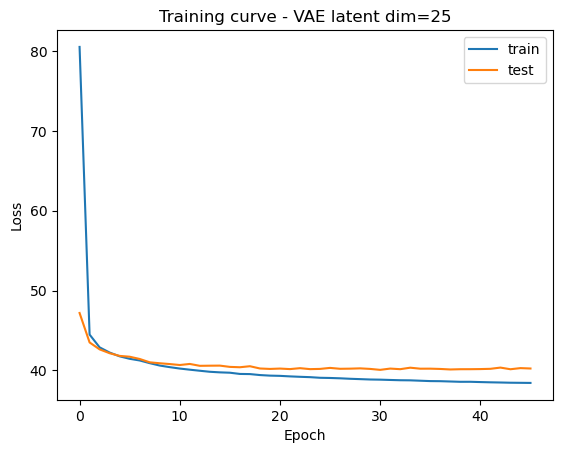

#### latent ndims = 30 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.44it/s]


Epoch [1/100] Train Loss: 76.4853
Epoch [1/100] Test Loss: 46.5794
✅ Best model saved at epoch 1 with test loss: 46.5794


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.35it/s]


Epoch [2/100] Train Loss: 42.1339
Epoch [2/100] Test Loss: 39.8657
✅ Best model saved at epoch 2 with test loss: 39.8657


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.77it/s]


Epoch [3/100] Train Loss: 39.2765
Epoch [3/100] Test Loss: 38.9998
✅ Best model saved at epoch 3 with test loss: 38.9998


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [4/100] Train Loss: 38.3635
Epoch [4/100] Test Loss: 38.3421
✅ Best model saved at epoch 4 with test loss: 38.3421


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [5/100] Train Loss: 37.7612
Epoch [5/100] Test Loss: 37.7829
✅ Best model saved at epoch 5 with test loss: 37.7829


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.32it/s]


Epoch [6/100] Train Loss: 37.4136
Epoch [6/100] Test Loss: 37.4172
✅ Best model saved at epoch 6 with test loss: 37.4172


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.24it/s]


Epoch [7/100] Train Loss: 37.1553
Epoch [7/100] Test Loss: 37.3771
✅ Best model saved at epoch 7 with test loss: 37.3771


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.88it/s]


Epoch [8/100] Train Loss: 36.8912
Epoch [8/100] Test Loss: 37.0969
✅ Best model saved at epoch 8 with test loss: 37.0969


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [9/100] Train Loss: 36.7601
Epoch [9/100] Test Loss: 37.0020
✅ Best model saved at epoch 9 with test loss: 37.0020


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.35it/s]


Epoch [10/100] Train Loss: 36.5752
Epoch [10/100] Test Loss: 36.8918
✅ Best model saved at epoch 10 with test loss: 36.8918


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.90it/s]


Epoch [11/100] Train Loss: 36.4379
Epoch [11/100] Test Loss: 36.9445


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.34it/s]


Epoch [12/100] Train Loss: 36.3643
Epoch [12/100] Test Loss: 36.8449
✅ Best model saved at epoch 12 with test loss: 36.8449


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.02it/s]


Epoch [13/100] Train Loss: 36.2544
Epoch [13/100] Test Loss: 36.7512
✅ Best model saved at epoch 13 with test loss: 36.7512


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [14/100] Train Loss: 36.1345
Epoch [14/100] Test Loss: 36.7635


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.33it/s]


Epoch [15/100] Train Loss: 36.0491
Epoch [15/100] Test Loss: 36.6585
✅ Best model saved at epoch 15 with test loss: 36.6585


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.14it/s]


Epoch [16/100] Train Loss: 35.9751
Epoch [16/100] Test Loss: 36.6128
✅ Best model saved at epoch 16 with test loss: 36.6128


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.37it/s]


Epoch [17/100] Train Loss: 35.9070
Epoch [17/100] Test Loss: 36.7289


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.51it/s]


Epoch [18/100] Train Loss: 35.8390
Epoch [18/100] Test Loss: 36.6384


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.64it/s]


Epoch [19/100] Train Loss: 35.7566
Epoch [19/100] Test Loss: 36.5624
✅ Best model saved at epoch 19 with test loss: 36.5624


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [20/100] Train Loss: 35.7022
Epoch [20/100] Test Loss: 36.5381
✅ Best model saved at epoch 20 with test loss: 36.5381


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.15it/s]


Epoch [21/100] Train Loss: 35.6670
Epoch [21/100] Test Loss: 36.5990


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.04it/s]


Epoch [22/100] Train Loss: 35.5929
Epoch [22/100] Test Loss: 36.5459


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.90it/s]


Epoch [23/100] Train Loss: 35.5383
Epoch [23/100] Test Loss: 36.6262


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.26it/s]


Epoch [24/100] Train Loss: 35.5184
Epoch [24/100] Test Loss: 36.4306
✅ Best model saved at epoch 24 with test loss: 36.4306


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.74it/s]


Epoch [25/100] Train Loss: 35.4451
Epoch [25/100] Test Loss: 36.3723
✅ Best model saved at epoch 25 with test loss: 36.3723


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [26/100] Train Loss: 35.3957
Epoch [26/100] Test Loss: 36.4373


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.59it/s]


Epoch [27/100] Train Loss: 35.3869
Epoch [27/100] Test Loss: 36.4356


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.42it/s]


Epoch [28/100] Train Loss: 35.3487
Epoch [28/100] Test Loss: 36.4152


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.60it/s]


Epoch [29/100] Train Loss: 35.2840
Epoch [29/100] Test Loss: 36.4512


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [30/100] Train Loss: 35.2593
Epoch [30/100] Test Loss: 36.4408


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [31/100] Train Loss: 35.2461
Epoch [31/100] Test Loss: 36.3464
✅ Best model saved at epoch 31 with test loss: 36.3464


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.20it/s]


Epoch [32/100] Train Loss: 35.1880
Epoch [32/100] Test Loss: 36.3426
✅ Best model saved at epoch 32 with test loss: 36.3426


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.02it/s]


Epoch [33/100] Train Loss: 35.1494
Epoch [33/100] Test Loss: 36.4308


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.45it/s]


Epoch [34/100] Train Loss: 35.1506
Epoch [34/100] Test Loss: 36.4123


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [35/100] Train Loss: 35.0896
Epoch [35/100] Test Loss: 36.3061
✅ Best model saved at epoch 35 with test loss: 36.3061


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.20it/s]


Epoch [36/100] Train Loss: 35.0709
Epoch [36/100] Test Loss: 36.3892


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.89it/s]


Epoch [37/100] Train Loss: 35.0562
Epoch [37/100] Test Loss: 36.2600
✅ Best model saved at epoch 37 with test loss: 36.2600


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [38/100] Train Loss: 35.0357
Epoch [38/100] Test Loss: 36.3813


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.69it/s]


Epoch [39/100] Train Loss: 34.9968
Epoch [39/100] Test Loss: 36.3780


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.02it/s]


Epoch [40/100] Train Loss: 34.9726
Epoch [40/100] Test Loss: 36.3301


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.59it/s]


Epoch [41/100] Train Loss: 34.9628
Epoch [41/100] Test Loss: 36.4103


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.53it/s]


Epoch [42/100] Train Loss: 34.9068
Epoch [42/100] Test Loss: 36.3319


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [43/100] Train Loss: 34.9021
Epoch [43/100] Test Loss: 36.3274


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.84it/s]


Epoch [44/100] Train Loss: 34.8783
Epoch [44/100] Test Loss: 36.4067


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.17it/s]


Epoch [45/100] Train Loss: 34.8695
Epoch [45/100] Test Loss: 36.3199


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.16it/s]


Epoch [46/100] Train Loss: 34.8272
Epoch [46/100] Test Loss: 36.4238


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.38it/s]


Epoch [47/100] Train Loss: 34.8208
Epoch [47/100] Test Loss: 36.4999


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.86it/s]


Epoch [48/100] Train Loss: 34.8046
Epoch [48/100] Test Loss: 36.3719


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.52it/s]


Epoch [49/100] Train Loss: 34.7707
Epoch [49/100] Test Loss: 36.4304


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.79it/s]


Epoch [50/100] Train Loss: 34.7663
Epoch [50/100] Test Loss: 36.3560


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [51/100] Train Loss: 34.7434
Epoch [51/100] Test Loss: 36.3717


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.80it/s]


Epoch [52/100] Train Loss: 34.7442
Epoch [52/100] Test Loss: 36.4311
🚦🚦🚦 Early stopping triggered 🚦


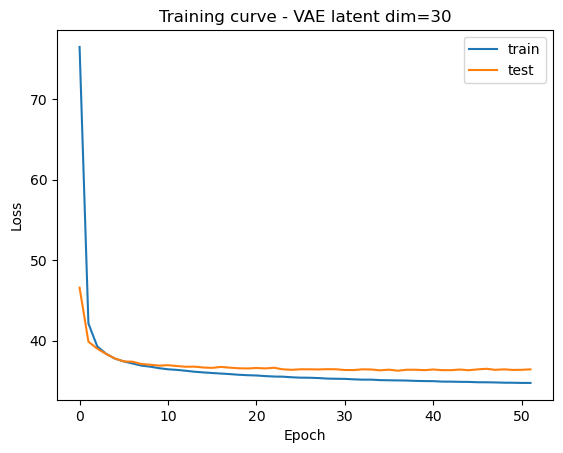

#### latent ndims = 35 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.32it/s]


Epoch [1/100] Train Loss: 73.8440
Epoch [1/100] Test Loss: 44.2543
✅ Best model saved at epoch 1 with test loss: 44.2543


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.57it/s]


Epoch [2/100] Train Loss: 40.1827
Epoch [2/100] Test Loss: 37.6734
✅ Best model saved at epoch 2 with test loss: 37.6734


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.17it/s]


Epoch [3/100] Train Loss: 36.8875
Epoch [3/100] Test Loss: 35.9723
✅ Best model saved at epoch 3 with test loss: 35.9723


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.19it/s]


Epoch [4/100] Train Loss: 35.5811
Epoch [4/100] Test Loss: 35.1888
✅ Best model saved at epoch 4 with test loss: 35.1888


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [5/100] Train Loss: 34.9998
Epoch [5/100] Test Loss: 34.8910
✅ Best model saved at epoch 5 with test loss: 34.8910


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [6/100] Train Loss: 34.6784
Epoch [6/100] Test Loss: 34.8580
✅ Best model saved at epoch 6 with test loss: 34.8580


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.02it/s]


Epoch [7/100] Train Loss: 34.4214
Epoch [7/100] Test Loss: 34.6689
✅ Best model saved at epoch 7 with test loss: 34.6689


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.00it/s]


Epoch [8/100] Train Loss: 34.1444
Epoch [8/100] Test Loss: 34.2743
✅ Best model saved at epoch 8 with test loss: 34.2743


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.47it/s]


Epoch [9/100] Train Loss: 33.9959
Epoch [9/100] Test Loss: 34.2497
✅ Best model saved at epoch 9 with test loss: 34.2497


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.20it/s]


Epoch [10/100] Train Loss: 33.8210
Epoch [10/100] Test Loss: 34.0614
✅ Best model saved at epoch 10 with test loss: 34.0614


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.93it/s]


Epoch [11/100] Train Loss: 33.6976
Epoch [11/100] Test Loss: 33.9754
✅ Best model saved at epoch 11 with test loss: 33.9754


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.77it/s]


Epoch [12/100] Train Loss: 33.5643
Epoch [12/100] Test Loss: 33.8988
✅ Best model saved at epoch 12 with test loss: 33.8988


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.53it/s]


Epoch [13/100] Train Loss: 33.4804
Epoch [13/100] Test Loss: 33.9684


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.22it/s]


Epoch [14/100] Train Loss: 33.3246
Epoch [14/100] Test Loss: 33.8251
✅ Best model saved at epoch 14 with test loss: 33.8251


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.41it/s]


Epoch [15/100] Train Loss: 33.2570
Epoch [15/100] Test Loss: 33.7070
✅ Best model saved at epoch 15 with test loss: 33.7070


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.38it/s]


Epoch [16/100] Train Loss: 33.1659
Epoch [16/100] Test Loss: 33.7473


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.25it/s]


Epoch [17/100] Train Loss: 33.1153
Epoch [17/100] Test Loss: 33.5872
✅ Best model saved at epoch 17 with test loss: 33.5872


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [18/100] Train Loss: 33.0248
Epoch [18/100] Test Loss: 33.5954


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [19/100] Train Loss: 32.9341
Epoch [19/100] Test Loss: 33.5481
✅ Best model saved at epoch 19 with test loss: 33.5481


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.17it/s]


Epoch [20/100] Train Loss: 32.8785
Epoch [20/100] Test Loss: 33.4687
✅ Best model saved at epoch 20 with test loss: 33.4687


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.21it/s]


Epoch [21/100] Train Loss: 32.8139
Epoch [21/100] Test Loss: 33.4826


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.19it/s]


Epoch [22/100] Train Loss: 32.7740
Epoch [22/100] Test Loss: 33.6210


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.80it/s]


Epoch [23/100] Train Loss: 32.7254
Epoch [23/100] Test Loss: 33.4793


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.07it/s]


Epoch [24/100] Train Loss: 32.6676
Epoch [24/100] Test Loss: 33.3714
✅ Best model saved at epoch 24 with test loss: 33.3714


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.34it/s]


Epoch [25/100] Train Loss: 32.5908
Epoch [25/100] Test Loss: 33.4837


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.39it/s]


Epoch [26/100] Train Loss: 32.5792
Epoch [26/100] Test Loss: 33.3740


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.53it/s]


Epoch [27/100] Train Loss: 32.5330
Epoch [27/100] Test Loss: 33.3580
✅ Best model saved at epoch 27 with test loss: 33.3580


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.55it/s]


Epoch [28/100] Train Loss: 32.4851
Epoch [28/100] Test Loss: 33.3421
✅ Best model saved at epoch 28 with test loss: 33.3421


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.75it/s]


Epoch [29/100] Train Loss: 32.4354
Epoch [29/100] Test Loss: 33.4528


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [30/100] Train Loss: 32.4177
Epoch [30/100] Test Loss: 33.3557


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.74it/s]


Epoch [31/100] Train Loss: 32.3658
Epoch [31/100] Test Loss: 33.4995


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.27it/s]


Epoch [32/100] Train Loss: 32.3396
Epoch [32/100] Test Loss: 33.3154
✅ Best model saved at epoch 32 with test loss: 33.3154


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.59it/s]


Epoch [33/100] Train Loss: 32.2952
Epoch [33/100] Test Loss: 33.4442


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.42it/s]


Epoch [34/100] Train Loss: 32.2514
Epoch [34/100] Test Loss: 33.3144
✅ Best model saved at epoch 34 with test loss: 33.3144


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.55it/s]


Epoch [35/100] Train Loss: 32.2482
Epoch [35/100] Test Loss: 33.3439


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.32it/s]


Epoch [36/100] Train Loss: 32.2055
Epoch [36/100] Test Loss: 33.3223


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.45it/s]


Epoch [37/100] Train Loss: 32.1875
Epoch [37/100] Test Loss: 33.6521


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.25it/s]


Epoch [38/100] Train Loss: 32.1259
Epoch [38/100] Test Loss: 33.3331


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.69it/s]


Epoch [39/100] Train Loss: 32.1329
Epoch [39/100] Test Loss: 33.3443


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.15it/s]


Epoch [40/100] Train Loss: 32.1015
Epoch [40/100] Test Loss: 33.4544


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.75it/s]


Epoch [41/100] Train Loss: 32.0925
Epoch [41/100] Test Loss: 33.6425


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.95it/s]


Epoch [42/100] Train Loss: 32.0574
Epoch [42/100] Test Loss: 33.3609


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [43/100] Train Loss: 32.0039
Epoch [43/100] Test Loss: 33.3753


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.80it/s]


Epoch [44/100] Train Loss: 31.9977
Epoch [44/100] Test Loss: 33.3236


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.95it/s]


Epoch [45/100] Train Loss: 31.9860
Epoch [45/100] Test Loss: 33.3238


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.86it/s]


Epoch [46/100] Train Loss: 31.9490
Epoch [46/100] Test Loss: 33.3937


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.92it/s]


Epoch [47/100] Train Loss: 31.9387
Epoch [47/100] Test Loss: 33.3262


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.16it/s]


Epoch [48/100] Train Loss: 31.9103
Epoch [48/100] Test Loss: 33.4322


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [49/100] Train Loss: 31.8916
Epoch [49/100] Test Loss: 33.4357
🚦🚦🚦 Early stopping triggered 🚦


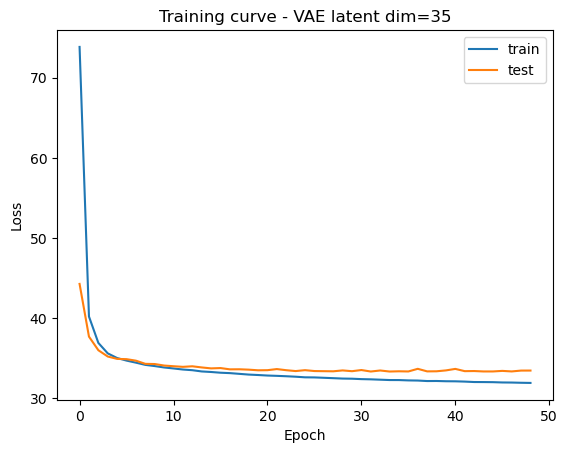

#### latent ndims = 40 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.87it/s]


Epoch [1/100] Train Loss: 78.3837
Epoch [1/100] Test Loss: 45.1147
✅ Best model saved at epoch 1 with test loss: 45.1147


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.99it/s]


Epoch [2/100] Train Loss: 39.0556
Epoch [2/100] Test Loss: 36.4311
✅ Best model saved at epoch 2 with test loss: 36.4311


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.31it/s]


Epoch [3/100] Train Loss: 35.0063
Epoch [3/100] Test Loss: 34.3331
✅ Best model saved at epoch 3 with test loss: 34.3331


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.97it/s]


Epoch [4/100] Train Loss: 33.8276
Epoch [4/100] Test Loss: 33.5449
✅ Best model saved at epoch 4 with test loss: 33.5449


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.31it/s]


Epoch [5/100] Train Loss: 32.8673
Epoch [5/100] Test Loss: 32.4526
✅ Best model saved at epoch 5 with test loss: 32.4526


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.03it/s]


Epoch [6/100] Train Loss: 32.1378
Epoch [6/100] Test Loss: 32.4291
✅ Best model saved at epoch 6 with test loss: 32.4291


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.48it/s]


Epoch [7/100] Train Loss: 31.7584
Epoch [7/100] Test Loss: 32.0075
✅ Best model saved at epoch 7 with test loss: 32.0075


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.67it/s]


Epoch [8/100] Train Loss: 31.4485
Epoch [8/100] Test Loss: 31.6709
✅ Best model saved at epoch 8 with test loss: 31.6709


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.51it/s]


Epoch [9/100] Train Loss: 31.2883
Epoch [9/100] Test Loss: 31.6042
✅ Best model saved at epoch 9 with test loss: 31.6042


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.05it/s]


Epoch [10/100] Train Loss: 31.1308
Epoch [10/100] Test Loss: 31.4028
✅ Best model saved at epoch 10 with test loss: 31.4028


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.73it/s]


Epoch [11/100] Train Loss: 30.9392
Epoch [11/100] Test Loss: 31.2569
✅ Best model saved at epoch 11 with test loss: 31.2569


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.23it/s]


Epoch [12/100] Train Loss: 30.9003
Epoch [12/100] Test Loss: 31.1265
✅ Best model saved at epoch 12 with test loss: 31.1265


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.19it/s]


Epoch [13/100] Train Loss: 30.7296
Epoch [13/100] Test Loss: 31.2129


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.60it/s]


Epoch [14/100] Train Loss: 30.6476
Epoch [14/100] Test Loss: 31.2532


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.08it/s]


Epoch [15/100] Train Loss: 30.5580
Epoch [15/100] Test Loss: 30.9896
✅ Best model saved at epoch 15 with test loss: 30.9896


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.18it/s]


Epoch [16/100] Train Loss: 30.4802
Epoch [16/100] Test Loss: 31.3329


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.06it/s]


Epoch [17/100] Train Loss: 30.4179
Epoch [17/100] Test Loss: 31.2080


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [18/100] Train Loss: 30.3411
Epoch [18/100] Test Loss: 30.8777
✅ Best model saved at epoch 18 with test loss: 30.8777


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [19/100] Train Loss: 30.3013
Epoch [19/100] Test Loss: 30.8517
✅ Best model saved at epoch 19 with test loss: 30.8517


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.21it/s]


Epoch [20/100] Train Loss: 30.1878
Epoch [20/100] Test Loss: 30.9487


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.85it/s]


Epoch [21/100] Train Loss: 30.1636
Epoch [21/100] Test Loss: 30.8871


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.46it/s]


Epoch [22/100] Train Loss: 30.0932
Epoch [22/100] Test Loss: 30.8198
✅ Best model saved at epoch 22 with test loss: 30.8198


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.71it/s]


Epoch [23/100] Train Loss: 30.0769
Epoch [23/100] Test Loss: 30.9002


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.38it/s]


Epoch [24/100] Train Loss: 29.9997
Epoch [24/100] Test Loss: 30.9031


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.93it/s]


Epoch [25/100] Train Loss: 29.9857
Epoch [25/100] Test Loss: 30.9021


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.15it/s]


Epoch [26/100] Train Loss: 29.8954
Epoch [26/100] Test Loss: 30.8356


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [27/100] Train Loss: 29.8918
Epoch [27/100] Test Loss: 30.9047


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.09it/s]


Epoch [28/100] Train Loss: 29.8427
Epoch [28/100] Test Loss: 30.8212


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.86it/s]


Epoch [29/100] Train Loss: 29.8183
Epoch [29/100] Test Loss: 30.7596
✅ Best model saved at epoch 29 with test loss: 30.7596


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.52it/s]


Epoch [30/100] Train Loss: 29.7625
Epoch [30/100] Test Loss: 30.8320


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [31/100] Train Loss: 29.7017
Epoch [31/100] Test Loss: 30.7340
✅ Best model saved at epoch 31 with test loss: 30.7340


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.22it/s]


Epoch [32/100] Train Loss: 29.7152
Epoch [32/100] Test Loss: 30.7046
✅ Best model saved at epoch 32 with test loss: 30.7046


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [33/100] Train Loss: 29.6546
Epoch [33/100] Test Loss: 30.7414


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.92it/s]


Epoch [34/100] Train Loss: 29.6742
Epoch [34/100] Test Loss: 30.7163


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.57it/s]


Epoch [35/100] Train Loss: 29.5951
Epoch [35/100] Test Loss: 30.8767


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.70it/s]


Epoch [36/100] Train Loss: 29.5716
Epoch [36/100] Test Loss: 30.6869
✅ Best model saved at epoch 36 with test loss: 30.6869


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.16it/s]


Epoch [37/100] Train Loss: 29.5516
Epoch [37/100] Test Loss: 30.8766


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [38/100] Train Loss: 29.5321
Epoch [38/100] Test Loss: 30.6959


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.50it/s]


Epoch [39/100] Train Loss: 29.5014
Epoch [39/100] Test Loss: 30.7043


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.98it/s]


Epoch [40/100] Train Loss: 29.4808
Epoch [40/100] Test Loss: 30.7102


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.05it/s]


Epoch [41/100] Train Loss: 29.4653
Epoch [41/100] Test Loss: 30.7158


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.65it/s]


Epoch [42/100] Train Loss: 29.4327
Epoch [42/100] Test Loss: 30.7281


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.42it/s]


Epoch [43/100] Train Loss: 29.4187
Epoch [43/100] Test Loss: 30.7721


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.01it/s]


Epoch [44/100] Train Loss: 29.3869
Epoch [44/100] Test Loss: 30.6923


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.58it/s]


Epoch [45/100] Train Loss: 29.3596
Epoch [45/100] Test Loss: 30.7233


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.19it/s]


Epoch [46/100] Train Loss: 29.3718
Epoch [46/100] Test Loss: 30.8256


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.12it/s]


Epoch [47/100] Train Loss: 29.3274
Epoch [47/100] Test Loss: 30.7132


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.20it/s]


Epoch [48/100] Train Loss: 29.3299
Epoch [48/100] Test Loss: 30.8265


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [49/100] Train Loss: 29.2821
Epoch [49/100] Test Loss: 30.7327


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.87it/s]


Epoch [50/100] Train Loss: 29.2730
Epoch [50/100] Test Loss: 30.7043


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.78it/s]


Epoch [51/100] Train Loss: 29.2539
Epoch [51/100] Test Loss: 30.8511
🚦🚦🚦 Early stopping triggered 🚦


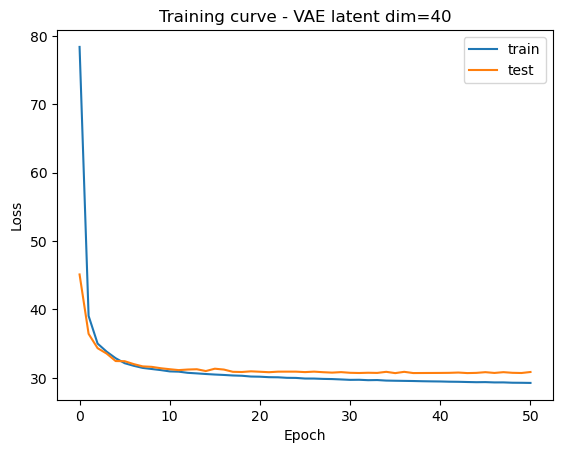

#### latent ndims = 45 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [1/100] Train Loss: 76.3796
Epoch [1/100] Test Loss: 42.5909
✅ Best model saved at epoch 1 with test loss: 42.5909


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.51it/s]


Epoch [2/100] Train Loss: 37.2140
Epoch [2/100] Test Loss: 34.3786
✅ Best model saved at epoch 2 with test loss: 34.3786


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.25it/s]


Epoch [3/100] Train Loss: 33.0229
Epoch [3/100] Test Loss: 32.1600
✅ Best model saved at epoch 3 with test loss: 32.1600


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [4/100] Train Loss: 31.6376
Epoch [4/100] Test Loss: 31.1746
✅ Best model saved at epoch 4 with test loss: 31.1746


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.41it/s]


Epoch [5/100] Train Loss: 30.6711
Epoch [5/100] Test Loss: 30.6383
✅ Best model saved at epoch 5 with test loss: 30.6383


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.28it/s]


Epoch [6/100] Train Loss: 30.1123
Epoch [6/100] Test Loss: 30.0416
✅ Best model saved at epoch 6 with test loss: 30.0416


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [7/100] Train Loss: 29.6854
Epoch [7/100] Test Loss: 30.0394
✅ Best model saved at epoch 7 with test loss: 30.0394


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.06it/s]


Epoch [8/100] Train Loss: 29.4474
Epoch [8/100] Test Loss: 29.6475
✅ Best model saved at epoch 8 with test loss: 29.6475


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.22it/s]


Epoch [9/100] Train Loss: 29.2353
Epoch [9/100] Test Loss: 29.3869
✅ Best model saved at epoch 9 with test loss: 29.3869


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.07it/s]


Epoch [10/100] Train Loss: 29.1196
Epoch [10/100] Test Loss: 29.5548


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.78it/s]


Epoch [11/100] Train Loss: 28.9054
Epoch [11/100] Test Loss: 29.4923


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.98it/s]


Epoch [12/100] Train Loss: 28.8570
Epoch [12/100] Test Loss: 29.1551
✅ Best model saved at epoch 12 with test loss: 29.1551


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.04it/s]


Epoch [13/100] Train Loss: 28.7138
Epoch [13/100] Test Loss: 29.1554


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.72it/s]


Epoch [14/100] Train Loss: 28.6021
Epoch [14/100] Test Loss: 29.1581


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.71it/s]


Epoch [15/100] Train Loss: 28.5430
Epoch [15/100] Test Loss: 29.1091
✅ Best model saved at epoch 15 with test loss: 29.1091


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.82it/s]


Epoch [16/100] Train Loss: 28.4447
Epoch [16/100] Test Loss: 28.8872
✅ Best model saved at epoch 16 with test loss: 28.8872


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [17/100] Train Loss: 28.3878
Epoch [17/100] Test Loss: 28.9141


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [18/100] Train Loss: 28.3316
Epoch [18/100] Test Loss: 28.8635
✅ Best model saved at epoch 18 with test loss: 28.8635


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.01it/s]


Epoch [19/100] Train Loss: 28.2526
Epoch [19/100] Test Loss: 28.8378
✅ Best model saved at epoch 19 with test loss: 28.8378


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.32it/s]


Epoch [20/100] Train Loss: 28.2193
Epoch [20/100] Test Loss: 28.7904
✅ Best model saved at epoch 20 with test loss: 28.7904


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.56it/s]


Epoch [21/100] Train Loss: 28.1512
Epoch [21/100] Test Loss: 28.7762
✅ Best model saved at epoch 21 with test loss: 28.7762


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.23it/s]


Epoch [22/100] Train Loss: 28.0918
Epoch [22/100] Test Loss: 28.7407
✅ Best model saved at epoch 22 with test loss: 28.7407


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.64it/s]


Epoch [23/100] Train Loss: 28.0796
Epoch [23/100] Test Loss: 28.8131


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.47it/s]


Epoch [24/100] Train Loss: 27.9929
Epoch [24/100] Test Loss: 28.7431


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [25/100] Train Loss: 27.9857
Epoch [25/100] Test Loss: 28.7298
✅ Best model saved at epoch 25 with test loss: 28.7298


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.84it/s]


Epoch [26/100] Train Loss: 27.8955
Epoch [26/100] Test Loss: 28.9348


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.93it/s]


Epoch [27/100] Train Loss: 27.9174
Epoch [27/100] Test Loss: 28.9890


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.86it/s]


Epoch [28/100] Train Loss: 27.8672
Epoch [28/100] Test Loss: 28.6890
✅ Best model saved at epoch 28 with test loss: 28.6890


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.01it/s]


Epoch [29/100] Train Loss: 27.8074
Epoch [29/100] Test Loss: 28.6286
✅ Best model saved at epoch 29 with test loss: 28.6286


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.89it/s]


Epoch [30/100] Train Loss: 27.7880
Epoch [30/100] Test Loss: 28.6603


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.15it/s]


Epoch [31/100] Train Loss: 27.7872
Epoch [31/100] Test Loss: 28.8733


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [32/100] Train Loss: 27.7144
Epoch [32/100] Test Loss: 28.7262


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.70it/s]


Epoch [33/100] Train Loss: 27.6814
Epoch [33/100] Test Loss: 28.7663


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [34/100] Train Loss: 27.6664
Epoch [34/100] Test Loss: 28.6673


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [35/100] Train Loss: 27.6530
Epoch [35/100] Test Loss: 28.6899


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.81it/s]


Epoch [36/100] Train Loss: 27.6040
Epoch [36/100] Test Loss: 28.7217


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.34it/s]


Epoch [37/100] Train Loss: 27.5943
Epoch [37/100] Test Loss: 28.6612


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [38/100] Train Loss: 27.5749
Epoch [38/100] Test Loss: 28.9112


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.28it/s]


Epoch [39/100] Train Loss: 27.5616
Epoch [39/100] Test Loss: 28.6220
✅ Best model saved at epoch 39 with test loss: 28.6220


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.38it/s]


Epoch [40/100] Train Loss: 27.5116
Epoch [40/100] Test Loss: 28.6289


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.44it/s]


Epoch [41/100] Train Loss: 27.5093
Epoch [41/100] Test Loss: 28.6501


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.14it/s]


Epoch [42/100] Train Loss: 27.4657
Epoch [42/100] Test Loss: 28.6130
✅ Best model saved at epoch 42 with test loss: 28.6130


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.77it/s]


Epoch [43/100] Train Loss: 27.4570
Epoch [43/100] Test Loss: 28.6675


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.46it/s]


Epoch [44/100] Train Loss: 27.4291
Epoch [44/100] Test Loss: 28.5968
✅ Best model saved at epoch 44 with test loss: 28.5968


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.48it/s]


Epoch [45/100] Train Loss: 27.4222
Epoch [45/100] Test Loss: 28.6642


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [46/100] Train Loss: 27.4013
Epoch [46/100] Test Loss: 28.6834


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [47/100] Train Loss: 27.3869
Epoch [47/100] Test Loss: 28.6731


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.89it/s]


Epoch [48/100] Train Loss: 27.3735
Epoch [48/100] Test Loss: 28.6448


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.97it/s]


Epoch [49/100] Train Loss: 27.3244
Epoch [49/100] Test Loss: 28.5900
✅ Best model saved at epoch 49 with test loss: 28.5900


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.66it/s]


Epoch [50/100] Train Loss: 27.3301
Epoch [50/100] Test Loss: 28.5786
✅ Best model saved at epoch 50 with test loss: 28.5786


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.32it/s]


Epoch [51/100] Train Loss: 27.3187
Epoch [51/100] Test Loss: 28.6069


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.53it/s]


Epoch [52/100] Train Loss: 27.2937
Epoch [52/100] Test Loss: 28.6243


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [53/100] Train Loss: 27.2719
Epoch [53/100] Test Loss: 28.6345


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [54/100] Train Loss: 27.2659
Epoch [54/100] Test Loss: 28.6267


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.39it/s]


Epoch [55/100] Train Loss: 27.2602
Epoch [55/100] Test Loss: 28.6975


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.71it/s]


Epoch [56/100] Train Loss: 27.2309
Epoch [56/100] Test Loss: 28.7144


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.69it/s]


Epoch [57/100] Train Loss: 27.2213
Epoch [57/100] Test Loss: 28.6562


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.05it/s]


Epoch [58/100] Train Loss: 27.2157
Epoch [58/100] Test Loss: 28.6324


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.35it/s]


Epoch [59/100] Train Loss: 27.2002
Epoch [59/100] Test Loss: 28.6678


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.62it/s]


Epoch [60/100] Train Loss: 27.1984
Epoch [60/100] Test Loss: 28.6266


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.10it/s]


Epoch [61/100] Train Loss: 27.1693
Epoch [61/100] Test Loss: 28.6965


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [62/100] Train Loss: 27.1521
Epoch [62/100] Test Loss: 28.6798


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.94it/s]


Epoch [63/100] Train Loss: 27.1512
Epoch [63/100] Test Loss: 28.7427


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.04it/s]


Epoch [64/100] Train Loss: 27.1427
Epoch [64/100] Test Loss: 28.6186


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.25it/s]


Epoch [65/100] Train Loss: 27.1183
Epoch [65/100] Test Loss: 28.7269
🚦🚦🚦 Early stopping triggered 🚦


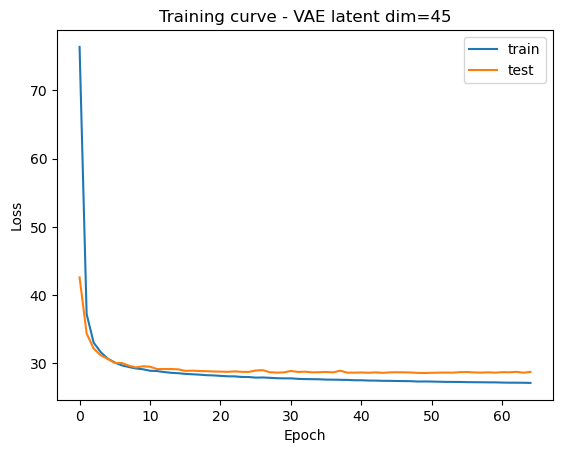

#### latent ndims = 50 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.55it/s]


Epoch [1/100] Train Loss: 81.9012
Epoch [1/100] Test Loss: 43.6742
✅ Best model saved at epoch 1 with test loss: 43.6742


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.38it/s]


Epoch [2/100] Train Loss: 37.7642
Epoch [2/100] Test Loss: 34.0468
✅ Best model saved at epoch 2 with test loss: 34.0468


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.05it/s]


Epoch [3/100] Train Loss: 32.3124
Epoch [3/100] Test Loss: 30.8465
✅ Best model saved at epoch 3 with test loss: 30.8465


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.53it/s]


Epoch [4/100] Train Loss: 30.4516
Epoch [4/100] Test Loss: 29.9906
✅ Best model saved at epoch 4 with test loss: 29.9906


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.42it/s]


Epoch [5/100] Train Loss: 29.3514
Epoch [5/100] Test Loss: 28.7879
✅ Best model saved at epoch 5 with test loss: 28.7879


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.53it/s]


Epoch [6/100] Train Loss: 28.5780
Epoch [6/100] Test Loss: 28.4602
✅ Best model saved at epoch 6 with test loss: 28.4602


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.11it/s]


Epoch [7/100] Train Loss: 28.1322
Epoch [7/100] Test Loss: 28.1991
✅ Best model saved at epoch 7 with test loss: 28.1991


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.46it/s]


Epoch [8/100] Train Loss: 27.8888
Epoch [8/100] Test Loss: 27.9152
✅ Best model saved at epoch 8 with test loss: 27.9152


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.51it/s]


Epoch [9/100] Train Loss: 27.7466
Epoch [9/100] Test Loss: 27.8351
✅ Best model saved at epoch 9 with test loss: 27.8351


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.57it/s]


Epoch [10/100] Train Loss: 27.5766
Epoch [10/100] Test Loss: 27.7621
✅ Best model saved at epoch 10 with test loss: 27.7621


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [11/100] Train Loss: 27.4354
Epoch [11/100] Test Loss: 27.7722


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [12/100] Train Loss: 27.3237
Epoch [12/100] Test Loss: 27.6098
✅ Best model saved at epoch 12 with test loss: 27.6098


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.86it/s]


Epoch [13/100] Train Loss: 27.2166
Epoch [13/100] Test Loss: 27.7433


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.81it/s]


Epoch [14/100] Train Loss: 27.1204
Epoch [14/100] Test Loss: 27.4525
✅ Best model saved at epoch 14 with test loss: 27.4525


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.98it/s]


Epoch [15/100] Train Loss: 27.0411
Epoch [15/100] Test Loss: 27.6007


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.85it/s]


Epoch [16/100] Train Loss: 26.9542
Epoch [16/100] Test Loss: 27.2929
✅ Best model saved at epoch 16 with test loss: 27.2929


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.17it/s]


Epoch [17/100] Train Loss: 26.8720
Epoch [17/100] Test Loss: 27.3320


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.55it/s]


Epoch [18/100] Train Loss: 26.7954
Epoch [18/100] Test Loss: 27.2391
✅ Best model saved at epoch 18 with test loss: 27.2391


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.99it/s]


Epoch [19/100] Train Loss: 26.8025
Epoch [19/100] Test Loss: 27.2324
✅ Best model saved at epoch 19 with test loss: 27.2324


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.16it/s]


Epoch [20/100] Train Loss: 26.6719
Epoch [20/100] Test Loss: 27.2402


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.66it/s]


Epoch [21/100] Train Loss: 26.6418
Epoch [21/100] Test Loss: 27.1566
✅ Best model saved at epoch 21 with test loss: 27.1566


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.14it/s]


Epoch [22/100] Train Loss: 26.5969
Epoch [22/100] Test Loss: 27.0673
✅ Best model saved at epoch 22 with test loss: 27.0673


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.93it/s]


Epoch [23/100] Train Loss: 26.5184
Epoch [23/100] Test Loss: 27.1077


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.20it/s]


Epoch [24/100] Train Loss: 26.4672
Epoch [24/100] Test Loss: 27.0625
✅ Best model saved at epoch 24 with test loss: 27.0625


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.03it/s]


Epoch [25/100] Train Loss: 26.4374
Epoch [25/100] Test Loss: 27.4132


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [26/100] Train Loss: 26.4033
Epoch [26/100] Test Loss: 26.9901
✅ Best model saved at epoch 26 with test loss: 26.9901


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.48it/s]


Epoch [27/100] Train Loss: 26.3579
Epoch [27/100] Test Loss: 27.1526


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.50it/s]


Epoch [28/100] Train Loss: 26.3072
Epoch [28/100] Test Loss: 27.1572


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.82it/s]


Epoch [29/100] Train Loss: 26.2802
Epoch [29/100] Test Loss: 27.0465


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.98it/s]


Epoch [30/100] Train Loss: 26.2494
Epoch [30/100] Test Loss: 27.0166


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.23it/s]


Epoch [31/100] Train Loss: 26.2220
Epoch [31/100] Test Loss: 27.1889


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [32/100] Train Loss: 26.1699
Epoch [32/100] Test Loss: 27.1191


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.85it/s]


Epoch [33/100] Train Loss: 26.1719
Epoch [33/100] Test Loss: 26.9967


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.48it/s]


Epoch [34/100] Train Loss: 26.0903
Epoch [34/100] Test Loss: 27.0111


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.24it/s]


Epoch [35/100] Train Loss: 26.0868
Epoch [35/100] Test Loss: 27.3445


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.67it/s]


Epoch [36/100] Train Loss: 26.0786
Epoch [36/100] Test Loss: 26.9829
✅ Best model saved at epoch 36 with test loss: 26.9829


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [37/100] Train Loss: 26.0390
Epoch [37/100] Test Loss: 27.0311


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.20it/s]


Epoch [38/100] Train Loss: 26.0201
Epoch [38/100] Test Loss: 26.8658
✅ Best model saved at epoch 38 with test loss: 26.8658


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.99it/s]


Epoch [39/100] Train Loss: 25.9727
Epoch [39/100] Test Loss: 26.9023


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.89it/s]


Epoch [40/100] Train Loss: 25.9570
Epoch [40/100] Test Loss: 26.9568


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.60it/s]


Epoch [41/100] Train Loss: 25.9712
Epoch [41/100] Test Loss: 26.9620


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.89it/s]


Epoch [42/100] Train Loss: 25.8982
Epoch [42/100] Test Loss: 26.9095


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.50it/s]


Epoch [43/100] Train Loss: 25.9002
Epoch [43/100] Test Loss: 26.9695


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.31it/s]


Epoch [44/100] Train Loss: 25.8911
Epoch [44/100] Test Loss: 26.8764


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.87it/s]


Epoch [45/100] Train Loss: 25.8463
Epoch [45/100] Test Loss: 26.9917


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.47it/s]


Epoch [46/100] Train Loss: 25.8556
Epoch [46/100] Test Loss: 26.9676


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [47/100] Train Loss: 25.8064
Epoch [47/100] Test Loss: 26.9047


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.81it/s]


Epoch [48/100] Train Loss: 25.8184
Epoch [48/100] Test Loss: 27.0131


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.42it/s]


Epoch [49/100] Train Loss: 25.7887
Epoch [49/100] Test Loss: 26.8713


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.42it/s]


Epoch [50/100] Train Loss: 25.7731
Epoch [50/100] Test Loss: 26.9538


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.77it/s]


Epoch [51/100] Train Loss: 25.7466
Epoch [51/100] Test Loss: 26.9409


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.45it/s]


Epoch [52/100] Train Loss: 25.7316
Epoch [52/100] Test Loss: 27.0102


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.97it/s]


Epoch [53/100] Train Loss: 25.7092
Epoch [53/100] Test Loss: 26.9951
🚦🚦🚦 Early stopping triggered 🚦


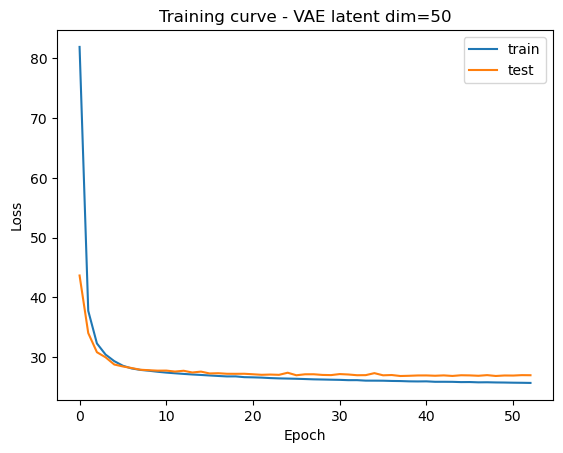

#### latent ndims = 60 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.74it/s]


Epoch [1/100] Train Loss: 72.4818
Epoch [1/100] Test Loss: 40.5294
✅ Best model saved at epoch 1 with test loss: 40.5294


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [2/100] Train Loss: 35.7242
Epoch [2/100] Test Loss: 31.4255
✅ Best model saved at epoch 2 with test loss: 31.4255


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.56it/s]


Epoch [3/100] Train Loss: 29.5968
Epoch [3/100] Test Loss: 28.0119
✅ Best model saved at epoch 3 with test loss: 28.0119


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.38it/s]


Epoch [4/100] Train Loss: 27.0124
Epoch [4/100] Test Loss: 26.2128
✅ Best model saved at epoch 4 with test loss: 26.2128


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.34it/s]


Epoch [5/100] Train Loss: 25.9236
Epoch [5/100] Test Loss: 25.6382
✅ Best model saved at epoch 5 with test loss: 25.6382


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [6/100] Train Loss: 25.4991
Epoch [6/100] Test Loss: 25.4300
✅ Best model saved at epoch 6 with test loss: 25.4300


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.65it/s]


Epoch [7/100] Train Loss: 25.2102
Epoch [7/100] Test Loss: 25.2836
✅ Best model saved at epoch 7 with test loss: 25.2836


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.71it/s]


Epoch [8/100] Train Loss: 25.0375
Epoch [8/100] Test Loss: 25.4387


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [9/100] Train Loss: 24.8517
Epoch [9/100] Test Loss: 25.2422
✅ Best model saved at epoch 9 with test loss: 25.2422


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.34it/s]


Epoch [10/100] Train Loss: 24.6976
Epoch [10/100] Test Loss: 24.7611
✅ Best model saved at epoch 10 with test loss: 24.7611


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.48it/s]


Epoch [11/100] Train Loss: 24.5970
Epoch [11/100] Test Loss: 24.7694


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.28it/s]


Epoch [12/100] Train Loss: 24.4537
Epoch [12/100] Test Loss: 24.5962
✅ Best model saved at epoch 12 with test loss: 24.5962


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.79it/s]


Epoch [13/100] Train Loss: 24.3912
Epoch [13/100] Test Loss: 24.5880
✅ Best model saved at epoch 13 with test loss: 24.5880


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.97it/s]


Epoch [14/100] Train Loss: 24.2802
Epoch [14/100] Test Loss: 24.7701


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.42it/s]


Epoch [15/100] Train Loss: 24.1791
Epoch [15/100] Test Loss: 24.5520
✅ Best model saved at epoch 15 with test loss: 24.5520


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.04it/s]


Epoch [16/100] Train Loss: 24.1526
Epoch [16/100] Test Loss: 24.4926
✅ Best model saved at epoch 16 with test loss: 24.4926


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.81it/s]


Epoch [17/100] Train Loss: 24.0519
Epoch [17/100] Test Loss: 24.6660


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.52it/s]


Epoch [18/100] Train Loss: 23.9927
Epoch [18/100] Test Loss: 24.3057
✅ Best model saved at epoch 18 with test loss: 24.3057


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.61it/s]


Epoch [19/100] Train Loss: 23.8978
Epoch [19/100] Test Loss: 24.3778


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.75it/s]


Epoch [20/100] Train Loss: 23.8574
Epoch [20/100] Test Loss: 24.3499


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.70it/s]


Epoch [21/100] Train Loss: 23.7986
Epoch [21/100] Test Loss: 24.2741
✅ Best model saved at epoch 21 with test loss: 24.2741


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.73it/s]


Epoch [22/100] Train Loss: 23.7509
Epoch [22/100] Test Loss: 24.2943


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [23/100] Train Loss: 23.7182
Epoch [23/100] Test Loss: 24.1446
✅ Best model saved at epoch 23 with test loss: 24.1446


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [24/100] Train Loss: 23.6527
Epoch [24/100] Test Loss: 24.1792


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.25it/s]


Epoch [25/100] Train Loss: 23.6094
Epoch [25/100] Test Loss: 24.1973


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.46it/s]


Epoch [26/100] Train Loss: 23.5994
Epoch [26/100] Test Loss: 24.1141
✅ Best model saved at epoch 26 with test loss: 24.1141


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.08it/s]


Epoch [27/100] Train Loss: 23.5350
Epoch [27/100] Test Loss: 24.1154


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.20it/s]


Epoch [28/100] Train Loss: 23.4844
Epoch [28/100] Test Loss: 24.1460


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.77it/s]


Epoch [29/100] Train Loss: 23.4901
Epoch [29/100] Test Loss: 24.1122
✅ Best model saved at epoch 29 with test loss: 24.1122


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.32it/s]


Epoch [30/100] Train Loss: 23.4196
Epoch [30/100] Test Loss: 24.1549


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [31/100] Train Loss: 23.4304
Epoch [31/100] Test Loss: 24.1232


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.92it/s]


Epoch [32/100] Train Loss: 23.3475
Epoch [32/100] Test Loss: 24.0314
✅ Best model saved at epoch 32 with test loss: 24.0314


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.82it/s]


Epoch [33/100] Train Loss: 23.3395
Epoch [33/100] Test Loss: 24.1833


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [34/100] Train Loss: 23.3146
Epoch [34/100] Test Loss: 24.0245
✅ Best model saved at epoch 34 with test loss: 24.0245


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [35/100] Train Loss: 23.2803
Epoch [35/100] Test Loss: 24.1352


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.98it/s]


Epoch [36/100] Train Loss: 23.2672
Epoch [36/100] Test Loss: 24.0153
✅ Best model saved at epoch 36 with test loss: 24.0153


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.92it/s]


Epoch [37/100] Train Loss: 23.2487
Epoch [37/100] Test Loss: 24.0367


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.94it/s]


Epoch [38/100] Train Loss: 23.1880
Epoch [38/100] Test Loss: 24.1067


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [39/100] Train Loss: 23.2126
Epoch [39/100] Test Loss: 24.0582


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [40/100] Train Loss: 23.1608
Epoch [40/100] Test Loss: 24.1351


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.37it/s]


Epoch [41/100] Train Loss: 23.1479
Epoch [41/100] Test Loss: 24.0396


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.30it/s]


Epoch [42/100] Train Loss: 23.1664
Epoch [42/100] Test Loss: 24.0192


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [43/100] Train Loss: 23.0990
Epoch [43/100] Test Loss: 24.0452


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [44/100] Train Loss: 23.0688
Epoch [44/100] Test Loss: 24.0556


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.76it/s]


Epoch [45/100] Train Loss: 23.0756
Epoch [45/100] Test Loss: 24.0116
✅ Best model saved at epoch 45 with test loss: 24.0116


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.89it/s]


Epoch [46/100] Train Loss: 23.0617
Epoch [46/100] Test Loss: 24.0217


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.82it/s]


Epoch [47/100] Train Loss: 23.0183
Epoch [47/100] Test Loss: 24.0114
✅ Best model saved at epoch 47 with test loss: 24.0114


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.76it/s]


Epoch [48/100] Train Loss: 23.0006
Epoch [48/100] Test Loss: 23.9749
✅ Best model saved at epoch 48 with test loss: 23.9749


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.40it/s]


Epoch [49/100] Train Loss: 23.0026
Epoch [49/100] Test Loss: 24.0380


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.02it/s]


Epoch [50/100] Train Loss: 22.9802
Epoch [50/100] Test Loss: 24.0022


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.65it/s]


Epoch [51/100] Train Loss: 22.9880
Epoch [51/100] Test Loss: 23.9884


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.52it/s]


Epoch [52/100] Train Loss: 22.9329
Epoch [52/100] Test Loss: 24.1353


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [53/100] Train Loss: 22.9343
Epoch [53/100] Test Loss: 24.1150


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.91it/s]


Epoch [54/100] Train Loss: 22.9139
Epoch [54/100] Test Loss: 23.9970


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.22it/s]


Epoch [55/100] Train Loss: 22.9395
Epoch [55/100] Test Loss: 24.0871


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.98it/s]


Epoch [56/100] Train Loss: 22.8854
Epoch [56/100] Test Loss: 24.0239


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.21it/s]


Epoch [57/100] Train Loss: 22.8762
Epoch [57/100] Test Loss: 24.0512


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.97it/s]


Epoch [58/100] Train Loss: 22.8608
Epoch [58/100] Test Loss: 24.0121


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [59/100] Train Loss: 22.8560
Epoch [59/100] Test Loss: 23.9966


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.09it/s]


Epoch [60/100] Train Loss: 22.8427
Epoch [60/100] Test Loss: 23.9971


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.05it/s]


Epoch [61/100] Train Loss: 22.8411
Epoch [61/100] Test Loss: 23.9942


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.52it/s]


Epoch [62/100] Train Loss: 22.8112
Epoch [62/100] Test Loss: 23.9921


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.89it/s]


Epoch [63/100] Train Loss: 22.8194
Epoch [63/100] Test Loss: 24.0599
🚦🚦🚦 Early stopping triggered 🚦


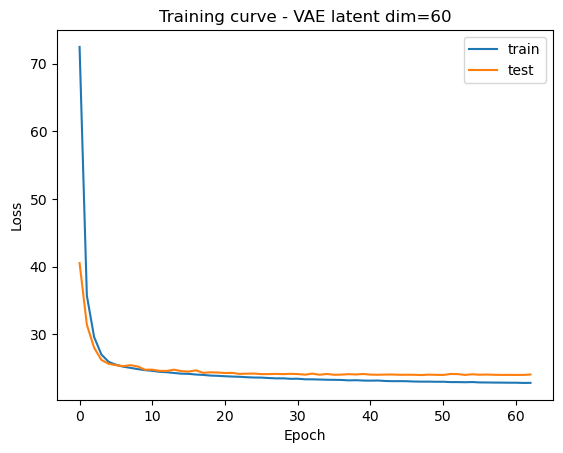

#### latent ndims = 70 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.63it/s]


Epoch [1/100] Train Loss: 84.0489
Epoch [1/100] Test Loss: 50.1953
✅ Best model saved at epoch 1 with test loss: 50.1953


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.98it/s]


Epoch [2/100] Train Loss: 39.7007
Epoch [2/100] Test Loss: 34.4831
✅ Best model saved at epoch 2 with test loss: 34.4831


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.14it/s]


Epoch [3/100] Train Loss: 32.0778
Epoch [3/100] Test Loss: 29.8391
✅ Best model saved at epoch 3 with test loss: 29.8391


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.66it/s]


Epoch [4/100] Train Loss: 28.3014
Epoch [4/100] Test Loss: 26.5439
✅ Best model saved at epoch 4 with test loss: 26.5439


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [5/100] Train Loss: 25.5645
Epoch [5/100] Test Loss: 24.6837
✅ Best model saved at epoch 5 with test loss: 24.6837


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.54it/s]


Epoch [6/100] Train Loss: 24.2724
Epoch [6/100] Test Loss: 23.8277
✅ Best model saved at epoch 6 with test loss: 23.8277


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.30it/s]


Epoch [7/100] Train Loss: 23.5939
Epoch [7/100] Test Loss: 23.3043
✅ Best model saved at epoch 7 with test loss: 23.3043


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.50it/s]


Epoch [8/100] Train Loss: 23.2126
Epoch [8/100] Test Loss: 23.3223


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.20it/s]


Epoch [9/100] Train Loss: 22.8966
Epoch [9/100] Test Loss: 23.0953
✅ Best model saved at epoch 9 with test loss: 23.0953


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.55it/s]


Epoch [10/100] Train Loss: 22.7067
Epoch [10/100] Test Loss: 22.6577
✅ Best model saved at epoch 10 with test loss: 22.6577


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.53it/s]


Epoch [11/100] Train Loss: 22.5691
Epoch [11/100] Test Loss: 23.1582


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.48it/s]


Epoch [12/100] Train Loss: 22.3951
Epoch [12/100] Test Loss: 23.1011


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.40it/s]


Epoch [13/100] Train Loss: 22.3384
Epoch [13/100] Test Loss: 22.4067
✅ Best model saved at epoch 13 with test loss: 22.4067


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [14/100] Train Loss: 22.1706
Epoch [14/100] Test Loss: 22.3240
✅ Best model saved at epoch 14 with test loss: 22.3240


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.68it/s]


Epoch [15/100] Train Loss: 22.0877
Epoch [15/100] Test Loss: 22.2371
✅ Best model saved at epoch 15 with test loss: 22.2371


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.23it/s]


Epoch [16/100] Train Loss: 21.9882
Epoch [16/100] Test Loss: 22.1468
✅ Best model saved at epoch 16 with test loss: 22.1468


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.92it/s]


Epoch [17/100] Train Loss: 21.9126
Epoch [17/100] Test Loss: 22.1529


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [18/100] Train Loss: 21.8657
Epoch [18/100] Test Loss: 22.1394
✅ Best model saved at epoch 18 with test loss: 22.1394


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.44it/s]


Epoch [19/100] Train Loss: 21.8032
Epoch [19/100] Test Loss: 22.2256


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.16it/s]


Epoch [20/100] Train Loss: 21.7111
Epoch [20/100] Test Loss: 22.1232
✅ Best model saved at epoch 20 with test loss: 22.1232


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.34it/s]


Epoch [21/100] Train Loss: 21.6735
Epoch [21/100] Test Loss: 21.9591
✅ Best model saved at epoch 21 with test loss: 21.9591


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.28it/s]


Epoch [22/100] Train Loss: 21.5651
Epoch [22/100] Test Loss: 22.0780


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [23/100] Train Loss: 21.5625
Epoch [23/100] Test Loss: 22.0713


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.85it/s]


Epoch [24/100] Train Loss: 21.5448
Epoch [24/100] Test Loss: 21.9127
✅ Best model saved at epoch 24 with test loss: 21.9127


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.39it/s]


Epoch [25/100] Train Loss: 21.4484
Epoch [25/100] Test Loss: 22.0506


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.45it/s]


Epoch [26/100] Train Loss: 21.4105
Epoch [26/100] Test Loss: 21.9510


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.75it/s]


Epoch [27/100] Train Loss: 21.3608
Epoch [27/100] Test Loss: 21.8874
✅ Best model saved at epoch 27 with test loss: 21.8874


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.00it/s]


Epoch [28/100] Train Loss: 21.3166
Epoch [28/100] Test Loss: 21.8631
✅ Best model saved at epoch 28 with test loss: 21.8631


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [29/100] Train Loss: 21.2887
Epoch [29/100] Test Loss: 21.8551
✅ Best model saved at epoch 29 with test loss: 21.8551


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [30/100] Train Loss: 21.2646
Epoch [30/100] Test Loss: 21.9327


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.56it/s]


Epoch [31/100] Train Loss: 21.2135
Epoch [31/100] Test Loss: 21.9936


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.02it/s]


Epoch [32/100] Train Loss: 21.1944
Epoch [32/100] Test Loss: 21.8379
✅ Best model saved at epoch 32 with test loss: 21.8379


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.44it/s]


Epoch [33/100] Train Loss: 21.1524
Epoch [33/100] Test Loss: 21.8750


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.08it/s]


Epoch [34/100] Train Loss: 21.1241
Epoch [34/100] Test Loss: 21.7869
✅ Best model saved at epoch 34 with test loss: 21.7869


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.70it/s]


Epoch [35/100] Train Loss: 21.1120
Epoch [35/100] Test Loss: 21.8799


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.54it/s]


Epoch [36/100] Train Loss: 21.0671
Epoch [36/100] Test Loss: 21.8691


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.32it/s]


Epoch [37/100] Train Loss: 21.0683
Epoch [37/100] Test Loss: 21.7938


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.46it/s]


Epoch [38/100] Train Loss: 21.0282
Epoch [38/100] Test Loss: 21.7659
✅ Best model saved at epoch 38 with test loss: 21.7659


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.39it/s]


Epoch [39/100] Train Loss: 21.0285
Epoch [39/100] Test Loss: 21.8969


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [40/100] Train Loss: 20.9496
Epoch [40/100] Test Loss: 21.8332


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.00it/s]


Epoch [41/100] Train Loss: 20.9676
Epoch [41/100] Test Loss: 21.7186
✅ Best model saved at epoch 41 with test loss: 21.7186


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.93it/s]


Epoch [42/100] Train Loss: 20.9232
Epoch [42/100] Test Loss: 21.8419


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.86it/s]


Epoch [43/100] Train Loss: 20.9157
Epoch [43/100] Test Loss: 21.7938


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.94it/s]


Epoch [44/100] Train Loss: 20.8871
Epoch [44/100] Test Loss: 21.7954


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [45/100] Train Loss: 20.8741
Epoch [45/100] Test Loss: 21.7184
✅ Best model saved at epoch 45 with test loss: 21.7184


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.13it/s]


Epoch [46/100] Train Loss: 20.8444
Epoch [46/100] Test Loss: 21.8394


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.53it/s]


Epoch [47/100] Train Loss: 20.8363
Epoch [47/100] Test Loss: 21.8192


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.74it/s]


Epoch [48/100] Train Loss: 20.8031
Epoch [48/100] Test Loss: 21.7157
✅ Best model saved at epoch 48 with test loss: 21.7157


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.47it/s]


Epoch [49/100] Train Loss: 20.8047
Epoch [49/100] Test Loss: 21.7502


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.96it/s]


Epoch [50/100] Train Loss: 20.7980
Epoch [50/100] Test Loss: 21.7133
✅ Best model saved at epoch 50 with test loss: 21.7133


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.31it/s]


Epoch [51/100] Train Loss: 20.7741
Epoch [51/100] Test Loss: 21.7082
✅ Best model saved at epoch 51 with test loss: 21.7082


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.75it/s]


Epoch [52/100] Train Loss: 20.7407
Epoch [52/100] Test Loss: 21.7593


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.55it/s]


Epoch [53/100] Train Loss: 20.7309
Epoch [53/100] Test Loss: 21.7524


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.84it/s]


Epoch [54/100] Train Loss: 20.7157
Epoch [54/100] Test Loss: 21.8726


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.91it/s]


Epoch [55/100] Train Loss: 20.7082
Epoch [55/100] Test Loss: 21.6518
✅ Best model saved at epoch 55 with test loss: 21.6518


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.36it/s]


Epoch [56/100] Train Loss: 20.7012
Epoch [56/100] Test Loss: 21.8936


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.75it/s]


Epoch [57/100] Train Loss: 20.6723
Epoch [57/100] Test Loss: 21.7012


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [58/100] Train Loss: 20.6453
Epoch [58/100] Test Loss: 21.7642


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.93it/s]


Epoch [59/100] Train Loss: 20.6595
Epoch [59/100] Test Loss: 21.7467


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [60/100] Train Loss: 20.6466
Epoch [60/100] Test Loss: 21.7806


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.88it/s]


Epoch [61/100] Train Loss: 20.6241
Epoch [61/100] Test Loss: 21.7456


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.65it/s]


Epoch [62/100] Train Loss: 20.5968
Epoch [62/100] Test Loss: 21.7365


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.65it/s]


Epoch [63/100] Train Loss: 20.6152
Epoch [63/100] Test Loss: 21.6986


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.75it/s]


Epoch [64/100] Train Loss: 20.5847
Epoch [64/100] Test Loss: 21.7517


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.06it/s]


Epoch [65/100] Train Loss: 20.5945
Epoch [65/100] Test Loss: 21.6464
✅ Best model saved at epoch 65 with test loss: 21.6464


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.97it/s]


Epoch [66/100] Train Loss: 20.5499
Epoch [66/100] Test Loss: 21.7229


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.55it/s]


Epoch [67/100] Train Loss: 20.5594
Epoch [67/100] Test Loss: 21.8343


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.39it/s]


Epoch [68/100] Train Loss: 20.5412
Epoch [68/100] Test Loss: 21.7004


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.46it/s]


Epoch [69/100] Train Loss: 20.5293
Epoch [69/100] Test Loss: 21.6981


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.85it/s]


Epoch [70/100] Train Loss: 20.5298
Epoch [70/100] Test Loss: 21.7251


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.97it/s]


Epoch [71/100] Train Loss: 20.5289
Epoch [71/100] Test Loss: 21.8631


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [72/100] Train Loss: 20.4898
Epoch [72/100] Test Loss: 21.6898


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.51it/s]


Epoch [73/100] Train Loss: 20.4906
Epoch [73/100] Test Loss: 21.6844


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.35it/s]


Epoch [74/100] Train Loss: 20.4666
Epoch [74/100] Test Loss: 21.7531


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.07it/s]


Epoch [75/100] Train Loss: 20.5031
Epoch [75/100] Test Loss: 21.7371


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.88it/s]


Epoch [76/100] Train Loss: 20.4417
Epoch [76/100] Test Loss: 21.7092


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.22it/s]


Epoch [77/100] Train Loss: 20.4632
Epoch [77/100] Test Loss: 21.6565


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.97it/s]


Epoch [78/100] Train Loss: 20.4648
Epoch [78/100] Test Loss: 21.7574


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.13it/s]


Epoch [79/100] Train Loss: 20.4328
Epoch [79/100] Test Loss: 21.7029


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.54it/s]


Epoch [80/100] Train Loss: 20.4336
Epoch [80/100] Test Loss: 21.7440
🚦🚦🚦 Early stopping triggered 🚦


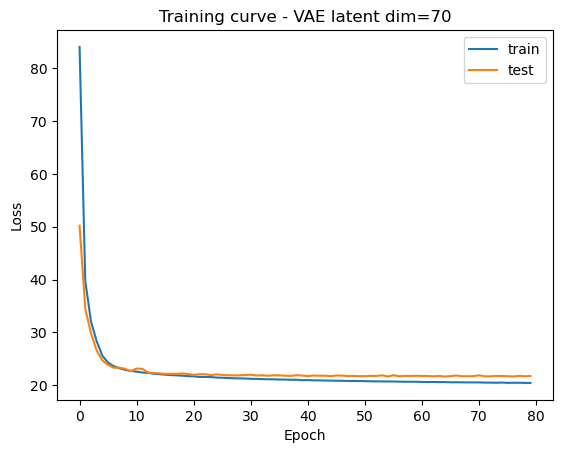

#### latent ndims = 80 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.96it/s]


Epoch [1/100] Train Loss: 72.7725
Epoch [1/100] Test Loss: 40.8651
✅ Best model saved at epoch 1 with test loss: 40.8651


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.33it/s]


Epoch [2/100] Train Loss: 34.3423
Epoch [2/100] Test Loss: 30.5285
✅ Best model saved at epoch 2 with test loss: 30.5285


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [3/100] Train Loss: 27.0750
Epoch [3/100] Test Loss: 24.9948
✅ Best model saved at epoch 3 with test loss: 24.9948


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.69it/s]


Epoch [4/100] Train Loss: 23.8345
Epoch [4/100] Test Loss: 22.8476
✅ Best model saved at epoch 4 with test loss: 22.8476


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.19it/s]


Epoch [5/100] Train Loss: 22.1311
Epoch [5/100] Test Loss: 21.6630
✅ Best model saved at epoch 5 with test loss: 21.6630


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.52it/s]


Epoch [6/100] Train Loss: 21.4230
Epoch [6/100] Test Loss: 21.3263
✅ Best model saved at epoch 6 with test loss: 21.3263


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.84it/s]


Epoch [7/100] Train Loss: 21.1159
Epoch [7/100] Test Loss: 21.4702


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.19it/s]


Epoch [8/100] Train Loss: 20.8285
Epoch [8/100] Test Loss: 20.7028
✅ Best model saved at epoch 8 with test loss: 20.7028


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.99it/s]


Epoch [9/100] Train Loss: 20.5857
Epoch [9/100] Test Loss: 20.6169
✅ Best model saved at epoch 9 with test loss: 20.6169


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [10/100] Train Loss: 20.4220
Epoch [10/100] Test Loss: 20.4627
✅ Best model saved at epoch 10 with test loss: 20.4627


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.18it/s]


Epoch [11/100] Train Loss: 20.2917
Epoch [11/100] Test Loss: 20.4297
✅ Best model saved at epoch 11 with test loss: 20.4297


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.28it/s]


Epoch [12/100] Train Loss: 20.2114
Epoch [12/100] Test Loss: 20.3680
✅ Best model saved at epoch 12 with test loss: 20.3680


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.62it/s]


Epoch [13/100] Train Loss: 20.0583
Epoch [13/100] Test Loss: 20.2967
✅ Best model saved at epoch 13 with test loss: 20.2967


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [14/100] Train Loss: 20.0093
Epoch [14/100] Test Loss: 20.3489


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.60it/s]


Epoch [15/100] Train Loss: 19.9027
Epoch [15/100] Test Loss: 20.0861
✅ Best model saved at epoch 15 with test loss: 20.0861


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.56it/s]


Epoch [16/100] Train Loss: 19.8322
Epoch [16/100] Test Loss: 20.1465


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.55it/s]


Epoch [17/100] Train Loss: 19.8157
Epoch [17/100] Test Loss: 20.0693
✅ Best model saved at epoch 17 with test loss: 20.0693


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.50it/s]


Epoch [18/100] Train Loss: 19.6742
Epoch [18/100] Test Loss: 20.1217


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.97it/s]


Epoch [19/100] Train Loss: 19.7307
Epoch [19/100] Test Loss: 19.9731
✅ Best model saved at epoch 19 with test loss: 19.9731


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.38it/s]


Epoch [20/100] Train Loss: 19.6152
Epoch [20/100] Test Loss: 19.9198
✅ Best model saved at epoch 20 with test loss: 19.9198


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.47it/s]


Epoch [21/100] Train Loss: 19.5378
Epoch [21/100] Test Loss: 20.0711


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [22/100] Train Loss: 19.5076
Epoch [22/100] Test Loss: 19.9689


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [23/100] Train Loss: 19.4533
Epoch [23/100] Test Loss: 20.0707


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.84it/s]


Epoch [24/100] Train Loss: 19.4138
Epoch [24/100] Test Loss: 19.9041
✅ Best model saved at epoch 24 with test loss: 19.9041


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.03it/s]


Epoch [25/100] Train Loss: 19.3700
Epoch [25/100] Test Loss: 19.9239


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [26/100] Train Loss: 19.3275
Epoch [26/100] Test Loss: 19.8743
✅ Best model saved at epoch 26 with test loss: 19.8743


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.34it/s]


Epoch [27/100] Train Loss: 19.3242
Epoch [27/100] Test Loss: 19.8855


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.97it/s]


Epoch [28/100] Train Loss: 19.2462
Epoch [28/100] Test Loss: 19.7930
✅ Best model saved at epoch 28 with test loss: 19.7930


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.02it/s]


Epoch [29/100] Train Loss: 19.2470
Epoch [29/100] Test Loss: 19.7675
✅ Best model saved at epoch 29 with test loss: 19.7675


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.31it/s]


Epoch [30/100] Train Loss: 19.1762
Epoch [30/100] Test Loss: 19.8116


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [31/100] Train Loss: 19.1841
Epoch [31/100] Test Loss: 19.8387


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.26it/s]


Epoch [32/100] Train Loss: 19.1556
Epoch [32/100] Test Loss: 19.8040


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.34it/s]


Epoch [33/100] Train Loss: 19.1028
Epoch [33/100] Test Loss: 19.6841
✅ Best model saved at epoch 33 with test loss: 19.6841


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.66it/s]


Epoch [34/100] Train Loss: 19.0815
Epoch [34/100] Test Loss: 19.7217


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.35it/s]


Epoch [35/100] Train Loss: 19.0594
Epoch [35/100] Test Loss: 19.7270


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.79it/s]


Epoch [36/100] Train Loss: 19.0652
Epoch [36/100] Test Loss: 19.8019


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [37/100] Train Loss: 18.9994
Epoch [37/100] Test Loss: 19.6891


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.91it/s]


Epoch [38/100] Train Loss: 18.9871
Epoch [38/100] Test Loss: 19.7051


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.73it/s]


Epoch [39/100] Train Loss: 18.9698
Epoch [39/100] Test Loss: 19.6902


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.47it/s]


Epoch [40/100] Train Loss: 18.9558
Epoch [40/100] Test Loss: 19.7894


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [41/100] Train Loss: 18.9427
Epoch [41/100] Test Loss: 19.7344


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.82it/s]


Epoch [42/100] Train Loss: 18.9157
Epoch [42/100] Test Loss: 19.6501
✅ Best model saved at epoch 42 with test loss: 19.6501


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.12it/s]


Epoch [43/100] Train Loss: 18.8958
Epoch [43/100] Test Loss: 19.6851


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.06it/s]


Epoch [44/100] Train Loss: 18.8744
Epoch [44/100] Test Loss: 19.7274


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.31it/s]


Epoch [45/100] Train Loss: 18.8590
Epoch [45/100] Test Loss: 19.6598


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [46/100] Train Loss: 18.8329
Epoch [46/100] Test Loss: 19.7169


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.89it/s]


Epoch [47/100] Train Loss: 18.8259
Epoch [47/100] Test Loss: 19.6880


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.18it/s]


Epoch [48/100] Train Loss: 18.8039
Epoch [48/100] Test Loss: 19.6576


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.47it/s]


Epoch [49/100] Train Loss: 18.7939
Epoch [49/100] Test Loss: 19.7084


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.65it/s]


Epoch [50/100] Train Loss: 18.7929
Epoch [50/100] Test Loss: 19.6771


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.34it/s]


Epoch [51/100] Train Loss: 18.7562
Epoch [51/100] Test Loss: 19.7047


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [52/100] Train Loss: 18.7592
Epoch [52/100] Test Loss: 19.7456


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.03it/s]


Epoch [53/100] Train Loss: 18.7151
Epoch [53/100] Test Loss: 19.6755


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.47it/s]


Epoch [54/100] Train Loss: 18.7263
Epoch [54/100] Test Loss: 19.6082
✅ Best model saved at epoch 54 with test loss: 19.6082


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.40it/s]


Epoch [55/100] Train Loss: 18.6986
Epoch [55/100] Test Loss: 19.7847


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.81it/s]


Epoch [56/100] Train Loss: 18.7166
Epoch [56/100] Test Loss: 19.6950


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 84.04it/s]


Epoch [57/100] Train Loss: 18.6612
Epoch [57/100] Test Loss: 19.6446


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.61it/s]


Epoch [58/100] Train Loss: 18.6721
Epoch [58/100] Test Loss: 19.6297


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.78it/s]


Epoch [59/100] Train Loss: 18.6693
Epoch [59/100] Test Loss: 19.6563


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.70it/s]


Epoch [60/100] Train Loss: 18.6714
Epoch [60/100] Test Loss: 19.5937
✅ Best model saved at epoch 60 with test loss: 19.5937


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.11it/s]


Epoch [61/100] Train Loss: 18.6258
Epoch [61/100] Test Loss: 19.7169


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [62/100] Train Loss: 18.6252
Epoch [62/100] Test Loss: 19.6877


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.67it/s]


Epoch [63/100] Train Loss: 18.6045
Epoch [63/100] Test Loss: 19.6292


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.89it/s]


Epoch [64/100] Train Loss: 18.6002
Epoch [64/100] Test Loss: 19.7012


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.59it/s]


Epoch [65/100] Train Loss: 18.5979
Epoch [65/100] Test Loss: 19.6546


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.07it/s]


Epoch [66/100] Train Loss: 18.5710
Epoch [66/100] Test Loss: 19.6396


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.39it/s]


Epoch [67/100] Train Loss: 18.5985
Epoch [67/100] Test Loss: 19.6308


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.70it/s]


Epoch [68/100] Train Loss: 18.5546
Epoch [68/100] Test Loss: 19.6096


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.86it/s]


Epoch [69/100] Train Loss: 18.5636
Epoch [69/100] Test Loss: 19.6917


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.90it/s]


Epoch [70/100] Train Loss: 18.5501
Epoch [70/100] Test Loss: 19.6590


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.46it/s]


Epoch [71/100] Train Loss: 18.5334
Epoch [71/100] Test Loss: 19.6351


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.83it/s]


Epoch [72/100] Train Loss: 18.5257
Epoch [72/100] Test Loss: 19.6516


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.43it/s]


Epoch [73/100] Train Loss: 18.5146
Epoch [73/100] Test Loss: 19.6711


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [74/100] Train Loss: 18.5154
Epoch [74/100] Test Loss: 19.6524


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.41it/s]


Epoch [75/100] Train Loss: 18.4990
Epoch [75/100] Test Loss: 19.6111
🚦🚦🚦 Early stopping triggered 🚦


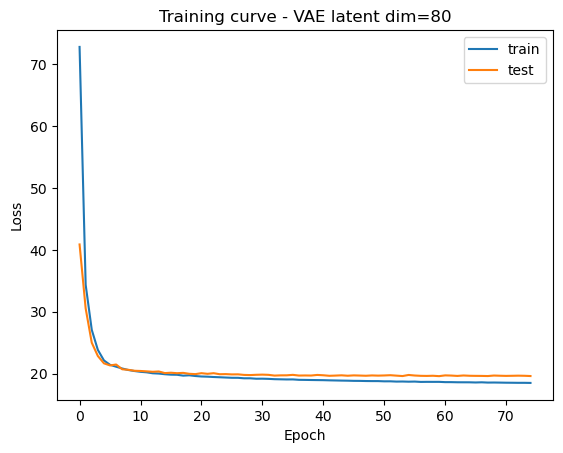

#### latent ndims = 90 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.23it/s]


Epoch [1/100] Train Loss: 74.5119
Epoch [1/100] Test Loss: 41.4188
✅ Best model saved at epoch 1 with test loss: 41.4188


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.80it/s]


Epoch [2/100] Train Loss: 35.2064
Epoch [2/100] Test Loss: 30.6134
✅ Best model saved at epoch 2 with test loss: 30.6134


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.58it/s]


Epoch [3/100] Train Loss: 28.1671
Epoch [3/100] Test Loss: 25.5621
✅ Best model saved at epoch 3 with test loss: 25.5621


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.65it/s]


Epoch [4/100] Train Loss: 24.0768
Epoch [4/100] Test Loss: 22.6201
✅ Best model saved at epoch 4 with test loss: 22.6201


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.67it/s]


Epoch [5/100] Train Loss: 21.8194
Epoch [5/100] Test Loss: 21.1778
✅ Best model saved at epoch 5 with test loss: 21.1778


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [6/100] Train Loss: 20.4898
Epoch [6/100] Test Loss: 19.9924
✅ Best model saved at epoch 6 with test loss: 19.9924


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.43it/s]


Epoch [7/100] Train Loss: 19.7925
Epoch [7/100] Test Loss: 19.5184
✅ Best model saved at epoch 7 with test loss: 19.5184


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [8/100] Train Loss: 19.4294
Epoch [8/100] Test Loss: 19.7875


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.43it/s]


Epoch [9/100] Train Loss: 19.2328
Epoch [9/100] Test Loss: 19.2559
✅ Best model saved at epoch 9 with test loss: 19.2559


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.33it/s]


Epoch [10/100] Train Loss: 19.0122
Epoch [10/100] Test Loss: 19.3396


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [11/100] Train Loss: 18.8389
Epoch [11/100] Test Loss: 18.8480
✅ Best model saved at epoch 11 with test loss: 18.8480


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.53it/s]


Epoch [12/100] Train Loss: 18.7025
Epoch [12/100] Test Loss: 18.7811
✅ Best model saved at epoch 12 with test loss: 18.7811


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.79it/s]


Epoch [13/100] Train Loss: 18.5523
Epoch [13/100] Test Loss: 18.6581
✅ Best model saved at epoch 13 with test loss: 18.6581


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.74it/s]


Epoch [14/100] Train Loss: 18.4919
Epoch [14/100] Test Loss: 18.7348


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.12it/s]


Epoch [15/100] Train Loss: 18.3686
Epoch [15/100] Test Loss: 18.4967
✅ Best model saved at epoch 15 with test loss: 18.4967


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.73it/s]


Epoch [16/100] Train Loss: 18.3197
Epoch [16/100] Test Loss: 18.5431


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.85it/s]


Epoch [17/100] Train Loss: 18.2486
Epoch [17/100] Test Loss: 18.4305
✅ Best model saved at epoch 17 with test loss: 18.4305


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.09it/s]


Epoch [18/100] Train Loss: 18.1677
Epoch [18/100] Test Loss: 18.6575


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.92it/s]


Epoch [19/100] Train Loss: 18.1573
Epoch [19/100] Test Loss: 18.4480


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.35it/s]


Epoch [20/100] Train Loss: 18.0390
Epoch [20/100] Test Loss: 18.2992
✅ Best model saved at epoch 20 with test loss: 18.2992


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.72it/s]


Epoch [21/100] Train Loss: 18.0207
Epoch [21/100] Test Loss: 18.3248


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.74it/s]


Epoch [22/100] Train Loss: 17.9391
Epoch [22/100] Test Loss: 18.4259


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.69it/s]


Epoch [23/100] Train Loss: 17.8978
Epoch [23/100] Test Loss: 18.3018


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [24/100] Train Loss: 17.8818
Epoch [24/100] Test Loss: 18.2466
✅ Best model saved at epoch 24 with test loss: 18.2466


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.66it/s]


Epoch [25/100] Train Loss: 17.8356
Epoch [25/100] Test Loss: 18.2409
✅ Best model saved at epoch 25 with test loss: 18.2409


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.95it/s]


Epoch [26/100] Train Loss: 17.7817
Epoch [26/100] Test Loss: 18.1477
✅ Best model saved at epoch 26 with test loss: 18.1477


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.62it/s]


Epoch [27/100] Train Loss: 17.7736
Epoch [27/100] Test Loss: 18.1904


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.17it/s]


Epoch [28/100] Train Loss: 17.7235
Epoch [28/100] Test Loss: 18.2368


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.51it/s]


Epoch [29/100] Train Loss: 17.6900
Epoch [29/100] Test Loss: 18.1150
✅ Best model saved at epoch 29 with test loss: 18.1150


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.90it/s]


Epoch [30/100] Train Loss: 17.6573
Epoch [30/100] Test Loss: 18.2373


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.01it/s]


Epoch [31/100] Train Loss: 17.6433
Epoch [31/100] Test Loss: 18.2976


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [32/100] Train Loss: 17.6205
Epoch [32/100] Test Loss: 18.1282


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [33/100] Train Loss: 17.5679
Epoch [33/100] Test Loss: 18.3504


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [34/100] Train Loss: 17.5626
Epoch [34/100] Test Loss: 18.0872
✅ Best model saved at epoch 34 with test loss: 18.0872


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.37it/s]


Epoch [35/100] Train Loss: 17.5303
Epoch [35/100] Test Loss: 18.1161


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.18it/s]


Epoch [36/100] Train Loss: 17.5156
Epoch [36/100] Test Loss: 18.1086


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.10it/s]


Epoch [37/100] Train Loss: 17.4855
Epoch [37/100] Test Loss: 18.1105


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.59it/s]


Epoch [38/100] Train Loss: 17.4578
Epoch [38/100] Test Loss: 18.1527


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [39/100] Train Loss: 17.4325
Epoch [39/100] Test Loss: 18.2091


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.38it/s]


Epoch [40/100] Train Loss: 17.4289
Epoch [40/100] Test Loss: 18.0782
✅ Best model saved at epoch 40 with test loss: 18.0782


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.35it/s]


Epoch [41/100] Train Loss: 17.3949
Epoch [41/100] Test Loss: 18.0677
✅ Best model saved at epoch 41 with test loss: 18.0677


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.29it/s]


Epoch [42/100] Train Loss: 17.3841
Epoch [42/100] Test Loss: 18.0264
✅ Best model saved at epoch 42 with test loss: 18.0264


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.43it/s]


Epoch [43/100] Train Loss: 17.3800
Epoch [43/100] Test Loss: 18.0645


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.10it/s]


Epoch [44/100] Train Loss: 17.3420
Epoch [44/100] Test Loss: 18.3108


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.32it/s]


Epoch [45/100] Train Loss: 17.3753
Epoch [45/100] Test Loss: 18.0977


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.45it/s]


Epoch [46/100] Train Loss: 17.2923
Epoch [46/100] Test Loss: 18.0348


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.97it/s]


Epoch [47/100] Train Loss: 17.2783
Epoch [47/100] Test Loss: 18.0818


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.30it/s]


Epoch [48/100] Train Loss: 17.2827
Epoch [48/100] Test Loss: 17.9844
✅ Best model saved at epoch 48 with test loss: 17.9844


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.73it/s]


Epoch [49/100] Train Loss: 17.2630
Epoch [49/100] Test Loss: 18.0447


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.64it/s]


Epoch [50/100] Train Loss: 17.2516
Epoch [50/100] Test Loss: 18.1004


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.46it/s]


Epoch [51/100] Train Loss: 17.2374
Epoch [51/100] Test Loss: 18.0441


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.55it/s]


Epoch [52/100] Train Loss: 17.2166
Epoch [52/100] Test Loss: 17.9883


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.77it/s]


Epoch [53/100] Train Loss: 17.2005
Epoch [53/100] Test Loss: 18.1135


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.41it/s]


Epoch [54/100] Train Loss: 17.2013
Epoch [54/100] Test Loss: 17.9980


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.13it/s]


Epoch [55/100] Train Loss: 17.1874
Epoch [55/100] Test Loss: 18.2719


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [56/100] Train Loss: 17.1746
Epoch [56/100] Test Loss: 18.0284


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.00it/s]


Epoch [57/100] Train Loss: 17.1457
Epoch [57/100] Test Loss: 18.1143


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [58/100] Train Loss: 17.1676
Epoch [58/100] Test Loss: 18.0602


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.74it/s]


Epoch [59/100] Train Loss: 17.1344
Epoch [59/100] Test Loss: 18.0244


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.67it/s]


Epoch [60/100] Train Loss: 17.1153
Epoch [60/100] Test Loss: 18.1936


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.05it/s]


Epoch [61/100] Train Loss: 17.1172
Epoch [61/100] Test Loss: 18.0974


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.64it/s]


Epoch [62/100] Train Loss: 17.0826
Epoch [62/100] Test Loss: 18.0592


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [63/100] Train Loss: 17.1044
Epoch [63/100] Test Loss: 18.0149
🚦🚦🚦 Early stopping triggered 🚦


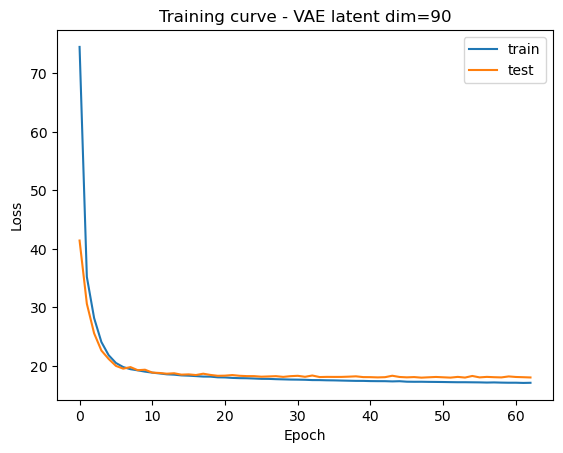

#### latent ndims = 100 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.52it/s]


Epoch [1/100] Train Loss: 71.1600
Epoch [1/100] Test Loss: 38.6877
✅ Best model saved at epoch 1 with test loss: 38.6877


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.29it/s]


Epoch [2/100] Train Loss: 33.4815
Epoch [2/100] Test Loss: 29.3927
✅ Best model saved at epoch 2 with test loss: 29.3927


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [3/100] Train Loss: 26.7095
Epoch [3/100] Test Loss: 24.5221
✅ Best model saved at epoch 3 with test loss: 24.5221


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.79it/s]


Epoch [4/100] Train Loss: 22.8542
Epoch [4/100] Test Loss: 21.4835
✅ Best model saved at epoch 4 with test loss: 21.4835


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.68it/s]


Epoch [5/100] Train Loss: 20.7391
Epoch [5/100] Test Loss: 19.9107
✅ Best model saved at epoch 5 with test loss: 19.9107


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.17it/s]


Epoch [6/100] Train Loss: 19.5004
Epoch [6/100] Test Loss: 19.0534
✅ Best model saved at epoch 6 with test loss: 19.0534


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.87it/s]


Epoch [7/100] Train Loss: 18.7212
Epoch [7/100] Test Loss: 18.5494
✅ Best model saved at epoch 7 with test loss: 18.5494


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.57it/s]


Epoch [8/100] Train Loss: 18.2842
Epoch [8/100] Test Loss: 18.0903
✅ Best model saved at epoch 8 with test loss: 18.0903


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.62it/s]


Epoch [9/100] Train Loss: 17.9841
Epoch [9/100] Test Loss: 17.8373
✅ Best model saved at epoch 9 with test loss: 17.8373


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [10/100] Train Loss: 17.7642
Epoch [10/100] Test Loss: 17.7317
✅ Best model saved at epoch 10 with test loss: 17.7317


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.98it/s]


Epoch [11/100] Train Loss: 17.5909
Epoch [11/100] Test Loss: 17.5581
✅ Best model saved at epoch 11 with test loss: 17.5581


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.73it/s]


Epoch [12/100] Train Loss: 17.4321
Epoch [12/100] Test Loss: 17.6324


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.11it/s]


Epoch [13/100] Train Loss: 17.3448
Epoch [13/100] Test Loss: 17.4665
✅ Best model saved at epoch 13 with test loss: 17.4665


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.82it/s]


Epoch [14/100] Train Loss: 17.1716
Epoch [14/100] Test Loss: 17.5134


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.36it/s]


Epoch [15/100] Train Loss: 17.1288
Epoch [15/100] Test Loss: 17.3503
✅ Best model saved at epoch 15 with test loss: 17.3503


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.81it/s]


Epoch [16/100] Train Loss: 17.0508
Epoch [16/100] Test Loss: 17.1726
✅ Best model saved at epoch 16 with test loss: 17.1726


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.46it/s]


Epoch [17/100] Train Loss: 16.9786
Epoch [17/100] Test Loss: 17.0720
✅ Best model saved at epoch 17 with test loss: 17.0720


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.92it/s]


Epoch [18/100] Train Loss: 16.8988
Epoch [18/100] Test Loss: 17.1573


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.48it/s]


Epoch [19/100] Train Loss: 16.8330
Epoch [19/100] Test Loss: 17.1005


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.53it/s]


Epoch [20/100] Train Loss: 16.7823
Epoch [20/100] Test Loss: 16.9548
✅ Best model saved at epoch 20 with test loss: 16.9548


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.23it/s]


Epoch [21/100] Train Loss: 16.7468
Epoch [21/100] Test Loss: 16.9098
✅ Best model saved at epoch 21 with test loss: 16.9098


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.57it/s]


Epoch [22/100] Train Loss: 16.6886
Epoch [22/100] Test Loss: 16.9564


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [23/100] Train Loss: 16.6442
Epoch [23/100] Test Loss: 17.0005


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.02it/s]


Epoch [24/100] Train Loss: 16.6041
Epoch [24/100] Test Loss: 16.9744


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [25/100] Train Loss: 16.6410
Epoch [25/100] Test Loss: 16.9157


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.71it/s]


Epoch [26/100] Train Loss: 16.4951
Epoch [26/100] Test Loss: 16.8886
✅ Best model saved at epoch 26 with test loss: 16.8886


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.08it/s]


Epoch [27/100] Train Loss: 16.4658
Epoch [27/100] Test Loss: 16.8756
✅ Best model saved at epoch 27 with test loss: 16.8756


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.20it/s]


Epoch [28/100] Train Loss: 16.4483
Epoch [28/100] Test Loss: 16.8236
✅ Best model saved at epoch 28 with test loss: 16.8236


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.58it/s]


Epoch [29/100] Train Loss: 16.3898
Epoch [29/100] Test Loss: 16.7774
✅ Best model saved at epoch 29 with test loss: 16.7774


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.56it/s]


Epoch [30/100] Train Loss: 16.3729
Epoch [30/100] Test Loss: 17.0374


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.95it/s]


Epoch [31/100] Train Loss: 16.3935
Epoch [31/100] Test Loss: 16.7857


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.42it/s]


Epoch [32/100] Train Loss: 16.3082
Epoch [32/100] Test Loss: 16.8003


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.49it/s]


Epoch [33/100] Train Loss: 16.3032
Epoch [33/100] Test Loss: 16.8954


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.35it/s]


Epoch [34/100] Train Loss: 16.2689
Epoch [34/100] Test Loss: 16.8973


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.10it/s]


Epoch [35/100] Train Loss: 16.2670
Epoch [35/100] Test Loss: 16.8545


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.22it/s]


Epoch [36/100] Train Loss: 16.1940
Epoch [36/100] Test Loss: 16.7315
✅ Best model saved at epoch 36 with test loss: 16.7315


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.82it/s]


Epoch [37/100] Train Loss: 16.2069
Epoch [37/100] Test Loss: 16.7911


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.51it/s]


Epoch [38/100] Train Loss: 16.1950
Epoch [38/100] Test Loss: 16.9055


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.63it/s]


Epoch [39/100] Train Loss: 16.1406
Epoch [39/100] Test Loss: 16.8371


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [40/100] Train Loss: 16.1498
Epoch [40/100] Test Loss: 16.7056
✅ Best model saved at epoch 40 with test loss: 16.7056


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.30it/s]


Epoch [41/100] Train Loss: 16.1129
Epoch [41/100] Test Loss: 16.7502


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.74it/s]


Epoch [42/100] Train Loss: 16.0958
Epoch [42/100] Test Loss: 16.7503


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.12it/s]


Epoch [43/100] Train Loss: 16.0716
Epoch [43/100] Test Loss: 16.8498


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [44/100] Train Loss: 16.0583
Epoch [44/100] Test Loss: 16.7219


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.74it/s]


Epoch [45/100] Train Loss: 16.0226
Epoch [45/100] Test Loss: 16.7467


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.94it/s]


Epoch [46/100] Train Loss: 16.0326
Epoch [46/100] Test Loss: 16.7123


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.22it/s]


Epoch [47/100] Train Loss: 16.0130
Epoch [47/100] Test Loss: 16.7525


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.77it/s]


Epoch [48/100] Train Loss: 15.9906
Epoch [48/100] Test Loss: 16.7909


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.61it/s]


Epoch [49/100] Train Loss: 15.9702
Epoch [49/100] Test Loss: 16.6776
✅ Best model saved at epoch 49 with test loss: 16.6776


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.70it/s]


Epoch [50/100] Train Loss: 15.9524
Epoch [50/100] Test Loss: 16.7179


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.28it/s]


Epoch [51/100] Train Loss: 15.9611
Epoch [51/100] Test Loss: 16.6837


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.74it/s]


Epoch [52/100] Train Loss: 15.9156
Epoch [52/100] Test Loss: 16.6688
✅ Best model saved at epoch 52 with test loss: 16.6688


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [53/100] Train Loss: 15.9331
Epoch [53/100] Test Loss: 16.7211


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.87it/s]


Epoch [54/100] Train Loss: 15.8958
Epoch [54/100] Test Loss: 16.6275
✅ Best model saved at epoch 54 with test loss: 16.6275


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.36it/s]


Epoch [55/100] Train Loss: 15.8873
Epoch [55/100] Test Loss: 16.7756


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.40it/s]


Epoch [56/100] Train Loss: 15.8908
Epoch [56/100] Test Loss: 16.6415


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.60it/s]


Epoch [57/100] Train Loss: 15.8567
Epoch [57/100] Test Loss: 16.8119


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.11it/s]


Epoch [58/100] Train Loss: 15.8599
Epoch [58/100] Test Loss: 16.7115


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.82it/s]


Epoch [59/100] Train Loss: 15.8394
Epoch [59/100] Test Loss: 16.7034


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.28it/s]


Epoch [60/100] Train Loss: 15.8293
Epoch [60/100] Test Loss: 16.6285


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.84it/s]


Epoch [61/100] Train Loss: 15.8152
Epoch [61/100] Test Loss: 16.7435


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.93it/s]


Epoch [62/100] Train Loss: 15.8124
Epoch [62/100] Test Loss: 16.6893


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.77it/s]


Epoch [63/100] Train Loss: 15.8030
Epoch [63/100] Test Loss: 16.7042


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.83it/s]


Epoch [64/100] Train Loss: 15.7753
Epoch [64/100] Test Loss: 16.7234


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.79it/s]


Epoch [65/100] Train Loss: 15.7892
Epoch [65/100] Test Loss: 16.8258


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.57it/s]


Epoch [66/100] Train Loss: 15.7626
Epoch [66/100] Test Loss: 16.7109


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [67/100] Train Loss: 15.7658
Epoch [67/100] Test Loss: 16.7949


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.57it/s]


Epoch [68/100] Train Loss: 15.7493
Epoch [68/100] Test Loss: 16.7435


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [69/100] Train Loss: 15.7238
Epoch [69/100] Test Loss: 16.8358
🚦🚦🚦 Early stopping triggered 🚦


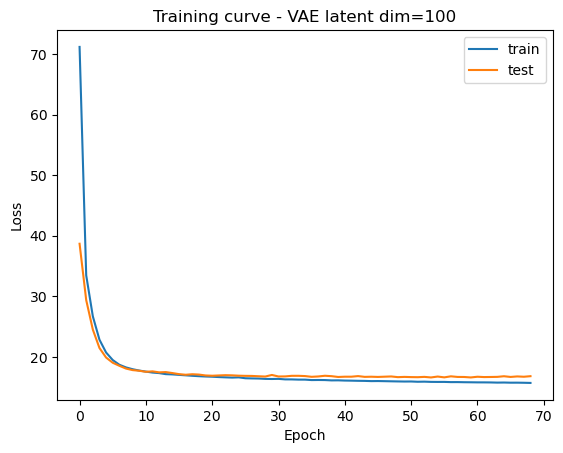

#### latent ndims = 120 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.24it/s]


Epoch [1/100] Train Loss: 73.8041
Epoch [1/100] Test Loss: 39.6655
✅ Best model saved at epoch 1 with test loss: 39.6655


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [2/100] Train Loss: 34.2206
Epoch [2/100] Test Loss: 30.0485
✅ Best model saved at epoch 2 with test loss: 30.0485


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.93it/s]


Epoch [3/100] Train Loss: 26.9002
Epoch [3/100] Test Loss: 24.2769
✅ Best model saved at epoch 3 with test loss: 24.2769


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.53it/s]


Epoch [4/100] Train Loss: 22.6569
Epoch [4/100] Test Loss: 21.3205
✅ Best model saved at epoch 4 with test loss: 21.3205


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.29it/s]


Epoch [5/100] Train Loss: 20.1760
Epoch [5/100] Test Loss: 19.2467
✅ Best model saved at epoch 5 with test loss: 19.2467


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.92it/s]


Epoch [6/100] Train Loss: 18.5462
Epoch [6/100] Test Loss: 18.2281
✅ Best model saved at epoch 6 with test loss: 18.2281


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.04it/s]


Epoch [7/100] Train Loss: 17.5705
Epoch [7/100] Test Loss: 16.9122
✅ Best model saved at epoch 7 with test loss: 16.9122


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.74it/s]


Epoch [8/100] Train Loss: 16.6562
Epoch [8/100] Test Loss: 16.3715
✅ Best model saved at epoch 8 with test loss: 16.3715


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.93it/s]


Epoch [9/100] Train Loss: 16.1728
Epoch [9/100] Test Loss: 16.2964
✅ Best model saved at epoch 9 with test loss: 16.2964


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.06it/s]


Epoch [10/100] Train Loss: 15.8036
Epoch [10/100] Test Loss: 15.7391
✅ Best model saved at epoch 10 with test loss: 15.7391


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.12it/s]


Epoch [11/100] Train Loss: 15.5546
Epoch [11/100] Test Loss: 15.6557
✅ Best model saved at epoch 11 with test loss: 15.6557


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.73it/s]


Epoch [12/100] Train Loss: 15.4282
Epoch [12/100] Test Loss: 15.8421


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.53it/s]


Epoch [13/100] Train Loss: 15.2882
Epoch [13/100] Test Loss: 15.4846
✅ Best model saved at epoch 13 with test loss: 15.4846


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.87it/s]


Epoch [14/100] Train Loss: 15.2044
Epoch [14/100] Test Loss: 15.2980
✅ Best model saved at epoch 14 with test loss: 15.2980


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.12it/s]


Epoch [15/100] Train Loss: 15.0909
Epoch [15/100] Test Loss: 15.3445


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [16/100] Train Loss: 15.0054
Epoch [16/100] Test Loss: 15.0855
✅ Best model saved at epoch 16 with test loss: 15.0855


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.43it/s]


Epoch [17/100] Train Loss: 14.9403
Epoch [17/100] Test Loss: 15.0381
✅ Best model saved at epoch 17 with test loss: 15.0381


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.00it/s]


Epoch [18/100] Train Loss: 14.8850
Epoch [18/100] Test Loss: 15.0018
✅ Best model saved at epoch 18 with test loss: 15.0018


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.26it/s]


Epoch [19/100] Train Loss: 14.7895
Epoch [19/100] Test Loss: 15.0944


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.67it/s]


Epoch [20/100] Train Loss: 14.7259
Epoch [20/100] Test Loss: 14.9235
✅ Best model saved at epoch 20 with test loss: 14.9235


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.65it/s]


Epoch [21/100] Train Loss: 14.6552
Epoch [21/100] Test Loss: 14.8893
✅ Best model saved at epoch 21 with test loss: 14.8893


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.36it/s]


Epoch [22/100] Train Loss: 14.6182
Epoch [22/100] Test Loss: 14.8643
✅ Best model saved at epoch 22 with test loss: 14.8643


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.85it/s]


Epoch [23/100] Train Loss: 14.6087
Epoch [23/100] Test Loss: 14.9265


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.22it/s]


Epoch [24/100] Train Loss: 14.4802
Epoch [24/100] Test Loss: 14.7775
✅ Best model saved at epoch 24 with test loss: 14.7775


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.72it/s]


Epoch [25/100] Train Loss: 14.4738
Epoch [25/100] Test Loss: 14.7385
✅ Best model saved at epoch 25 with test loss: 14.7385


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.46it/s]


Epoch [26/100] Train Loss: 14.4344
Epoch [26/100] Test Loss: 14.7551


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.43it/s]


Epoch [27/100] Train Loss: 14.4072
Epoch [27/100] Test Loss: 14.7049
✅ Best model saved at epoch 27 with test loss: 14.7049


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.94it/s]


Epoch [28/100] Train Loss: 14.3525
Epoch [28/100] Test Loss: 14.6710
✅ Best model saved at epoch 28 with test loss: 14.6710


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [29/100] Train Loss: 14.3302
Epoch [29/100] Test Loss: 14.6956


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.26it/s]


Epoch [30/100] Train Loss: 14.2952
Epoch [30/100] Test Loss: 14.6592
✅ Best model saved at epoch 30 with test loss: 14.6592


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.88it/s]


Epoch [31/100] Train Loss: 14.2991
Epoch [31/100] Test Loss: 14.6067
✅ Best model saved at epoch 31 with test loss: 14.6067


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.41it/s]


Epoch [32/100] Train Loss: 14.2303
Epoch [32/100] Test Loss: 14.6210


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.14it/s]


Epoch [33/100] Train Loss: 14.2621
Epoch [33/100] Test Loss: 14.6070


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.22it/s]


Epoch [34/100] Train Loss: 14.1720
Epoch [34/100] Test Loss: 14.6700


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.80it/s]


Epoch [35/100] Train Loss: 14.1689
Epoch [35/100] Test Loss: 14.5763
✅ Best model saved at epoch 35 with test loss: 14.5763


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.46it/s]


Epoch [36/100] Train Loss: 14.1596
Epoch [36/100] Test Loss: 14.5593
✅ Best model saved at epoch 36 with test loss: 14.5593


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.94it/s]


Epoch [37/100] Train Loss: 14.1197
Epoch [37/100] Test Loss: 14.6218


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.57it/s]


Epoch [38/100] Train Loss: 14.1166
Epoch [38/100] Test Loss: 14.6103


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.91it/s]


Epoch [39/100] Train Loss: 14.0848
Epoch [39/100] Test Loss: 14.5967


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [40/100] Train Loss: 14.0625
Epoch [40/100] Test Loss: 14.5807


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.64it/s]


Epoch [41/100] Train Loss: 14.0424
Epoch [41/100] Test Loss: 14.5821


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.54it/s]


Epoch [42/100] Train Loss: 14.0269
Epoch [42/100] Test Loss: 14.5287
✅ Best model saved at epoch 42 with test loss: 14.5287


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.18it/s]


Epoch [43/100] Train Loss: 14.0221
Epoch [43/100] Test Loss: 14.5628


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [44/100] Train Loss: 13.9849
Epoch [44/100] Test Loss: 14.5988


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.35it/s]


Epoch [45/100] Train Loss: 13.9931
Epoch [45/100] Test Loss: 14.5824


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.74it/s]


Epoch [46/100] Train Loss: 13.9410
Epoch [46/100] Test Loss: 14.5067
✅ Best model saved at epoch 46 with test loss: 14.5067


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.94it/s]


Epoch [47/100] Train Loss: 13.9457
Epoch [47/100] Test Loss: 14.5541


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.79it/s]


Epoch [48/100] Train Loss: 13.9349
Epoch [48/100] Test Loss: 14.6523


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.00it/s]


Epoch [49/100] Train Loss: 13.9182
Epoch [49/100] Test Loss: 14.7387


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.48it/s]


Epoch [50/100] Train Loss: 13.8969
Epoch [50/100] Test Loss: 14.4889
✅ Best model saved at epoch 50 with test loss: 14.4889


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.30it/s]


Epoch [51/100] Train Loss: 13.8941
Epoch [51/100] Test Loss: 14.6833


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.09it/s]


Epoch [52/100] Train Loss: 13.8794
Epoch [52/100] Test Loss: 14.5680


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.77it/s]


Epoch [53/100] Train Loss: 13.8526
Epoch [53/100] Test Loss: 14.4765
✅ Best model saved at epoch 53 with test loss: 14.4765


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.22it/s]


Epoch [54/100] Train Loss: 13.8622
Epoch [54/100] Test Loss: 14.4632
✅ Best model saved at epoch 54 with test loss: 14.4632


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.73it/s]


Epoch [55/100] Train Loss: 13.8255
Epoch [55/100] Test Loss: 14.5435


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.88it/s]


Epoch [56/100] Train Loss: 13.8270
Epoch [56/100] Test Loss: 14.5914


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.54it/s]


Epoch [57/100] Train Loss: 13.8280
Epoch [57/100] Test Loss: 14.4542
✅ Best model saved at epoch 57 with test loss: 14.4542


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.95it/s]


Epoch [58/100] Train Loss: 13.8139
Epoch [58/100] Test Loss: 14.5091


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.91it/s]


Epoch [59/100] Train Loss: 13.7718
Epoch [59/100] Test Loss: 14.4830


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.04it/s]


Epoch [60/100] Train Loss: 13.8042
Epoch [60/100] Test Loss: 14.4870


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.73it/s]


Epoch [61/100] Train Loss: 13.7579
Epoch [61/100] Test Loss: 14.5057


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.38it/s]


Epoch [62/100] Train Loss: 13.7559
Epoch [62/100] Test Loss: 14.4521
✅ Best model saved at epoch 62 with test loss: 14.4521


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.96it/s]


Epoch [63/100] Train Loss: 13.7562
Epoch [63/100] Test Loss: 14.5807


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.22it/s]


Epoch [64/100] Train Loss: 13.7579
Epoch [64/100] Test Loss: 14.4945


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [65/100] Train Loss: 13.7271
Epoch [65/100] Test Loss: 14.4114
✅ Best model saved at epoch 65 with test loss: 14.4114


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [66/100] Train Loss: 13.7149
Epoch [66/100] Test Loss: 14.4477


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.14it/s]


Epoch [67/100] Train Loss: 13.7090
Epoch [67/100] Test Loss: 14.4949


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.97it/s]


Epoch [68/100] Train Loss: 13.7073
Epoch [68/100] Test Loss: 14.4573


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.97it/s]


Epoch [69/100] Train Loss: 13.6891
Epoch [69/100] Test Loss: 14.4996


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.74it/s]


Epoch [70/100] Train Loss: 13.6918
Epoch [70/100] Test Loss: 14.4373


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.74it/s]


Epoch [71/100] Train Loss: 13.6917
Epoch [71/100] Test Loss: 14.5640


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [72/100] Train Loss: 13.6703
Epoch [72/100] Test Loss: 14.4364


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.53it/s]


Epoch [73/100] Train Loss: 13.6630
Epoch [73/100] Test Loss: 14.4962


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.25it/s]


Epoch [74/100] Train Loss: 13.6510
Epoch [74/100] Test Loss: 14.5239


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.58it/s]


Epoch [75/100] Train Loss: 13.6503
Epoch [75/100] Test Loss: 14.4484


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.51it/s]


Epoch [76/100] Train Loss: 13.6607
Epoch [76/100] Test Loss: 14.5375


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [77/100] Train Loss: 13.6353
Epoch [77/100] Test Loss: 14.4126


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.64it/s]


Epoch [78/100] Train Loss: 13.6206
Epoch [78/100] Test Loss: 14.5293


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.17it/s]


Epoch [79/100] Train Loss: 13.6216
Epoch [79/100] Test Loss: 14.4611


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.12it/s]


Epoch [80/100] Train Loss: 13.6072
Epoch [80/100] Test Loss: 14.5587
🚦🚦🚦 Early stopping triggered 🚦


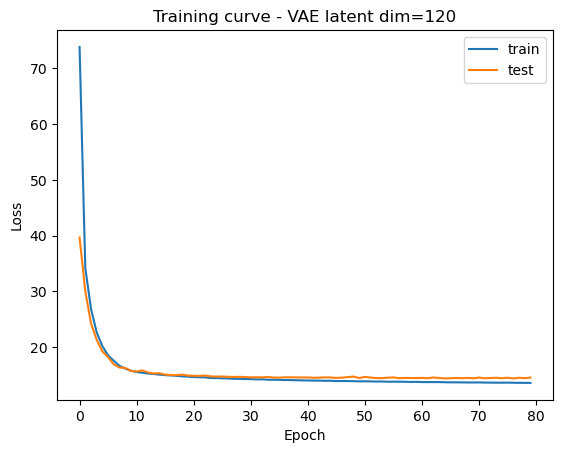

#### latent ndims = 140 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.27it/s]


Epoch [1/100] Train Loss: 68.6784
Epoch [1/100] Test Loss: 38.9179
✅ Best model saved at epoch 1 with test loss: 38.9179


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.04it/s]


Epoch [2/100] Train Loss: 33.4500
Epoch [2/100] Test Loss: 29.3513
✅ Best model saved at epoch 2 with test loss: 29.3513


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.27it/s]


Epoch [3/100] Train Loss: 26.4508
Epoch [3/100] Test Loss: 24.7776
✅ Best model saved at epoch 3 with test loss: 24.7776


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.17it/s]


Epoch [4/100] Train Loss: 21.9826
Epoch [4/100] Test Loss: 20.3875
✅ Best model saved at epoch 4 with test loss: 20.3875


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.86it/s]


Epoch [5/100] Train Loss: 19.5249
Epoch [5/100] Test Loss: 18.8664
✅ Best model saved at epoch 5 with test loss: 18.8664


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [6/100] Train Loss: 17.6749
Epoch [6/100] Test Loss: 17.1224
✅ Best model saved at epoch 6 with test loss: 17.1224


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.73it/s]


Epoch [7/100] Train Loss: 16.5308
Epoch [7/100] Test Loss: 15.9614
✅ Best model saved at epoch 7 with test loss: 15.9614


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [8/100] Train Loss: 15.6160
Epoch [8/100] Test Loss: 15.0791
✅ Best model saved at epoch 8 with test loss: 15.0791


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [9/100] Train Loss: 14.9090
Epoch [9/100] Test Loss: 14.7533
✅ Best model saved at epoch 9 with test loss: 14.7533


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.56it/s]


Epoch [10/100] Train Loss: 14.3862
Epoch [10/100] Test Loss: 14.3318
✅ Best model saved at epoch 10 with test loss: 14.3318


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [11/100] Train Loss: 14.0931
Epoch [11/100] Test Loss: 14.0501
✅ Best model saved at epoch 11 with test loss: 14.0501


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.40it/s]


Epoch [12/100] Train Loss: 13.9269
Epoch [12/100] Test Loss: 14.0365
✅ Best model saved at epoch 12 with test loss: 14.0365


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [13/100] Train Loss: 13.6946
Epoch [13/100] Test Loss: 13.9527
✅ Best model saved at epoch 13 with test loss: 13.9527


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [14/100] Train Loss: 13.5476
Epoch [14/100] Test Loss: 13.6059
✅ Best model saved at epoch 14 with test loss: 13.6059


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [15/100] Train Loss: 13.4494
Epoch [15/100] Test Loss: 13.4943
✅ Best model saved at epoch 15 with test loss: 13.4943


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.28it/s]


Epoch [16/100] Train Loss: 13.3735
Epoch [16/100] Test Loss: 13.4337
✅ Best model saved at epoch 16 with test loss: 13.4337


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.05it/s]


Epoch [17/100] Train Loss: 13.3014
Epoch [17/100] Test Loss: 13.4377


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [18/100] Train Loss: 13.2194
Epoch [18/100] Test Loss: 13.2886
✅ Best model saved at epoch 18 with test loss: 13.2886


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.90it/s]


Epoch [19/100] Train Loss: 13.1449
Epoch [19/100] Test Loss: 13.3363


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.54it/s]


Epoch [20/100] Train Loss: 13.1087
Epoch [20/100] Test Loss: 13.3333


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.06it/s]


Epoch [21/100] Train Loss: 13.0409
Epoch [21/100] Test Loss: 13.2005
✅ Best model saved at epoch 21 with test loss: 13.2005


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.37it/s]


Epoch [22/100] Train Loss: 13.0197
Epoch [22/100] Test Loss: 13.2861


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.37it/s]


Epoch [23/100] Train Loss: 12.9486
Epoch [23/100] Test Loss: 13.2307


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.21it/s]


Epoch [24/100] Train Loss: 12.9614
Epoch [24/100] Test Loss: 13.2594


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.43it/s]


Epoch [25/100] Train Loss: 12.8670
Epoch [25/100] Test Loss: 13.1456
✅ Best model saved at epoch 25 with test loss: 13.1456


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.69it/s]


Epoch [26/100] Train Loss: 12.8173
Epoch [26/100] Test Loss: 13.1744


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.29it/s]


Epoch [27/100] Train Loss: 12.7833
Epoch [27/100] Test Loss: 13.3195


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.78it/s]


Epoch [28/100] Train Loss: 12.7715
Epoch [28/100] Test Loss: 13.0638
✅ Best model saved at epoch 28 with test loss: 13.0638


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [29/100] Train Loss: 12.6992
Epoch [29/100] Test Loss: 12.9690
✅ Best model saved at epoch 29 with test loss: 12.9690


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.53it/s]


Epoch [30/100] Train Loss: 12.6775
Epoch [30/100] Test Loss: 13.1129


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.41it/s]


Epoch [31/100] Train Loss: 12.6331
Epoch [31/100] Test Loss: 12.9879


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.90it/s]


Epoch [32/100] Train Loss: 12.6265
Epoch [32/100] Test Loss: 13.2037


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [33/100] Train Loss: 12.5779
Epoch [33/100] Test Loss: 13.0462


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.66it/s]


Epoch [34/100] Train Loss: 12.5667
Epoch [34/100] Test Loss: 13.0110


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [35/100] Train Loss: 12.5318
Epoch [35/100] Test Loss: 12.9409
✅ Best model saved at epoch 35 with test loss: 12.9409


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [36/100] Train Loss: 12.5080
Epoch [36/100] Test Loss: 12.9442


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [37/100] Train Loss: 12.4950
Epoch [37/100] Test Loss: 12.8503
✅ Best model saved at epoch 37 with test loss: 12.8503


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.45it/s]


Epoch [38/100] Train Loss: 12.4727
Epoch [38/100] Test Loss: 12.9512


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.72it/s]


Epoch [39/100] Train Loss: 12.4236
Epoch [39/100] Test Loss: 12.8842


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.27it/s]


Epoch [40/100] Train Loss: 12.4179
Epoch [40/100] Test Loss: 12.8515


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.50it/s]


Epoch [41/100] Train Loss: 12.4008
Epoch [41/100] Test Loss: 12.9394


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.39it/s]


Epoch [42/100] Train Loss: 12.3942
Epoch [42/100] Test Loss: 12.8111
✅ Best model saved at epoch 42 with test loss: 12.8111


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [43/100] Train Loss: 12.3573
Epoch [43/100] Test Loss: 12.9397


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.05it/s]


Epoch [44/100] Train Loss: 12.3470
Epoch [44/100] Test Loss: 12.8599


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [45/100] Train Loss: 12.3378
Epoch [45/100] Test Loss: 12.9934


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.64it/s]


Epoch [46/100] Train Loss: 12.3437
Epoch [46/100] Test Loss: 12.7946
✅ Best model saved at epoch 46 with test loss: 12.7946


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.72it/s]


Epoch [47/100] Train Loss: 12.2863
Epoch [47/100] Test Loss: 12.8321


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.48it/s]


Epoch [48/100] Train Loss: 12.2733
Epoch [48/100] Test Loss: 12.8248


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.61it/s]


Epoch [49/100] Train Loss: 12.2570
Epoch [49/100] Test Loss: 12.8176


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.85it/s]


Epoch [50/100] Train Loss: 12.2625
Epoch [50/100] Test Loss: 12.7911
✅ Best model saved at epoch 50 with test loss: 12.7911


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.03it/s]


Epoch [51/100] Train Loss: 12.2324
Epoch [51/100] Test Loss: 12.8137


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.83it/s]


Epoch [52/100] Train Loss: 12.2354
Epoch [52/100] Test Loss: 12.8671


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.92it/s]


Epoch [53/100] Train Loss: 12.2146
Epoch [53/100] Test Loss: 12.7549
✅ Best model saved at epoch 53 with test loss: 12.7549


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.48it/s]


Epoch [54/100] Train Loss: 12.1996
Epoch [54/100] Test Loss: 12.8066


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [55/100] Train Loss: 12.1858
Epoch [55/100] Test Loss: 12.7607


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.46it/s]


Epoch [56/100] Train Loss: 12.1741
Epoch [56/100] Test Loss: 12.7975


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.35it/s]


Epoch [57/100] Train Loss: 12.1597
Epoch [57/100] Test Loss: 12.8109


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.84it/s]


Epoch [58/100] Train Loss: 12.1501
Epoch [58/100] Test Loss: 12.7765


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.82it/s]


Epoch [59/100] Train Loss: 12.1555
Epoch [59/100] Test Loss: 12.7605


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.79it/s]


Epoch [60/100] Train Loss: 12.1365
Epoch [60/100] Test Loss: 12.7504
✅ Best model saved at epoch 60 with test loss: 12.7504


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.97it/s]


Epoch [61/100] Train Loss: 12.1087
Epoch [61/100] Test Loss: 12.7676


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [62/100] Train Loss: 12.1127
Epoch [62/100] Test Loss: 12.7930


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.36it/s]


Epoch [63/100] Train Loss: 12.1212
Epoch [63/100] Test Loss: 12.7604


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.33it/s]


Epoch [64/100] Train Loss: 12.0833
Epoch [64/100] Test Loss: 12.7812


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.26it/s]


Epoch [65/100] Train Loss: 12.0810
Epoch [65/100] Test Loss: 12.7991


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [66/100] Train Loss: 12.0802
Epoch [66/100] Test Loss: 12.8504


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.24it/s]


Epoch [67/100] Train Loss: 12.0624
Epoch [67/100] Test Loss: 12.7673


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.95it/s]


Epoch [68/100] Train Loss: 12.0639
Epoch [68/100] Test Loss: 12.8130


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.54it/s]


Epoch [69/100] Train Loss: 12.0594
Epoch [69/100] Test Loss: 13.0599


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.11it/s]


Epoch [70/100] Train Loss: 12.0411
Epoch [70/100] Test Loss: 12.8277


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.02it/s]


Epoch [71/100] Train Loss: 12.0245
Epoch [71/100] Test Loss: 12.7906


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.21it/s]


Epoch [72/100] Train Loss: 12.0398
Epoch [72/100] Test Loss: 12.8221


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.55it/s]


Epoch [73/100] Train Loss: 12.0099
Epoch [73/100] Test Loss: 12.7965


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [74/100] Train Loss: 12.0126
Epoch [74/100] Test Loss: 12.7404
✅ Best model saved at epoch 74 with test loss: 12.7404


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [75/100] Train Loss: 11.9902
Epoch [75/100] Test Loss: 12.8226


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [76/100] Train Loss: 12.0032
Epoch [76/100] Test Loss: 12.9769


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.31it/s]


Epoch [77/100] Train Loss: 12.0062
Epoch [77/100] Test Loss: 12.8371


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.86it/s]


Epoch [78/100] Train Loss: 11.9776
Epoch [78/100] Test Loss: 12.7630


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.08it/s]


Epoch [79/100] Train Loss: 11.9825
Epoch [79/100] Test Loss: 12.7664


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.02it/s]


Epoch [80/100] Train Loss: 11.9637
Epoch [80/100] Test Loss: 12.7392
✅ Best model saved at epoch 80 with test loss: 12.7392


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.17it/s]


Epoch [81/100] Train Loss: 11.9672
Epoch [81/100] Test Loss: 12.7530


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.65it/s]


Epoch [82/100] Train Loss: 11.9447
Epoch [82/100] Test Loss: 12.7415


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.19it/s]


Epoch [83/100] Train Loss: 11.9494
Epoch [83/100] Test Loss: 12.7399


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.46it/s]


Epoch [84/100] Train Loss: 11.9446
Epoch [84/100] Test Loss: 12.7238
✅ Best model saved at epoch 84 with test loss: 12.7238


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.50it/s]


Epoch [85/100] Train Loss: 11.9368
Epoch [85/100] Test Loss: 12.7373


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.80it/s]


Epoch [86/100] Train Loss: 11.9301
Epoch [86/100] Test Loss: 12.7569


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.15it/s]


Epoch [87/100] Train Loss: 11.9427
Epoch [87/100] Test Loss: 12.7673


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.78it/s]


Epoch [88/100] Train Loss: 11.9119
Epoch [88/100] Test Loss: 12.7589


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [89/100] Train Loss: 11.9297
Epoch [89/100] Test Loss: 12.7613


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.58it/s]


Epoch [90/100] Train Loss: 11.8969
Epoch [90/100] Test Loss: 12.7580


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.96it/s]


Epoch [91/100] Train Loss: 11.9067
Epoch [91/100] Test Loss: 12.7209
✅ Best model saved at epoch 91 with test loss: 12.7209


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.21it/s]


Epoch [92/100] Train Loss: 11.9004
Epoch [92/100] Test Loss: 12.8852


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.57it/s]


Epoch [93/100] Train Loss: 11.8926
Epoch [93/100] Test Loss: 12.7411


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.13it/s]


Epoch [94/100] Train Loss: 11.8913
Epoch [94/100] Test Loss: 12.7408


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.73it/s]


Epoch [95/100] Train Loss: 11.8816
Epoch [95/100] Test Loss: 12.7936


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [96/100] Train Loss: 11.9024
Epoch [96/100] Test Loss: 12.7592


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [97/100] Train Loss: 11.8740
Epoch [97/100] Test Loss: 12.8004


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.00it/s]


Epoch [98/100] Train Loss: 11.8692
Epoch [98/100] Test Loss: 12.7734


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.94it/s]


Epoch [99/100] Train Loss: 11.8626
Epoch [99/100] Test Loss: 12.7549


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.72it/s]


Epoch [100/100] Train Loss: 11.8541
Epoch [100/100] Test Loss: 12.7216


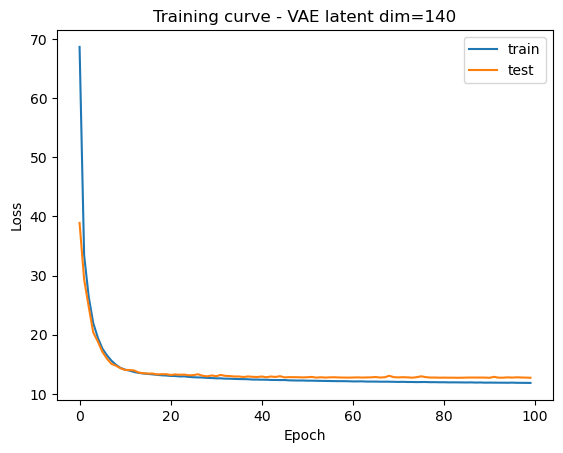

#### latent ndims = 160 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.38it/s]


Epoch [1/100] Train Loss: 70.4484
Epoch [1/100] Test Loss: 38.6826
✅ Best model saved at epoch 1 with test loss: 38.6826


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.68it/s]


Epoch [2/100] Train Loss: 33.4304
Epoch [2/100] Test Loss: 30.6581
✅ Best model saved at epoch 2 with test loss: 30.6581


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [3/100] Train Loss: 26.5618
Epoch [3/100] Test Loss: 23.6066
✅ Best model saved at epoch 3 with test loss: 23.6066


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.83it/s]


Epoch [4/100] Train Loss: 21.9625
Epoch [4/100] Test Loss: 20.1958
✅ Best model saved at epoch 4 with test loss: 20.1958


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.40it/s]


Epoch [5/100] Train Loss: 19.3171
Epoch [5/100] Test Loss: 18.3332
✅ Best model saved at epoch 5 with test loss: 18.3332


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.42it/s]


Epoch [6/100] Train Loss: 17.5234
Epoch [6/100] Test Loss: 17.1763
✅ Best model saved at epoch 6 with test loss: 17.1763


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [7/100] Train Loss: 16.2357
Epoch [7/100] Test Loss: 15.9620
✅ Best model saved at epoch 7 with test loss: 15.9620


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.88it/s]


Epoch [8/100] Train Loss: 15.2335
Epoch [8/100] Test Loss: 15.4012
✅ Best model saved at epoch 8 with test loss: 15.4012


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.48it/s]


Epoch [9/100] Train Loss: 14.5468
Epoch [9/100] Test Loss: 14.3854
✅ Best model saved at epoch 9 with test loss: 14.3854


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.41it/s]


Epoch [10/100] Train Loss: 13.9262
Epoch [10/100] Test Loss: 13.6990
✅ Best model saved at epoch 10 with test loss: 13.6990


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.83it/s]


Epoch [11/100] Train Loss: 13.4688
Epoch [11/100] Test Loss: 13.3811
✅ Best model saved at epoch 11 with test loss: 13.3811


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.30it/s]


Epoch [12/100] Train Loss: 13.1440
Epoch [12/100] Test Loss: 13.1048
✅ Best model saved at epoch 12 with test loss: 13.1048


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.62it/s]


Epoch [13/100] Train Loss: 12.8526
Epoch [13/100] Test Loss: 12.8239
✅ Best model saved at epoch 13 with test loss: 12.8239


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.28it/s]


Epoch [14/100] Train Loss: 12.7037
Epoch [14/100] Test Loss: 12.7055
✅ Best model saved at epoch 14 with test loss: 12.7055


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.33it/s]


Epoch [15/100] Train Loss: 12.4791
Epoch [15/100] Test Loss: 12.3919
✅ Best model saved at epoch 15 with test loss: 12.3919


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.24it/s]


Epoch [16/100] Train Loss: 12.3605
Epoch [16/100] Test Loss: 12.3569
✅ Best model saved at epoch 16 with test loss: 12.3569


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.04it/s]


Epoch [17/100] Train Loss: 12.1850
Epoch [17/100] Test Loss: 12.1542
✅ Best model saved at epoch 17 with test loss: 12.1542


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.56it/s]


Epoch [18/100] Train Loss: 12.1350
Epoch [18/100] Test Loss: 12.1114
✅ Best model saved at epoch 18 with test loss: 12.1114


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.39it/s]


Epoch [19/100] Train Loss: 12.0139
Epoch [19/100] Test Loss: 12.5686


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.93it/s]


Epoch [20/100] Train Loss: 11.9494
Epoch [20/100] Test Loss: 12.2968


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.82it/s]


Epoch [21/100] Train Loss: 11.8757
Epoch [21/100] Test Loss: 12.0602
✅ Best model saved at epoch 21 with test loss: 12.0602


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.23it/s]


Epoch [22/100] Train Loss: 11.8258
Epoch [22/100] Test Loss: 11.9161
✅ Best model saved at epoch 22 with test loss: 11.9161


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.89it/s]


Epoch [23/100] Train Loss: 11.7931
Epoch [23/100] Test Loss: 11.9804


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.44it/s]


Epoch [24/100] Train Loss: 11.7252
Epoch [24/100] Test Loss: 11.8475
✅ Best model saved at epoch 24 with test loss: 11.8475


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.10it/s]


Epoch [25/100] Train Loss: 11.6756
Epoch [25/100] Test Loss: 11.9234


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.52it/s]


Epoch [26/100] Train Loss: 11.6581
Epoch [26/100] Test Loss: 11.8562


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.89it/s]


Epoch [27/100] Train Loss: 11.5860
Epoch [27/100] Test Loss: 11.7556
✅ Best model saved at epoch 27 with test loss: 11.7556


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.62it/s]


Epoch [28/100] Train Loss: 11.5610
Epoch [28/100] Test Loss: 11.7501
✅ Best model saved at epoch 28 with test loss: 11.7501


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.32it/s]


Epoch [29/100] Train Loss: 11.5355
Epoch [29/100] Test Loss: 11.7454
✅ Best model saved at epoch 29 with test loss: 11.7454


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.31it/s]


Epoch [30/100] Train Loss: 11.5284
Epoch [30/100] Test Loss: 11.9029


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [31/100] Train Loss: 11.4489
Epoch [31/100] Test Loss: 11.7832


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.51it/s]


Epoch [32/100] Train Loss: 11.4200
Epoch [32/100] Test Loss: 11.6590
✅ Best model saved at epoch 32 with test loss: 11.6590


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [33/100] Train Loss: 11.4005
Epoch [33/100] Test Loss: 11.9057


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.83it/s]


Epoch [34/100] Train Loss: 11.4266
Epoch [34/100] Test Loss: 11.6391
✅ Best model saved at epoch 34 with test loss: 11.6391


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [35/100] Train Loss: 11.3175
Epoch [35/100] Test Loss: 11.7262


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [36/100] Train Loss: 11.3081
Epoch [36/100] Test Loss: 11.6828


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.34it/s]


Epoch [37/100] Train Loss: 11.2757
Epoch [37/100] Test Loss: 11.6052
✅ Best model saved at epoch 37 with test loss: 11.6052


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.51it/s]


Epoch [38/100] Train Loss: 11.2654
Epoch [38/100] Test Loss: 11.6754


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.83it/s]


Epoch [39/100] Train Loss: 11.2617
Epoch [39/100] Test Loss: 11.6320


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.30it/s]


Epoch [40/100] Train Loss: 11.2348
Epoch [40/100] Test Loss: 11.5142
✅ Best model saved at epoch 40 with test loss: 11.5142


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [41/100] Train Loss: 11.2081
Epoch [41/100] Test Loss: 11.6280


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.86it/s]


Epoch [42/100] Train Loss: 11.1780
Epoch [42/100] Test Loss: 11.5286


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.88it/s]


Epoch [43/100] Train Loss: 11.2535
Epoch [43/100] Test Loss: 11.5511


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.85it/s]


Epoch [44/100] Train Loss: 11.0948
Epoch [44/100] Test Loss: 11.5615


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.62it/s]


Epoch [45/100] Train Loss: 11.1149
Epoch [45/100] Test Loss: 11.5144


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.53it/s]


Epoch [46/100] Train Loss: 11.1163
Epoch [46/100] Test Loss: 11.5436


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.50it/s]


Epoch [47/100] Train Loss: 11.0790
Epoch [47/100] Test Loss: 11.5232


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.91it/s]


Epoch [48/100] Train Loss: 11.0802
Epoch [48/100] Test Loss: 11.4886
✅ Best model saved at epoch 48 with test loss: 11.4886


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.72it/s]


Epoch [49/100] Train Loss: 11.0499
Epoch [49/100] Test Loss: 11.5083


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.10it/s]


Epoch [50/100] Train Loss: 11.0586
Epoch [50/100] Test Loss: 11.6163


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.98it/s]


Epoch [51/100] Train Loss: 11.0378
Epoch [51/100] Test Loss: 11.5721


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.65it/s]


Epoch [52/100] Train Loss: 11.0170
Epoch [52/100] Test Loss: 11.5555


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.47it/s]


Epoch [53/100] Train Loss: 11.0169
Epoch [53/100] Test Loss: 11.4379
✅ Best model saved at epoch 53 with test loss: 11.4379


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.52it/s]


Epoch [54/100] Train Loss: 10.9819
Epoch [54/100] Test Loss: 11.4885


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.38it/s]


Epoch [55/100] Train Loss: 10.9682
Epoch [55/100] Test Loss: 11.4868


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [56/100] Train Loss: 10.9911
Epoch [56/100] Test Loss: 11.6488


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.43it/s]


Epoch [57/100] Train Loss: 10.9196
Epoch [57/100] Test Loss: 11.4340
✅ Best model saved at epoch 57 with test loss: 11.4340


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.17it/s]


Epoch [58/100] Train Loss: 10.9432
Epoch [58/100] Test Loss: 11.4130
✅ Best model saved at epoch 58 with test loss: 11.4130


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.73it/s]


Epoch [59/100] Train Loss: 10.9220
Epoch [59/100] Test Loss: 11.5222


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.61it/s]


Epoch [60/100] Train Loss: 10.9162
Epoch [60/100] Test Loss: 11.4239


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.49it/s]


Epoch [61/100] Train Loss: 10.9083
Epoch [61/100] Test Loss: 11.5003


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.63it/s]


Epoch [62/100] Train Loss: 10.8994
Epoch [62/100] Test Loss: 11.4288


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.25it/s]


Epoch [63/100] Train Loss: 10.8852
Epoch [63/100] Test Loss: 11.4792


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [64/100] Train Loss: 10.9067
Epoch [64/100] Test Loss: 11.4541


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.51it/s]


Epoch [65/100] Train Loss: 10.8251
Epoch [65/100] Test Loss: 11.3834
✅ Best model saved at epoch 65 with test loss: 11.3834


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.59it/s]


Epoch [66/100] Train Loss: 10.8708
Epoch [66/100] Test Loss: 11.3872


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.56it/s]


Epoch [67/100] Train Loss: 10.8295
Epoch [67/100] Test Loss: 11.4247


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.10it/s]


Epoch [68/100] Train Loss: 10.8200
Epoch [68/100] Test Loss: 11.3760
✅ Best model saved at epoch 68 with test loss: 11.3760


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.00it/s]


Epoch [69/100] Train Loss: 10.8261
Epoch [69/100] Test Loss: 11.4019


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [70/100] Train Loss: 10.8146
Epoch [70/100] Test Loss: 11.4167


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.12it/s]


Epoch [71/100] Train Loss: 10.8080
Epoch [71/100] Test Loss: 11.3774


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [72/100] Train Loss: 10.7904
Epoch [72/100] Test Loss: 11.4301


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.94it/s]


Epoch [73/100] Train Loss: 10.8003
Epoch [73/100] Test Loss: 11.5510


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.86it/s]


Epoch [74/100] Train Loss: 10.7966
Epoch [74/100] Test Loss: 11.3575
✅ Best model saved at epoch 74 with test loss: 11.3575


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.43it/s]


Epoch [75/100] Train Loss: 10.7751
Epoch [75/100] Test Loss: 11.3830


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.20it/s]


Epoch [76/100] Train Loss: 10.7611
Epoch [76/100] Test Loss: 11.4010


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.53it/s]


Epoch [77/100] Train Loss: 10.7627
Epoch [77/100] Test Loss: 11.3561
✅ Best model saved at epoch 77 with test loss: 11.3561


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.03it/s]


Epoch [78/100] Train Loss: 10.7553
Epoch [78/100] Test Loss: 11.3637


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.03it/s]


Epoch [79/100] Train Loss: 10.7286
Epoch [79/100] Test Loss: 11.4018


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.26it/s]


Epoch [80/100] Train Loss: 10.7353
Epoch [80/100] Test Loss: 11.4746


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.65it/s]


Epoch [81/100] Train Loss: 10.7426
Epoch [81/100] Test Loss: 11.3688


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.94it/s]


Epoch [82/100] Train Loss: 10.7266
Epoch [82/100] Test Loss: 11.3826


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [83/100] Train Loss: 10.7036
Epoch [83/100] Test Loss: 11.3945


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.42it/s]


Epoch [84/100] Train Loss: 10.7095
Epoch [84/100] Test Loss: 11.3550
✅ Best model saved at epoch 84 with test loss: 11.3550


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [85/100] Train Loss: 10.7133
Epoch [85/100] Test Loss: 11.4223


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.37it/s]


Epoch [86/100] Train Loss: 10.7115
Epoch [86/100] Test Loss: 11.3942


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.72it/s]


Epoch [87/100] Train Loss: 10.7000
Epoch [87/100] Test Loss: 11.3796


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [88/100] Train Loss: 10.6806
Epoch [88/100] Test Loss: 11.4163


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.85it/s]


Epoch [89/100] Train Loss: 10.6708
Epoch [89/100] Test Loss: 11.4423


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [90/100] Train Loss: 10.6951
Epoch [90/100] Test Loss: 11.3238
✅ Best model saved at epoch 90 with test loss: 11.3238


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.18it/s]


Epoch [91/100] Train Loss: 10.6556
Epoch [91/100] Test Loss: 11.4084


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.90it/s]


Epoch [92/100] Train Loss: 10.6673
Epoch [92/100] Test Loss: 11.3190
✅ Best model saved at epoch 92 with test loss: 11.3190


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.21it/s]


Epoch [93/100] Train Loss: 10.6601
Epoch [93/100] Test Loss: 11.3674


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.97it/s]


Epoch [94/100] Train Loss: 10.6473
Epoch [94/100] Test Loss: 11.3905


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.46it/s]


Epoch [95/100] Train Loss: 10.6359
Epoch [95/100] Test Loss: 11.4091


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.65it/s]


Epoch [96/100] Train Loss: 10.6526
Epoch [96/100] Test Loss: 11.4414


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.50it/s]


Epoch [97/100] Train Loss: 10.6248
Epoch [97/100] Test Loss: 11.3499


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.91it/s]


Epoch [98/100] Train Loss: 10.6405
Epoch [98/100] Test Loss: 11.4913


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.71it/s]


Epoch [99/100] Train Loss: 10.6279
Epoch [99/100] Test Loss: 11.3573


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.04it/s]


Epoch [100/100] Train Loss: 10.6230
Epoch [100/100] Test Loss: 11.4384


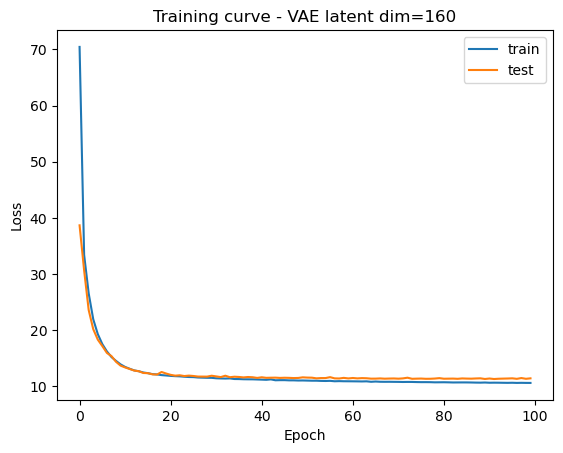

#### latent ndims = 180 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.40it/s]


Epoch [1/100] Train Loss: 72.9160
Epoch [1/100] Test Loss: 38.3239
✅ Best model saved at epoch 1 with test loss: 38.3239


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.54it/s]


Epoch [2/100] Train Loss: 31.0574
Epoch [2/100] Test Loss: 26.0296
✅ Best model saved at epoch 2 with test loss: 26.0296


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.23it/s]


Epoch [3/100] Train Loss: 23.1788
Epoch [3/100] Test Loss: 20.8610
✅ Best model saved at epoch 3 with test loss: 20.8610


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.65it/s]


Epoch [4/100] Train Loss: 19.3933
Epoch [4/100] Test Loss: 17.9221
✅ Best model saved at epoch 4 with test loss: 17.9221


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.47it/s]


Epoch [5/100] Train Loss: 17.0958
Epoch [5/100] Test Loss: 16.2487
✅ Best model saved at epoch 5 with test loss: 16.2487


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.06it/s]


Epoch [6/100] Train Loss: 15.5742
Epoch [6/100] Test Loss: 14.9251
✅ Best model saved at epoch 6 with test loss: 14.9251


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.80it/s]


Epoch [7/100] Train Loss: 14.4770
Epoch [7/100] Test Loss: 14.2581
✅ Best model saved at epoch 7 with test loss: 14.2581


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.06it/s]


Epoch [8/100] Train Loss: 13.7071
Epoch [8/100] Test Loss: 13.3170
✅ Best model saved at epoch 8 with test loss: 13.3170


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.58it/s]


Epoch [9/100] Train Loss: 13.0844
Epoch [9/100] Test Loss: 12.7477
✅ Best model saved at epoch 9 with test loss: 12.7477


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.00it/s]


Epoch [10/100] Train Loss: 12.6032
Epoch [10/100] Test Loss: 12.2027
✅ Best model saved at epoch 10 with test loss: 12.2027


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.50it/s]


Epoch [11/100] Train Loss: 12.1793
Epoch [11/100] Test Loss: 11.9936
✅ Best model saved at epoch 11 with test loss: 11.9936


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [12/100] Train Loss: 11.8631
Epoch [12/100] Test Loss: 11.7389
✅ Best model saved at epoch 12 with test loss: 11.7389


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.95it/s]


Epoch [13/100] Train Loss: 11.5970
Epoch [13/100] Test Loss: 11.5996
✅ Best model saved at epoch 13 with test loss: 11.5996


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.49it/s]


Epoch [14/100] Train Loss: 11.4246
Epoch [14/100] Test Loss: 11.4310
✅ Best model saved at epoch 14 with test loss: 11.4310


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [15/100] Train Loss: 11.2008
Epoch [15/100] Test Loss: 11.4228
✅ Best model saved at epoch 15 with test loss: 11.4228


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.52it/s]


Epoch [16/100] Train Loss: 11.0893
Epoch [16/100] Test Loss: 11.1283
✅ Best model saved at epoch 16 with test loss: 11.1283


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.72it/s]


Epoch [17/100] Train Loss: 10.9563
Epoch [17/100] Test Loss: 10.9163
✅ Best model saved at epoch 17 with test loss: 10.9163


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [18/100] Train Loss: 10.8293
Epoch [18/100] Test Loss: 10.9263


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.01it/s]


Epoch [19/100] Train Loss: 10.8113
Epoch [19/100] Test Loss: 10.8088
✅ Best model saved at epoch 19 with test loss: 10.8088


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.91it/s]


Epoch [20/100] Train Loss: 10.6500
Epoch [20/100] Test Loss: 10.7537
✅ Best model saved at epoch 20 with test loss: 10.7537


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.18it/s]


Epoch [21/100] Train Loss: 10.6178
Epoch [21/100] Test Loss: 10.7016
✅ Best model saved at epoch 21 with test loss: 10.7016


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.04it/s]


Epoch [22/100] Train Loss: 10.5787
Epoch [22/100] Test Loss: 10.8139


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.41it/s]


Epoch [23/100] Train Loss: 10.5111
Epoch [23/100] Test Loss: 10.6836
✅ Best model saved at epoch 23 with test loss: 10.6836


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.73it/s]


Epoch [24/100] Train Loss: 10.4766
Epoch [24/100] Test Loss: 10.6448
✅ Best model saved at epoch 24 with test loss: 10.6448


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.79it/s]


Epoch [25/100] Train Loss: 10.3991
Epoch [25/100] Test Loss: 10.5987
✅ Best model saved at epoch 25 with test loss: 10.5987


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.17it/s]


Epoch [26/100] Train Loss: 10.3705
Epoch [26/100] Test Loss: 10.5520
✅ Best model saved at epoch 26 with test loss: 10.5520


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.61it/s]


Epoch [27/100] Train Loss: 10.3644
Epoch [27/100] Test Loss: 10.5774


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [28/100] Train Loss: 10.3043
Epoch [28/100] Test Loss: 10.5488
✅ Best model saved at epoch 28 with test loss: 10.5488


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [29/100] Train Loss: 10.2482
Epoch [29/100] Test Loss: 10.4889
✅ Best model saved at epoch 29 with test loss: 10.4889


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.56it/s]


Epoch [30/100] Train Loss: 10.2528
Epoch [30/100] Test Loss: 10.7479


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.77it/s]


Epoch [31/100] Train Loss: 10.2042
Epoch [31/100] Test Loss: 10.5774


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.26it/s]


Epoch [32/100] Train Loss: 10.1662
Epoch [32/100] Test Loss: 10.3406
✅ Best model saved at epoch 32 with test loss: 10.3406


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.65it/s]


Epoch [33/100] Train Loss: 10.1333
Epoch [33/100] Test Loss: 10.3919


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.01it/s]


Epoch [34/100] Train Loss: 10.1205
Epoch [34/100] Test Loss: 10.3738


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.04it/s]


Epoch [35/100] Train Loss: 10.0932
Epoch [35/100] Test Loss: 10.4335


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.65it/s]


Epoch [36/100] Train Loss: 10.0859
Epoch [36/100] Test Loss: 10.3774


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.69it/s]


Epoch [37/100] Train Loss: 10.0452
Epoch [37/100] Test Loss: 10.4093


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.77it/s]


Epoch [38/100] Train Loss: 10.0028
Epoch [38/100] Test Loss: 10.3773


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.68it/s]


Epoch [39/100] Train Loss: 9.9922
Epoch [39/100] Test Loss: 10.4003


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.90it/s]


Epoch [40/100] Train Loss: 10.0018
Epoch [40/100] Test Loss: 10.3901


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.38it/s]


Epoch [41/100] Train Loss: 9.9275
Epoch [41/100] Test Loss: 10.2882
✅ Best model saved at epoch 41 with test loss: 10.2882


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.44it/s]


Epoch [42/100] Train Loss: 9.9485
Epoch [42/100] Test Loss: 10.3824


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.05it/s]


Epoch [43/100] Train Loss: 9.9321
Epoch [43/100] Test Loss: 10.2666
✅ Best model saved at epoch 43 with test loss: 10.2666


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.89it/s]


Epoch [44/100] Train Loss: 9.8902
Epoch [44/100] Test Loss: 10.2745


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.58it/s]


Epoch [45/100] Train Loss: 9.8925
Epoch [45/100] Test Loss: 10.3400


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.63it/s]


Epoch [46/100] Train Loss: 9.8723
Epoch [46/100] Test Loss: 10.3116


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [47/100] Train Loss: 9.8520
Epoch [47/100] Test Loss: 10.2417
✅ Best model saved at epoch 47 with test loss: 10.2417


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.33it/s]


Epoch [48/100] Train Loss: 9.8490
Epoch [48/100] Test Loss: 10.2442


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.80it/s]


Epoch [49/100] Train Loss: 9.8230
Epoch [49/100] Test Loss: 10.2738


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.27it/s]


Epoch [50/100] Train Loss: 9.8125
Epoch [50/100] Test Loss: 10.2955


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.02it/s]


Epoch [51/100] Train Loss: 9.8143
Epoch [51/100] Test Loss: 10.3434


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [52/100] Train Loss: 9.7864
Epoch [52/100] Test Loss: 10.2428


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [53/100] Train Loss: 9.7719
Epoch [53/100] Test Loss: 10.3028


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [54/100] Train Loss: 9.7702
Epoch [54/100] Test Loss: 10.2126
✅ Best model saved at epoch 54 with test loss: 10.2126


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [55/100] Train Loss: 9.7480
Epoch [55/100] Test Loss: 10.2653


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.49it/s]


Epoch [56/100] Train Loss: 10.3585
Epoch [56/100] Test Loss: 10.2384


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [57/100] Train Loss: 9.7046
Epoch [57/100] Test Loss: 10.2322


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.90it/s]


Epoch [58/100] Train Loss: 9.6861
Epoch [58/100] Test Loss: 10.2698


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.68it/s]


Epoch [59/100] Train Loss: 9.7256
Epoch [59/100] Test Loss: 10.1641
✅ Best model saved at epoch 59 with test loss: 10.1641


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.02it/s]


Epoch [60/100] Train Loss: 9.7133
Epoch [60/100] Test Loss: 10.2121


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.85it/s]


Epoch [61/100] Train Loss: 9.6797
Epoch [61/100] Test Loss: 10.2109


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.46it/s]


Epoch [62/100] Train Loss: 9.6878
Epoch [62/100] Test Loss: 10.2435


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.78it/s]


Epoch [63/100] Train Loss: 9.6735
Epoch [63/100] Test Loss: 10.2450


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [64/100] Train Loss: 9.6645
Epoch [64/100] Test Loss: 10.2391


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.52it/s]


Epoch [65/100] Train Loss: 9.6640
Epoch [65/100] Test Loss: 10.1821


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [66/100] Train Loss: 9.6526
Epoch [66/100] Test Loss: 10.3062


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.50it/s]


Epoch [67/100] Train Loss: 9.6473
Epoch [67/100] Test Loss: 10.1635
✅ Best model saved at epoch 67 with test loss: 10.1635


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.64it/s]


Epoch [68/100] Train Loss: 9.6443
Epoch [68/100] Test Loss: 10.2514


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.31it/s]


Epoch [69/100] Train Loss: 9.6037
Epoch [69/100] Test Loss: 10.1534
✅ Best model saved at epoch 69 with test loss: 10.1534


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.39it/s]


Epoch [70/100] Train Loss: 9.6373
Epoch [70/100] Test Loss: 10.1933


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [71/100] Train Loss: 9.6017
Epoch [71/100] Test Loss: 10.2344


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.67it/s]


Epoch [72/100] Train Loss: 9.5840
Epoch [72/100] Test Loss: 10.1491
✅ Best model saved at epoch 72 with test loss: 10.1491


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.60it/s]


Epoch [73/100] Train Loss: 9.6182
Epoch [73/100] Test Loss: 10.1541


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.30it/s]


Epoch [74/100] Train Loss: 9.5804
Epoch [74/100] Test Loss: 10.1867


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.74it/s]


Epoch [75/100] Train Loss: 9.5931
Epoch [75/100] Test Loss: 10.1849


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.66it/s]


Epoch [76/100] Train Loss: 9.5525
Epoch [76/100] Test Loss: 10.2344


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.14it/s]


Epoch [77/100] Train Loss: 9.5706
Epoch [77/100] Test Loss: 10.1726


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.66it/s]


Epoch [78/100] Train Loss: 9.5661
Epoch [78/100] Test Loss: 10.1727


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [79/100] Train Loss: 9.5401
Epoch [79/100] Test Loss: 10.1622


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [80/100] Train Loss: 9.5424
Epoch [80/100] Test Loss: 10.2114


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.10it/s]


Epoch [81/100] Train Loss: 9.5373
Epoch [81/100] Test Loss: 10.1578


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.93it/s]


Epoch [82/100] Train Loss: 9.5357
Epoch [82/100] Test Loss: 10.2072


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.01it/s]


Epoch [83/100] Train Loss: 9.5219
Epoch [83/100] Test Loss: 10.2336


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.69it/s]


Epoch [84/100] Train Loss: 9.5216
Epoch [84/100] Test Loss: 10.2510


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.42it/s]


Epoch [85/100] Train Loss: 9.5299
Epoch [85/100] Test Loss: 10.3417


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.06it/s]


Epoch [86/100] Train Loss: 9.5060
Epoch [86/100] Test Loss: 10.1814


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.92it/s]


Epoch [87/100] Train Loss: 9.4998
Epoch [87/100] Test Loss: 10.1618
🚦🚦🚦 Early stopping triggered 🚦


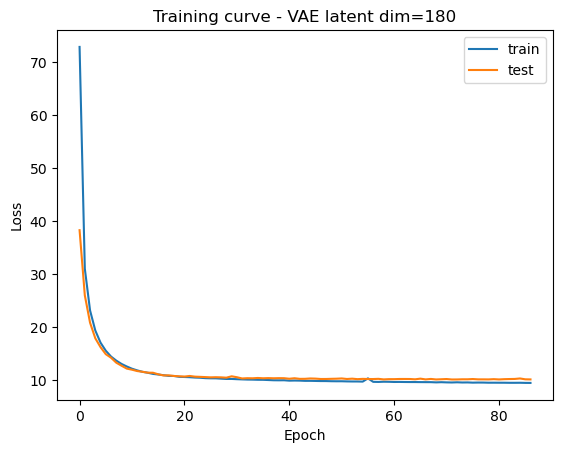

#### latent ndims = 200 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.69it/s]


Epoch [1/100] Train Loss: 70.5752
Epoch [1/100] Test Loss: 37.9960
✅ Best model saved at epoch 1 with test loss: 37.9960


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.32it/s]


Epoch [2/100] Train Loss: 32.0452
Epoch [2/100] Test Loss: 27.6162
✅ Best model saved at epoch 2 with test loss: 27.6162


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.31it/s]


Epoch [3/100] Train Loss: 24.3679
Epoch [3/100] Test Loss: 21.4045
✅ Best model saved at epoch 3 with test loss: 21.4045


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.55it/s]


Epoch [4/100] Train Loss: 19.9256
Epoch [4/100] Test Loss: 18.4841
✅ Best model saved at epoch 4 with test loss: 18.4841


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.37it/s]


Epoch [5/100] Train Loss: 17.5342
Epoch [5/100] Test Loss: 16.6458
✅ Best model saved at epoch 5 with test loss: 16.6458


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.59it/s]


Epoch [6/100] Train Loss: 15.7880
Epoch [6/100] Test Loss: 15.0679
✅ Best model saved at epoch 6 with test loss: 15.0679


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.77it/s]


Epoch [7/100] Train Loss: 14.5754
Epoch [7/100] Test Loss: 13.9636
✅ Best model saved at epoch 7 with test loss: 13.9636


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.00it/s]


Epoch [8/100] Train Loss: 13.6698
Epoch [8/100] Test Loss: 13.2325
✅ Best model saved at epoch 8 with test loss: 13.2325


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.35it/s]


Epoch [9/100] Train Loss: 12.9453
Epoch [9/100] Test Loss: 12.5790
✅ Best model saved at epoch 9 with test loss: 12.5790


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.92it/s]


Epoch [10/100] Train Loss: 12.3204
Epoch [10/100] Test Loss: 12.4511
✅ Best model saved at epoch 10 with test loss: 12.4511


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [11/100] Train Loss: 11.7781
Epoch [11/100] Test Loss: 11.4883
✅ Best model saved at epoch 11 with test loss: 11.4883


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.20it/s]


Epoch [12/100] Train Loss: 11.4125
Epoch [12/100] Test Loss: 11.2127
✅ Best model saved at epoch 12 with test loss: 11.2127


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.93it/s]


Epoch [13/100] Train Loss: 11.0557
Epoch [13/100] Test Loss: 10.9121
✅ Best model saved at epoch 13 with test loss: 10.9121


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.86it/s]


Epoch [14/100] Train Loss: 10.7444
Epoch [14/100] Test Loss: 10.6726
✅ Best model saved at epoch 14 with test loss: 10.6726


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [15/100] Train Loss: 10.5606
Epoch [15/100] Test Loss: 10.4298
✅ Best model saved at epoch 15 with test loss: 10.4298


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [16/100] Train Loss: 10.3491
Epoch [16/100] Test Loss: 10.4015
✅ Best model saved at epoch 16 with test loss: 10.4015


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.20it/s]


Epoch [17/100] Train Loss: 10.1816
Epoch [17/100] Test Loss: 10.2025
✅ Best model saved at epoch 17 with test loss: 10.2025


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.22it/s]


Epoch [18/100] Train Loss: 10.0427
Epoch [18/100] Test Loss: 10.0317
✅ Best model saved at epoch 18 with test loss: 10.0317


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.38it/s]


Epoch [19/100] Train Loss: 9.9427
Epoch [19/100] Test Loss: 9.9026
✅ Best model saved at epoch 19 with test loss: 9.9026


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.88it/s]


Epoch [20/100] Train Loss: 9.8632
Epoch [20/100] Test Loss: 9.9671


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.25it/s]


Epoch [21/100] Train Loss: 9.8347
Epoch [21/100] Test Loss: 9.8729
✅ Best model saved at epoch 21 with test loss: 9.8729


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [22/100] Train Loss: 9.6896
Epoch [22/100] Test Loss: 9.8793


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.78it/s]


Epoch [23/100] Train Loss: 9.6497
Epoch [23/100] Test Loss: 9.7764
✅ Best model saved at epoch 23 with test loss: 9.7764


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.38it/s]


Epoch [24/100] Train Loss: 9.6207
Epoch [24/100] Test Loss: 9.7076
✅ Best model saved at epoch 24 with test loss: 9.7076


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.03it/s]


Epoch [25/100] Train Loss: 9.5324
Epoch [25/100] Test Loss: 9.6951
✅ Best model saved at epoch 25 with test loss: 9.6951


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [26/100] Train Loss: 9.4939
Epoch [26/100] Test Loss: 9.6848
✅ Best model saved at epoch 26 with test loss: 9.6848


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.10it/s]


Epoch [27/100] Train Loss: 9.4589
Epoch [27/100] Test Loss: 9.6049
✅ Best model saved at epoch 27 with test loss: 9.6049


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [28/100] Train Loss: 9.4046
Epoch [28/100] Test Loss: 9.5743
✅ Best model saved at epoch 28 with test loss: 9.5743


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.01it/s]


Epoch [29/100] Train Loss: 9.3881
Epoch [29/100] Test Loss: 10.2844


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [30/100] Train Loss: 9.4071
Epoch [30/100] Test Loss: 9.7650


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [31/100] Train Loss: 9.3131
Epoch [31/100] Test Loss: 9.4929
✅ Best model saved at epoch 31 with test loss: 9.4929


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.81it/s]


Epoch [32/100] Train Loss: 9.2721
Epoch [32/100] Test Loss: 9.4630
✅ Best model saved at epoch 32 with test loss: 9.4630


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [33/100] Train Loss: 9.2608
Epoch [33/100] Test Loss: 9.5260


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.56it/s]


Epoch [34/100] Train Loss: 9.2529
Epoch [34/100] Test Loss: 9.5308


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.90it/s]


Epoch [35/100] Train Loss: 9.2163
Epoch [35/100] Test Loss: 9.4180
✅ Best model saved at epoch 35 with test loss: 9.4180


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.71it/s]


Epoch [36/100] Train Loss: 9.1988
Epoch [36/100] Test Loss: 9.4819


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.10it/s]


Epoch [37/100] Train Loss: 9.1643
Epoch [37/100] Test Loss: 9.4478


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.40it/s]


Epoch [38/100] Train Loss: 9.1554
Epoch [38/100] Test Loss: 9.4247


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.93it/s]


Epoch [39/100] Train Loss: 9.1366
Epoch [39/100] Test Loss: 9.5076


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [40/100] Train Loss: 9.0993
Epoch [40/100] Test Loss: 9.3701
✅ Best model saved at epoch 40 with test loss: 9.3701


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.13it/s]


Epoch [41/100] Train Loss: 9.0886
Epoch [41/100] Test Loss: 9.4453


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.81it/s]


Epoch [42/100] Train Loss: 9.0734
Epoch [42/100] Test Loss: 9.5499


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [43/100] Train Loss: 9.0572
Epoch [43/100] Test Loss: 9.3230
✅ Best model saved at epoch 43 with test loss: 9.3230


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.83it/s]


Epoch [44/100] Train Loss: 9.0247
Epoch [44/100] Test Loss: 9.3880


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.30it/s]


Epoch [45/100] Train Loss: 9.0097
Epoch [45/100] Test Loss: 10.1357


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.05it/s]


Epoch [46/100] Train Loss: 9.1559
Epoch [46/100] Test Loss: 9.2966
✅ Best model saved at epoch 46 with test loss: 9.2966


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.60it/s]


Epoch [47/100] Train Loss: 8.9656
Epoch [47/100] Test Loss: 9.3052


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.53it/s]


Epoch [48/100] Train Loss: 8.9703
Epoch [48/100] Test Loss: 9.5008


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [49/100] Train Loss: 8.9539
Epoch [49/100] Test Loss: 9.3695


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.90it/s]


Epoch [50/100] Train Loss: 8.9466
Epoch [50/100] Test Loss: 9.3657


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.86it/s]


Epoch [51/100] Train Loss: 8.9228
Epoch [51/100] Test Loss: 9.3090


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.48it/s]


Epoch [52/100] Train Loss: 8.9333
Epoch [52/100] Test Loss: 9.7489


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.49it/s]


Epoch [53/100] Train Loss: 8.9397
Epoch [53/100] Test Loss: 9.3134


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.49it/s]


Epoch [54/100] Train Loss: 8.8688
Epoch [54/100] Test Loss: 9.3239


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [55/100] Train Loss: 8.8618
Epoch [55/100] Test Loss: 9.2635
✅ Best model saved at epoch 55 with test loss: 9.2635


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [56/100] Train Loss: 8.8512
Epoch [56/100] Test Loss: 9.2747


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.65it/s]


Epoch [57/100] Train Loss: 8.8546
Epoch [57/100] Test Loss: 9.2729


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.38it/s]


Epoch [58/100] Train Loss: 8.8389
Epoch [58/100] Test Loss: 9.3220


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.40it/s]


Epoch [59/100] Train Loss: 8.8133
Epoch [59/100] Test Loss: 9.2888


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.59it/s]


Epoch [60/100] Train Loss: 8.8176
Epoch [60/100] Test Loss: 9.3421


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.56it/s]


Epoch [61/100] Train Loss: 8.7947
Epoch [61/100] Test Loss: 9.2300
✅ Best model saved at epoch 61 with test loss: 9.2300


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.64it/s]


Epoch [62/100] Train Loss: 8.7850
Epoch [62/100] Test Loss: 9.3052


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.61it/s]


Epoch [63/100] Train Loss: 8.7708
Epoch [63/100] Test Loss: 9.4697


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [64/100] Train Loss: 8.7583
Epoch [64/100] Test Loss: 9.3880


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [65/100] Train Loss: 8.7513
Epoch [65/100] Test Loss: 9.2401


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [66/100] Train Loss: 8.7575
Epoch [66/100] Test Loss: 9.2563


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.12it/s]


Epoch [67/100] Train Loss: 8.7273
Epoch [67/100] Test Loss: 9.2335


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.43it/s]


Epoch [68/100] Train Loss: 8.7153
Epoch [68/100] Test Loss: 9.2478


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.96it/s]


Epoch [69/100] Train Loss: 8.7245
Epoch [69/100] Test Loss: 9.2152
✅ Best model saved at epoch 69 with test loss: 9.2152


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.22it/s]


Epoch [70/100] Train Loss: 8.7065
Epoch [70/100] Test Loss: 9.3268


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.23it/s]


Epoch [71/100] Train Loss: 8.7051
Epoch [71/100] Test Loss: 9.2395


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.19it/s]


Epoch [72/100] Train Loss: 8.6956
Epoch [72/100] Test Loss: 9.2352


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.26it/s]


Epoch [73/100] Train Loss: 8.6779
Epoch [73/100] Test Loss: 9.2117
✅ Best model saved at epoch 73 with test loss: 9.2117


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.96it/s]


Epoch [74/100] Train Loss: 8.6682
Epoch [74/100] Test Loss: 9.2234


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.81it/s]


Epoch [75/100] Train Loss: 8.6758
Epoch [75/100] Test Loss: 9.2736


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.46it/s]


Epoch [76/100] Train Loss: 8.6707
Epoch [76/100] Test Loss: 9.2631


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.98it/s]


Epoch [77/100] Train Loss: 8.6409
Epoch [77/100] Test Loss: 9.2285


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [78/100] Train Loss: 8.7026
Epoch [78/100] Test Loss: 9.2242


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.93it/s]


Epoch [79/100] Train Loss: 8.6138
Epoch [79/100] Test Loss: 9.2006
✅ Best model saved at epoch 79 with test loss: 9.2006


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.20it/s]


Epoch [80/100] Train Loss: 8.6484
Epoch [80/100] Test Loss: 9.2188


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.95it/s]


Epoch [81/100] Train Loss: 8.6070
Epoch [81/100] Test Loss: 9.2305


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.72it/s]


Epoch [82/100] Train Loss: 8.6179
Epoch [82/100] Test Loss: 9.2617


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.01it/s]


Epoch [83/100] Train Loss: 8.5965
Epoch [83/100] Test Loss: 9.1842
✅ Best model saved at epoch 83 with test loss: 9.1842


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.90it/s]


Epoch [84/100] Train Loss: 8.6145
Epoch [84/100] Test Loss: 9.1906


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.33it/s]


Epoch [85/100] Train Loss: 8.6040
Epoch [85/100] Test Loss: 9.2314


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [86/100] Train Loss: 8.5911
Epoch [86/100] Test Loss: 9.2107


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.80it/s]


Epoch [87/100] Train Loss: 8.6079
Epoch [87/100] Test Loss: 9.3752


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [88/100] Train Loss: 8.5647
Epoch [88/100] Test Loss: 9.2040


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.81it/s]


Epoch [89/100] Train Loss: 8.5722
Epoch [89/100] Test Loss: 9.2338


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.21it/s]


Epoch [90/100] Train Loss: 8.5888
Epoch [90/100] Test Loss: 9.1712
✅ Best model saved at epoch 90 with test loss: 9.1712


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.09it/s]


Epoch [91/100] Train Loss: 8.5857
Epoch [91/100] Test Loss: 9.1836


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.09it/s]


Epoch [92/100] Train Loss: 8.5496
Epoch [92/100] Test Loss: 9.1818


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [93/100] Train Loss: 8.5695
Epoch [93/100] Test Loss: 9.2315


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.03it/s]


Epoch [94/100] Train Loss: 8.5329
Epoch [94/100] Test Loss: 9.2024


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.59it/s]


Epoch [95/100] Train Loss: 8.5501
Epoch [95/100] Test Loss: 9.1963


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.73it/s]


Epoch [96/100] Train Loss: 8.5538
Epoch [96/100] Test Loss: 9.2742


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.47it/s]


Epoch [97/100] Train Loss: 8.5344
Epoch [97/100] Test Loss: 9.2374


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.16it/s]


Epoch [98/100] Train Loss: 8.5352
Epoch [98/100] Test Loss: 9.2714


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.63it/s]


Epoch [99/100] Train Loss: 8.5171
Epoch [99/100] Test Loss: 9.2757


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.42it/s]


Epoch [100/100] Train Loss: 8.5324
Epoch [100/100] Test Loss: 9.2342


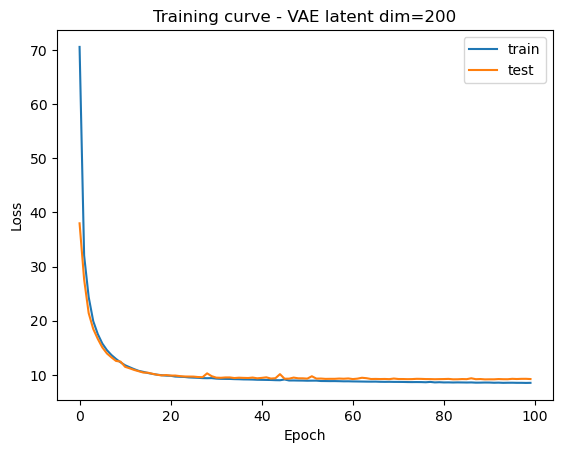

#### latent ndims = 225 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.37it/s]


Epoch [1/100] Train Loss: 71.3529
Epoch [1/100] Test Loss: 37.9243
✅ Best model saved at epoch 1 with test loss: 37.9243


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.95it/s]


Epoch [2/100] Train Loss: 31.6168
Epoch [2/100] Test Loss: 26.9684
✅ Best model saved at epoch 2 with test loss: 26.9684


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.27it/s]


Epoch [3/100] Train Loss: 24.0098
Epoch [3/100] Test Loss: 21.4015
✅ Best model saved at epoch 3 with test loss: 21.4015


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.83it/s]


Epoch [4/100] Train Loss: 19.8178
Epoch [4/100] Test Loss: 18.1490
✅ Best model saved at epoch 4 with test loss: 18.1490


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.01it/s]


Epoch [5/100] Train Loss: 17.2325
Epoch [5/100] Test Loss: 16.0858
✅ Best model saved at epoch 5 with test loss: 16.0858


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [6/100] Train Loss: 15.3779
Epoch [6/100] Test Loss: 14.6385
✅ Best model saved at epoch 6 with test loss: 14.6385


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.04it/s]


Epoch [7/100] Train Loss: 14.0998
Epoch [7/100] Test Loss: 13.3556
✅ Best model saved at epoch 7 with test loss: 13.3556


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.59it/s]


Epoch [8/100] Train Loss: 13.0827
Epoch [8/100] Test Loss: 12.5354
✅ Best model saved at epoch 8 with test loss: 12.5354


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.07it/s]


Epoch [9/100] Train Loss: 12.3589
Epoch [9/100] Test Loss: 11.8572
✅ Best model saved at epoch 9 with test loss: 11.8572


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.42it/s]


Epoch [10/100] Train Loss: 11.6598
Epoch [10/100] Test Loss: 11.4455
✅ Best model saved at epoch 10 with test loss: 11.4455


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.01it/s]


Epoch [11/100] Train Loss: 11.1513
Epoch [11/100] Test Loss: 10.8576
✅ Best model saved at epoch 11 with test loss: 10.8576


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.17it/s]


Epoch [12/100] Train Loss: 10.6882
Epoch [12/100] Test Loss: 10.4899
✅ Best model saved at epoch 12 with test loss: 10.4899


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.47it/s]


Epoch [13/100] Train Loss: 10.3108
Epoch [13/100] Test Loss: 10.4121
✅ Best model saved at epoch 13 with test loss: 10.4121


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.25it/s]


Epoch [14/100] Train Loss: 10.0797
Epoch [14/100] Test Loss: 10.3028
✅ Best model saved at epoch 14 with test loss: 10.3028


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.57it/s]


Epoch [15/100] Train Loss: 9.7505
Epoch [15/100] Test Loss: 10.0481
✅ Best model saved at epoch 15 with test loss: 10.0481


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.93it/s]


Epoch [16/100] Train Loss: 9.6180
Epoch [16/100] Test Loss: 9.7055
✅ Best model saved at epoch 16 with test loss: 9.7055


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.42it/s]


Epoch [17/100] Train Loss: 9.4244
Epoch [17/100] Test Loss: 9.3293
✅ Best model saved at epoch 17 with test loss: 9.3293


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.69it/s]


Epoch [18/100] Train Loss: 9.2799
Epoch [18/100] Test Loss: 9.2749
✅ Best model saved at epoch 18 with test loss: 9.2749


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.53it/s]


Epoch [19/100] Train Loss: 9.1889
Epoch [19/100] Test Loss: 9.2442
✅ Best model saved at epoch 19 with test loss: 9.2442


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.92it/s]


Epoch [20/100] Train Loss: 9.0731
Epoch [20/100] Test Loss: 9.0447
✅ Best model saved at epoch 20 with test loss: 9.0447


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.35it/s]


Epoch [21/100] Train Loss: 8.9712
Epoch [21/100] Test Loss: 9.0787


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.54it/s]


Epoch [22/100] Train Loss: 8.8945
Epoch [22/100] Test Loss: 8.9489
✅ Best model saved at epoch 22 with test loss: 8.9489


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.93it/s]


Epoch [23/100] Train Loss: 8.8364
Epoch [23/100] Test Loss: 8.8509
✅ Best model saved at epoch 23 with test loss: 8.8509


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.19it/s]


Epoch [24/100] Train Loss: 8.7261
Epoch [24/100] Test Loss: 9.0521


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.12it/s]


Epoch [25/100] Train Loss: 8.6874
Epoch [25/100] Test Loss: 8.7759
✅ Best model saved at epoch 25 with test loss: 8.7759


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [26/100] Train Loss: 8.6195
Epoch [26/100] Test Loss: 8.7692
✅ Best model saved at epoch 26 with test loss: 8.7692


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [27/100] Train Loss: 8.5798
Epoch [27/100] Test Loss: 8.6797
✅ Best model saved at epoch 27 with test loss: 8.6797


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.69it/s]


Epoch [28/100] Train Loss: 8.5701
Epoch [28/100] Test Loss: 8.6872


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.86it/s]


Epoch [29/100] Train Loss: 8.4758
Epoch [29/100] Test Loss: 8.6740
✅ Best model saved at epoch 29 with test loss: 8.6740


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.62it/s]


Epoch [30/100] Train Loss: 8.4429
Epoch [30/100] Test Loss: 8.5845
✅ Best model saved at epoch 30 with test loss: 8.5845


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.72it/s]


Epoch [31/100] Train Loss: 8.4503
Epoch [31/100] Test Loss: 8.5970


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.18it/s]


Epoch [32/100] Train Loss: 8.3779
Epoch [32/100] Test Loss: 8.6103


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [33/100] Train Loss: 8.3604
Epoch [33/100] Test Loss: 8.6282


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.86it/s]


Epoch [34/100] Train Loss: 8.3178
Epoch [34/100] Test Loss: 8.5490
✅ Best model saved at epoch 34 with test loss: 8.5490


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [35/100] Train Loss: 8.2881
Epoch [35/100] Test Loss: 8.5518


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.70it/s]


Epoch [36/100] Train Loss: 8.2785
Epoch [36/100] Test Loss: 8.6399


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.27it/s]


Epoch [37/100] Train Loss: 8.2832
Epoch [37/100] Test Loss: 8.5655


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.28it/s]


Epoch [38/100] Train Loss: 8.2176
Epoch [38/100] Test Loss: 8.4426
✅ Best model saved at epoch 38 with test loss: 8.4426


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.99it/s]


Epoch [39/100] Train Loss: 8.1959
Epoch [39/100] Test Loss: 8.6306


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.28it/s]


Epoch [40/100] Train Loss: 8.1805
Epoch [40/100] Test Loss: 8.7745


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.30it/s]


Epoch [41/100] Train Loss: 8.2533
Epoch [41/100] Test Loss: 8.4373
✅ Best model saved at epoch 41 with test loss: 8.4373


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.38it/s]


Epoch [42/100] Train Loss: 8.1231
Epoch [42/100] Test Loss: 8.5822


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [43/100] Train Loss: 8.1967
Epoch [43/100] Test Loss: 8.4697


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.76it/s]


Epoch [44/100] Train Loss: 8.1025
Epoch [44/100] Test Loss: 8.4188
✅ Best model saved at epoch 44 with test loss: 8.4188


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.91it/s]


Epoch [45/100] Train Loss: 8.0842
Epoch [45/100] Test Loss: 8.4270


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.34it/s]


Epoch [46/100] Train Loss: 8.0652
Epoch [46/100] Test Loss: 8.4608


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.23it/s]


Epoch [47/100] Train Loss: 8.0517
Epoch [47/100] Test Loss: 8.3967
✅ Best model saved at epoch 47 with test loss: 8.3967


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.86it/s]


Epoch [48/100] Train Loss: 8.0427
Epoch [48/100] Test Loss: 8.4299


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.96it/s]


Epoch [49/100] Train Loss: 8.0563
Epoch [49/100] Test Loss: 8.3777
✅ Best model saved at epoch 49 with test loss: 8.3777


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.64it/s]


Epoch [50/100] Train Loss: 7.9959
Epoch [50/100] Test Loss: 8.5193


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.04it/s]


Epoch [51/100] Train Loss: 7.9990
Epoch [51/100] Test Loss: 8.6646


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.95it/s]


Epoch [52/100] Train Loss: 7.9886
Epoch [52/100] Test Loss: 8.3972


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.94it/s]


Epoch [53/100] Train Loss: 7.9739
Epoch [53/100] Test Loss: 8.3690
✅ Best model saved at epoch 53 with test loss: 8.3690


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.28it/s]


Epoch [54/100] Train Loss: 7.9516
Epoch [54/100] Test Loss: 8.5220


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.70it/s]


Epoch [55/100] Train Loss: 7.9713
Epoch [55/100] Test Loss: 8.3015
✅ Best model saved at epoch 55 with test loss: 8.3015


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.05it/s]


Epoch [56/100] Train Loss: 7.9156
Epoch [56/100] Test Loss: 8.3753


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.45it/s]


Epoch [57/100] Train Loss: 7.9214
Epoch [57/100] Test Loss: 8.3967


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.27it/s]


Epoch [58/100] Train Loss: 7.9075
Epoch [58/100] Test Loss: 8.7158


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.10it/s]


Epoch [59/100] Train Loss: 7.9252
Epoch [59/100] Test Loss: 8.3182


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.16it/s]


Epoch [60/100] Train Loss: 7.8630
Epoch [60/100] Test Loss: 8.3502


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.94it/s]


Epoch [61/100] Train Loss: 7.8677
Epoch [61/100] Test Loss: 8.2668
✅ Best model saved at epoch 61 with test loss: 8.2668


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.73it/s]


Epoch [62/100] Train Loss: 7.8717
Epoch [62/100] Test Loss: 8.2924


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.75it/s]


Epoch [63/100] Train Loss: 7.8434
Epoch [63/100] Test Loss: 8.3000


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.25it/s]


Epoch [64/100] Train Loss: 7.8484
Epoch [64/100] Test Loss: 8.5259


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.57it/s]


Epoch [65/100] Train Loss: 7.8938
Epoch [65/100] Test Loss: 8.2962


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.90it/s]


Epoch [66/100] Train Loss: 7.8001
Epoch [66/100] Test Loss: 8.2898


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.73it/s]


Epoch [67/100] Train Loss: 7.8263
Epoch [67/100] Test Loss: 8.3111


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.76it/s]


Epoch [68/100] Train Loss: 7.7820
Epoch [68/100] Test Loss: 8.2517
✅ Best model saved at epoch 68 with test loss: 8.2517


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.01it/s]


Epoch [69/100] Train Loss: 7.8048
Epoch [69/100] Test Loss: 8.3506


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.61it/s]


Epoch [70/100] Train Loss: 7.7775
Epoch [70/100] Test Loss: 8.2797


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [71/100] Train Loss: 7.7760
Epoch [71/100] Test Loss: 8.3298


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [72/100] Train Loss: 7.7634
Epoch [72/100] Test Loss: 8.2572


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.12it/s]


Epoch [73/100] Train Loss: 7.7565
Epoch [73/100] Test Loss: 8.2505
✅ Best model saved at epoch 73 with test loss: 8.2505


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [74/100] Train Loss: 7.7530
Epoch [74/100] Test Loss: 8.3497


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.39it/s]


Epoch [75/100] Train Loss: 7.7341
Epoch [75/100] Test Loss: 8.2467
✅ Best model saved at epoch 75 with test loss: 8.2467


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.29it/s]


Epoch [76/100] Train Loss: 7.7486
Epoch [76/100] Test Loss: 8.3119


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.73it/s]


Epoch [77/100] Train Loss: 7.7406
Epoch [77/100] Test Loss: 8.2400
✅ Best model saved at epoch 77 with test loss: 8.2400


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.89it/s]


Epoch [78/100] Train Loss: 7.7196
Epoch [78/100] Test Loss: 8.2861


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.12it/s]


Epoch [79/100] Train Loss: 7.7039
Epoch [79/100] Test Loss: 8.2614


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.55it/s]


Epoch [80/100] Train Loss: 7.7067
Epoch [80/100] Test Loss: 8.2953


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.35it/s]


Epoch [81/100] Train Loss: 7.7116
Epoch [81/100] Test Loss: 8.2547


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.20it/s]


Epoch [82/100] Train Loss: 7.6783
Epoch [82/100] Test Loss: 8.2747


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.44it/s]


Epoch [83/100] Train Loss: 7.6899
Epoch [83/100] Test Loss: 8.2528


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.70it/s]


Epoch [84/100] Train Loss: 7.6867
Epoch [84/100] Test Loss: 8.2345
✅ Best model saved at epoch 84 with test loss: 8.2345


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.64it/s]


Epoch [85/100] Train Loss: 7.6746
Epoch [85/100] Test Loss: 8.2790


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.51it/s]


Epoch [86/100] Train Loss: 7.6898
Epoch [86/100] Test Loss: 8.2637


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.90it/s]


Epoch [87/100] Train Loss: 7.6476
Epoch [87/100] Test Loss: 8.2522


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.89it/s]


Epoch [88/100] Train Loss: 7.6630
Epoch [88/100] Test Loss: 8.3422


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [89/100] Train Loss: 7.6508
Epoch [89/100] Test Loss: 8.2521


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [90/100] Train Loss: 7.6370
Epoch [90/100] Test Loss: 8.2600


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.87it/s]


Epoch [91/100] Train Loss: 7.6378
Epoch [91/100] Test Loss: 8.2007
✅ Best model saved at epoch 91 with test loss: 8.2007


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.75it/s]


Epoch [92/100] Train Loss: 7.6359
Epoch [92/100] Test Loss: 8.2606


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.87it/s]


Epoch [93/100] Train Loss: 7.6314
Epoch [93/100] Test Loss: 8.2657


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [94/100] Train Loss: 7.6254
Epoch [94/100] Test Loss: 8.2334


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.32it/s]


Epoch [95/100] Train Loss: 7.6192
Epoch [95/100] Test Loss: 8.2557


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.14it/s]


Epoch [96/100] Train Loss: 7.6082
Epoch [96/100] Test Loss: 8.2304


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.10it/s]


Epoch [97/100] Train Loss: 7.6060
Epoch [97/100] Test Loss: 8.2141


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.72it/s]


Epoch [98/100] Train Loss: 7.5986
Epoch [98/100] Test Loss: 8.2318


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.94it/s]


Epoch [99/100] Train Loss: 7.5995
Epoch [99/100] Test Loss: 8.2223


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.46it/s]


Epoch [100/100] Train Loss: 7.6029
Epoch [100/100] Test Loss: 8.2083


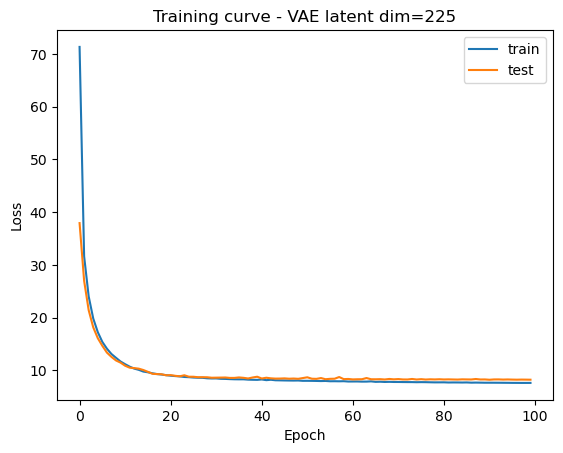

#### latent ndims = 250 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.56it/s]


Epoch [1/100] Train Loss: 71.9942
Epoch [1/100] Test Loss: 38.0856
✅ Best model saved at epoch 1 with test loss: 38.0856


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.28it/s]


Epoch [2/100] Train Loss: 32.1434
Epoch [2/100] Test Loss: 28.0596
✅ Best model saved at epoch 2 with test loss: 28.0596


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.99it/s]


Epoch [3/100] Train Loss: 24.8513
Epoch [3/100] Test Loss: 21.8057
✅ Best model saved at epoch 3 with test loss: 21.8057


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.51it/s]


Epoch [4/100] Train Loss: 20.3797
Epoch [4/100] Test Loss: 18.8291
✅ Best model saved at epoch 4 with test loss: 18.8291


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.18it/s]


Epoch [5/100] Train Loss: 17.5244
Epoch [5/100] Test Loss: 16.4579
✅ Best model saved at epoch 5 with test loss: 16.4579


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.88it/s]


Epoch [6/100] Train Loss: 15.6960
Epoch [6/100] Test Loss: 14.9636
✅ Best model saved at epoch 6 with test loss: 14.9636


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.61it/s]


Epoch [7/100] Train Loss: 14.4547
Epoch [7/100] Test Loss: 13.8797
✅ Best model saved at epoch 7 with test loss: 13.8797


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.67it/s]


Epoch [8/100] Train Loss: 13.2947
Epoch [8/100] Test Loss: 12.8592
✅ Best model saved at epoch 8 with test loss: 12.8592


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.95it/s]


Epoch [9/100] Train Loss: 12.4540
Epoch [9/100] Test Loss: 11.9765
✅ Best model saved at epoch 9 with test loss: 11.9765


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [10/100] Train Loss: 11.7891
Epoch [10/100] Test Loss: 11.6685
✅ Best model saved at epoch 10 with test loss: 11.6685


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.87it/s]


Epoch [11/100] Train Loss: 11.2068
Epoch [11/100] Test Loss: 11.1942
✅ Best model saved at epoch 11 with test loss: 11.1942


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.58it/s]


Epoch [12/100] Train Loss: 10.7648
Epoch [12/100] Test Loss: 10.5242
✅ Best model saved at epoch 12 with test loss: 10.5242


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [13/100] Train Loss: 10.3550
Epoch [13/100] Test Loss: 10.2912
✅ Best model saved at epoch 13 with test loss: 10.2912


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [14/100] Train Loss: 9.9558
Epoch [14/100] Test Loss: 9.7800
✅ Best model saved at epoch 14 with test loss: 9.7800


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [15/100] Train Loss: 9.6491
Epoch [15/100] Test Loss: 9.5864
✅ Best model saved at epoch 15 with test loss: 9.5864


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [16/100] Train Loss: 9.3909
Epoch [16/100] Test Loss: 9.2126
✅ Best model saved at epoch 16 with test loss: 9.2126


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.84it/s]


Epoch [17/100] Train Loss: 9.1009
Epoch [17/100] Test Loss: 9.0150
✅ Best model saved at epoch 17 with test loss: 9.0150


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [18/100] Train Loss: 8.8601
Epoch [18/100] Test Loss: 8.8120
✅ Best model saved at epoch 18 with test loss: 8.8120


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [19/100] Train Loss: 8.6374
Epoch [19/100] Test Loss: 8.5981
✅ Best model saved at epoch 19 with test loss: 8.5981


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [20/100] Train Loss: 8.4933
Epoch [20/100] Test Loss: 8.4248
✅ Best model saved at epoch 20 with test loss: 8.4248


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.25it/s]


Epoch [21/100] Train Loss: 8.3516
Epoch [21/100] Test Loss: 8.3152
✅ Best model saved at epoch 21 with test loss: 8.3152


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.30it/s]


Epoch [22/100] Train Loss: 8.2224
Epoch [22/100] Test Loss: 8.2063
✅ Best model saved at epoch 22 with test loss: 8.2063


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.11it/s]


Epoch [23/100] Train Loss: 8.1296
Epoch [23/100] Test Loss: 8.1965
✅ Best model saved at epoch 23 with test loss: 8.1965


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.71it/s]


Epoch [24/100] Train Loss: 8.0510
Epoch [24/100] Test Loss: 8.1196
✅ Best model saved at epoch 24 with test loss: 8.1196


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.45it/s]


Epoch [25/100] Train Loss: 7.9498
Epoch [25/100] Test Loss: 8.4250


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.10it/s]


Epoch [26/100] Train Loss: 7.9099
Epoch [26/100] Test Loss: 7.9256
✅ Best model saved at epoch 26 with test loss: 7.9256


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [27/100] Train Loss: 7.8279
Epoch [27/100] Test Loss: 7.9394


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.24it/s]


Epoch [28/100] Train Loss: 7.7890
Epoch [28/100] Test Loss: 7.8826
✅ Best model saved at epoch 28 with test loss: 7.8826


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.43it/s]


Epoch [29/100] Train Loss: 7.7252
Epoch [29/100] Test Loss: 8.1003


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.04it/s]


Epoch [30/100] Train Loss: 7.6854
Epoch [30/100] Test Loss: 7.9844


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [31/100] Train Loss: 7.7336
Epoch [31/100] Test Loss: 7.6874
✅ Best model saved at epoch 31 with test loss: 7.6874


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.96it/s]


Epoch [32/100] Train Loss: 7.5770
Epoch [32/100] Test Loss: 7.7417


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.17it/s]


Epoch [33/100] Train Loss: 7.5507
Epoch [33/100] Test Loss: 7.7563


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.74it/s]


Epoch [34/100] Train Loss: 7.5153
Epoch [34/100] Test Loss: 7.7528


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.25it/s]


Epoch [35/100] Train Loss: 7.4886
Epoch [35/100] Test Loss: 7.7740


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.55it/s]


Epoch [36/100] Train Loss: 7.4549
Epoch [36/100] Test Loss: 7.6110
✅ Best model saved at epoch 36 with test loss: 7.6110


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.97it/s]


Epoch [37/100] Train Loss: 7.4314
Epoch [37/100] Test Loss: 7.5830
✅ Best model saved at epoch 37 with test loss: 7.5830


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.27it/s]


Epoch [38/100] Train Loss: 7.4248
Epoch [38/100] Test Loss: 7.6406


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.26it/s]


Epoch [39/100] Train Loss: 7.3685
Epoch [39/100] Test Loss: 7.5974


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.52it/s]


Epoch [40/100] Train Loss: 7.3429
Epoch [40/100] Test Loss: 7.6109


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.22it/s]


Epoch [41/100] Train Loss: 7.3292
Epoch [41/100] Test Loss: 7.5459
✅ Best model saved at epoch 41 with test loss: 7.5459


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.70it/s]


Epoch [42/100] Train Loss: 7.3379
Epoch [42/100] Test Loss: 7.5649


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.64it/s]


Epoch [43/100] Train Loss: 7.2804
Epoch [43/100] Test Loss: 7.4962
✅ Best model saved at epoch 43 with test loss: 7.4962


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [44/100] Train Loss: 7.3033
Epoch [44/100] Test Loss: 7.5217


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.97it/s]


Epoch [45/100] Train Loss: 7.2533
Epoch [45/100] Test Loss: 7.4862
✅ Best model saved at epoch 45 with test loss: 7.4862


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.23it/s]


Epoch [46/100] Train Loss: 7.2484
Epoch [46/100] Test Loss: 7.7739


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [47/100] Train Loss: 7.2219
Epoch [47/100] Test Loss: 7.7750


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.34it/s]


Epoch [48/100] Train Loss: 7.2252
Epoch [48/100] Test Loss: 7.8511


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.07it/s]


Epoch [49/100] Train Loss: 7.2014
Epoch [49/100] Test Loss: 7.4752
✅ Best model saved at epoch 49 with test loss: 7.4752


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.39it/s]


Epoch [50/100] Train Loss: 7.1859
Epoch [50/100] Test Loss: 7.5469


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.70it/s]


Epoch [51/100] Train Loss: 7.1681
Epoch [51/100] Test Loss: 7.4501
✅ Best model saved at epoch 51 with test loss: 7.4501


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.25it/s]


Epoch [52/100] Train Loss: 7.1589
Epoch [52/100] Test Loss: 7.4562


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.11it/s]


Epoch [53/100] Train Loss: 7.1464
Epoch [53/100] Test Loss: 7.4608


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.67it/s]


Epoch [54/100] Train Loss: 7.1404
Epoch [54/100] Test Loss: 7.5341


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.86it/s]


Epoch [55/100] Train Loss: 7.1271
Epoch [55/100] Test Loss: 7.4995


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.06it/s]


Epoch [56/100] Train Loss: 7.1027
Epoch [56/100] Test Loss: 7.4285
✅ Best model saved at epoch 56 with test loss: 7.4285


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.64it/s]


Epoch [57/100] Train Loss: 7.0879
Epoch [57/100] Test Loss: 7.4781


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.83it/s]


Epoch [58/100] Train Loss: 7.0906
Epoch [58/100] Test Loss: 7.4191
✅ Best model saved at epoch 58 with test loss: 7.4191


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.07it/s]


Epoch [59/100] Train Loss: 7.0939
Epoch [59/100] Test Loss: 7.4549


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.87it/s]


Epoch [60/100] Train Loss: 7.0598
Epoch [60/100] Test Loss: 7.4006
✅ Best model saved at epoch 60 with test loss: 7.4006


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.69it/s]


Epoch [61/100] Train Loss: 7.0590
Epoch [61/100] Test Loss: 7.4878


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.98it/s]


Epoch [62/100] Train Loss: 7.0402
Epoch [62/100] Test Loss: 7.5417


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [63/100] Train Loss: 7.0437
Epoch [63/100] Test Loss: 7.4605


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [64/100] Train Loss: 7.0193
Epoch [64/100] Test Loss: 7.4300


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.82it/s]


Epoch [65/100] Train Loss: 7.0112
Epoch [65/100] Test Loss: 7.3894
✅ Best model saved at epoch 65 with test loss: 7.3894


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.63it/s]


Epoch [66/100] Train Loss: 7.0191
Epoch [66/100] Test Loss: 7.3824
✅ Best model saved at epoch 66 with test loss: 7.3824


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.23it/s]


Epoch [67/100] Train Loss: 7.0070
Epoch [67/100] Test Loss: 7.4305


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.93it/s]


Epoch [68/100] Train Loss: 6.9770
Epoch [68/100] Test Loss: 7.3829


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.44it/s]


Epoch [69/100] Train Loss: 7.0035
Epoch [69/100] Test Loss: 7.3692
✅ Best model saved at epoch 69 with test loss: 7.3692


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.46it/s]


Epoch [70/100] Train Loss: 6.9728
Epoch [70/100] Test Loss: 7.4196


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [71/100] Train Loss: 6.9627
Epoch [71/100] Test Loss: 7.6103


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.30it/s]


Epoch [72/100] Train Loss: 6.9660
Epoch [72/100] Test Loss: 7.3958


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.55it/s]


Epoch [73/100] Train Loss: 6.9759
Epoch [73/100] Test Loss: 7.3713


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.80it/s]


Epoch [74/100] Train Loss: 6.9264
Epoch [74/100] Test Loss: 7.4152


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [75/100] Train Loss: 6.9445
Epoch [75/100] Test Loss: 7.3892


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.47it/s]


Epoch [76/100] Train Loss: 6.9454
Epoch [76/100] Test Loss: 7.3529
✅ Best model saved at epoch 76 with test loss: 7.3529


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [77/100] Train Loss: 6.9295
Epoch [77/100] Test Loss: 7.4335


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.81it/s]


Epoch [78/100] Train Loss: 6.9158
Epoch [78/100] Test Loss: 7.3828


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [79/100] Train Loss: 6.9290
Epoch [79/100] Test Loss: 7.3568


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.33it/s]


Epoch [80/100] Train Loss: 6.9065
Epoch [80/100] Test Loss: 7.4247


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.46it/s]


Epoch [81/100] Train Loss: 6.9137
Epoch [81/100] Test Loss: 7.4143


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.14it/s]


Epoch [82/100] Train Loss: 6.9001
Epoch [82/100] Test Loss: 7.4081


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.43it/s]


Epoch [83/100] Train Loss: 6.8775
Epoch [83/100] Test Loss: 7.4141


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.80it/s]


Epoch [84/100] Train Loss: 6.8865
Epoch [84/100] Test Loss: 7.3484
✅ Best model saved at epoch 84 with test loss: 7.3484


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.15it/s]


Epoch [85/100] Train Loss: 6.8719
Epoch [85/100] Test Loss: 7.3728


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.68it/s]


Epoch [86/100] Train Loss: 6.8756
Epoch [86/100] Test Loss: 7.5137


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [87/100] Train Loss: 6.8813
Epoch [87/100] Test Loss: 7.4758


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.03it/s]


Epoch [88/100] Train Loss: 6.8869
Epoch [88/100] Test Loss: 7.5601


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.47it/s]


Epoch [89/100] Train Loss: 6.8445
Epoch [89/100] Test Loss: 7.3421
✅ Best model saved at epoch 89 with test loss: 7.3421


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.31it/s]


Epoch [90/100] Train Loss: 6.8566
Epoch [90/100] Test Loss: 7.3805


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.91it/s]


Epoch [91/100] Train Loss: 6.8394
Epoch [91/100] Test Loss: 7.3491


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.31it/s]


Epoch [92/100] Train Loss: 6.8526
Epoch [92/100] Test Loss: 7.3731


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.19it/s]


Epoch [93/100] Train Loss: 6.8432
Epoch [93/100] Test Loss: 7.3800


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.32it/s]


Epoch [94/100] Train Loss: 6.8307
Epoch [94/100] Test Loss: 7.4013


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.78it/s]


Epoch [95/100] Train Loss: 6.8375
Epoch [95/100] Test Loss: 7.5276


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.80it/s]


Epoch [96/100] Train Loss: 6.8263
Epoch [96/100] Test Loss: 7.3066
✅ Best model saved at epoch 96 with test loss: 7.3066


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [97/100] Train Loss: 6.8245
Epoch [97/100] Test Loss: 7.5279


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.14it/s]


Epoch [98/100] Train Loss: 6.8259
Epoch [98/100] Test Loss: 7.3594


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [99/100] Train Loss: 6.7981
Epoch [99/100] Test Loss: 7.3690


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.01it/s]


Epoch [100/100] Train Loss: 6.8124
Epoch [100/100] Test Loss: 7.3313


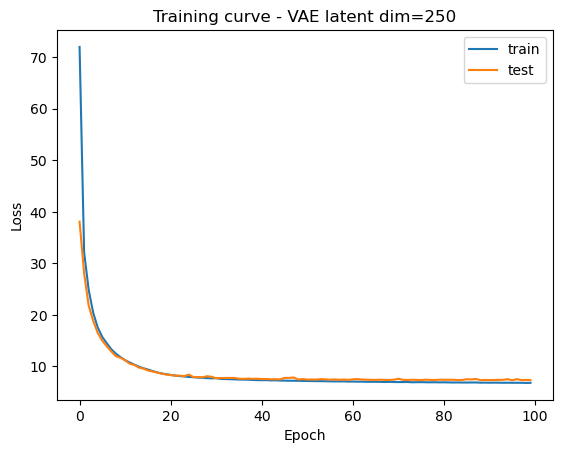

#### latent ndims = 275 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.60it/s]


Epoch [1/100] Train Loss: 67.2331
Epoch [1/100] Test Loss: 37.8408
✅ Best model saved at epoch 1 with test loss: 37.8408


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [2/100] Train Loss: 31.9276
Epoch [2/100] Test Loss: 27.0621
✅ Best model saved at epoch 2 with test loss: 27.0621


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.55it/s]


Epoch [3/100] Train Loss: 24.2440
Epoch [3/100] Test Loss: 21.4483
✅ Best model saved at epoch 3 with test loss: 21.4483


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.28it/s]


Epoch [4/100] Train Loss: 19.9154
Epoch [4/100] Test Loss: 18.2389
✅ Best model saved at epoch 4 with test loss: 18.2389


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.62it/s]


Epoch [5/100] Train Loss: 17.1387
Epoch [5/100] Test Loss: 15.9031
✅ Best model saved at epoch 5 with test loss: 15.9031


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.33it/s]


Epoch [6/100] Train Loss: 15.2596
Epoch [6/100] Test Loss: 14.6259
✅ Best model saved at epoch 6 with test loss: 14.6259


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.04it/s]


Epoch [7/100] Train Loss: 13.9547
Epoch [7/100] Test Loss: 13.7259
✅ Best model saved at epoch 7 with test loss: 13.7259


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.76it/s]


Epoch [8/100] Train Loss: 13.0285
Epoch [8/100] Test Loss: 12.8342
✅ Best model saved at epoch 8 with test loss: 12.8342


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.26it/s]


Epoch [9/100] Train Loss: 12.2545
Epoch [9/100] Test Loss: 11.7970
✅ Best model saved at epoch 9 with test loss: 11.7970


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.13it/s]


Epoch [10/100] Train Loss: 11.5945
Epoch [10/100] Test Loss: 11.3878
✅ Best model saved at epoch 10 with test loss: 11.3878


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.41it/s]


Epoch [11/100] Train Loss: 11.0622
Epoch [11/100] Test Loss: 11.4466


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.17it/s]


Epoch [12/100] Train Loss: 10.6383
Epoch [12/100] Test Loss: 10.5041
✅ Best model saved at epoch 12 with test loss: 10.5041


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.19it/s]


Epoch [13/100] Train Loss: 10.1864
Epoch [13/100] Test Loss: 10.0990
✅ Best model saved at epoch 13 with test loss: 10.0990


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.67it/s]


Epoch [14/100] Train Loss: 9.9258
Epoch [14/100] Test Loss: 9.5732
✅ Best model saved at epoch 14 with test loss: 9.5732


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.98it/s]


Epoch [15/100] Train Loss: 9.4742
Epoch [15/100] Test Loss: 9.3025
✅ Best model saved at epoch 15 with test loss: 9.3025


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.65it/s]


Epoch [16/100] Train Loss: 9.2109
Epoch [16/100] Test Loss: 9.2245
✅ Best model saved at epoch 16 with test loss: 9.2245


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.01it/s]


Epoch [17/100] Train Loss: 8.8461
Epoch [17/100] Test Loss: 8.9451
✅ Best model saved at epoch 17 with test loss: 8.9451


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.05it/s]


Epoch [18/100] Train Loss: 8.6169
Epoch [18/100] Test Loss: 8.5892
✅ Best model saved at epoch 18 with test loss: 8.5892


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.26it/s]


Epoch [19/100] Train Loss: 8.3661
Epoch [19/100] Test Loss: 8.3927
✅ Best model saved at epoch 19 with test loss: 8.3927


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.71it/s]


Epoch [20/100] Train Loss: 8.1427
Epoch [20/100] Test Loss: 8.2029
✅ Best model saved at epoch 20 with test loss: 8.2029


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.49it/s]


Epoch [21/100] Train Loss: 7.9816
Epoch [21/100] Test Loss: 7.9937
✅ Best model saved at epoch 21 with test loss: 7.9937


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.41it/s]


Epoch [22/100] Train Loss: 7.8337
Epoch [22/100] Test Loss: 7.8298
✅ Best model saved at epoch 22 with test loss: 7.8298


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.77it/s]


Epoch [23/100] Train Loss: 7.7173
Epoch [23/100] Test Loss: 7.6831
✅ Best model saved at epoch 23 with test loss: 7.6831


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.86it/s]


Epoch [24/100] Train Loss: 7.6269
Epoch [24/100] Test Loss: 7.7256


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.65it/s]


Epoch [25/100] Train Loss: 7.5136
Epoch [25/100] Test Loss: 8.1909


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.30it/s]


Epoch [26/100] Train Loss: 7.4245
Epoch [26/100] Test Loss: 7.4588
✅ Best model saved at epoch 26 with test loss: 7.4588


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.93it/s]


Epoch [27/100] Train Loss: 7.3687
Epoch [27/100] Test Loss: 7.3448
✅ Best model saved at epoch 27 with test loss: 7.3448


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.20it/s]


Epoch [28/100] Train Loss: 7.2667
Epoch [28/100] Test Loss: 7.3074
✅ Best model saved at epoch 28 with test loss: 7.3074


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.89it/s]


Epoch [29/100] Train Loss: 7.2082
Epoch [29/100] Test Loss: 7.3098


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.69it/s]


Epoch [30/100] Train Loss: 7.1329
Epoch [30/100] Test Loss: 7.2451
✅ Best model saved at epoch 30 with test loss: 7.2451


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.31it/s]


Epoch [31/100] Train Loss: 7.1528
Epoch [31/100] Test Loss: 7.1434
✅ Best model saved at epoch 31 with test loss: 7.1434


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.91it/s]


Epoch [32/100] Train Loss: 7.0725
Epoch [32/100] Test Loss: 7.3754


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.82it/s]


Epoch [33/100] Train Loss: 6.9864
Epoch [33/100] Test Loss: 7.2180


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.33it/s]


Epoch [34/100] Train Loss: 7.0172
Epoch [34/100] Test Loss: 7.1717


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.52it/s]


Epoch [35/100] Train Loss: 6.9274
Epoch [35/100] Test Loss: 7.0443
✅ Best model saved at epoch 35 with test loss: 7.0443


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.86it/s]


Epoch [36/100] Train Loss: 6.9289
Epoch [36/100] Test Loss: 7.4768


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.85it/s]


Epoch [37/100] Train Loss: 6.8875
Epoch [37/100] Test Loss: 6.9989
✅ Best model saved at epoch 37 with test loss: 6.9989


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.96it/s]


Epoch [38/100] Train Loss: 6.8813
Epoch [38/100] Test Loss: 7.0123


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.07it/s]


Epoch [39/100] Train Loss: 6.8477
Epoch [39/100] Test Loss: 7.0020


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.85it/s]


Epoch [40/100] Train Loss: 6.8316
Epoch [40/100] Test Loss: 6.9978
✅ Best model saved at epoch 40 with test loss: 6.9978


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.73it/s]


Epoch [41/100] Train Loss: 6.7749
Epoch [41/100] Test Loss: 6.9904
✅ Best model saved at epoch 41 with test loss: 6.9904


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.93it/s]


Epoch [42/100] Train Loss: 6.7672
Epoch [42/100] Test Loss: 7.2034


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.97it/s]


Epoch [43/100] Train Loss: 6.7299
Epoch [43/100] Test Loss: 6.8545
✅ Best model saved at epoch 43 with test loss: 6.8545


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.05it/s]


Epoch [44/100] Train Loss: 6.8137
Epoch [44/100] Test Loss: 6.9150


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.27it/s]


Epoch [45/100] Train Loss: 6.6631
Epoch [45/100] Test Loss: 6.9155


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.08it/s]


Epoch [46/100] Train Loss: 6.6948
Epoch [46/100] Test Loss: 6.8915


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.93it/s]


Epoch [47/100] Train Loss: 6.6628
Epoch [47/100] Test Loss: 6.9084


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.91it/s]


Epoch [48/100] Train Loss: 6.7744
Epoch [48/100] Test Loss: 6.8406
✅ Best model saved at epoch 48 with test loss: 6.8406


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.77it/s]


Epoch [49/100] Train Loss: 6.6065
Epoch [49/100] Test Loss: 6.8404
✅ Best model saved at epoch 49 with test loss: 6.8404


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.28it/s]


Epoch [50/100] Train Loss: 6.6108
Epoch [50/100] Test Loss: 6.8386
✅ Best model saved at epoch 50 with test loss: 6.8386


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.10it/s]


Epoch [51/100] Train Loss: 6.6076
Epoch [51/100] Test Loss: 6.8421


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.44it/s]


Epoch [52/100] Train Loss: 6.6067
Epoch [52/100] Test Loss: 6.8289
✅ Best model saved at epoch 52 with test loss: 6.8289


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.25it/s]


Epoch [53/100] Train Loss: 6.5998
Epoch [53/100] Test Loss: 7.0953


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.11it/s]


Epoch [54/100] Train Loss: 6.5575
Epoch [54/100] Test Loss: 6.8564


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.62it/s]


Epoch [55/100] Train Loss: 6.5587
Epoch [55/100] Test Loss: 6.8945


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.61it/s]


Epoch [56/100] Train Loss: 6.6023
Epoch [56/100] Test Loss: 6.7710
✅ Best model saved at epoch 56 with test loss: 6.7710


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.22it/s]


Epoch [57/100] Train Loss: 6.4958
Epoch [57/100] Test Loss: 6.9679


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.46it/s]


Epoch [58/100] Train Loss: 6.5751
Epoch [58/100] Test Loss: 6.8076


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.75it/s]


Epoch [59/100] Train Loss: 6.5153
Epoch [59/100] Test Loss: 6.9341


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.32it/s]


Epoch [60/100] Train Loss: 6.4963
Epoch [60/100] Test Loss: 6.7947


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.02it/s]


Epoch [61/100] Train Loss: 6.5126
Epoch [61/100] Test Loss: 6.7674
✅ Best model saved at epoch 61 with test loss: 6.7674


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.67it/s]


Epoch [62/100] Train Loss: 6.4780
Epoch [62/100] Test Loss: 6.7837


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.04it/s]


Epoch [63/100] Train Loss: 6.5125
Epoch [63/100] Test Loss: 6.9468


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.97it/s]


Epoch [64/100] Train Loss: 6.4425
Epoch [64/100] Test Loss: 6.7922


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.48it/s]


Epoch [65/100] Train Loss: 6.4725
Epoch [65/100] Test Loss: 6.7400
✅ Best model saved at epoch 65 with test loss: 6.7400


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.30it/s]


Epoch [66/100] Train Loss: 6.4493
Epoch [66/100] Test Loss: 6.7780


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.77it/s]


Epoch [67/100] Train Loss: 6.4431
Epoch [67/100] Test Loss: 6.8474


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.94it/s]


Epoch [68/100] Train Loss: 6.4512
Epoch [68/100] Test Loss: 6.9647


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.44it/s]


Epoch [69/100] Train Loss: 6.4426
Epoch [69/100] Test Loss: 7.2383


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.84it/s]


Epoch [70/100] Train Loss: 6.4352
Epoch [70/100] Test Loss: 6.9554


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.90it/s]


Epoch [71/100] Train Loss: 6.4196
Epoch [71/100] Test Loss: 6.7541


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.45it/s]


Epoch [72/100] Train Loss: 6.3881
Epoch [72/100] Test Loss: 6.7718


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.89it/s]


Epoch [73/100] Train Loss: 6.4314
Epoch [73/100] Test Loss: 6.8357


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.27it/s]


Epoch [74/100] Train Loss: 6.3667
Epoch [74/100] Test Loss: 6.7977


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.18it/s]


Epoch [75/100] Train Loss: 6.4212
Epoch [75/100] Test Loss: 6.7915


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.99it/s]


Epoch [76/100] Train Loss: 6.3657
Epoch [76/100] Test Loss: 6.7463


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [77/100] Train Loss: 6.3877
Epoch [77/100] Test Loss: 6.8620


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.54it/s]


Epoch [78/100] Train Loss: 6.3747
Epoch [78/100] Test Loss: 6.7480


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.02it/s]


Epoch [79/100] Train Loss: 6.3844
Epoch [79/100] Test Loss: 6.6993
✅ Best model saved at epoch 79 with test loss: 6.6993


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.62it/s]


Epoch [80/100] Train Loss: 6.4910
Epoch [80/100] Test Loss: 7.0411


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.42it/s]


Epoch [81/100] Train Loss: 6.2883
Epoch [81/100] Test Loss: 6.7012


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.20it/s]


Epoch [82/100] Train Loss: 6.4705
Epoch [82/100] Test Loss: 9.8469


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.94it/s]


Epoch [83/100] Train Loss: 6.3856
Epoch [83/100] Test Loss: 6.7263


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.95it/s]


Epoch [84/100] Train Loss: 6.3192
Epoch [84/100] Test Loss: 6.7830


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.72it/s]


Epoch [85/100] Train Loss: 6.3164
Epoch [85/100] Test Loss: 6.7842


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.80it/s]


Epoch [86/100] Train Loss: 6.3269
Epoch [86/100] Test Loss: 6.7120


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.04it/s]


Epoch [87/100] Train Loss: 6.3129
Epoch [87/100] Test Loss: 6.9077


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.31it/s]


Epoch [88/100] Train Loss: 6.3403
Epoch [88/100] Test Loss: 6.7476


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.54it/s]


Epoch [89/100] Train Loss: 6.2967
Epoch [89/100] Test Loss: 6.7821


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.73it/s]


Epoch [90/100] Train Loss: 6.3074
Epoch [90/100] Test Loss: 7.0303


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.19it/s]


Epoch [91/100] Train Loss: 6.3634
Epoch [91/100] Test Loss: 6.7761


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.87it/s]


Epoch [92/100] Train Loss: 6.3086
Epoch [92/100] Test Loss: 6.8066


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.43it/s]


Epoch [93/100] Train Loss: 6.2770
Epoch [93/100] Test Loss: 6.7474


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.83it/s]


Epoch [94/100] Train Loss: 6.3290
Epoch [94/100] Test Loss: 6.8667
🚦🚦🚦 Early stopping triggered 🚦


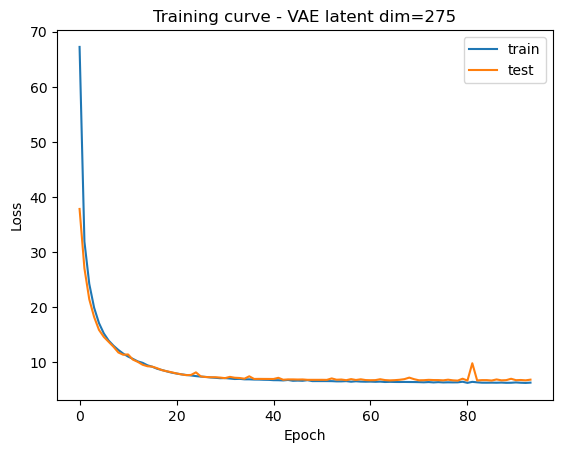

#### latent ndims = 300 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.51it/s]


Epoch [1/100] Train Loss: 68.0100
Epoch [1/100] Test Loss: 36.9431
✅ Best model saved at epoch 1 with test loss: 36.9431


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.11it/s]


Epoch [2/100] Train Loss: 30.7567
Epoch [2/100] Test Loss: 25.8665
✅ Best model saved at epoch 2 with test loss: 25.8665


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.91it/s]


Epoch [3/100] Train Loss: 23.2183
Epoch [3/100] Test Loss: 20.9011
✅ Best model saved at epoch 3 with test loss: 20.9011


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.78it/s]


Epoch [4/100] Train Loss: 19.1590
Epoch [4/100] Test Loss: 17.9948
✅ Best model saved at epoch 4 with test loss: 17.9948


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.33it/s]


Epoch [5/100] Train Loss: 16.5213
Epoch [5/100] Test Loss: 15.4786
✅ Best model saved at epoch 5 with test loss: 15.4786


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.12it/s]


Epoch [6/100] Train Loss: 14.6353
Epoch [6/100] Test Loss: 13.7552
✅ Best model saved at epoch 6 with test loss: 13.7552


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.03it/s]


Epoch [7/100] Train Loss: 13.4358
Epoch [7/100] Test Loss: 12.8470
✅ Best model saved at epoch 7 with test loss: 12.8470


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [8/100] Train Loss: 12.3599
Epoch [8/100] Test Loss: 11.8791
✅ Best model saved at epoch 8 with test loss: 11.8791


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [9/100] Train Loss: 11.6767
Epoch [9/100] Test Loss: 11.2747
✅ Best model saved at epoch 9 with test loss: 11.2747


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.31it/s]


Epoch [10/100] Train Loss: 10.9812
Epoch [10/100] Test Loss: 10.6322
✅ Best model saved at epoch 10 with test loss: 10.6322


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.65it/s]


Epoch [11/100] Train Loss: 10.4021
Epoch [11/100] Test Loss: 10.0763
✅ Best model saved at epoch 11 with test loss: 10.0763


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [12/100] Train Loss: 9.9204
Epoch [12/100] Test Loss: 9.8441
✅ Best model saved at epoch 12 with test loss: 9.8441


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.21it/s]


Epoch [13/100] Train Loss: 9.5454
Epoch [13/100] Test Loss: 9.3186
✅ Best model saved at epoch 13 with test loss: 9.3186


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.94it/s]


Epoch [14/100] Train Loss: 9.1839
Epoch [14/100] Test Loss: 9.0838
✅ Best model saved at epoch 14 with test loss: 9.0838


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.01it/s]


Epoch [15/100] Train Loss: 8.8981
Epoch [15/100] Test Loss: 8.7464
✅ Best model saved at epoch 15 with test loss: 8.7464


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.08it/s]


Epoch [16/100] Train Loss: 8.5992
Epoch [16/100] Test Loss: 8.4475
✅ Best model saved at epoch 16 with test loss: 8.4475


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.80it/s]


Epoch [17/100] Train Loss: 8.3642
Epoch [17/100] Test Loss: 8.1974
✅ Best model saved at epoch 17 with test loss: 8.1974


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.08it/s]


Epoch [18/100] Train Loss: 8.1024
Epoch [18/100] Test Loss: 8.0913
✅ Best model saved at epoch 18 with test loss: 8.0913


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [19/100] Train Loss: 7.8918
Epoch [19/100] Test Loss: 7.9527
✅ Best model saved at epoch 19 with test loss: 7.9527


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [20/100] Train Loss: 7.6812
Epoch [20/100] Test Loss: 7.6146
✅ Best model saved at epoch 20 with test loss: 7.6146


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.97it/s]


Epoch [21/100] Train Loss: 7.5340
Epoch [21/100] Test Loss: 7.5313
✅ Best model saved at epoch 21 with test loss: 7.5313


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.05it/s]


Epoch [22/100] Train Loss: 7.3295
Epoch [22/100] Test Loss: 7.4850
✅ Best model saved at epoch 22 with test loss: 7.4850


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.42it/s]


Epoch [23/100] Train Loss: 7.1876
Epoch [23/100] Test Loss: 7.1380
✅ Best model saved at epoch 23 with test loss: 7.1380


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.42it/s]


Epoch [24/100] Train Loss: 7.0775
Epoch [24/100] Test Loss: 7.1609


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [25/100] Train Loss: 6.9701
Epoch [25/100] Test Loss: 6.9475
✅ Best model saved at epoch 25 with test loss: 6.9475


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.75it/s]


Epoch [26/100] Train Loss: 6.8520
Epoch [26/100] Test Loss: 6.8730
✅ Best model saved at epoch 26 with test loss: 6.8730


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.45it/s]


Epoch [27/100] Train Loss: 6.8121
Epoch [27/100] Test Loss: 6.8621
✅ Best model saved at epoch 27 with test loss: 6.8621


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.57it/s]


Epoch [28/100] Train Loss: 6.7238
Epoch [28/100] Test Loss: 6.7484
✅ Best model saved at epoch 28 with test loss: 6.7484


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.05it/s]


Epoch [29/100] Train Loss: 6.6637
Epoch [29/100] Test Loss: 7.1285


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.44it/s]


Epoch [30/100] Train Loss: 6.6336
Epoch [30/100] Test Loss: 6.7315
✅ Best model saved at epoch 30 with test loss: 6.7315


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.74it/s]


Epoch [31/100] Train Loss: 6.5500
Epoch [31/100] Test Loss: 6.6221
✅ Best model saved at epoch 31 with test loss: 6.6221


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.22it/s]


Epoch [32/100] Train Loss: 6.5047
Epoch [32/100] Test Loss: 6.6608


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.17it/s]


Epoch [33/100] Train Loss: 6.4535
Epoch [33/100] Test Loss: 6.5484
✅ Best model saved at epoch 33 with test loss: 6.5484


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.74it/s]


Epoch [34/100] Train Loss: 6.4329
Epoch [34/100] Test Loss: 6.6575


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.63it/s]


Epoch [35/100] Train Loss: 6.3509
Epoch [35/100] Test Loss: 6.4755
✅ Best model saved at epoch 35 with test loss: 6.4755


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.11it/s]


Epoch [36/100] Train Loss: 6.3766
Epoch [36/100] Test Loss: 6.4509
✅ Best model saved at epoch 36 with test loss: 6.4509


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.21it/s]


Epoch [37/100] Train Loss: 6.3040
Epoch [37/100] Test Loss: 6.4768


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.99it/s]


Epoch [38/100] Train Loss: 6.2894
Epoch [38/100] Test Loss: 6.7479


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.56it/s]


Epoch [39/100] Train Loss: 6.2530
Epoch [39/100] Test Loss: 6.4942


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.34it/s]


Epoch [40/100] Train Loss: 6.2299
Epoch [40/100] Test Loss: 6.4575


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.34it/s]


Epoch [41/100] Train Loss: 6.2113
Epoch [41/100] Test Loss: 6.4856


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.76it/s]


Epoch [42/100] Train Loss: 6.1730
Epoch [42/100] Test Loss: 6.4239
✅ Best model saved at epoch 42 with test loss: 6.4239


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.77it/s]


Epoch [43/100] Train Loss: 6.1710
Epoch [43/100] Test Loss: 6.2950
✅ Best model saved at epoch 43 with test loss: 6.2950


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.65it/s]


Epoch [44/100] Train Loss: 6.1345
Epoch [44/100] Test Loss: 6.3069


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.71it/s]


Epoch [45/100] Train Loss: 6.1198
Epoch [45/100] Test Loss: 6.3072


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.23it/s]


Epoch [46/100] Train Loss: 6.0922
Epoch [46/100] Test Loss: 6.5261


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.97it/s]


Epoch [47/100] Train Loss: 6.0658
Epoch [47/100] Test Loss: 6.2678
✅ Best model saved at epoch 47 with test loss: 6.2678


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.29it/s]


Epoch [48/100] Train Loss: 6.0690
Epoch [48/100] Test Loss: 6.3205


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.39it/s]


Epoch [49/100] Train Loss: 6.0367
Epoch [49/100] Test Loss: 6.2293
✅ Best model saved at epoch 49 with test loss: 6.2293


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.94it/s]


Epoch [50/100] Train Loss: 6.0215
Epoch [50/100] Test Loss: 6.3287


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.72it/s]


Epoch [51/100] Train Loss: 6.0061
Epoch [51/100] Test Loss: 6.2617


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.68it/s]


Epoch [52/100] Train Loss: 6.0057
Epoch [52/100] Test Loss: 6.2244
✅ Best model saved at epoch 52 with test loss: 6.2244


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.57it/s]


Epoch [53/100] Train Loss: 5.9838
Epoch [53/100] Test Loss: 6.2191
✅ Best model saved at epoch 53 with test loss: 6.2191


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.24it/s]


Epoch [54/100] Train Loss: 5.9582
Epoch [54/100] Test Loss: 6.2012
✅ Best model saved at epoch 54 with test loss: 6.2012


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.46it/s]


Epoch [55/100] Train Loss: 5.9662
Epoch [55/100] Test Loss: 6.1822
✅ Best model saved at epoch 55 with test loss: 6.1822


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.40it/s]


Epoch [56/100] Train Loss: 5.9227
Epoch [56/100] Test Loss: 6.1929


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.94it/s]


Epoch [57/100] Train Loss: 5.9200
Epoch [57/100] Test Loss: 6.2818


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.09it/s]


Epoch [58/100] Train Loss: 5.9193
Epoch [58/100] Test Loss: 6.2803


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.49it/s]


Epoch [59/100] Train Loss: 5.8868
Epoch [59/100] Test Loss: 6.2333


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.41it/s]


Epoch [60/100] Train Loss: 5.9063
Epoch [60/100] Test Loss: 6.2674


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.75it/s]


Epoch [61/100] Train Loss: 5.8827
Epoch [61/100] Test Loss: 6.2503


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.23it/s]


Epoch [62/100] Train Loss: 5.8666
Epoch [62/100] Test Loss: 6.2360


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.25it/s]


Epoch [63/100] Train Loss: 5.8805
Epoch [63/100] Test Loss: 6.2409


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.08it/s]


Epoch [64/100] Train Loss: 5.8466
Epoch [64/100] Test Loss: 6.1620
✅ Best model saved at epoch 64 with test loss: 6.1620


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.37it/s]


Epoch [65/100] Train Loss: 5.8467
Epoch [65/100] Test Loss: 6.2536


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.36it/s]


Epoch [66/100] Train Loss: 5.8365
Epoch [66/100] Test Loss: 6.4188


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.63it/s]


Epoch [67/100] Train Loss: 5.8297
Epoch [67/100] Test Loss: 6.2624


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.17it/s]


Epoch [68/100] Train Loss: 5.8329
Epoch [68/100] Test Loss: 6.1920


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.71it/s]


Epoch [69/100] Train Loss: 5.8165
Epoch [69/100] Test Loss: 6.1509
✅ Best model saved at epoch 69 with test loss: 6.1509


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.29it/s]


Epoch [70/100] Train Loss: 5.7971
Epoch [70/100] Test Loss: 6.2173


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.99it/s]


Epoch [71/100] Train Loss: 5.8009
Epoch [71/100] Test Loss: 6.1748


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.44it/s]


Epoch [72/100] Train Loss: 5.7870
Epoch [72/100] Test Loss: 6.1823


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.45it/s]


Epoch [73/100] Train Loss: 5.7821
Epoch [73/100] Test Loss: 6.1178
✅ Best model saved at epoch 73 with test loss: 6.1178


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [74/100] Train Loss: 5.7794
Epoch [74/100] Test Loss: 6.0936
✅ Best model saved at epoch 74 with test loss: 6.0936


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.94it/s]


Epoch [75/100] Train Loss: 5.7781
Epoch [75/100] Test Loss: 6.1542


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.57it/s]


Epoch [76/100] Train Loss: 5.8092
Epoch [76/100] Test Loss: 6.2046


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.89it/s]


Epoch [77/100] Train Loss: 5.7292
Epoch [77/100] Test Loss: 6.1473


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.93it/s]


Epoch [78/100] Train Loss: 5.7483
Epoch [78/100] Test Loss: 6.2005


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.29it/s]


Epoch [79/100] Train Loss: 5.7402
Epoch [79/100] Test Loss: 6.1302


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.38it/s]


Epoch [80/100] Train Loss: 5.7261
Epoch [80/100] Test Loss: 6.1211


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.61it/s]


Epoch [81/100] Train Loss: 5.7444
Epoch [81/100] Test Loss: 6.1412


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.00it/s]


Epoch [82/100] Train Loss: 5.7319
Epoch [82/100] Test Loss: 6.2028


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 83.14it/s]


Epoch [83/100] Train Loss: 5.6977
Epoch [83/100] Test Loss: 6.1005


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.13it/s]


Epoch [84/100] Train Loss: 5.7572
Epoch [84/100] Test Loss: 6.1590


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [85/100] Train Loss: 5.6958
Epoch [85/100] Test Loss: 6.1642


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.79it/s]


Epoch [86/100] Train Loss: 5.6988
Epoch [86/100] Test Loss: 6.1149


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.49it/s]


Epoch [87/100] Train Loss: 5.7036
Epoch [87/100] Test Loss: 6.1246


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.47it/s]


Epoch [88/100] Train Loss: 5.7070
Epoch [88/100] Test Loss: 6.1233


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.84it/s]


Epoch [89/100] Train Loss: 5.6888
Epoch [89/100] Test Loss: 6.1769
🚦🚦🚦 Early stopping triggered 🚦


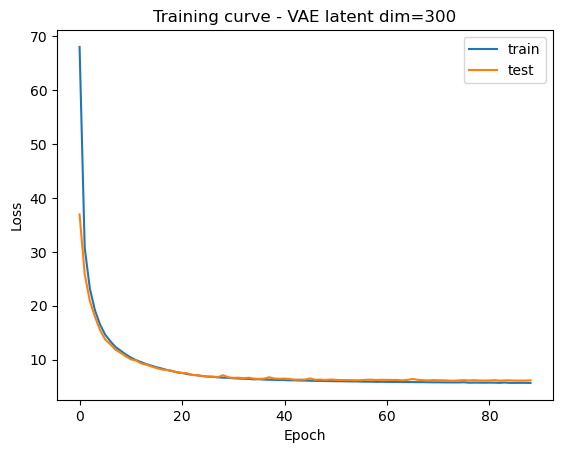

#### latent ndims = 325 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.76it/s]


Epoch [1/100] Train Loss: 78.6746
Epoch [1/100] Test Loss: 41.6041
✅ Best model saved at epoch 1 with test loss: 41.6041


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.38it/s]


Epoch [2/100] Train Loss: 34.8315
Epoch [2/100] Test Loss: 31.3121
✅ Best model saved at epoch 2 with test loss: 31.3121


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.60it/s]


Epoch [3/100] Train Loss: 26.3731
Epoch [3/100] Test Loss: 23.3807
✅ Best model saved at epoch 3 with test loss: 23.3807


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.59it/s]


Epoch [4/100] Train Loss: 21.1939
Epoch [4/100] Test Loss: 19.5478
✅ Best model saved at epoch 4 with test loss: 19.5478


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.03it/s]


Epoch [5/100] Train Loss: 18.0320
Epoch [5/100] Test Loss: 16.6334
✅ Best model saved at epoch 5 with test loss: 16.6334


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.99it/s]


Epoch [6/100] Train Loss: 15.7974
Epoch [6/100] Test Loss: 15.0247
✅ Best model saved at epoch 6 with test loss: 15.0247


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.82it/s]


Epoch [7/100] Train Loss: 14.3523
Epoch [7/100] Test Loss: 13.6990
✅ Best model saved at epoch 7 with test loss: 13.6990


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.77it/s]


Epoch [8/100] Train Loss: 13.2638
Epoch [8/100] Test Loss: 12.6561
✅ Best model saved at epoch 8 with test loss: 12.6561


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.11it/s]


Epoch [9/100] Train Loss: 12.4177
Epoch [9/100] Test Loss: 12.0680
✅ Best model saved at epoch 9 with test loss: 12.0680


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.47it/s]


Epoch [10/100] Train Loss: 11.6671
Epoch [10/100] Test Loss: 12.1831


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.10it/s]


Epoch [11/100] Train Loss: 11.0290
Epoch [11/100] Test Loss: 10.7544
✅ Best model saved at epoch 11 with test loss: 10.7544


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.95it/s]


Epoch [12/100] Train Loss: 10.5898
Epoch [12/100] Test Loss: 10.8096


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.23it/s]


Epoch [13/100] Train Loss: 10.0981
Epoch [13/100] Test Loss: 10.0239
✅ Best model saved at epoch 13 with test loss: 10.0239


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [14/100] Train Loss: 9.6651
Epoch [14/100] Test Loss: 9.5914
✅ Best model saved at epoch 14 with test loss: 9.5914


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.99it/s]


Epoch [15/100] Train Loss: 9.2641
Epoch [15/100] Test Loss: 9.0998
✅ Best model saved at epoch 15 with test loss: 9.0998


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.17it/s]


Epoch [16/100] Train Loss: 8.9745
Epoch [16/100] Test Loss: 9.0238
✅ Best model saved at epoch 16 with test loss: 9.0238


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.27it/s]


Epoch [17/100] Train Loss: 8.6036
Epoch [17/100] Test Loss: 8.4784
✅ Best model saved at epoch 17 with test loss: 8.4784


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.07it/s]


Epoch [18/100] Train Loss: 8.3290
Epoch [18/100] Test Loss: 8.4021
✅ Best model saved at epoch 18 with test loss: 8.4021


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.37it/s]


Epoch [19/100] Train Loss: 8.0391
Epoch [19/100] Test Loss: 7.8565
✅ Best model saved at epoch 19 with test loss: 7.8565


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.83it/s]


Epoch [20/100] Train Loss: 7.8036
Epoch [20/100] Test Loss: 8.1758


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.31it/s]


Epoch [21/100] Train Loss: 7.5568
Epoch [21/100] Test Loss: 7.8447
✅ Best model saved at epoch 21 with test loss: 7.8447


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.13it/s]


Epoch [22/100] Train Loss: 7.3890
Epoch [22/100] Test Loss: 7.4022
✅ Best model saved at epoch 22 with test loss: 7.4022


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.03it/s]


Epoch [23/100] Train Loss: 7.1674
Epoch [23/100] Test Loss: 7.1269
✅ Best model saved at epoch 23 with test loss: 7.1269


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.61it/s]


Epoch [24/100] Train Loss: 7.0019
Epoch [24/100] Test Loss: 7.0320
✅ Best model saved at epoch 24 with test loss: 7.0320


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.95it/s]


Epoch [25/100] Train Loss: 6.9015
Epoch [25/100] Test Loss: 7.0705


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.88it/s]


Epoch [26/100] Train Loss: 6.7608
Epoch [26/100] Test Loss: 6.6764
✅ Best model saved at epoch 26 with test loss: 6.6764


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.71it/s]


Epoch [27/100] Train Loss: 6.5888
Epoch [27/100] Test Loss: 6.7120


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.01it/s]


Epoch [28/100] Train Loss: 6.5714
Epoch [28/100] Test Loss: 6.4953
✅ Best model saved at epoch 28 with test loss: 6.4953


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.95it/s]


Epoch [29/100] Train Loss: 6.4040
Epoch [29/100] Test Loss: 6.4039
✅ Best model saved at epoch 29 with test loss: 6.4039


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.70it/s]


Epoch [30/100] Train Loss: 6.3505
Epoch [30/100] Test Loss: 6.3807
✅ Best model saved at epoch 30 with test loss: 6.3807


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.08it/s]


Epoch [31/100] Train Loss: 6.3116
Epoch [31/100] Test Loss: 6.2627
✅ Best model saved at epoch 31 with test loss: 6.2627


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.24it/s]


Epoch [32/100] Train Loss: 6.1838
Epoch [32/100] Test Loss: 6.6274


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.47it/s]


Epoch [33/100] Train Loss: 6.1644
Epoch [33/100] Test Loss: 6.2200
✅ Best model saved at epoch 33 with test loss: 6.2200


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.32it/s]


Epoch [34/100] Train Loss: 6.1421
Epoch [34/100] Test Loss: 6.1489
✅ Best model saved at epoch 34 with test loss: 6.1489


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.27it/s]


Epoch [35/100] Train Loss: 6.0131
Epoch [35/100] Test Loss: 6.1427
✅ Best model saved at epoch 35 with test loss: 6.1427


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.89it/s]


Epoch [36/100] Train Loss: 6.0197
Epoch [36/100] Test Loss: 6.2619


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.82it/s]


Epoch [37/100] Train Loss: 5.9395
Epoch [37/100] Test Loss: 6.1585


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.82it/s]


Epoch [38/100] Train Loss: 5.9311
Epoch [38/100] Test Loss: 6.0828
✅ Best model saved at epoch 38 with test loss: 6.0828


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.44it/s]


Epoch [39/100] Train Loss: 5.8879
Epoch [39/100] Test Loss: 6.0111
✅ Best model saved at epoch 39 with test loss: 6.0111


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.31it/s]


Epoch [40/100] Train Loss: 5.8454
Epoch [40/100] Test Loss: 5.9654
✅ Best model saved at epoch 40 with test loss: 5.9654


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.65it/s]


Epoch [41/100] Train Loss: 6.0156
Epoch [41/100] Test Loss: 5.9236
✅ Best model saved at epoch 41 with test loss: 5.9236


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.28it/s]


Epoch [42/100] Train Loss: 5.7145
Epoch [42/100] Test Loss: 5.9013
✅ Best model saved at epoch 42 with test loss: 5.9013


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.16it/s]


Epoch [43/100] Train Loss: 5.7680
Epoch [43/100] Test Loss: 6.1740


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.21it/s]


Epoch [44/100] Train Loss: 5.7573
Epoch [44/100] Test Loss: 5.9661


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.05it/s]


Epoch [45/100] Train Loss: 5.6940
Epoch [45/100] Test Loss: 6.0309


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.98it/s]


Epoch [46/100] Train Loss: 5.7374
Epoch [46/100] Test Loss: 5.8616
✅ Best model saved at epoch 46 with test loss: 5.8616


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.59it/s]


Epoch [47/100] Train Loss: 5.7045
Epoch [47/100] Test Loss: 5.9479


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.26it/s]


Epoch [48/100] Train Loss: 5.6426
Epoch [48/100] Test Loss: 5.8480
✅ Best model saved at epoch 48 with test loss: 5.8480


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.30it/s]


Epoch [49/100] Train Loss: 5.6329
Epoch [49/100] Test Loss: 5.8052
✅ Best model saved at epoch 49 with test loss: 5.8052


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.00it/s]


Epoch [50/100] Train Loss: 5.6416
Epoch [50/100] Test Loss: 5.9447


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [51/100] Train Loss: 5.6012
Epoch [51/100] Test Loss: 5.8773


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.62it/s]


Epoch [52/100] Train Loss: 5.5862
Epoch [52/100] Test Loss: 5.8230


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.29it/s]


Epoch [53/100] Train Loss: 5.6911
Epoch [53/100] Test Loss: 5.7557
✅ Best model saved at epoch 53 with test loss: 5.7557


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.39it/s]


Epoch [54/100] Train Loss: 5.5778
Epoch [54/100] Test Loss: 5.7934


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.41it/s]


Epoch [55/100] Train Loss: 5.5320
Epoch [55/100] Test Loss: 5.8371


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.30it/s]


Epoch [56/100] Train Loss: 5.5450
Epoch [56/100] Test Loss: 5.7695


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.58it/s]


Epoch [57/100] Train Loss: 5.5572
Epoch [57/100] Test Loss: 6.1085


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.32it/s]


Epoch [58/100] Train Loss: 5.5020
Epoch [58/100] Test Loss: 5.8153


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.32it/s]


Epoch [59/100] Train Loss: 5.4746
Epoch [59/100] Test Loss: 5.7766


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.21it/s]


Epoch [60/100] Train Loss: 5.4876
Epoch [60/100] Test Loss: 5.7279
✅ Best model saved at epoch 60 with test loss: 5.7279


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.33it/s]


Epoch [61/100] Train Loss: 5.4779
Epoch [61/100] Test Loss: 5.7686


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.69it/s]


Epoch [62/100] Train Loss: 5.4570
Epoch [62/100] Test Loss: 5.7623


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.74it/s]


Epoch [63/100] Train Loss: 5.4606
Epoch [63/100] Test Loss: 5.9074


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.98it/s]


Epoch [64/100] Train Loss: 5.4339
Epoch [64/100] Test Loss: 5.7881


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.64it/s]


Epoch [65/100] Train Loss: 5.4457
Epoch [65/100] Test Loss: 5.7539


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.29it/s]


Epoch [66/100] Train Loss: 5.4084
Epoch [66/100] Test Loss: 5.7366


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.96it/s]


Epoch [67/100] Train Loss: 5.4067
Epoch [67/100] Test Loss: 5.6838
✅ Best model saved at epoch 67 with test loss: 5.6838


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.70it/s]


Epoch [68/100] Train Loss: 5.3968
Epoch [68/100] Test Loss: 5.7203


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.56it/s]


Epoch [69/100] Train Loss: 5.5955
Epoch [69/100] Test Loss: 5.6701
✅ Best model saved at epoch 69 with test loss: 5.6701


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.54it/s]


Epoch [70/100] Train Loss: 5.3591
Epoch [70/100] Test Loss: 5.8922


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.52it/s]


Epoch [71/100] Train Loss: 5.4124
Epoch [71/100] Test Loss: 5.6508
✅ Best model saved at epoch 71 with test loss: 5.6508


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.19it/s]


Epoch [72/100] Train Loss: 5.3601
Epoch [72/100] Test Loss: 5.8081


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.85it/s]


Epoch [73/100] Train Loss: 5.3758
Epoch [73/100] Test Loss: 5.8208


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [74/100] Train Loss: 5.3301
Epoch [74/100] Test Loss: 5.6706


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.93it/s]


Epoch [75/100] Train Loss: 5.3549
Epoch [75/100] Test Loss: 5.6649


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.85it/s]


Epoch [76/100] Train Loss: 5.3369
Epoch [76/100] Test Loss: 5.6606


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.96it/s]


Epoch [77/100] Train Loss: 5.3280
Epoch [77/100] Test Loss: 5.7048


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.59it/s]


Epoch [78/100] Train Loss: 5.3584
Epoch [78/100] Test Loss: 5.6284
✅ Best model saved at epoch 78 with test loss: 5.6284


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.14it/s]


Epoch [79/100] Train Loss: 5.2941
Epoch [79/100] Test Loss: 5.7468


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.09it/s]


Epoch [80/100] Train Loss: 5.3035
Epoch [80/100] Test Loss: 5.6332


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.97it/s]


Epoch [81/100] Train Loss: 5.3151
Epoch [81/100] Test Loss: 5.6140
✅ Best model saved at epoch 81 with test loss: 5.6140


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [82/100] Train Loss: 5.2974
Epoch [82/100] Test Loss: 5.6354


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.62it/s]


Epoch [83/100] Train Loss: 5.2717
Epoch [83/100] Test Loss: 5.6944


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.27it/s]


Epoch [84/100] Train Loss: 5.2846
Epoch [84/100] Test Loss: 5.6494


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.44it/s]


Epoch [85/100] Train Loss: 5.2831
Epoch [85/100] Test Loss: 5.7433


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.14it/s]


Epoch [86/100] Train Loss: 5.2671
Epoch [86/100] Test Loss: 5.6639


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.56it/s]


Epoch [87/100] Train Loss: 5.2668
Epoch [87/100] Test Loss: 5.7455


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.24it/s]


Epoch [88/100] Train Loss: 5.2810
Epoch [88/100] Test Loss: 5.7592


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.17it/s]


Epoch [89/100] Train Loss: 5.2742
Epoch [89/100] Test Loss: 5.6492


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.78it/s]


Epoch [90/100] Train Loss: 5.2251
Epoch [90/100] Test Loss: 5.5865
✅ Best model saved at epoch 90 with test loss: 5.5865


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.20it/s]


Epoch [91/100] Train Loss: 5.2688
Epoch [91/100] Test Loss: 5.6098


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.75it/s]


Epoch [92/100] Train Loss: 5.2128
Epoch [92/100] Test Loss: 5.6108


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.20it/s]


Epoch [93/100] Train Loss: 5.2495
Epoch [93/100] Test Loss: 5.6478


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.26it/s]


Epoch [94/100] Train Loss: 5.2183
Epoch [94/100] Test Loss: 5.6325


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.48it/s]


Epoch [95/100] Train Loss: 5.2384
Epoch [95/100] Test Loss: 5.6630


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.94it/s]


Epoch [96/100] Train Loss: 5.2167
Epoch [96/100] Test Loss: 5.6118


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [97/100] Train Loss: 5.2050
Epoch [97/100] Test Loss: 5.6189


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.45it/s]


Epoch [98/100] Train Loss: 5.2222
Epoch [98/100] Test Loss: 5.6518


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.52it/s]


Epoch [99/100] Train Loss: 5.2207
Epoch [99/100] Test Loss: 5.6925


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.66it/s]


Epoch [100/100] Train Loss: 5.2138
Epoch [100/100] Test Loss: 5.5798
✅ Best model saved at epoch 100 with test loss: 5.5798


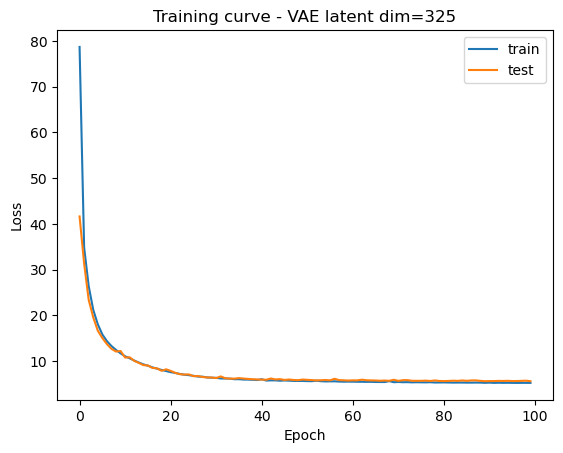

#### latent ndims = 350 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.54it/s]


Epoch [1/100] Train Loss: 66.2394
Epoch [1/100] Test Loss: 37.2837
✅ Best model saved at epoch 1 with test loss: 37.2837


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.65it/s]


Epoch [2/100] Train Loss: 31.3634
Epoch [2/100] Test Loss: 26.7659
✅ Best model saved at epoch 2 with test loss: 26.7659


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.12it/s]


Epoch [3/100] Train Loss: 24.4404
Epoch [3/100] Test Loss: 22.0533
✅ Best model saved at epoch 3 with test loss: 22.0533


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.91it/s]


Epoch [4/100] Train Loss: 20.1687
Epoch [4/100] Test Loss: 18.2940
✅ Best model saved at epoch 4 with test loss: 18.2940


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.66it/s]


Epoch [5/100] Train Loss: 17.4024
Epoch [5/100] Test Loss: 16.4191
✅ Best model saved at epoch 5 with test loss: 16.4191


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.34it/s]


Epoch [6/100] Train Loss: 15.2573
Epoch [6/100] Test Loss: 14.2102
✅ Best model saved at epoch 6 with test loss: 14.2102


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.71it/s]


Epoch [7/100] Train Loss: 13.7582
Epoch [7/100] Test Loss: 14.6515


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.83it/s]


Epoch [8/100] Train Loss: 12.7807
Epoch [8/100] Test Loss: 12.1516
✅ Best model saved at epoch 8 with test loss: 12.1516


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.27it/s]


Epoch [9/100] Train Loss: 11.8049
Epoch [9/100] Test Loss: 11.6941
✅ Best model saved at epoch 9 with test loss: 11.6941


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.08it/s]


Epoch [10/100] Train Loss: 11.0749
Epoch [10/100] Test Loss: 10.8772
✅ Best model saved at epoch 10 with test loss: 10.8772


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.75it/s]


Epoch [11/100] Train Loss: 10.4847
Epoch [11/100] Test Loss: 10.0942
✅ Best model saved at epoch 11 with test loss: 10.0942


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.58it/s]


Epoch [12/100] Train Loss: 9.8993
Epoch [12/100] Test Loss: 9.7082
✅ Best model saved at epoch 12 with test loss: 9.7082


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.99it/s]


Epoch [13/100] Train Loss: 9.4951
Epoch [13/100] Test Loss: 9.1898
✅ Best model saved at epoch 13 with test loss: 9.1898


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.17it/s]


Epoch [14/100] Train Loss: 9.0402
Epoch [14/100] Test Loss: 8.9009
✅ Best model saved at epoch 14 with test loss: 8.9009


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.39it/s]


Epoch [15/100] Train Loss: 8.6822
Epoch [15/100] Test Loss: 8.5241
✅ Best model saved at epoch 15 with test loss: 8.5241


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.86it/s]


Epoch [16/100] Train Loss: 8.3330
Epoch [16/100] Test Loss: 8.1003
✅ Best model saved at epoch 16 with test loss: 8.1003


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.50it/s]


Epoch [17/100] Train Loss: 8.0612
Epoch [17/100] Test Loss: 7.9224
✅ Best model saved at epoch 17 with test loss: 7.9224


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.25it/s]


Epoch [18/100] Train Loss: 7.7639
Epoch [18/100] Test Loss: 7.8479
✅ Best model saved at epoch 18 with test loss: 7.8479


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [19/100] Train Loss: 7.5509
Epoch [19/100] Test Loss: 7.5016
✅ Best model saved at epoch 19 with test loss: 7.5016


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.71it/s]


Epoch [20/100] Train Loss: 7.2990
Epoch [20/100] Test Loss: 7.3178
✅ Best model saved at epoch 20 with test loss: 7.3178


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.52it/s]


Epoch [21/100] Train Loss: 7.2040
Epoch [21/100] Test Loss: 7.6496


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.19it/s]


Epoch [22/100] Train Loss: 6.9254
Epoch [22/100] Test Loss: 6.9287
✅ Best model saved at epoch 22 with test loss: 6.9287


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.18it/s]


Epoch [23/100] Train Loss: 6.7919
Epoch [23/100] Test Loss: 6.7903
✅ Best model saved at epoch 23 with test loss: 6.7903


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.74it/s]


Epoch [24/100] Train Loss: 6.6476
Epoch [24/100] Test Loss: 6.5622
✅ Best model saved at epoch 24 with test loss: 6.5622


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.14it/s]


Epoch [25/100] Train Loss: 6.4954
Epoch [25/100] Test Loss: 6.5421
✅ Best model saved at epoch 25 with test loss: 6.5421


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.77it/s]


Epoch [26/100] Train Loss: 6.3699
Epoch [26/100] Test Loss: 6.3730
✅ Best model saved at epoch 26 with test loss: 6.3730


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.88it/s]


Epoch [27/100] Train Loss: 6.2341
Epoch [27/100] Test Loss: 6.2547
✅ Best model saved at epoch 27 with test loss: 6.2547


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.40it/s]


Epoch [28/100] Train Loss: 6.2756
Epoch [28/100] Test Loss: 6.1276
✅ Best model saved at epoch 28 with test loss: 6.1276


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.10it/s]


Epoch [29/100] Train Loss: 6.0363
Epoch [29/100] Test Loss: 6.1167
✅ Best model saved at epoch 29 with test loss: 6.1167


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [30/100] Train Loss: 5.9953
Epoch [30/100] Test Loss: 6.1556


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.79it/s]


Epoch [31/100] Train Loss: 5.9130
Epoch [31/100] Test Loss: 6.0573
✅ Best model saved at epoch 31 with test loss: 6.0573


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.69it/s]


Epoch [32/100] Train Loss: 5.8967
Epoch [32/100] Test Loss: 5.9110
✅ Best model saved at epoch 32 with test loss: 5.9110


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.57it/s]


Epoch [33/100] Train Loss: 5.8151
Epoch [33/100] Test Loss: 5.9112


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.77it/s]


Epoch [34/100] Train Loss: 5.7294
Epoch [34/100] Test Loss: 5.7598
✅ Best model saved at epoch 34 with test loss: 5.7598


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.00it/s]


Epoch [35/100] Train Loss: 5.6938
Epoch [35/100] Test Loss: 5.7871


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.36it/s]


Epoch [36/100] Train Loss: 5.6671
Epoch [36/100] Test Loss: 6.3981


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.10it/s]


Epoch [37/100] Train Loss: 5.7777
Epoch [37/100] Test Loss: 5.7323
✅ Best model saved at epoch 37 with test loss: 5.7323


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.69it/s]


Epoch [38/100] Train Loss: 5.4817
Epoch [38/100] Test Loss: 5.6207
✅ Best model saved at epoch 38 with test loss: 5.6207


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.68it/s]


Epoch [39/100] Train Loss: 5.5363
Epoch [39/100] Test Loss: 5.7434


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.06it/s]


Epoch [40/100] Train Loss: 5.5010
Epoch [40/100] Test Loss: 5.6889


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [41/100] Train Loss: 5.4307
Epoch [41/100] Test Loss: 5.5543
✅ Best model saved at epoch 41 with test loss: 5.5543


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [42/100] Train Loss: 5.4635
Epoch [42/100] Test Loss: 5.8068


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.97it/s]


Epoch [43/100] Train Loss: 5.3796
Epoch [43/100] Test Loss: 5.7462


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.80it/s]


Epoch [44/100] Train Loss: 5.3823
Epoch [44/100] Test Loss: 5.5629


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.10it/s]


Epoch [45/100] Train Loss: 5.3518
Epoch [45/100] Test Loss: 5.4636
✅ Best model saved at epoch 45 with test loss: 5.4636


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.13it/s]


Epoch [46/100] Train Loss: 5.4099
Epoch [46/100] Test Loss: 5.4901


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.92it/s]


Epoch [47/100] Train Loss: 5.2713
Epoch [47/100] Test Loss: 5.5301


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.68it/s]


Epoch [48/100] Train Loss: 5.2822
Epoch [48/100] Test Loss: 5.4994


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.68it/s]


Epoch [49/100] Train Loss: 5.2532
Epoch [49/100] Test Loss: 5.6974


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.04it/s]


Epoch [50/100] Train Loss: 5.2696
Epoch [50/100] Test Loss: 5.3737
✅ Best model saved at epoch 50 with test loss: 5.3737


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.57it/s]


Epoch [51/100] Train Loss: 5.2332
Epoch [51/100] Test Loss: 5.4882


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.82it/s]


Epoch [52/100] Train Loss: 5.2672
Epoch [52/100] Test Loss: 5.4767


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.41it/s]


Epoch [53/100] Train Loss: 5.1764
Epoch [53/100] Test Loss: 5.3656
✅ Best model saved at epoch 53 with test loss: 5.3656


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.22it/s]


Epoch [54/100] Train Loss: 5.1659
Epoch [54/100] Test Loss: 5.6204


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.74it/s]


Epoch [55/100] Train Loss: 5.1765
Epoch [55/100] Test Loss: 5.3232
✅ Best model saved at epoch 55 with test loss: 5.3232


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.64it/s]


Epoch [56/100] Train Loss: 5.1286
Epoch [56/100] Test Loss: 5.3256


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [57/100] Train Loss: 5.1349
Epoch [57/100] Test Loss: 5.4608


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.03it/s]


Epoch [58/100] Train Loss: 5.1324
Epoch [58/100] Test Loss: 5.3333


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.41it/s]


Epoch [59/100] Train Loss: 5.1537
Epoch [59/100] Test Loss: 5.3118
✅ Best model saved at epoch 59 with test loss: 5.3118


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.88it/s]


Epoch [60/100] Train Loss: 5.0569
Epoch [60/100] Test Loss: 5.3448


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.18it/s]


Epoch [61/100] Train Loss: 5.0624
Epoch [61/100] Test Loss: 5.3071
✅ Best model saved at epoch 61 with test loss: 5.3071


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.36it/s]


Epoch [62/100] Train Loss: 5.0601
Epoch [62/100] Test Loss: 5.3327


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.56it/s]


Epoch [63/100] Train Loss: 5.0483
Epoch [63/100] Test Loss: 5.3086


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.97it/s]


Epoch [64/100] Train Loss: 5.0497
Epoch [64/100] Test Loss: 5.4059


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.86it/s]


Epoch [65/100] Train Loss: 5.0283
Epoch [65/100] Test Loss: 5.2527
✅ Best model saved at epoch 65 with test loss: 5.2527


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.63it/s]


Epoch [66/100] Train Loss: 5.0150
Epoch [66/100] Test Loss: 5.2777


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.76it/s]


Epoch [67/100] Train Loss: 5.0193
Epoch [67/100] Test Loss: 5.3287


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.29it/s]


Epoch [68/100] Train Loss: 4.9843
Epoch [68/100] Test Loss: 5.2510
✅ Best model saved at epoch 68 with test loss: 5.2510


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.70it/s]


Epoch [69/100] Train Loss: 4.9800
Epoch [69/100] Test Loss: 5.3970


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [70/100] Train Loss: 4.9730
Epoch [70/100] Test Loss: 5.4110


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.27it/s]


Epoch [71/100] Train Loss: 4.9695
Epoch [71/100] Test Loss: 5.3206


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.36it/s]


Epoch [72/100] Train Loss: 4.9440
Epoch [72/100] Test Loss: 5.3559


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.35it/s]


Epoch [73/100] Train Loss: 4.9515
Epoch [73/100] Test Loss: 5.2531


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.99it/s]


Epoch [74/100] Train Loss: 4.9507
Epoch [74/100] Test Loss: 5.2715


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.52it/s]


Epoch [75/100] Train Loss: 4.9412
Epoch [75/100] Test Loss: 5.2279
✅ Best model saved at epoch 75 with test loss: 5.2279


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.57it/s]


Epoch [76/100] Train Loss: 4.9212
Epoch [76/100] Test Loss: 5.7719


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.38it/s]


Epoch [77/100] Train Loss: 4.9207
Epoch [77/100] Test Loss: 5.2057
✅ Best model saved at epoch 77 with test loss: 5.2057


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.43it/s]


Epoch [78/100] Train Loss: 4.9091
Epoch [78/100] Test Loss: 5.2309


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.88it/s]


Epoch [79/100] Train Loss: 4.9126
Epoch [79/100] Test Loss: 5.3129


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.71it/s]


Epoch [80/100] Train Loss: 4.9007
Epoch [80/100] Test Loss: 5.2779


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.06it/s]


Epoch [81/100] Train Loss: 4.8959
Epoch [81/100] Test Loss: 5.2813


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.05it/s]


Epoch [82/100] Train Loss: 4.8831
Epoch [82/100] Test Loss: 5.2476


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.37it/s]


Epoch [83/100] Train Loss: 4.8732
Epoch [83/100] Test Loss: 5.2851


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.44it/s]


Epoch [84/100] Train Loss: 4.8695
Epoch [84/100] Test Loss: 5.1781
✅ Best model saved at epoch 84 with test loss: 5.1781


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.55it/s]


Epoch [85/100] Train Loss: 4.8658
Epoch [85/100] Test Loss: 5.2916


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.08it/s]


Epoch [86/100] Train Loss: 4.8684
Epoch [86/100] Test Loss: 5.1563
✅ Best model saved at epoch 86 with test loss: 5.1563


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.16it/s]


Epoch [87/100] Train Loss: 4.8480
Epoch [87/100] Test Loss: 5.2278


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.88it/s]


Epoch [88/100] Train Loss: 4.8493
Epoch [88/100] Test Loss: 5.1992


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.39it/s]


Epoch [89/100] Train Loss: 4.8525
Epoch [89/100] Test Loss: 5.1629


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.49it/s]


Epoch [90/100] Train Loss: 4.8437
Epoch [90/100] Test Loss: 5.1979


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.57it/s]


Epoch [91/100] Train Loss: 4.8162
Epoch [91/100] Test Loss: 5.1732


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.92it/s]


Epoch [92/100] Train Loss: 4.8389
Epoch [92/100] Test Loss: 5.1532
✅ Best model saved at epoch 92 with test loss: 5.1532


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.84it/s]


Epoch [93/100] Train Loss: 4.8188
Epoch [93/100] Test Loss: 5.3207


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.44it/s]


Epoch [94/100] Train Loss: 4.8324
Epoch [94/100] Test Loss: 5.1659


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.92it/s]


Epoch [95/100] Train Loss: 4.8212
Epoch [95/100] Test Loss: 5.1817


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.15it/s]


Epoch [96/100] Train Loss: 4.8344
Epoch [96/100] Test Loss: 5.1520
✅ Best model saved at epoch 96 with test loss: 5.1520


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.02it/s]


Epoch [97/100] Train Loss: 4.7893
Epoch [97/100] Test Loss: 5.2112


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.56it/s]


Epoch [98/100] Train Loss: 4.8076
Epoch [98/100] Test Loss: 5.3153


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.73it/s]


Epoch [99/100] Train Loss: 4.7984
Epoch [99/100] Test Loss: 5.2528


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.16it/s]


Epoch [100/100] Train Loss: 4.7820
Epoch [100/100] Test Loss: 5.2899


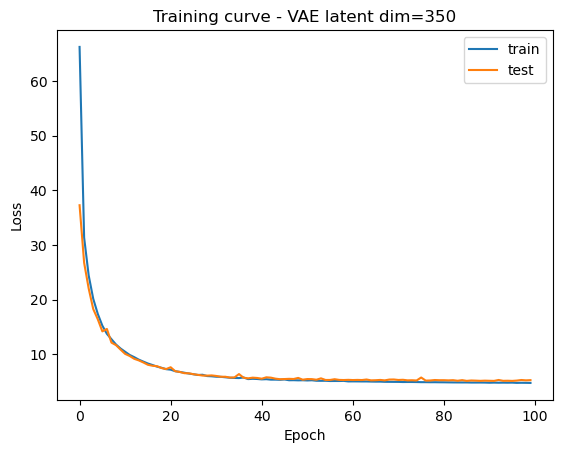

#### latent ndims = 375 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.63it/s]


Epoch [1/100] Train Loss: 69.9820
Epoch [1/100] Test Loss: 38.5531
✅ Best model saved at epoch 1 with test loss: 38.5531


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.85it/s]


Epoch [2/100] Train Loss: 32.8799
Epoch [2/100] Test Loss: 28.0293
✅ Best model saved at epoch 2 with test loss: 28.0293


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.55it/s]


Epoch [3/100] Train Loss: 24.9444
Epoch [3/100] Test Loss: 22.6423
✅ Best model saved at epoch 3 with test loss: 22.6423


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.04it/s]


Epoch [4/100] Train Loss: 20.2403
Epoch [4/100] Test Loss: 20.0099
✅ Best model saved at epoch 4 with test loss: 20.0099


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.27it/s]


Epoch [5/100] Train Loss: 17.3367
Epoch [5/100] Test Loss: 15.8606
✅ Best model saved at epoch 5 with test loss: 15.8606


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.28it/s]


Epoch [6/100] Train Loss: 15.2871
Epoch [6/100] Test Loss: 14.3744
✅ Best model saved at epoch 6 with test loss: 14.3744


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.22it/s]


Epoch [7/100] Train Loss: 13.7688
Epoch [7/100] Test Loss: 13.0826
✅ Best model saved at epoch 7 with test loss: 13.0826


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.14it/s]


Epoch [8/100] Train Loss: 12.6622
Epoch [8/100] Test Loss: 12.8029
✅ Best model saved at epoch 8 with test loss: 12.8029


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.45it/s]


Epoch [9/100] Train Loss: 11.6887
Epoch [9/100] Test Loss: 11.2453
✅ Best model saved at epoch 9 with test loss: 11.2453


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.74it/s]


Epoch [10/100] Train Loss: 10.8732
Epoch [10/100] Test Loss: 10.5712
✅ Best model saved at epoch 10 with test loss: 10.5712


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.45it/s]


Epoch [11/100] Train Loss: 10.2481
Epoch [11/100] Test Loss: 10.8399


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.46it/s]


Epoch [12/100] Train Loss: 9.8312
Epoch [12/100] Test Loss: 9.6488
✅ Best model saved at epoch 12 with test loss: 9.6488


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.19it/s]


Epoch [13/100] Train Loss: 9.2804
Epoch [13/100] Test Loss: 9.1492
✅ Best model saved at epoch 13 with test loss: 9.1492


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.48it/s]


Epoch [14/100] Train Loss: 8.8311
Epoch [14/100] Test Loss: 8.8540
✅ Best model saved at epoch 14 with test loss: 8.8540


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.59it/s]


Epoch [15/100] Train Loss: 8.5303
Epoch [15/100] Test Loss: 8.2705
✅ Best model saved at epoch 15 with test loss: 8.2705


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.65it/s]


Epoch [16/100] Train Loss: 8.1005
Epoch [16/100] Test Loss: 8.1396
✅ Best model saved at epoch 16 with test loss: 8.1396


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.84it/s]


Epoch [17/100] Train Loss: 7.8242
Epoch [17/100] Test Loss: 7.5620
✅ Best model saved at epoch 17 with test loss: 7.5620


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.47it/s]


Epoch [18/100] Train Loss: 7.5260
Epoch [18/100] Test Loss: 7.5211
✅ Best model saved at epoch 18 with test loss: 7.5211


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.67it/s]


Epoch [19/100] Train Loss: 7.2980
Epoch [19/100] Test Loss: 7.3158
✅ Best model saved at epoch 19 with test loss: 7.3158


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.39it/s]


Epoch [20/100] Train Loss: 7.0687
Epoch [20/100] Test Loss: 7.0194
✅ Best model saved at epoch 20 with test loss: 7.0194


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.01it/s]


Epoch [21/100] Train Loss: 6.8953
Epoch [21/100] Test Loss: 6.8189
✅ Best model saved at epoch 21 with test loss: 6.8189


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.99it/s]


Epoch [22/100] Train Loss: 6.7544
Epoch [22/100] Test Loss: 6.6129
✅ Best model saved at epoch 22 with test loss: 6.6129


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [23/100] Train Loss: 6.6020
Epoch [23/100] Test Loss: 7.4291


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.11it/s]


Epoch [24/100] Train Loss: 6.3982
Epoch [24/100] Test Loss: 6.4336
✅ Best model saved at epoch 24 with test loss: 6.4336


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.81it/s]


Epoch [25/100] Train Loss: 6.3145
Epoch [25/100] Test Loss: 6.1975
✅ Best model saved at epoch 25 with test loss: 6.1975


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.01it/s]


Epoch [26/100] Train Loss: 6.1517
Epoch [26/100] Test Loss: 6.2612


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.98it/s]


Epoch [27/100] Train Loss: 6.0656
Epoch [27/100] Test Loss: 6.1899
✅ Best model saved at epoch 27 with test loss: 6.1899


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.48it/s]


Epoch [28/100] Train Loss: 5.9199
Epoch [28/100] Test Loss: 5.9040
✅ Best model saved at epoch 28 with test loss: 5.9040


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.26it/s]


Epoch [29/100] Train Loss: 5.8923
Epoch [29/100] Test Loss: 5.8284
✅ Best model saved at epoch 29 with test loss: 5.8284


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.49it/s]


Epoch [30/100] Train Loss: 5.7589
Epoch [30/100] Test Loss: 5.7588
✅ Best model saved at epoch 30 with test loss: 5.7588


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.62it/s]


Epoch [31/100] Train Loss: 5.6491
Epoch [31/100] Test Loss: 5.7294
✅ Best model saved at epoch 31 with test loss: 5.7294


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.73it/s]


Epoch [32/100] Train Loss: 5.5924
Epoch [32/100] Test Loss: 5.7924


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.29it/s]


Epoch [33/100] Train Loss: 5.5096
Epoch [33/100] Test Loss: 5.8360


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.50it/s]


Epoch [34/100] Train Loss: 5.4754
Epoch [34/100] Test Loss: 5.4592
✅ Best model saved at epoch 34 with test loss: 5.4592


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [35/100] Train Loss: 5.3517
Epoch [35/100] Test Loss: 5.3694
✅ Best model saved at epoch 35 with test loss: 5.3694


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.29it/s]


Epoch [36/100] Train Loss: 5.4512
Epoch [36/100] Test Loss: 5.5482


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.15it/s]


Epoch [37/100] Train Loss: 5.2489
Epoch [37/100] Test Loss: 5.3795


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.12it/s]


Epoch [38/100] Train Loss: 5.2176
Epoch [38/100] Test Loss: 5.4680


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.65it/s]


Epoch [39/100] Train Loss: 5.2925
Epoch [39/100] Test Loss: 5.4120


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.04it/s]


Epoch [40/100] Train Loss: 5.0834
Epoch [40/100] Test Loss: 5.2834
✅ Best model saved at epoch 40 with test loss: 5.2834


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.94it/s]


Epoch [41/100] Train Loss: 5.0857
Epoch [41/100] Test Loss: 5.1712
✅ Best model saved at epoch 41 with test loss: 5.1712


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.90it/s]


Epoch [42/100] Train Loss: 5.0630
Epoch [42/100] Test Loss: 5.2918


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.43it/s]


Epoch [43/100] Train Loss: 5.2199
Epoch [43/100] Test Loss: 5.1183
✅ Best model saved at epoch 43 with test loss: 5.1183


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.21it/s]


Epoch [44/100] Train Loss: 4.9801
Epoch [44/100] Test Loss: 5.1686


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.46it/s]


Epoch [45/100] Train Loss: 4.9935
Epoch [45/100] Test Loss: 5.1004
✅ Best model saved at epoch 45 with test loss: 5.1004


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.59it/s]


Epoch [46/100] Train Loss: 4.9923
Epoch [46/100] Test Loss: 5.1440


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.24it/s]


Epoch [47/100] Train Loss: 4.9410
Epoch [47/100] Test Loss: 5.1479


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.59it/s]


Epoch [48/100] Train Loss: 4.9298
Epoch [48/100] Test Loss: 5.0576
✅ Best model saved at epoch 48 with test loss: 5.0576


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.26it/s]


Epoch [49/100] Train Loss: 4.8874
Epoch [49/100] Test Loss: 5.1759


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.67it/s]


Epoch [50/100] Train Loss: 4.8723
Epoch [50/100] Test Loss: 5.0747


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.53it/s]


Epoch [51/100] Train Loss: 4.8849
Epoch [51/100] Test Loss: 5.0218
✅ Best model saved at epoch 51 with test loss: 5.0218


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.55it/s]


Epoch [52/100] Train Loss: 4.8616
Epoch [52/100] Test Loss: 5.0893


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.63it/s]


Epoch [53/100] Train Loss: 4.8277
Epoch [53/100] Test Loss: 5.0198
✅ Best model saved at epoch 53 with test loss: 5.0198


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.05it/s]


Epoch [54/100] Train Loss: 4.8814
Epoch [54/100] Test Loss: 4.9480
✅ Best model saved at epoch 54 with test loss: 4.9480


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.98it/s]


Epoch [55/100] Train Loss: 4.7658
Epoch [55/100] Test Loss: 5.0681


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.82it/s]


Epoch [56/100] Train Loss: 4.9135
Epoch [56/100] Test Loss: 7.0239


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.44it/s]


Epoch [57/100] Train Loss: 4.7688
Epoch [57/100] Test Loss: 4.9807


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.32it/s]


Epoch [58/100] Train Loss: 4.7161
Epoch [58/100] Test Loss: 5.0721


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.82it/s]


Epoch [59/100] Train Loss: 4.7370
Epoch [59/100] Test Loss: 4.9790


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.32it/s]


Epoch [60/100] Train Loss: 4.7421
Epoch [60/100] Test Loss: 4.8868
✅ Best model saved at epoch 60 with test loss: 4.8868


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.89it/s]


Epoch [61/100] Train Loss: 4.7041
Epoch [61/100] Test Loss: 5.0631


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.04it/s]


Epoch [62/100] Train Loss: 4.6932
Epoch [62/100] Test Loss: 4.8591
✅ Best model saved at epoch 62 with test loss: 4.8591


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.19it/s]


Epoch [63/100] Train Loss: 4.7064
Epoch [63/100] Test Loss: 4.9224


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.41it/s]


Epoch [64/100] Train Loss: 4.6699
Epoch [64/100] Test Loss: 4.9545


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.02it/s]


Epoch [65/100] Train Loss: 4.6634
Epoch [65/100] Test Loss: 4.9464


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.79it/s]


Epoch [66/100] Train Loss: 4.6671
Epoch [66/100] Test Loss: 4.9694


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.47it/s]


Epoch [67/100] Train Loss: 4.6528
Epoch [67/100] Test Loss: 4.8555
✅ Best model saved at epoch 67 with test loss: 4.8555


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.48it/s]


Epoch [68/100] Train Loss: 4.6225
Epoch [68/100] Test Loss: 4.8399
✅ Best model saved at epoch 68 with test loss: 4.8399


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.14it/s]


Epoch [69/100] Train Loss: 4.6488
Epoch [69/100] Test Loss: 4.8803


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.03it/s]


Epoch [70/100] Train Loss: 4.6144
Epoch [70/100] Test Loss: 4.8590


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.50it/s]


Epoch [71/100] Train Loss: 4.6225
Epoch [71/100] Test Loss: 4.8324
✅ Best model saved at epoch 71 with test loss: 4.8324


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.30it/s]


Epoch [72/100] Train Loss: 4.6153
Epoch [72/100] Test Loss: 4.8169
✅ Best model saved at epoch 72 with test loss: 4.8169


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.81it/s]


Epoch [73/100] Train Loss: 4.6087
Epoch [73/100] Test Loss: 4.8141
✅ Best model saved at epoch 73 with test loss: 4.8141


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.69it/s]


Epoch [74/100] Train Loss: 4.5650
Epoch [74/100] Test Loss: 4.8480


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.59it/s]


Epoch [75/100] Train Loss: 4.6018
Epoch [75/100] Test Loss: 4.8645


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.56it/s]


Epoch [76/100] Train Loss: 4.6014
Epoch [76/100] Test Loss: 4.8064
✅ Best model saved at epoch 76 with test loss: 4.8064


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.83it/s]


Epoch [77/100] Train Loss: 4.5371
Epoch [77/100] Test Loss: 4.8153


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.15it/s]


Epoch [78/100] Train Loss: 4.5474
Epoch [78/100] Test Loss: 4.8598


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.68it/s]


Epoch [79/100] Train Loss: 4.5603
Epoch [79/100] Test Loss: 4.7973
✅ Best model saved at epoch 79 with test loss: 4.7973


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.41it/s]


Epoch [80/100] Train Loss: 4.5213
Epoch [80/100] Test Loss: 4.7949
✅ Best model saved at epoch 80 with test loss: 4.7949


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.54it/s]


Epoch [81/100] Train Loss: 4.5762
Epoch [81/100] Test Loss: 4.7641
✅ Best model saved at epoch 81 with test loss: 4.7641


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.89it/s]


Epoch [82/100] Train Loss: 4.4954
Epoch [82/100] Test Loss: 4.8437


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.60it/s]


Epoch [83/100] Train Loss: 4.5043
Epoch [83/100] Test Loss: 4.8212


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [84/100] Train Loss: 4.5203
Epoch [84/100] Test Loss: 4.8006


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.88it/s]


Epoch [85/100] Train Loss: 4.5098
Epoch [85/100] Test Loss: 4.8691


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.90it/s]


Epoch [86/100] Train Loss: 4.4847
Epoch [86/100] Test Loss: 4.8090


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.60it/s]


Epoch [87/100] Train Loss: 4.4875
Epoch [87/100] Test Loss: 4.8024


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.53it/s]


Epoch [88/100] Train Loss: 4.4978
Epoch [88/100] Test Loss: 4.8497


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.63it/s]


Epoch [89/100] Train Loss: 4.4584
Epoch [89/100] Test Loss: 4.7981


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.16it/s]


Epoch [90/100] Train Loss: 4.4776
Epoch [90/100] Test Loss: 4.8575


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.50it/s]


Epoch [91/100] Train Loss: 4.4554
Epoch [91/100] Test Loss: 5.1516


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.37it/s]


Epoch [92/100] Train Loss: 4.5018
Epoch [92/100] Test Loss: 4.7966


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.70it/s]


Epoch [93/100] Train Loss: 4.4481
Epoch [93/100] Test Loss: 4.7601
✅ Best model saved at epoch 93 with test loss: 4.7601


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.34it/s]


Epoch [94/100] Train Loss: 4.4390
Epoch [94/100] Test Loss: 4.8328


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.90it/s]


Epoch [95/100] Train Loss: 4.4271
Epoch [95/100] Test Loss: 4.7833


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.96it/s]


Epoch [96/100] Train Loss: 4.4486
Epoch [96/100] Test Loss: 4.7274
✅ Best model saved at epoch 96 with test loss: 4.7274


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.23it/s]


Epoch [97/100] Train Loss: 4.4214
Epoch [97/100] Test Loss: 4.7512


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.85it/s]


Epoch [98/100] Train Loss: 4.4136
Epoch [98/100] Test Loss: 4.7572


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.93it/s]


Epoch [99/100] Train Loss: 4.4160
Epoch [99/100] Test Loss: 4.7872


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.33it/s]


Epoch [100/100] Train Loss: 4.4183
Epoch [100/100] Test Loss: 4.7534


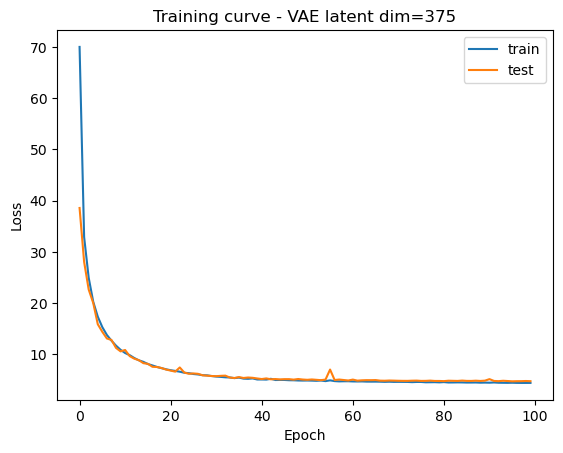

#### latent ndims = 400 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.62it/s]


Epoch [1/100] Train Loss: 68.0979
Epoch [1/100] Test Loss: 37.6357
✅ Best model saved at epoch 1 with test loss: 37.6357


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.24it/s]


Epoch [2/100] Train Loss: 31.1456
Epoch [2/100] Test Loss: 25.9886
✅ Best model saved at epoch 2 with test loss: 25.9886


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.68it/s]


Epoch [3/100] Train Loss: 23.0940
Epoch [3/100] Test Loss: 20.2520
✅ Best model saved at epoch 3 with test loss: 20.2520


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.60it/s]


Epoch [4/100] Train Loss: 18.8474
Epoch [4/100] Test Loss: 17.7888
✅ Best model saved at epoch 4 with test loss: 17.7888


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.40it/s]


Epoch [5/100] Train Loss: 16.1783
Epoch [5/100] Test Loss: 15.2200
✅ Best model saved at epoch 5 with test loss: 15.2200


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.16it/s]


Epoch [6/100] Train Loss: 14.3899
Epoch [6/100] Test Loss: 13.5845
✅ Best model saved at epoch 6 with test loss: 13.5845


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.32it/s]


Epoch [7/100] Train Loss: 13.1411
Epoch [7/100] Test Loss: 12.4171
✅ Best model saved at epoch 7 with test loss: 12.4171


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.41it/s]


Epoch [8/100] Train Loss: 12.1596
Epoch [8/100] Test Loss: 11.7709
✅ Best model saved at epoch 8 with test loss: 11.7709


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.17it/s]


Epoch [9/100] Train Loss: 11.3886
Epoch [9/100] Test Loss: 11.1298
✅ Best model saved at epoch 9 with test loss: 11.1298


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.87it/s]


Epoch [10/100] Train Loss: 10.7772
Epoch [10/100] Test Loss: 10.4048
✅ Best model saved at epoch 10 with test loss: 10.4048


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.01it/s]


Epoch [11/100] Train Loss: 10.1631
Epoch [11/100] Test Loss: 9.7758
✅ Best model saved at epoch 11 with test loss: 9.7758


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.72it/s]


Epoch [12/100] Train Loss: 9.6639
Epoch [12/100] Test Loss: 9.5323
✅ Best model saved at epoch 12 with test loss: 9.5323


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.66it/s]


Epoch [13/100] Train Loss: 9.2170
Epoch [13/100] Test Loss: 8.9544
✅ Best model saved at epoch 13 with test loss: 8.9544


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.14it/s]


Epoch [14/100] Train Loss: 8.7613
Epoch [14/100] Test Loss: 8.7726
✅ Best model saved at epoch 14 with test loss: 8.7726


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.41it/s]


Epoch [15/100] Train Loss: 8.3824
Epoch [15/100] Test Loss: 8.2044
✅ Best model saved at epoch 15 with test loss: 8.2044


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.39it/s]


Epoch [16/100] Train Loss: 8.0371
Epoch [16/100] Test Loss: 7.9527
✅ Best model saved at epoch 16 with test loss: 7.9527


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.90it/s]


Epoch [17/100] Train Loss: 7.6853
Epoch [17/100] Test Loss: 7.8636
✅ Best model saved at epoch 17 with test loss: 7.8636


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.99it/s]


Epoch [18/100] Train Loss: 7.4559
Epoch [18/100] Test Loss: 7.4634
✅ Best model saved at epoch 18 with test loss: 7.4634


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.62it/s]


Epoch [19/100] Train Loss: 7.1933
Epoch [19/100] Test Loss: 7.1046
✅ Best model saved at epoch 19 with test loss: 7.1046


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.87it/s]


Epoch [20/100] Train Loss: 6.9851
Epoch [20/100] Test Loss: 6.9677
✅ Best model saved at epoch 20 with test loss: 6.9677


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.19it/s]


Epoch [21/100] Train Loss: 6.7850
Epoch [21/100] Test Loss: 6.6047
✅ Best model saved at epoch 21 with test loss: 6.6047


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.53it/s]


Epoch [22/100] Train Loss: 6.5924
Epoch [22/100] Test Loss: 6.8700


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.08it/s]


Epoch [23/100] Train Loss: 6.4011
Epoch [23/100] Test Loss: 6.8741


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.75it/s]


Epoch [24/100] Train Loss: 6.2926
Epoch [24/100] Test Loss: 6.1926
✅ Best model saved at epoch 24 with test loss: 6.1926


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.09it/s]


Epoch [25/100] Train Loss: 6.1560
Epoch [25/100] Test Loss: 6.2879


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.73it/s]


Epoch [26/100] Train Loss: 5.9856
Epoch [26/100] Test Loss: 5.9791
✅ Best model saved at epoch 26 with test loss: 5.9791


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.97it/s]


Epoch [27/100] Train Loss: 5.9032
Epoch [27/100] Test Loss: 5.9402
✅ Best model saved at epoch 27 with test loss: 5.9402


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [28/100] Train Loss: 5.7837
Epoch [28/100] Test Loss: 5.8195
✅ Best model saved at epoch 28 with test loss: 5.8195


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.86it/s]


Epoch [29/100] Train Loss: 5.6610
Epoch [29/100] Test Loss: 5.7301
✅ Best model saved at epoch 29 with test loss: 5.7301


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.35it/s]


Epoch [30/100] Train Loss: 5.5883
Epoch [30/100] Test Loss: 5.5766
✅ Best model saved at epoch 30 with test loss: 5.5766


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.54it/s]


Epoch [31/100] Train Loss: 5.4748
Epoch [31/100] Test Loss: 5.4979
✅ Best model saved at epoch 31 with test loss: 5.4979


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [32/100] Train Loss: 5.3729
Epoch [32/100] Test Loss: 5.3887
✅ Best model saved at epoch 32 with test loss: 5.3887


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.90it/s]


Epoch [33/100] Train Loss: 5.3177
Epoch [33/100] Test Loss: 5.2775
✅ Best model saved at epoch 33 with test loss: 5.2775


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.83it/s]


Epoch [34/100] Train Loss: 5.1877
Epoch [34/100] Test Loss: 5.2337
✅ Best model saved at epoch 34 with test loss: 5.2337


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.62it/s]


Epoch [35/100] Train Loss: 5.1473
Epoch [35/100] Test Loss: 5.1607
✅ Best model saved at epoch 35 with test loss: 5.1607


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.18it/s]


Epoch [36/100] Train Loss: 5.0964
Epoch [36/100] Test Loss: 5.1065
✅ Best model saved at epoch 36 with test loss: 5.1065


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.25it/s]


Epoch [37/100] Train Loss: 5.0212
Epoch [37/100] Test Loss: 5.0706
✅ Best model saved at epoch 37 with test loss: 5.0706


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.04it/s]


Epoch [38/100] Train Loss: 4.9605
Epoch [38/100] Test Loss: 5.0025
✅ Best model saved at epoch 38 with test loss: 5.0025


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.87it/s]


Epoch [39/100] Train Loss: 4.9159
Epoch [39/100] Test Loss: 5.0178


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.49it/s]


Epoch [40/100] Train Loss: 4.8788
Epoch [40/100] Test Loss: 5.1831


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.28it/s]


Epoch [41/100] Train Loss: 4.8290
Epoch [41/100] Test Loss: 5.4074


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.31it/s]


Epoch [42/100] Train Loss: 4.8170
Epoch [42/100] Test Loss: 5.0199


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.28it/s]


Epoch [43/100] Train Loss: 4.7653
Epoch [43/100] Test Loss: 4.9623
✅ Best model saved at epoch 43 with test loss: 4.9623


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.72it/s]


Epoch [44/100] Train Loss: 4.7383
Epoch [44/100] Test Loss: 4.7886
✅ Best model saved at epoch 44 with test loss: 4.7886


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.21it/s]


Epoch [45/100] Train Loss: 4.7042
Epoch [45/100] Test Loss: 5.1036


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.21it/s]


Epoch [46/100] Train Loss: 4.6694
Epoch [46/100] Test Loss: 4.7949


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.26it/s]


Epoch [47/100] Train Loss: 4.6629
Epoch [47/100] Test Loss: 4.7333
✅ Best model saved at epoch 47 with test loss: 4.7333


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.85it/s]


Epoch [48/100] Train Loss: 4.6025
Epoch [48/100] Test Loss: 4.6946
✅ Best model saved at epoch 48 with test loss: 4.6946


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [49/100] Train Loss: 4.5805
Epoch [49/100] Test Loss: 4.7229


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.39it/s]


Epoch [50/100] Train Loss: 4.5594
Epoch [50/100] Test Loss: 4.7169


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.61it/s]


Epoch [51/100] Train Loss: 4.5382
Epoch [51/100] Test Loss: 4.7032


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.62it/s]


Epoch [52/100] Train Loss: 4.5473
Epoch [52/100] Test Loss: 4.6717
✅ Best model saved at epoch 52 with test loss: 4.6717


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.58it/s]


Epoch [53/100] Train Loss: 4.5007
Epoch [53/100] Test Loss: 4.5725
✅ Best model saved at epoch 53 with test loss: 4.5725


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.29it/s]


Epoch [54/100] Train Loss: 4.4952
Epoch [54/100] Test Loss: 4.6201


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.39it/s]


Epoch [55/100] Train Loss: 4.4485
Epoch [55/100] Test Loss: 4.6018


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.81it/s]


Epoch [56/100] Train Loss: 4.4518
Epoch [56/100] Test Loss: 4.5797


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.04it/s]


Epoch [57/100] Train Loss: 4.4283
Epoch [57/100] Test Loss: 4.8949


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.31it/s]


Epoch [58/100] Train Loss: 4.4411
Epoch [58/100] Test Loss: 4.5833


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.84it/s]


Epoch [59/100] Train Loss: 4.4015
Epoch [59/100] Test Loss: 4.5731


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.31it/s]


Epoch [60/100] Train Loss: 4.3639
Epoch [60/100] Test Loss: 4.7007


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.85it/s]


Epoch [61/100] Train Loss: 4.3811
Epoch [61/100] Test Loss: 4.6323


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.61it/s]


Epoch [62/100] Train Loss: 4.3704
Epoch [62/100] Test Loss: 4.6011


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.88it/s]


Epoch [63/100] Train Loss: 4.3449
Epoch [63/100] Test Loss: 4.5042
✅ Best model saved at epoch 63 with test loss: 4.5042


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.26it/s]


Epoch [64/100] Train Loss: 4.3303
Epoch [64/100] Test Loss: 4.5321


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.05it/s]


Epoch [65/100] Train Loss: 4.3286
Epoch [65/100] Test Loss: 4.5225


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.82it/s]


Epoch [66/100] Train Loss: 4.3201
Epoch [66/100] Test Loss: 4.5884


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.19it/s]


Epoch [67/100] Train Loss: 4.3015
Epoch [67/100] Test Loss: 4.5400


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.27it/s]


Epoch [68/100] Train Loss: 4.2950
Epoch [68/100] Test Loss: 4.4737
✅ Best model saved at epoch 68 with test loss: 4.4737


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.70it/s]


Epoch [69/100] Train Loss: 4.3055
Epoch [69/100] Test Loss: 4.5404


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.13it/s]


Epoch [70/100] Train Loss: 4.2715
Epoch [70/100] Test Loss: 4.5038


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.45it/s]


Epoch [71/100] Train Loss: 4.2740
Epoch [71/100] Test Loss: 4.4805


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.08it/s]


Epoch [72/100] Train Loss: 4.2471
Epoch [72/100] Test Loss: 4.4673
✅ Best model saved at epoch 72 with test loss: 4.4673


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.21it/s]


Epoch [73/100] Train Loss: 4.2737
Epoch [73/100] Test Loss: 4.4791


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.57it/s]


Epoch [74/100] Train Loss: 4.2447
Epoch [74/100] Test Loss: 4.4864


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.90it/s]


Epoch [75/100] Train Loss: 4.2415
Epoch [75/100] Test Loss: 4.4957


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.00it/s]


Epoch [76/100] Train Loss: 4.2157
Epoch [76/100] Test Loss: 4.6085


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.61it/s]


Epoch [77/100] Train Loss: 4.2250
Epoch [77/100] Test Loss: 4.4610
✅ Best model saved at epoch 77 with test loss: 4.4610


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.88it/s]


Epoch [78/100] Train Loss: 4.2077
Epoch [78/100] Test Loss: 4.4859


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [79/100] Train Loss: 4.2113
Epoch [79/100] Test Loss: 4.9515


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.69it/s]


Epoch [80/100] Train Loss: 4.2026
Epoch [80/100] Test Loss: 4.4488
✅ Best model saved at epoch 80 with test loss: 4.4488


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.82it/s]


Epoch [81/100] Train Loss: 4.1969
Epoch [81/100] Test Loss: 4.4204
✅ Best model saved at epoch 81 with test loss: 4.4204


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.75it/s]


Epoch [82/100] Train Loss: 4.1705
Epoch [82/100] Test Loss: 4.4285


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.40it/s]


Epoch [83/100] Train Loss: 4.1834
Epoch [83/100] Test Loss: 4.4400


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.81it/s]


Epoch [84/100] Train Loss: 4.1516
Epoch [84/100] Test Loss: 4.3949
✅ Best model saved at epoch 84 with test loss: 4.3949


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.00it/s]


Epoch [85/100] Train Loss: 4.1795
Epoch [85/100] Test Loss: 4.4761


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.47it/s]


Epoch [86/100] Train Loss: 4.1657
Epoch [86/100] Test Loss: 4.4508


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.32it/s]


Epoch [87/100] Train Loss: 4.1500
Epoch [87/100] Test Loss: 4.5293


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [88/100] Train Loss: 4.1352
Epoch [88/100] Test Loss: 4.4392


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.50it/s]


Epoch [89/100] Train Loss: 4.1428
Epoch [89/100] Test Loss: 4.4298


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.50it/s]


Epoch [90/100] Train Loss: 4.1367
Epoch [90/100] Test Loss: 4.5147


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.22it/s]


Epoch [91/100] Train Loss: 4.1319
Epoch [91/100] Test Loss: 4.4137


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.20it/s]


Epoch [92/100] Train Loss: 4.1337
Epoch [92/100] Test Loss: 4.3989


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.09it/s]


Epoch [93/100] Train Loss: 4.1004
Epoch [93/100] Test Loss: 4.4028


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.35it/s]


Epoch [94/100] Train Loss: 4.1305
Epoch [94/100] Test Loss: 4.4517


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.07it/s]


Epoch [95/100] Train Loss: 4.1036
Epoch [95/100] Test Loss: 4.5051


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.33it/s]


Epoch [96/100] Train Loss: 4.1091
Epoch [96/100] Test Loss: 4.4731


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.20it/s]


Epoch [97/100] Train Loss: 4.0895
Epoch [97/100] Test Loss: 4.6203


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.30it/s]


Epoch [98/100] Train Loss: 4.0956
Epoch [98/100] Test Loss: 4.4676


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.58it/s]


Epoch [99/100] Train Loss: 4.0947
Epoch [99/100] Test Loss: 4.3914
✅ Best model saved at epoch 99 with test loss: 4.3914


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.66it/s]


Epoch [100/100] Train Loss: 4.0864
Epoch [100/100] Test Loss: 4.4989


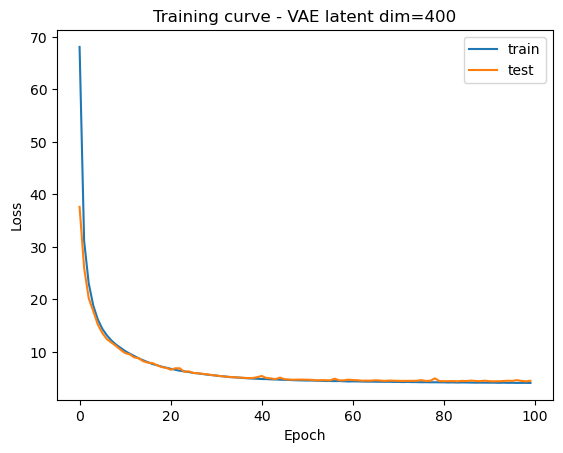

#### latent ndims = 425 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.41it/s]


Epoch [1/100] Train Loss: 73.3779
Epoch [1/100] Test Loss: 37.5755
✅ Best model saved at epoch 1 with test loss: 37.5755


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.13it/s]


Epoch [2/100] Train Loss: 31.6329
Epoch [2/100] Test Loss: 26.0106
✅ Best model saved at epoch 2 with test loss: 26.0106


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.79it/s]


Epoch [3/100] Train Loss: 23.5052
Epoch [3/100] Test Loss: 20.7269
✅ Best model saved at epoch 3 with test loss: 20.7269


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.12it/s]


Epoch [4/100] Train Loss: 19.1915
Epoch [4/100] Test Loss: 17.4826
✅ Best model saved at epoch 4 with test loss: 17.4826


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.78it/s]


Epoch [5/100] Train Loss: 16.4493
Epoch [5/100] Test Loss: 15.3460
✅ Best model saved at epoch 5 with test loss: 15.3460


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.43it/s]


Epoch [6/100] Train Loss: 14.6906
Epoch [6/100] Test Loss: 13.8494
✅ Best model saved at epoch 6 with test loss: 13.8494


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [7/100] Train Loss: 13.3718
Epoch [7/100] Test Loss: 12.7497
✅ Best model saved at epoch 7 with test loss: 12.7497


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.74it/s]


Epoch [8/100] Train Loss: 12.2507
Epoch [8/100] Test Loss: 12.5343
✅ Best model saved at epoch 8 with test loss: 12.5343


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.88it/s]


Epoch [9/100] Train Loss: 11.4210
Epoch [9/100] Test Loss: 10.9940
✅ Best model saved at epoch 9 with test loss: 10.9940


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.73it/s]


Epoch [10/100] Train Loss: 10.6667
Epoch [10/100] Test Loss: 10.3054
✅ Best model saved at epoch 10 with test loss: 10.3054


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.95it/s]


Epoch [11/100] Train Loss: 10.0812
Epoch [11/100] Test Loss: 9.7260
✅ Best model saved at epoch 11 with test loss: 9.7260


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.31it/s]


Epoch [12/100] Train Loss: 9.5514
Epoch [12/100] Test Loss: 9.2238
✅ Best model saved at epoch 12 with test loss: 9.2238


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.37it/s]


Epoch [13/100] Train Loss: 9.1169
Epoch [13/100] Test Loss: 8.8550
✅ Best model saved at epoch 13 with test loss: 8.8550


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [14/100] Train Loss: 8.6754
Epoch [14/100] Test Loss: 8.4689
✅ Best model saved at epoch 14 with test loss: 8.4689


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.45it/s]


Epoch [15/100] Train Loss: 8.2939
Epoch [15/100] Test Loss: 8.1487
✅ Best model saved at epoch 15 with test loss: 8.1487


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.24it/s]


Epoch [16/100] Train Loss: 7.9972
Epoch [16/100] Test Loss: 8.0424
✅ Best model saved at epoch 16 with test loss: 8.0424


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.50it/s]


Epoch [17/100] Train Loss: 7.6916
Epoch [17/100] Test Loss: 7.7227
✅ Best model saved at epoch 17 with test loss: 7.7227


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.74it/s]


Epoch [18/100] Train Loss: 7.4009
Epoch [18/100] Test Loss: 7.2596
✅ Best model saved at epoch 18 with test loss: 7.2596


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.12it/s]


Epoch [19/100] Train Loss: 7.1628
Epoch [19/100] Test Loss: 7.0176
✅ Best model saved at epoch 19 with test loss: 7.0176


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.75it/s]


Epoch [20/100] Train Loss: 6.9173
Epoch [20/100] Test Loss: 6.8243
✅ Best model saved at epoch 20 with test loss: 6.8243


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [21/100] Train Loss: 6.6777
Epoch [21/100] Test Loss: 6.5650
✅ Best model saved at epoch 21 with test loss: 6.5650


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.66it/s]


Epoch [22/100] Train Loss: 6.5192
Epoch [22/100] Test Loss: 6.4318
✅ Best model saved at epoch 22 with test loss: 6.4318


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.68it/s]


Epoch [23/100] Train Loss: 6.3389
Epoch [23/100] Test Loss: 6.4818


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.10it/s]


Epoch [24/100] Train Loss: 6.2043
Epoch [24/100] Test Loss: 6.0945
✅ Best model saved at epoch 24 with test loss: 6.0945


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.85it/s]


Epoch [25/100] Train Loss: 6.0374
Epoch [25/100] Test Loss: 6.0266
✅ Best model saved at epoch 25 with test loss: 6.0266


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [26/100] Train Loss: 5.9442
Epoch [26/100] Test Loss: 6.1772


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.04it/s]


Epoch [27/100] Train Loss: 5.8622
Epoch [27/100] Test Loss: 5.8070
✅ Best model saved at epoch 27 with test loss: 5.8070


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.75it/s]


Epoch [28/100] Train Loss: 5.6675
Epoch [28/100] Test Loss: 5.6357
✅ Best model saved at epoch 28 with test loss: 5.6357


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.94it/s]


Epoch [29/100] Train Loss: 5.6030
Epoch [29/100] Test Loss: 5.9929


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.89it/s]


Epoch [30/100] Train Loss: 5.4854
Epoch [30/100] Test Loss: 5.4939
✅ Best model saved at epoch 30 with test loss: 5.4939


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.60it/s]


Epoch [31/100] Train Loss: 5.3661
Epoch [31/100] Test Loss: 5.3325
✅ Best model saved at epoch 31 with test loss: 5.3325


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.80it/s]


Epoch [32/100] Train Loss: 5.2919
Epoch [32/100] Test Loss: 5.2576
✅ Best model saved at epoch 32 with test loss: 5.2576


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.48it/s]


Epoch [33/100] Train Loss: 5.1908
Epoch [33/100] Test Loss: 5.2143
✅ Best model saved at epoch 33 with test loss: 5.2143


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.90it/s]


Epoch [34/100] Train Loss: 5.1242
Epoch [34/100] Test Loss: 5.1149
✅ Best model saved at epoch 34 with test loss: 5.1149


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.72it/s]


Epoch [35/100] Train Loss: 5.0151
Epoch [35/100] Test Loss: 5.0170
✅ Best model saved at epoch 35 with test loss: 5.0170


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.18it/s]


Epoch [36/100] Train Loss: 4.9842
Epoch [36/100] Test Loss: 4.9905
✅ Best model saved at epoch 36 with test loss: 4.9905


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.70it/s]


Epoch [37/100] Train Loss: 4.8699
Epoch [37/100] Test Loss: 5.1998


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.55it/s]


Epoch [38/100] Train Loss: 4.8146
Epoch [38/100] Test Loss: 4.9259
✅ Best model saved at epoch 38 with test loss: 4.9259


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.86it/s]


Epoch [39/100] Train Loss: 4.7828
Epoch [39/100] Test Loss: 4.9516


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.91it/s]


Epoch [40/100] Train Loss: 4.7131
Epoch [40/100] Test Loss: 4.7740
✅ Best model saved at epoch 40 with test loss: 4.7740


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.03it/s]


Epoch [41/100] Train Loss: 4.6662
Epoch [41/100] Test Loss: 4.8750


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.07it/s]


Epoch [42/100] Train Loss: 4.5950
Epoch [42/100] Test Loss: 4.6691
✅ Best model saved at epoch 42 with test loss: 4.6691


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.47it/s]


Epoch [43/100] Train Loss: 4.5801
Epoch [43/100] Test Loss: 4.6901


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.86it/s]


Epoch [44/100] Train Loss: 4.5407
Epoch [44/100] Test Loss: 4.6829


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.89it/s]


Epoch [45/100] Train Loss: 4.4876
Epoch [45/100] Test Loss: 4.5664
✅ Best model saved at epoch 45 with test loss: 4.5664


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.23it/s]


Epoch [46/100] Train Loss: 4.4417
Epoch [46/100] Test Loss: 4.6930


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.87it/s]


Epoch [47/100] Train Loss: 4.4201
Epoch [47/100] Test Loss: 4.6896


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.12it/s]


Epoch [48/100] Train Loss: 4.4437
Epoch [48/100] Test Loss: 4.5232
✅ Best model saved at epoch 48 with test loss: 4.5232


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.80it/s]


Epoch [49/100] Train Loss: 4.3519
Epoch [49/100] Test Loss: 4.5529


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.67it/s]


Epoch [50/100] Train Loss: 4.3493
Epoch [50/100] Test Loss: 4.4174
✅ Best model saved at epoch 50 with test loss: 4.4174


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [51/100] Train Loss: 4.3104
Epoch [51/100] Test Loss: 4.4045
✅ Best model saved at epoch 51 with test loss: 4.4045


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [52/100] Train Loss: 4.2923
Epoch [52/100] Test Loss: 4.7405


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.20it/s]


Epoch [53/100] Train Loss: 4.3098
Epoch [53/100] Test Loss: 4.4076


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.74it/s]


Epoch [54/100] Train Loss: 4.2892
Epoch [54/100] Test Loss: 4.4473


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.72it/s]


Epoch [55/100] Train Loss: 4.2379
Epoch [55/100] Test Loss: 4.4749


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.90it/s]


Epoch [56/100] Train Loss: 4.2367
Epoch [56/100] Test Loss: 4.3320
✅ Best model saved at epoch 56 with test loss: 4.3320


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.68it/s]


Epoch [57/100] Train Loss: 4.1736
Epoch [57/100] Test Loss: 4.3377


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.09it/s]


Epoch [58/100] Train Loss: 4.1972
Epoch [58/100] Test Loss: 4.3693


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.96it/s]


Epoch [59/100] Train Loss: 4.1735
Epoch [59/100] Test Loss: 4.4208


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.93it/s]


Epoch [60/100] Train Loss: 4.1489
Epoch [60/100] Test Loss: 4.4181


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.97it/s]


Epoch [61/100] Train Loss: 4.1458
Epoch [61/100] Test Loss: 4.3697


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.66it/s]


Epoch [62/100] Train Loss: 4.1190
Epoch [62/100] Test Loss: 4.5246


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.35it/s]


Epoch [63/100] Train Loss: 4.1377
Epoch [63/100] Test Loss: 4.2634
✅ Best model saved at epoch 63 with test loss: 4.2634


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.09it/s]


Epoch [64/100] Train Loss: 4.0777
Epoch [64/100] Test Loss: 4.2578
✅ Best model saved at epoch 64 with test loss: 4.2578


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.10it/s]


Epoch [65/100] Train Loss: 4.0728
Epoch [65/100] Test Loss: 4.3058


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.70it/s]


Epoch [66/100] Train Loss: 4.0731
Epoch [66/100] Test Loss: 4.2527
✅ Best model saved at epoch 66 with test loss: 4.2527


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.34it/s]


Epoch [67/100] Train Loss: 4.0583
Epoch [67/100] Test Loss: 4.3090


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.95it/s]


Epoch [68/100] Train Loss: 4.0502
Epoch [68/100] Test Loss: 4.3233


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.07it/s]


Epoch [69/100] Train Loss: 4.0387
Epoch [69/100] Test Loss: 4.3576


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.19it/s]


Epoch [70/100] Train Loss: 4.0210
Epoch [70/100] Test Loss: 4.2395
✅ Best model saved at epoch 70 with test loss: 4.2395


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.11it/s]


Epoch [71/100] Train Loss: 4.0354
Epoch [71/100] Test Loss: 4.2104
✅ Best model saved at epoch 71 with test loss: 4.2104


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.73it/s]


Epoch [72/100] Train Loss: 4.0074
Epoch [72/100] Test Loss: 4.3639


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.53it/s]


Epoch [73/100] Train Loss: 4.0021
Epoch [73/100] Test Loss: 4.2205


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.53it/s]


Epoch [74/100] Train Loss: 3.9869
Epoch [74/100] Test Loss: 4.3230


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.96it/s]


Epoch [75/100] Train Loss: 3.9869
Epoch [75/100] Test Loss: 4.1694
✅ Best model saved at epoch 75 with test loss: 4.1694


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.04it/s]


Epoch [76/100] Train Loss: 3.9687
Epoch [76/100] Test Loss: 4.2635


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.95it/s]


Epoch [77/100] Train Loss: 3.9691
Epoch [77/100] Test Loss: 4.2996


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.11it/s]


Epoch [78/100] Train Loss: 3.9939
Epoch [78/100] Test Loss: 4.2418


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.41it/s]


Epoch [79/100] Train Loss: 3.9348
Epoch [79/100] Test Loss: 4.1895


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [80/100] Train Loss: 3.9415
Epoch [80/100] Test Loss: 4.2480


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.51it/s]


Epoch [81/100] Train Loss: 3.9334
Epoch [81/100] Test Loss: 4.1779


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.96it/s]


Epoch [82/100] Train Loss: 3.9336
Epoch [82/100] Test Loss: 4.1548
✅ Best model saved at epoch 82 with test loss: 4.1548


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [83/100] Train Loss: 3.9264
Epoch [83/100] Test Loss: 4.1757


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.97it/s]


Epoch [84/100] Train Loss: 3.9287
Epoch [84/100] Test Loss: 4.1792


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.01it/s]


Epoch [85/100] Train Loss: 3.9099
Epoch [85/100] Test Loss: 4.1278
✅ Best model saved at epoch 85 with test loss: 4.1278


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.37it/s]


Epoch [86/100] Train Loss: 3.8931
Epoch [86/100] Test Loss: 4.1530


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.18it/s]


Epoch [87/100] Train Loss: 3.9052
Epoch [87/100] Test Loss: 4.1409


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.48it/s]


Epoch [88/100] Train Loss: 3.8823
Epoch [88/100] Test Loss: 4.3277


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.67it/s]


Epoch [89/100] Train Loss: 3.8904
Epoch [89/100] Test Loss: 4.1382


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.93it/s]


Epoch [90/100] Train Loss: 3.8813
Epoch [90/100] Test Loss: 4.1079
✅ Best model saved at epoch 90 with test loss: 4.1079


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.57it/s]


Epoch [91/100] Train Loss: 3.8745
Epoch [91/100] Test Loss: 4.1922


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.59it/s]


Epoch [92/100] Train Loss: 3.8898
Epoch [92/100] Test Loss: 4.2329


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.72it/s]


Epoch [93/100] Train Loss: 3.8680
Epoch [93/100] Test Loss: 4.1235


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.72it/s]


Epoch [94/100] Train Loss: 3.8379
Epoch [94/100] Test Loss: 4.1167


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.68it/s]


Epoch [95/100] Train Loss: 3.8622
Epoch [95/100] Test Loss: 4.0772
✅ Best model saved at epoch 95 with test loss: 4.0772


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [96/100] Train Loss: 3.8282
Epoch [96/100] Test Loss: 4.1505


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.19it/s]


Epoch [97/100] Train Loss: 3.8416
Epoch [97/100] Test Loss: 4.1481


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.78it/s]


Epoch [98/100] Train Loss: 3.8367
Epoch [98/100] Test Loss: 4.2398


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.52it/s]


Epoch [99/100] Train Loss: 3.8494
Epoch [99/100] Test Loss: 4.0932


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.13it/s]


Epoch [100/100] Train Loss: 3.8116
Epoch [100/100] Test Loss: 4.0816


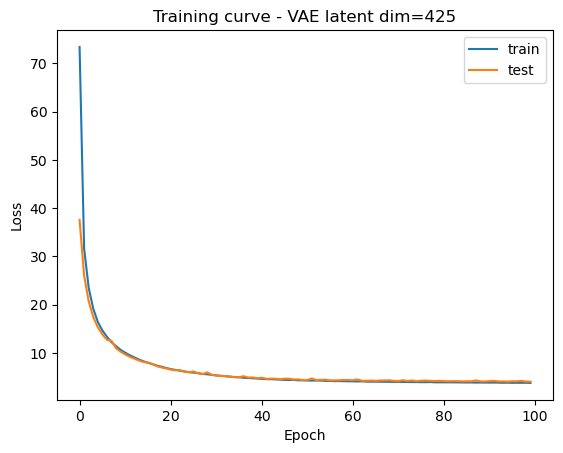

#### latent ndims = 450 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.46it/s]


Epoch [1/100] Train Loss: 68.4905
Epoch [1/100] Test Loss: 37.1955
✅ Best model saved at epoch 1 with test loss: 37.1955


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.59it/s]


Epoch [2/100] Train Loss: 31.5980
Epoch [2/100] Test Loss: 26.4926
✅ Best model saved at epoch 2 with test loss: 26.4926


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.36it/s]


Epoch [3/100] Train Loss: 24.0083
Epoch [3/100] Test Loss: 21.4115
✅ Best model saved at epoch 3 with test loss: 21.4115


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.21it/s]


Epoch [4/100] Train Loss: 19.7409
Epoch [4/100] Test Loss: 18.3190
✅ Best model saved at epoch 4 with test loss: 18.3190


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.90it/s]


Epoch [5/100] Train Loss: 16.9566
Epoch [5/100] Test Loss: 15.8041
✅ Best model saved at epoch 5 with test loss: 15.8041


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.30it/s]


Epoch [6/100] Train Loss: 15.0652
Epoch [6/100] Test Loss: 14.3771
✅ Best model saved at epoch 6 with test loss: 14.3771


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.39it/s]


Epoch [7/100] Train Loss: 13.7999
Epoch [7/100] Test Loss: 13.1554
✅ Best model saved at epoch 7 with test loss: 13.1554


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.88it/s]


Epoch [8/100] Train Loss: 12.7155
Epoch [8/100] Test Loss: 12.3816
✅ Best model saved at epoch 8 with test loss: 12.3816


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.20it/s]


Epoch [9/100] Train Loss: 11.7226
Epoch [9/100] Test Loss: 11.2137
✅ Best model saved at epoch 9 with test loss: 11.2137


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.81it/s]


Epoch [10/100] Train Loss: 11.0416
Epoch [10/100] Test Loss: 10.9271
✅ Best model saved at epoch 10 with test loss: 10.9271


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.15it/s]


Epoch [11/100] Train Loss: 10.3715
Epoch [11/100] Test Loss: 9.9193
✅ Best model saved at epoch 11 with test loss: 9.9193


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.77it/s]


Epoch [12/100] Train Loss: 9.9282
Epoch [12/100] Test Loss: 9.6331
✅ Best model saved at epoch 12 with test loss: 9.6331


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [13/100] Train Loss: 9.4486
Epoch [13/100] Test Loss: 10.0422


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.74it/s]


Epoch [14/100] Train Loss: 9.0573
Epoch [14/100] Test Loss: 9.4984
✅ Best model saved at epoch 14 with test loss: 9.4984


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.99it/s]


Epoch [15/100] Train Loss: 8.6516
Epoch [15/100] Test Loss: 8.3986
✅ Best model saved at epoch 15 with test loss: 8.3986


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.67it/s]


Epoch [16/100] Train Loss: 8.2642
Epoch [16/100] Test Loss: 8.1058
✅ Best model saved at epoch 16 with test loss: 8.1058


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.31it/s]


Epoch [17/100] Train Loss: 7.9555
Epoch [17/100] Test Loss: 7.7237
✅ Best model saved at epoch 17 with test loss: 7.7237


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.38it/s]


Epoch [18/100] Train Loss: 7.6408
Epoch [18/100] Test Loss: 7.4006
✅ Best model saved at epoch 18 with test loss: 7.4006


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [19/100] Train Loss: 7.2905
Epoch [19/100] Test Loss: 7.1937
✅ Best model saved at epoch 19 with test loss: 7.1937


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.78it/s]


Epoch [20/100] Train Loss: 7.0942
Epoch [20/100] Test Loss: 7.5071


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.57it/s]


Epoch [21/100] Train Loss: 6.8883
Epoch [21/100] Test Loss: 6.8259
✅ Best model saved at epoch 21 with test loss: 6.8259


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.92it/s]


Epoch [22/100] Train Loss: 6.6662
Epoch [22/100] Test Loss: 6.6699
✅ Best model saved at epoch 22 with test loss: 6.6699


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.80it/s]


Epoch [23/100] Train Loss: 6.5008
Epoch [23/100] Test Loss: 6.5029
✅ Best model saved at epoch 23 with test loss: 6.5029


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.83it/s]


Epoch [24/100] Train Loss: 6.3209
Epoch [24/100] Test Loss: 6.3129
✅ Best model saved at epoch 24 with test loss: 6.3129


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.65it/s]


Epoch [25/100] Train Loss: 6.2066
Epoch [25/100] Test Loss: 6.4405


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.91it/s]


Epoch [26/100] Train Loss: 6.0848
Epoch [26/100] Test Loss: 6.0152
✅ Best model saved at epoch 26 with test loss: 6.0152


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.65it/s]


Epoch [27/100] Train Loss: 5.9415
Epoch [27/100] Test Loss: 5.9542
✅ Best model saved at epoch 27 with test loss: 5.9542


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.59it/s]


Epoch [28/100] Train Loss: 5.7893
Epoch [28/100] Test Loss: 5.8339
✅ Best model saved at epoch 28 with test loss: 5.8339


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.36it/s]


Epoch [29/100] Train Loss: 5.6913
Epoch [29/100] Test Loss: 5.9273


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.98it/s]


Epoch [30/100] Train Loss: 5.6521
Epoch [30/100] Test Loss: 5.7002
✅ Best model saved at epoch 30 with test loss: 5.7002


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.02it/s]


Epoch [31/100] Train Loss: 5.4737
Epoch [31/100] Test Loss: 5.5385
✅ Best model saved at epoch 31 with test loss: 5.5385


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.88it/s]


Epoch [32/100] Train Loss: 5.3862
Epoch [32/100] Test Loss: 5.4447
✅ Best model saved at epoch 32 with test loss: 5.4447


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.67it/s]


Epoch [33/100] Train Loss: 5.3346
Epoch [33/100] Test Loss: 5.5164


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.47it/s]


Epoch [34/100] Train Loss: 5.2234
Epoch [34/100] Test Loss: 5.2154
✅ Best model saved at epoch 34 with test loss: 5.2154


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.17it/s]


Epoch [35/100] Train Loss: 5.1674
Epoch [35/100] Test Loss: 5.2879


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.29it/s]


Epoch [36/100] Train Loss: 5.0517
Epoch [36/100] Test Loss: 5.1717
✅ Best model saved at epoch 36 with test loss: 5.1717


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.49it/s]


Epoch [37/100] Train Loss: 5.0092
Epoch [37/100] Test Loss: 4.9803
✅ Best model saved at epoch 37 with test loss: 4.9803


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [38/100] Train Loss: 4.9286
Epoch [38/100] Test Loss: 4.9966


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.70it/s]


Epoch [39/100] Train Loss: 4.8481
Epoch [39/100] Test Loss: 4.9675
✅ Best model saved at epoch 39 with test loss: 4.9675


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.34it/s]


Epoch [40/100] Train Loss: 4.7927
Epoch [40/100] Test Loss: 5.0184


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.13it/s]


Epoch [41/100] Train Loss: 4.6908
Epoch [41/100] Test Loss: 4.8842
✅ Best model saved at epoch 41 with test loss: 4.8842


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.93it/s]


Epoch [42/100] Train Loss: 4.6622
Epoch [42/100] Test Loss: 4.8680
✅ Best model saved at epoch 42 with test loss: 4.8680


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.28it/s]


Epoch [43/100] Train Loss: 4.5981
Epoch [43/100] Test Loss: 4.8255
✅ Best model saved at epoch 43 with test loss: 4.8255


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.71it/s]


Epoch [44/100] Train Loss: 4.5753
Epoch [44/100] Test Loss: 4.6708
✅ Best model saved at epoch 44 with test loss: 4.6708


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.38it/s]


Epoch [45/100] Train Loss: 4.4857
Epoch [45/100] Test Loss: 4.5254
✅ Best model saved at epoch 45 with test loss: 4.5254


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.10it/s]


Epoch [46/100] Train Loss: 4.4768
Epoch [46/100] Test Loss: 4.5780


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.58it/s]


Epoch [47/100] Train Loss: 4.5359
Epoch [47/100] Test Loss: 4.4965
✅ Best model saved at epoch 47 with test loss: 4.4965


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.50it/s]


Epoch [48/100] Train Loss: 4.3400
Epoch [48/100] Test Loss: 4.4634
✅ Best model saved at epoch 48 with test loss: 4.4634


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.17it/s]


Epoch [49/100] Train Loss: 4.3476
Epoch [49/100] Test Loss: 4.4397
✅ Best model saved at epoch 49 with test loss: 4.4397


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.17it/s]


Epoch [50/100] Train Loss: 4.2860
Epoch [50/100] Test Loss: 4.5377


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.26it/s]


Epoch [51/100] Train Loss: 4.2616
Epoch [51/100] Test Loss: 4.3779
✅ Best model saved at epoch 51 with test loss: 4.3779


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.09it/s]


Epoch [52/100] Train Loss: 4.2396
Epoch [52/100] Test Loss: 4.4178


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.56it/s]


Epoch [53/100] Train Loss: 4.2172
Epoch [53/100] Test Loss: 4.3028
✅ Best model saved at epoch 53 with test loss: 4.3028


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [54/100] Train Loss: 4.1890
Epoch [54/100] Test Loss: 4.3560


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.33it/s]


Epoch [55/100] Train Loss: 4.1334
Epoch [55/100] Test Loss: 4.2639
✅ Best model saved at epoch 55 with test loss: 4.2639


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.07it/s]


Epoch [56/100] Train Loss: 4.1222
Epoch [56/100] Test Loss: 4.2682


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.14it/s]


Epoch [57/100] Train Loss: 4.0961
Epoch [57/100] Test Loss: 4.2556
✅ Best model saved at epoch 57 with test loss: 4.2556


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.92it/s]


Epoch [58/100] Train Loss: 4.1064
Epoch [58/100] Test Loss: 4.2253
✅ Best model saved at epoch 58 with test loss: 4.2253


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.29it/s]


Epoch [59/100] Train Loss: 4.0339
Epoch [59/100] Test Loss: 4.1970
✅ Best model saved at epoch 59 with test loss: 4.1970


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.24it/s]


Epoch [60/100] Train Loss: 4.0238
Epoch [60/100] Test Loss: 4.2117


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.14it/s]


Epoch [61/100] Train Loss: 4.0022
Epoch [61/100] Test Loss: 4.1746
✅ Best model saved at epoch 61 with test loss: 4.1746


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.00it/s]


Epoch [62/100] Train Loss: 3.9934
Epoch [62/100] Test Loss: 4.2767


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.29it/s]


Epoch [63/100] Train Loss: 3.9876
Epoch [63/100] Test Loss: 4.0900
✅ Best model saved at epoch 63 with test loss: 4.0900


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.41it/s]


Epoch [64/100] Train Loss: 3.9697
Epoch [64/100] Test Loss: 4.2759


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.37it/s]


Epoch [65/100] Train Loss: 3.9290
Epoch [65/100] Test Loss: 4.1464


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.70it/s]


Epoch [66/100] Train Loss: 3.8946
Epoch [66/100] Test Loss: 4.1857


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [67/100] Train Loss: 3.9040
Epoch [67/100] Test Loss: 4.1213


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.31it/s]


Epoch [68/100] Train Loss: 3.8915
Epoch [68/100] Test Loss: 4.4901


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.23it/s]


Epoch [69/100] Train Loss: 3.8845
Epoch [69/100] Test Loss: 4.0374
✅ Best model saved at epoch 69 with test loss: 4.0374


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.49it/s]


Epoch [70/100] Train Loss: 3.8409
Epoch [70/100] Test Loss: 4.0827


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.50it/s]


Epoch [71/100] Train Loss: 3.8449
Epoch [71/100] Test Loss: 4.0476


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.51it/s]


Epoch [72/100] Train Loss: 3.8387
Epoch [72/100] Test Loss: 3.9969
✅ Best model saved at epoch 72 with test loss: 3.9969


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.19it/s]


Epoch [73/100] Train Loss: 3.8427
Epoch [73/100] Test Loss: 4.0156


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.55it/s]


Epoch [74/100] Train Loss: 3.7741
Epoch [74/100] Test Loss: 4.0238


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [75/100] Train Loss: 3.8186
Epoch [75/100] Test Loss: 4.0961


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.90it/s]


Epoch [76/100] Train Loss: 3.7647
Epoch [76/100] Test Loss: 3.9972


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.63it/s]


Epoch [77/100] Train Loss: 3.7697
Epoch [77/100] Test Loss: 3.9510
✅ Best model saved at epoch 77 with test loss: 3.9510


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.21it/s]


Epoch [78/100] Train Loss: 3.7567
Epoch [78/100] Test Loss: 3.9741


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.08it/s]


Epoch [79/100] Train Loss: 3.7394
Epoch [79/100] Test Loss: 3.9520


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.58it/s]


Epoch [80/100] Train Loss: 3.7405
Epoch [80/100] Test Loss: 3.9794


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.32it/s]


Epoch [81/100] Train Loss: 3.7178
Epoch [81/100] Test Loss: 3.9591


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.48it/s]


Epoch [82/100] Train Loss: 3.7287
Epoch [82/100] Test Loss: 3.9685


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.74it/s]


Epoch [83/100] Train Loss: 3.7031
Epoch [83/100] Test Loss: 3.9077
✅ Best model saved at epoch 83 with test loss: 3.9077


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.63it/s]


Epoch [84/100] Train Loss: 3.7199
Epoch [84/100] Test Loss: 3.9251


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.56it/s]


Epoch [85/100] Train Loss: 3.6789
Epoch [85/100] Test Loss: 3.9427


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [86/100] Train Loss: 3.7148
Epoch [86/100] Test Loss: 4.1157


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.81it/s]


Epoch [87/100] Train Loss: 3.6752
Epoch [87/100] Test Loss: 3.9410


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.28it/s]


Epoch [88/100] Train Loss: 3.6793
Epoch [88/100] Test Loss: 3.9255


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.26it/s]


Epoch [89/100] Train Loss: 3.6644
Epoch [89/100] Test Loss: 4.1832


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [90/100] Train Loss: 3.6595
Epoch [90/100] Test Loss: 3.8779
✅ Best model saved at epoch 90 with test loss: 3.8779


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.50it/s]


Epoch [91/100] Train Loss: 3.6370
Epoch [91/100] Test Loss: 3.9323


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.45it/s]


Epoch [92/100] Train Loss: 3.6581
Epoch [92/100] Test Loss: 3.8762
✅ Best model saved at epoch 92 with test loss: 3.8762


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [93/100] Train Loss: 3.6298
Epoch [93/100] Test Loss: 3.9706


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.18it/s]


Epoch [94/100] Train Loss: 3.6329
Epoch [94/100] Test Loss: 3.8693
✅ Best model saved at epoch 94 with test loss: 3.8693


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.42it/s]


Epoch [95/100] Train Loss: 3.6277
Epoch [95/100] Test Loss: 4.0097


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.44it/s]


Epoch [96/100] Train Loss: 3.6069
Epoch [96/100] Test Loss: 3.9157


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.11it/s]


Epoch [97/100] Train Loss: 3.6238
Epoch [97/100] Test Loss: 3.8557
✅ Best model saved at epoch 97 with test loss: 3.8557


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.89it/s]


Epoch [98/100] Train Loss: 3.6320
Epoch [98/100] Test Loss: 3.8439
✅ Best model saved at epoch 98 with test loss: 3.8439


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [99/100] Train Loss: 3.5890
Epoch [99/100] Test Loss: 3.8518


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.54it/s]


Epoch [100/100] Train Loss: 3.5792
Epoch [100/100] Test Loss: 3.8737


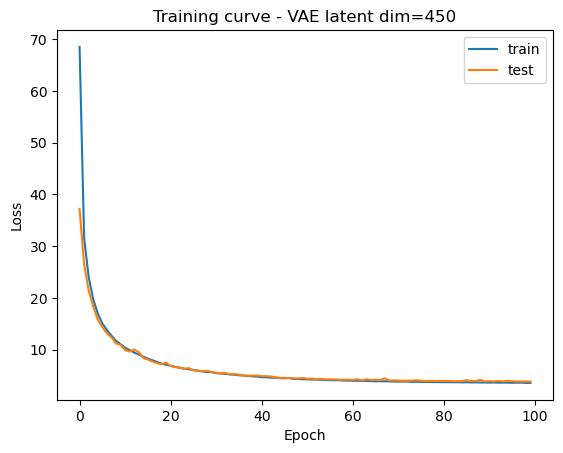

#### latent ndims = 475 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.05it/s]


Epoch [1/100] Train Loss: 69.9208
Epoch [1/100] Test Loss: 36.8057
✅ Best model saved at epoch 1 with test loss: 36.8057


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.74it/s]


Epoch [2/100] Train Loss: 31.0158
Epoch [2/100] Test Loss: 26.3152
✅ Best model saved at epoch 2 with test loss: 26.3152


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [3/100] Train Loss: 23.0397
Epoch [3/100] Test Loss: 20.4941
✅ Best model saved at epoch 3 with test loss: 20.4941


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.31it/s]


Epoch [4/100] Train Loss: 18.8128
Epoch [4/100] Test Loss: 17.2352
✅ Best model saved at epoch 4 with test loss: 17.2352


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.65it/s]


Epoch [5/100] Train Loss: 16.1127
Epoch [5/100] Test Loss: 15.2828
✅ Best model saved at epoch 5 with test loss: 15.2828


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.82it/s]


Epoch [6/100] Train Loss: 14.3728
Epoch [6/100] Test Loss: 13.7245
✅ Best model saved at epoch 6 with test loss: 13.7245


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.18it/s]


Epoch [7/100] Train Loss: 13.1799
Epoch [7/100] Test Loss: 12.6903
✅ Best model saved at epoch 7 with test loss: 12.6903


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.46it/s]


Epoch [8/100] Train Loss: 12.1985
Epoch [8/100] Test Loss: 11.6737
✅ Best model saved at epoch 8 with test loss: 11.6737


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.42it/s]


Epoch [9/100] Train Loss: 11.2436
Epoch [9/100] Test Loss: 10.8753
✅ Best model saved at epoch 9 with test loss: 10.8753


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.23it/s]


Epoch [10/100] Train Loss: 10.5429
Epoch [10/100] Test Loss: 10.2162
✅ Best model saved at epoch 10 with test loss: 10.2162


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.17it/s]


Epoch [11/100] Train Loss: 9.9569
Epoch [11/100] Test Loss: 9.6239
✅ Best model saved at epoch 11 with test loss: 9.6239


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.64it/s]


Epoch [12/100] Train Loss: 9.5011
Epoch [12/100] Test Loss: 9.2093
✅ Best model saved at epoch 12 with test loss: 9.2093


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.37it/s]


Epoch [13/100] Train Loss: 8.9623
Epoch [13/100] Test Loss: 8.5853
✅ Best model saved at epoch 13 with test loss: 8.5853


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.70it/s]


Epoch [14/100] Train Loss: 8.5102
Epoch [14/100] Test Loss: 8.2810
✅ Best model saved at epoch 14 with test loss: 8.2810


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.99it/s]


Epoch [15/100] Train Loss: 8.2313
Epoch [15/100] Test Loss: 8.1049
✅ Best model saved at epoch 15 with test loss: 8.1049


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.22it/s]


Epoch [16/100] Train Loss: 7.8385
Epoch [16/100] Test Loss: 7.6876
✅ Best model saved at epoch 16 with test loss: 7.6876


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.35it/s]


Epoch [17/100] Train Loss: 7.5992
Epoch [17/100] Test Loss: 7.4178
✅ Best model saved at epoch 17 with test loss: 7.4178


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.37it/s]


Epoch [18/100] Train Loss: 7.2481
Epoch [18/100] Test Loss: 7.3934
✅ Best model saved at epoch 18 with test loss: 7.3934


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.07it/s]


Epoch [19/100] Train Loss: 7.0483
Epoch [19/100] Test Loss: 6.8440
✅ Best model saved at epoch 19 with test loss: 6.8440


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.96it/s]


Epoch [20/100] Train Loss: 6.7995
Epoch [20/100] Test Loss: 7.5081


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.77it/s]


Epoch [21/100] Train Loss: 6.6564
Epoch [21/100] Test Loss: 6.5092
✅ Best model saved at epoch 21 with test loss: 6.5092


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.83it/s]


Epoch [22/100] Train Loss: 6.4312
Epoch [22/100] Test Loss: 6.4697
✅ Best model saved at epoch 22 with test loss: 6.4697


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.85it/s]


Epoch [23/100] Train Loss: 6.2463
Epoch [23/100] Test Loss: 6.1304
✅ Best model saved at epoch 23 with test loss: 6.1304


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.28it/s]


Epoch [24/100] Train Loss: 6.0969
Epoch [24/100] Test Loss: 6.3488


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.40it/s]


Epoch [25/100] Train Loss: 5.9330
Epoch [25/100] Test Loss: 5.8505
✅ Best model saved at epoch 25 with test loss: 5.8505


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.13it/s]


Epoch [26/100] Train Loss: 5.8050
Epoch [26/100] Test Loss: 5.8643


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.74it/s]


Epoch [27/100] Train Loss: 5.6923
Epoch [27/100] Test Loss: 5.8297
✅ Best model saved at epoch 27 with test loss: 5.8297


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.14it/s]


Epoch [28/100] Train Loss: 5.5817
Epoch [28/100] Test Loss: 5.5291
✅ Best model saved at epoch 28 with test loss: 5.5291


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.83it/s]


Epoch [29/100] Train Loss: 5.4786
Epoch [29/100] Test Loss: 5.5421


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.91it/s]


Epoch [30/100] Train Loss: 5.3716
Epoch [30/100] Test Loss: 5.2826
✅ Best model saved at epoch 30 with test loss: 5.2826


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.79it/s]


Epoch [31/100] Train Loss: 5.2105
Epoch [31/100] Test Loss: 5.1252
✅ Best model saved at epoch 31 with test loss: 5.1252


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.92it/s]


Epoch [32/100] Train Loss: 5.1375
Epoch [32/100] Test Loss: 5.1488


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.50it/s]


Epoch [33/100] Train Loss: 5.0722
Epoch [33/100] Test Loss: 4.9784
✅ Best model saved at epoch 33 with test loss: 4.9784


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.24it/s]


Epoch [34/100] Train Loss: 4.9816
Epoch [34/100] Test Loss: 5.1210


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.37it/s]


Epoch [35/100] Train Loss: 4.8860
Epoch [35/100] Test Loss: 4.8348
✅ Best model saved at epoch 35 with test loss: 4.8348


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.11it/s]


Epoch [36/100] Train Loss: 4.8122
Epoch [36/100] Test Loss: 4.7662
✅ Best model saved at epoch 36 with test loss: 4.7662


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.02it/s]


Epoch [37/100] Train Loss: 4.7414
Epoch [37/100] Test Loss: 4.7340
✅ Best model saved at epoch 37 with test loss: 4.7340


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.19it/s]


Epoch [38/100] Train Loss: 4.7141
Epoch [38/100] Test Loss: 4.7636


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.50it/s]


Epoch [39/100] Train Loss: 4.5750
Epoch [39/100] Test Loss: 4.6576
✅ Best model saved at epoch 39 with test loss: 4.6576


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.90it/s]


Epoch [40/100] Train Loss: 4.5496
Epoch [40/100] Test Loss: 4.5712
✅ Best model saved at epoch 40 with test loss: 4.5712


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.48it/s]


Epoch [41/100] Train Loss: 4.4557
Epoch [41/100] Test Loss: 4.4628
✅ Best model saved at epoch 41 with test loss: 4.4628


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.26it/s]


Epoch [42/100] Train Loss: 4.4457
Epoch [42/100] Test Loss: 4.4929


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.35it/s]


Epoch [43/100] Train Loss: 4.4784
Epoch [43/100] Test Loss: 4.6103


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.28it/s]


Epoch [44/100] Train Loss: 4.2790
Epoch [44/100] Test Loss: 4.7642


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.39it/s]


Epoch [45/100] Train Loss: 4.2812
Epoch [45/100] Test Loss: 4.3125
✅ Best model saved at epoch 45 with test loss: 4.3125


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.45it/s]


Epoch [46/100] Train Loss: 4.2280
Epoch [46/100] Test Loss: 4.3238


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.46it/s]


Epoch [47/100] Train Loss: 4.2108
Epoch [47/100] Test Loss: 4.3559


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.80it/s]


Epoch [48/100] Train Loss: 4.1218
Epoch [48/100] Test Loss: 4.7220


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.85it/s]


Epoch [49/100] Train Loss: 4.1531
Epoch [49/100] Test Loss: 4.1083
✅ Best model saved at epoch 49 with test loss: 4.1083


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.00it/s]


Epoch [50/100] Train Loss: 4.0615
Epoch [50/100] Test Loss: 4.1076
✅ Best model saved at epoch 50 with test loss: 4.1076


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.98it/s]


Epoch [51/100] Train Loss: 4.0217
Epoch [51/100] Test Loss: 4.1200


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.59it/s]


Epoch [52/100] Train Loss: 3.9989
Epoch [52/100] Test Loss: 4.0965
✅ Best model saved at epoch 52 with test loss: 4.0965


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.49it/s]


Epoch [53/100] Train Loss: 4.1608
Epoch [53/100] Test Loss: 4.0562
✅ Best model saved at epoch 53 with test loss: 4.0562


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [54/100] Train Loss: 3.8759
Epoch [54/100] Test Loss: 4.0270
✅ Best model saved at epoch 54 with test loss: 4.0270


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.53it/s]


Epoch [55/100] Train Loss: 3.9245
Epoch [55/100] Test Loss: 3.9960
✅ Best model saved at epoch 55 with test loss: 3.9960


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.88it/s]


Epoch [56/100] Train Loss: 3.9109
Epoch [56/100] Test Loss: 3.9416
✅ Best model saved at epoch 56 with test loss: 3.9416


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.25it/s]


Epoch [57/100] Train Loss: 3.8530
Epoch [57/100] Test Loss: 4.0534


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.42it/s]


Epoch [58/100] Train Loss: 3.8246
Epoch [58/100] Test Loss: 3.9499


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.13it/s]


Epoch [59/100] Train Loss: 3.8439
Epoch [59/100] Test Loss: 3.9028
✅ Best model saved at epoch 59 with test loss: 3.9028


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.57it/s]


Epoch [60/100] Train Loss: 3.7955
Epoch [60/100] Test Loss: 3.9052


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.48it/s]


Epoch [61/100] Train Loss: 3.7712
Epoch [61/100] Test Loss: 3.8829
✅ Best model saved at epoch 61 with test loss: 3.8829


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.34it/s]


Epoch [62/100] Train Loss: 3.8607
Epoch [62/100] Test Loss: 3.8172
✅ Best model saved at epoch 62 with test loss: 3.8172


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.94it/s]


Epoch [63/100] Train Loss: 3.7005
Epoch [63/100] Test Loss: 3.8273


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.04it/s]


Epoch [64/100] Train Loss: 3.7191
Epoch [64/100] Test Loss: 3.8105
✅ Best model saved at epoch 64 with test loss: 3.8105


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [65/100] Train Loss: 3.7586
Epoch [65/100] Test Loss: 3.9175


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.54it/s]


Epoch [66/100] Train Loss: 3.7166
Epoch [66/100] Test Loss: 3.8037
✅ Best model saved at epoch 66 with test loss: 3.8037


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.61it/s]


Epoch [67/100] Train Loss: 3.6946
Epoch [67/100] Test Loss: 3.7545
✅ Best model saved at epoch 67 with test loss: 3.7545


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.72it/s]


Epoch [68/100] Train Loss: 3.6469
Epoch [68/100] Test Loss: 3.8691


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.72it/s]


Epoch [69/100] Train Loss: 3.6692
Epoch [69/100] Test Loss: 3.8729


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.95it/s]


Epoch [70/100] Train Loss: 3.6485
Epoch [70/100] Test Loss: 3.7780


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [71/100] Train Loss: 3.6195
Epoch [71/100] Test Loss: 3.8566


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [72/100] Train Loss: 3.6411
Epoch [72/100] Test Loss: 3.7798


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.21it/s]


Epoch [73/100] Train Loss: 3.6550
Epoch [73/100] Test Loss: 3.7408
✅ Best model saved at epoch 73 with test loss: 3.7408


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [74/100] Train Loss: 3.5757
Epoch [74/100] Test Loss: 4.0665


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.12it/s]


Epoch [75/100] Train Loss: 3.6443
Epoch [75/100] Test Loss: 3.7371
✅ Best model saved at epoch 75 with test loss: 3.7371


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.94it/s]


Epoch [76/100] Train Loss: 3.5683
Epoch [76/100] Test Loss: 3.8553


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [77/100] Train Loss: 3.5810
Epoch [77/100] Test Loss: 3.9574


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.95it/s]


Epoch [78/100] Train Loss: 3.5699
Epoch [78/100] Test Loss: 4.0360


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.46it/s]


Epoch [79/100] Train Loss: 3.5756
Epoch [79/100] Test Loss: 3.6643
✅ Best model saved at epoch 79 with test loss: 3.6643


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.70it/s]


Epoch [80/100] Train Loss: 3.5561
Epoch [80/100] Test Loss: 3.7222


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.70it/s]


Epoch [81/100] Train Loss: 3.5225
Epoch [81/100] Test Loss: 3.7833


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.78it/s]


Epoch [82/100] Train Loss: 3.5619
Epoch [82/100] Test Loss: 3.7647


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.24it/s]


Epoch [83/100] Train Loss: 3.5275
Epoch [83/100] Test Loss: 3.7125


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.06it/s]


Epoch [84/100] Train Loss: 3.5350
Epoch [84/100] Test Loss: 3.6864


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.97it/s]


Epoch [85/100] Train Loss: 3.5177
Epoch [85/100] Test Loss: 3.7586


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.26it/s]


Epoch [86/100] Train Loss: 3.4999
Epoch [86/100] Test Loss: 3.7098


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.75it/s]


Epoch [87/100] Train Loss: 3.4936
Epoch [87/100] Test Loss: 3.6656


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.13it/s]


Epoch [88/100] Train Loss: 3.4973
Epoch [88/100] Test Loss: 3.6832


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.65it/s]


Epoch [89/100] Train Loss: 3.5234
Epoch [89/100] Test Loss: 3.6806


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.54it/s]


Epoch [90/100] Train Loss: 3.4636
Epoch [90/100] Test Loss: 3.8089


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.29it/s]


Epoch [91/100] Train Loss: 3.5704
Epoch [91/100] Test Loss: 3.9751


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.55it/s]


Epoch [92/100] Train Loss: 3.4669
Epoch [92/100] Test Loss: 3.8524


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.19it/s]


Epoch [93/100] Train Loss: 3.5044
Epoch [93/100] Test Loss: 3.6168
✅ Best model saved at epoch 93 with test loss: 3.6168


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.19it/s]


Epoch [94/100] Train Loss: 3.4221
Epoch [94/100] Test Loss: 3.6518


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.77it/s]


Epoch [95/100] Train Loss: 3.4742
Epoch [95/100] Test Loss: 3.7240


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.92it/s]


Epoch [96/100] Train Loss: 3.4468
Epoch [96/100] Test Loss: 3.6584


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.21it/s]


Epoch [97/100] Train Loss: 3.4370
Epoch [97/100] Test Loss: 3.6204


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.39it/s]


Epoch [98/100] Train Loss: 3.4477
Epoch [98/100] Test Loss: 3.6435


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [99/100] Train Loss: 3.4259
Epoch [99/100] Test Loss: 3.6559


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.50it/s]


Epoch [100/100] Train Loss: 3.4334
Epoch [100/100] Test Loss: 3.7723


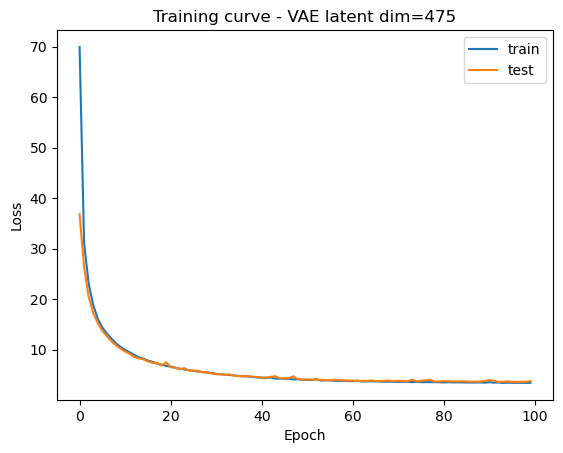

#### latent ndims = 500 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.18it/s]


Epoch [1/100] Train Loss: 71.7403
Epoch [1/100] Test Loss: 38.8291
✅ Best model saved at epoch 1 with test loss: 38.8291


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.39it/s]


Epoch [2/100] Train Loss: 31.2188
Epoch [2/100] Test Loss: 25.8122
✅ Best model saved at epoch 2 with test loss: 25.8122


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.63it/s]


Epoch [3/100] Train Loss: 22.8999
Epoch [3/100] Test Loss: 20.4393
✅ Best model saved at epoch 3 with test loss: 20.4393


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.32it/s]


Epoch [4/100] Train Loss: 18.4352
Epoch [4/100] Test Loss: 16.7127
✅ Best model saved at epoch 4 with test loss: 16.7127


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.59it/s]


Epoch [5/100] Train Loss: 15.9435
Epoch [5/100] Test Loss: 14.9156
✅ Best model saved at epoch 5 with test loss: 14.9156


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.53it/s]


Epoch [6/100] Train Loss: 14.2988
Epoch [6/100] Test Loss: 13.5812
✅ Best model saved at epoch 6 with test loss: 13.5812


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.89it/s]


Epoch [7/100] Train Loss: 13.1048
Epoch [7/100] Test Loss: 12.5071
✅ Best model saved at epoch 7 with test loss: 12.5071


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.63it/s]


Epoch [8/100] Train Loss: 12.2534
Epoch [8/100] Test Loss: 11.7380
✅ Best model saved at epoch 8 with test loss: 11.7380


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [9/100] Train Loss: 11.4701
Epoch [9/100] Test Loss: 12.1233


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.30it/s]


Epoch [10/100] Train Loss: 10.8169
Epoch [10/100] Test Loss: 10.4476
✅ Best model saved at epoch 10 with test loss: 10.4476


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.68it/s]


Epoch [11/100] Train Loss: 10.1198
Epoch [11/100] Test Loss: 9.7750
✅ Best model saved at epoch 11 with test loss: 9.7750


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [12/100] Train Loss: 9.6125
Epoch [12/100] Test Loss: 9.4228
✅ Best model saved at epoch 12 with test loss: 9.4228


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.18it/s]


Epoch [13/100] Train Loss: 9.1248
Epoch [13/100] Test Loss: 9.0682
✅ Best model saved at epoch 13 with test loss: 9.0682


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.78it/s]


Epoch [14/100] Train Loss: 8.7215
Epoch [14/100] Test Loss: 8.5987
✅ Best model saved at epoch 14 with test loss: 8.5987


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.07it/s]


Epoch [15/100] Train Loss: 8.3765
Epoch [15/100] Test Loss: 8.1221
✅ Best model saved at epoch 15 with test loss: 8.1221


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.03it/s]


Epoch [16/100] Train Loss: 8.0355
Epoch [16/100] Test Loss: 8.2969


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [17/100] Train Loss: 7.7672
Epoch [17/100] Test Loss: 7.5937
✅ Best model saved at epoch 17 with test loss: 7.5937


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.17it/s]


Epoch [18/100] Train Loss: 7.4466
Epoch [18/100] Test Loss: 7.4855
✅ Best model saved at epoch 18 with test loss: 7.4855


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.14it/s]


Epoch [19/100] Train Loss: 7.1931
Epoch [19/100] Test Loss: 7.0852
✅ Best model saved at epoch 19 with test loss: 7.0852


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.33it/s]


Epoch [20/100] Train Loss: 6.9779
Epoch [20/100] Test Loss: 6.8065
✅ Best model saved at epoch 20 with test loss: 6.8065


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.71it/s]


Epoch [21/100] Train Loss: 6.7485
Epoch [21/100] Test Loss: 6.9964


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.73it/s]


Epoch [22/100] Train Loss: 6.6271
Epoch [22/100] Test Loss: 6.5454
✅ Best model saved at epoch 22 with test loss: 6.5454


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [23/100] Train Loss: 6.4036
Epoch [23/100] Test Loss: 6.2835
✅ Best model saved at epoch 23 with test loss: 6.2835


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.38it/s]


Epoch [24/100] Train Loss: 6.2777
Epoch [24/100] Test Loss: 6.3139


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.29it/s]


Epoch [25/100] Train Loss: 6.1651
Epoch [25/100] Test Loss: 6.0414
✅ Best model saved at epoch 25 with test loss: 6.0414


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.07it/s]


Epoch [26/100] Train Loss: 5.9686
Epoch [26/100] Test Loss: 5.9392
✅ Best model saved at epoch 26 with test loss: 5.9392


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [27/100] Train Loss: 5.8631
Epoch [27/100] Test Loss: 5.9889


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.28it/s]


Epoch [28/100] Train Loss: 5.7068
Epoch [28/100] Test Loss: 5.9868


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.74it/s]


Epoch [29/100] Train Loss: 5.6356
Epoch [29/100] Test Loss: 5.5922
✅ Best model saved at epoch 29 with test loss: 5.5922


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.07it/s]


Epoch [30/100] Train Loss: 5.5437
Epoch [30/100] Test Loss: 5.4979
✅ Best model saved at epoch 30 with test loss: 5.4979


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.62it/s]


Epoch [31/100] Train Loss: 5.3708
Epoch [31/100] Test Loss: 5.4866
✅ Best model saved at epoch 31 with test loss: 5.4866


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.02it/s]


Epoch [32/100] Train Loss: 5.2844
Epoch [32/100] Test Loss: 5.2556
✅ Best model saved at epoch 32 with test loss: 5.2556


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.40it/s]


Epoch [33/100] Train Loss: 5.2109
Epoch [33/100] Test Loss: 5.2159
✅ Best model saved at epoch 33 with test loss: 5.2159


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.49it/s]


Epoch [34/100] Train Loss: 5.1051
Epoch [34/100] Test Loss: 5.1464
✅ Best model saved at epoch 34 with test loss: 5.1464


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.09it/s]


Epoch [35/100] Train Loss: 5.0333
Epoch [35/100] Test Loss: 5.0574
✅ Best model saved at epoch 35 with test loss: 5.0574


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.34it/s]


Epoch [36/100] Train Loss: 4.9590
Epoch [36/100] Test Loss: 5.0698


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.33it/s]


Epoch [37/100] Train Loss: 4.8550
Epoch [37/100] Test Loss: 5.0509
✅ Best model saved at epoch 37 with test loss: 5.0509


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.85it/s]


Epoch [38/100] Train Loss: 4.8612
Epoch [38/100] Test Loss: 4.8540
✅ Best model saved at epoch 38 with test loss: 4.8540


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.12it/s]


Epoch [39/100] Train Loss: 4.7191
Epoch [39/100] Test Loss: 4.7612
✅ Best model saved at epoch 39 with test loss: 4.7612


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.45it/s]


Epoch [40/100] Train Loss: 4.7263
Epoch [40/100] Test Loss: 4.7055
✅ Best model saved at epoch 40 with test loss: 4.7055


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.90it/s]


Epoch [41/100] Train Loss: 4.6477
Epoch [41/100] Test Loss: 4.8095


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.78it/s]


Epoch [42/100] Train Loss: 4.5936
Epoch [42/100] Test Loss: 4.6204
✅ Best model saved at epoch 42 with test loss: 4.6204


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.45it/s]


Epoch [43/100] Train Loss: 4.5290
Epoch [43/100] Test Loss: 5.1424


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.31it/s]


Epoch [44/100] Train Loss: 4.4723
Epoch [44/100] Test Loss: 4.6195
✅ Best model saved at epoch 44 with test loss: 4.6195


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.45it/s]


Epoch [45/100] Train Loss: 4.4310
Epoch [45/100] Test Loss: 4.5059
✅ Best model saved at epoch 45 with test loss: 4.5059


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.32it/s]


Epoch [46/100] Train Loss: 4.3408
Epoch [46/100] Test Loss: 4.4106
✅ Best model saved at epoch 46 with test loss: 4.4106


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.62it/s]


Epoch [47/100] Train Loss: 4.3404
Epoch [47/100] Test Loss: 4.4839


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.71it/s]


Epoch [48/100] Train Loss: 4.2605
Epoch [48/100] Test Loss: 4.4599


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.70it/s]


Epoch [49/100] Train Loss: 4.2232
Epoch [49/100] Test Loss: 4.7291


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.76it/s]


Epoch [50/100] Train Loss: 4.1977
Epoch [50/100] Test Loss: 4.2709
✅ Best model saved at epoch 50 with test loss: 4.2709


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.94it/s]


Epoch [51/100] Train Loss: 4.1521
Epoch [51/100] Test Loss: 4.1944
✅ Best model saved at epoch 51 with test loss: 4.1944


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.40it/s]


Epoch [52/100] Train Loss: 4.0782
Epoch [52/100] Test Loss: 4.1514
✅ Best model saved at epoch 52 with test loss: 4.1514


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.47it/s]


Epoch [53/100] Train Loss: 4.0691
Epoch [53/100] Test Loss: 4.1955


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.37it/s]


Epoch [54/100] Train Loss: 4.0342
Epoch [54/100] Test Loss: 4.1004
✅ Best model saved at epoch 54 with test loss: 4.1004


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.95it/s]


Epoch [55/100] Train Loss: 4.0248
Epoch [55/100] Test Loss: 4.0572
✅ Best model saved at epoch 55 with test loss: 4.0572


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.57it/s]


Epoch [56/100] Train Loss: 3.9229
Epoch [56/100] Test Loss: 4.0736


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.77it/s]


Epoch [57/100] Train Loss: 3.9414
Epoch [57/100] Test Loss: 4.0235
✅ Best model saved at epoch 57 with test loss: 4.0235


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.34it/s]


Epoch [58/100] Train Loss: 3.9114
Epoch [58/100] Test Loss: 3.9311
✅ Best model saved at epoch 58 with test loss: 3.9311


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.88it/s]


Epoch [59/100] Train Loss: 3.8269
Epoch [59/100] Test Loss: 3.9505


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.97it/s]


Epoch [60/100] Train Loss: 3.8477
Epoch [60/100] Test Loss: 4.0960


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.23it/s]


Epoch [61/100] Train Loss: 3.7860
Epoch [61/100] Test Loss: 3.8786
✅ Best model saved at epoch 61 with test loss: 3.8786


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.09it/s]


Epoch [62/100] Train Loss: 3.7882
Epoch [62/100] Test Loss: 3.8857


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.31it/s]


Epoch [63/100] Train Loss: 3.7530
Epoch [63/100] Test Loss: 4.0010


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.80it/s]


Epoch [64/100] Train Loss: 3.7341
Epoch [64/100] Test Loss: 3.8421
✅ Best model saved at epoch 64 with test loss: 3.8421


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.38it/s]


Epoch [65/100] Train Loss: 3.6941
Epoch [65/100] Test Loss: 3.8013
✅ Best model saved at epoch 65 with test loss: 3.8013


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.27it/s]


Epoch [66/100] Train Loss: 3.6756
Epoch [66/100] Test Loss: 3.8202


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.43it/s]


Epoch [67/100] Train Loss: 3.6448
Epoch [67/100] Test Loss: 3.7521
✅ Best model saved at epoch 67 with test loss: 3.7521


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.96it/s]


Epoch [68/100] Train Loss: 3.6648
Epoch [68/100] Test Loss: 3.7952


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.36it/s]


Epoch [69/100] Train Loss: 3.6108
Epoch [69/100] Test Loss: 3.7598


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.01it/s]


Epoch [70/100] Train Loss: 3.5914
Epoch [70/100] Test Loss: 3.7993


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.11it/s]


Epoch [71/100] Train Loss: 3.5754
Epoch [71/100] Test Loss: 3.7388
✅ Best model saved at epoch 71 with test loss: 3.7388


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.78it/s]


Epoch [72/100] Train Loss: 3.5516
Epoch [72/100] Test Loss: 3.7158
✅ Best model saved at epoch 72 with test loss: 3.7158


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.00it/s]


Epoch [73/100] Train Loss: 3.5732
Epoch [73/100] Test Loss: 4.0750


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.07it/s]


Epoch [74/100] Train Loss: 3.5183
Epoch [74/100] Test Loss: 3.6990
✅ Best model saved at epoch 74 with test loss: 3.6990


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.07it/s]


Epoch [75/100] Train Loss: 3.4906
Epoch [75/100] Test Loss: 3.6867
✅ Best model saved at epoch 75 with test loss: 3.6867


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.92it/s]


Epoch [76/100] Train Loss: 3.5137
Epoch [76/100] Test Loss: 3.6155
✅ Best model saved at epoch 76 with test loss: 3.6155


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.60it/s]


Epoch [77/100] Train Loss: 3.4748
Epoch [77/100] Test Loss: 3.7019


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.25it/s]


Epoch [78/100] Train Loss: 3.4586
Epoch [78/100] Test Loss: 3.6515


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.34it/s]


Epoch [79/100] Train Loss: 3.4602
Epoch [79/100] Test Loss: 3.6684


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.48it/s]


Epoch [80/100] Train Loss: 3.4453
Epoch [80/100] Test Loss: 3.6647


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.45it/s]


Epoch [81/100] Train Loss: 3.4426
Epoch [81/100] Test Loss: 3.6713


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.08it/s]


Epoch [82/100] Train Loss: 3.4952
Epoch [82/100] Test Loss: 3.5859
✅ Best model saved at epoch 82 with test loss: 3.5859


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.03it/s]


Epoch [83/100] Train Loss: 3.3732
Epoch [83/100] Test Loss: 3.6128


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.81it/s]


Epoch [84/100] Train Loss: 3.4081
Epoch [84/100] Test Loss: 3.6896


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.31it/s]


Epoch [85/100] Train Loss: 3.3831
Epoch [85/100] Test Loss: 3.5676
✅ Best model saved at epoch 85 with test loss: 3.5676


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.60it/s]


Epoch [86/100] Train Loss: 3.3850
Epoch [86/100] Test Loss: 3.8415


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.04it/s]


Epoch [87/100] Train Loss: 3.3977
Epoch [87/100] Test Loss: 4.6480


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.28it/s]


Epoch [88/100] Train Loss: 3.4497
Epoch [88/100] Test Loss: 3.5288
✅ Best model saved at epoch 88 with test loss: 3.5288


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.21it/s]


Epoch [89/100] Train Loss: 3.3522
Epoch [89/100] Test Loss: 3.5210
✅ Best model saved at epoch 89 with test loss: 3.5210


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.07it/s]


Epoch [90/100] Train Loss: 3.3407
Epoch [90/100] Test Loss: 3.5514


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.33it/s]


Epoch [91/100] Train Loss: 3.3317
Epoch [91/100] Test Loss: 3.9305


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.50it/s]


Epoch [92/100] Train Loss: 3.3798
Epoch [92/100] Test Loss: 3.5029
✅ Best model saved at epoch 92 with test loss: 3.5029


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.36it/s]


Epoch [93/100] Train Loss: 3.3585
Epoch [93/100] Test Loss: 3.5068


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.10it/s]


Epoch [94/100] Train Loss: 3.2744
Epoch [94/100] Test Loss: 3.5184


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.92it/s]


Epoch [95/100] Train Loss: 3.2990
Epoch [95/100] Test Loss: 3.4979
✅ Best model saved at epoch 95 with test loss: 3.4979


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.67it/s]


Epoch [96/100] Train Loss: 3.3066
Epoch [96/100] Test Loss: 3.7304


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.12it/s]


Epoch [97/100] Train Loss: 3.3299
Epoch [97/100] Test Loss: 3.4667
✅ Best model saved at epoch 97 with test loss: 3.4667


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.79it/s]


Epoch [98/100] Train Loss: 3.2885
Epoch [98/100] Test Loss: 3.4643
✅ Best model saved at epoch 98 with test loss: 3.4643


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.65it/s]


Epoch [99/100] Train Loss: 3.2774
Epoch [99/100] Test Loss: 3.5997


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.56it/s]


Epoch [100/100] Train Loss: 3.2473
Epoch [100/100] Test Loss: 3.5818


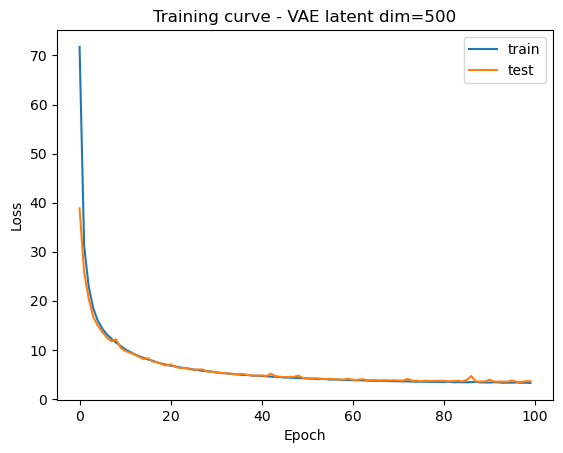

#### latent ndims = 525 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.19it/s]


Epoch [1/100] Train Loss: 69.5676
Epoch [1/100] Test Loss: 37.0286
✅ Best model saved at epoch 1 with test loss: 37.0286


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [2/100] Train Loss: 31.0251
Epoch [2/100] Test Loss: 26.1770
✅ Best model saved at epoch 2 with test loss: 26.1770


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.19it/s]


Epoch [3/100] Train Loss: 23.3561
Epoch [3/100] Test Loss: 20.8412
✅ Best model saved at epoch 3 with test loss: 20.8412


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.46it/s]


Epoch [4/100] Train Loss: 19.0858
Epoch [4/100] Test Loss: 17.5310
✅ Best model saved at epoch 4 with test loss: 17.5310


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.58it/s]


Epoch [5/100] Train Loss: 16.3470
Epoch [5/100] Test Loss: 15.4384
✅ Best model saved at epoch 5 with test loss: 15.4384


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.17it/s]


Epoch [6/100] Train Loss: 14.4408
Epoch [6/100] Test Loss: 14.5630
✅ Best model saved at epoch 6 with test loss: 14.5630


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.28it/s]


Epoch [7/100] Train Loss: 13.0062
Epoch [7/100] Test Loss: 12.9067
✅ Best model saved at epoch 7 with test loss: 12.9067


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.06it/s]


Epoch [8/100] Train Loss: 11.9572
Epoch [8/100] Test Loss: 11.2849
✅ Best model saved at epoch 8 with test loss: 11.2849


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.93it/s]


Epoch [9/100] Train Loss: 11.1431
Epoch [9/100] Test Loss: 10.9008
✅ Best model saved at epoch 9 with test loss: 10.9008


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.06it/s]


Epoch [10/100] Train Loss: 10.4461
Epoch [10/100] Test Loss: 10.1096
✅ Best model saved at epoch 10 with test loss: 10.1096


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [11/100] Train Loss: 9.8266
Epoch [11/100] Test Loss: 9.4915
✅ Best model saved at epoch 11 with test loss: 9.4915


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.69it/s]


Epoch [12/100] Train Loss: 9.2574
Epoch [12/100] Test Loss: 9.0203
✅ Best model saved at epoch 12 with test loss: 9.0203


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.29it/s]


Epoch [13/100] Train Loss: 8.8199
Epoch [13/100] Test Loss: 8.8267
✅ Best model saved at epoch 13 with test loss: 8.8267


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.97it/s]


Epoch [14/100] Train Loss: 8.3115
Epoch [14/100] Test Loss: 8.0506
✅ Best model saved at epoch 14 with test loss: 8.0506


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.27it/s]


Epoch [15/100] Train Loss: 7.9012
Epoch [15/100] Test Loss: 7.6767
✅ Best model saved at epoch 15 with test loss: 7.6767


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.44it/s]


Epoch [16/100] Train Loss: 7.5886
Epoch [16/100] Test Loss: 7.4053
✅ Best model saved at epoch 16 with test loss: 7.4053


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.95it/s]


Epoch [17/100] Train Loss: 7.2520
Epoch [17/100] Test Loss: 7.0583
✅ Best model saved at epoch 17 with test loss: 7.0583


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.47it/s]


Epoch [18/100] Train Loss: 6.9901
Epoch [18/100] Test Loss: 6.7980
✅ Best model saved at epoch 18 with test loss: 6.7980


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.24it/s]


Epoch [19/100] Train Loss: 6.7196
Epoch [19/100] Test Loss: 7.1845


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.72it/s]


Epoch [20/100] Train Loss: 6.5482
Epoch [20/100] Test Loss: 6.4219
✅ Best model saved at epoch 20 with test loss: 6.4219


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.68it/s]


Epoch [21/100] Train Loss: 6.3491
Epoch [21/100] Test Loss: 6.2443
✅ Best model saved at epoch 21 with test loss: 6.2443


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.96it/s]


Epoch [22/100] Train Loss: 6.1150
Epoch [22/100] Test Loss: 6.0440
✅ Best model saved at epoch 22 with test loss: 6.0440


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.33it/s]


Epoch [23/100] Train Loss: 5.9793
Epoch [23/100] Test Loss: 5.8522
✅ Best model saved at epoch 23 with test loss: 5.8522


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.05it/s]


Epoch [24/100] Train Loss: 5.8219
Epoch [24/100] Test Loss: 5.7190
✅ Best model saved at epoch 24 with test loss: 5.7190


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.46it/s]


Epoch [25/100] Train Loss: 5.7171
Epoch [25/100] Test Loss: 5.5818
✅ Best model saved at epoch 25 with test loss: 5.5818


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.47it/s]


Epoch [26/100] Train Loss: 5.5080
Epoch [26/100] Test Loss: 5.4151
✅ Best model saved at epoch 26 with test loss: 5.4151


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.66it/s]


Epoch [27/100] Train Loss: 5.3707
Epoch [27/100] Test Loss: 5.4575


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.13it/s]


Epoch [28/100] Train Loss: 5.2697
Epoch [28/100] Test Loss: 5.1904
✅ Best model saved at epoch 28 with test loss: 5.1904


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.71it/s]


Epoch [29/100] Train Loss: 5.1020
Epoch [29/100] Test Loss: 5.1870
✅ Best model saved at epoch 29 with test loss: 5.1870


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.84it/s]


Epoch [30/100] Train Loss: 5.0271
Epoch [30/100] Test Loss: 5.0176
✅ Best model saved at epoch 30 with test loss: 5.0176


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.30it/s]


Epoch [31/100] Train Loss: 4.9393
Epoch [31/100] Test Loss: 5.0171
✅ Best model saved at epoch 31 with test loss: 5.0171


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.61it/s]


Epoch [32/100] Train Loss: 4.8156
Epoch [32/100] Test Loss: 4.9721
✅ Best model saved at epoch 32 with test loss: 4.9721


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.75it/s]


Epoch [33/100] Train Loss: 4.7423
Epoch [33/100] Test Loss: 4.7671
✅ Best model saved at epoch 33 with test loss: 4.7671


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.29it/s]


Epoch [34/100] Train Loss: 4.6763
Epoch [34/100] Test Loss: 4.6329
✅ Best model saved at epoch 34 with test loss: 4.6329


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.47it/s]


Epoch [35/100] Train Loss: 4.5764
Epoch [35/100] Test Loss: 4.5383
✅ Best model saved at epoch 35 with test loss: 4.5383


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.85it/s]


Epoch [36/100] Train Loss: 4.5810
Epoch [36/100] Test Loss: 4.4376
✅ Best model saved at epoch 36 with test loss: 4.4376


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.99it/s]


Epoch [37/100] Train Loss: 4.3830
Epoch [37/100] Test Loss: 4.4236
✅ Best model saved at epoch 37 with test loss: 4.4236


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.68it/s]


Epoch [38/100] Train Loss: 4.3593
Epoch [38/100] Test Loss: 4.4042
✅ Best model saved at epoch 38 with test loss: 4.4042


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.17it/s]


Epoch [39/100] Train Loss: 4.2620
Epoch [39/100] Test Loss: 4.3489
✅ Best model saved at epoch 39 with test loss: 4.3489


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.43it/s]


Epoch [40/100] Train Loss: 4.2497
Epoch [40/100] Test Loss: 4.8588


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [41/100] Train Loss: 4.1694
Epoch [41/100] Test Loss: 4.3775


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.04it/s]


Epoch [42/100] Train Loss: 4.1208
Epoch [42/100] Test Loss: 4.0825
✅ Best model saved at epoch 42 with test loss: 4.0825


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.12it/s]


Epoch [43/100] Train Loss: 4.0619
Epoch [43/100] Test Loss: 4.3749


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.80it/s]


Epoch [44/100] Train Loss: 4.0309
Epoch [44/100] Test Loss: 4.0805
✅ Best model saved at epoch 44 with test loss: 4.0805


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.98it/s]


Epoch [45/100] Train Loss: 3.9770
Epoch [45/100] Test Loss: 4.2072


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.08it/s]


Epoch [46/100] Train Loss: 3.9441
Epoch [46/100] Test Loss: 3.9203
✅ Best model saved at epoch 46 with test loss: 3.9203


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.84it/s]


Epoch [47/100] Train Loss: 3.8630
Epoch [47/100] Test Loss: 4.3681


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.67it/s]


Epoch [48/100] Train Loss: 3.9086
Epoch [48/100] Test Loss: 3.8163
✅ Best model saved at epoch 48 with test loss: 3.8163


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.18it/s]


Epoch [49/100] Train Loss: 3.7729
Epoch [49/100] Test Loss: 3.8183


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.74it/s]


Epoch [50/100] Train Loss: 3.7470
Epoch [50/100] Test Loss: 3.8954


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.76it/s]


Epoch [51/100] Train Loss: 3.7195
Epoch [51/100] Test Loss: 3.9688


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.23it/s]


Epoch [52/100] Train Loss: 3.6856
Epoch [52/100] Test Loss: 3.7354
✅ Best model saved at epoch 52 with test loss: 3.7354


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.75it/s]


Epoch [53/100] Train Loss: 3.6814
Epoch [53/100] Test Loss: 3.6777
✅ Best model saved at epoch 53 with test loss: 3.6777


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.15it/s]


Epoch [54/100] Train Loss: 3.5913
Epoch [54/100] Test Loss: 3.6700
✅ Best model saved at epoch 54 with test loss: 3.6700


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.15it/s]


Epoch [55/100] Train Loss: 3.6640
Epoch [55/100] Test Loss: 3.6945


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.84it/s]


Epoch [56/100] Train Loss: 3.5906
Epoch [56/100] Test Loss: 4.1715


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.32it/s]


Epoch [57/100] Train Loss: 3.5062
Epoch [57/100] Test Loss: 3.7756


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.36it/s]


Epoch [58/100] Train Loss: 3.4948
Epoch [58/100] Test Loss: 3.8101


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.56it/s]


Epoch [59/100] Train Loss: 3.4980
Epoch [59/100] Test Loss: 3.7455


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.95it/s]


Epoch [60/100] Train Loss: 3.4502
Epoch [60/100] Test Loss: 3.6796


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.30it/s]


Epoch [61/100] Train Loss: 3.4301
Epoch [61/100] Test Loss: 3.5241
✅ Best model saved at epoch 61 with test loss: 3.5241


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.84it/s]


Epoch [62/100] Train Loss: 3.4000
Epoch [62/100] Test Loss: 3.6521


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.83it/s]


Epoch [63/100] Train Loss: 3.3879
Epoch [63/100] Test Loss: 3.5858


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.99it/s]


Epoch [64/100] Train Loss: 3.3853
Epoch [64/100] Test Loss: 3.4822
✅ Best model saved at epoch 64 with test loss: 3.4822


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.04it/s]


Epoch [65/100] Train Loss: 3.3539
Epoch [65/100] Test Loss: 3.4152
✅ Best model saved at epoch 65 with test loss: 3.4152


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [66/100] Train Loss: 3.3087
Epoch [66/100] Test Loss: 3.5196


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.59it/s]


Epoch [67/100] Train Loss: 3.3202
Epoch [67/100] Test Loss: 3.4110
✅ Best model saved at epoch 67 with test loss: 3.4110


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.05it/s]


Epoch [68/100] Train Loss: 3.3036
Epoch [68/100] Test Loss: 3.5282


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.21it/s]


Epoch [69/100] Train Loss: 3.2771
Epoch [69/100] Test Loss: 3.3723
✅ Best model saved at epoch 69 with test loss: 3.3723


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.33it/s]


Epoch [70/100] Train Loss: 3.2536
Epoch [70/100] Test Loss: 3.4317


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [71/100] Train Loss: 3.2633
Epoch [71/100] Test Loss: 3.3147
✅ Best model saved at epoch 71 with test loss: 3.3147


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.72it/s]


Epoch [72/100] Train Loss: 3.2203
Epoch [72/100] Test Loss: 3.3985


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.58it/s]


Epoch [73/100] Train Loss: 3.2831
Epoch [73/100] Test Loss: 3.3552


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.19it/s]


Epoch [74/100] Train Loss: 3.1395
Epoch [74/100] Test Loss: 3.3437


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.79it/s]


Epoch [75/100] Train Loss: 3.1906
Epoch [75/100] Test Loss: 3.3107
✅ Best model saved at epoch 75 with test loss: 3.3107


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.79it/s]


Epoch [76/100] Train Loss: 3.2121
Epoch [76/100] Test Loss: 3.3100
✅ Best model saved at epoch 76 with test loss: 3.3100


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.76it/s]


Epoch [77/100] Train Loss: 3.1538
Epoch [77/100] Test Loss: 3.4442


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.05it/s]


Epoch [78/100] Train Loss: 3.1661
Epoch [78/100] Test Loss: 3.2427
✅ Best model saved at epoch 78 with test loss: 3.2427


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.83it/s]


Epoch [79/100] Train Loss: 3.1442
Epoch [79/100] Test Loss: 3.2893


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.87it/s]


Epoch [80/100] Train Loss: 3.1413
Epoch [80/100] Test Loss: 3.2462


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.57it/s]


Epoch [81/100] Train Loss: 3.1257
Epoch [81/100] Test Loss: 3.2048
✅ Best model saved at epoch 81 with test loss: 3.2048


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.26it/s]


Epoch [82/100] Train Loss: 3.0947
Epoch [82/100] Test Loss: 3.2843


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.75it/s]


Epoch [83/100] Train Loss: 3.1247
Epoch [83/100] Test Loss: 3.2633


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.38it/s]


Epoch [84/100] Train Loss: 3.0918
Epoch [84/100] Test Loss: 3.3134


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.91it/s]


Epoch [85/100] Train Loss: 3.0648
Epoch [85/100] Test Loss: 3.2617


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.13it/s]


Epoch [86/100] Train Loss: 3.0942
Epoch [86/100] Test Loss: 3.2332


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.21it/s]


Epoch [87/100] Train Loss: 3.0568
Epoch [87/100] Test Loss: 3.2350


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.76it/s]


Epoch [88/100] Train Loss: 3.0688
Epoch [88/100] Test Loss: 3.3153


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.53it/s]


Epoch [89/100] Train Loss: 3.0627
Epoch [89/100] Test Loss: 3.2174


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.67it/s]


Epoch [90/100] Train Loss: 3.0387
Epoch [90/100] Test Loss: 3.2266


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.69it/s]


Epoch [91/100] Train Loss: 3.0272
Epoch [91/100] Test Loss: 3.1773
✅ Best model saved at epoch 91 with test loss: 3.1773


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.71it/s]


Epoch [92/100] Train Loss: 3.0261
Epoch [92/100] Test Loss: 3.2128


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.59it/s]


Epoch [93/100] Train Loss: 3.0185
Epoch [93/100] Test Loss: 3.2245


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.47it/s]


Epoch [94/100] Train Loss: 3.0179
Epoch [94/100] Test Loss: 3.2039


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.79it/s]


Epoch [95/100] Train Loss: 3.0537
Epoch [95/100] Test Loss: 3.1779


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.57it/s]


Epoch [96/100] Train Loss: 2.9770
Epoch [96/100] Test Loss: 3.1529
✅ Best model saved at epoch 96 with test loss: 3.1529


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.04it/s]


Epoch [97/100] Train Loss: 3.0242
Epoch [97/100] Test Loss: 3.1644


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.08it/s]


Epoch [98/100] Train Loss: 2.9771
Epoch [98/100] Test Loss: 3.2071


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.70it/s]


Epoch [99/100] Train Loss: 2.9814
Epoch [99/100] Test Loss: 3.3968


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.01it/s]


Epoch [100/100] Train Loss: 3.0120
Epoch [100/100] Test Loss: 3.1611


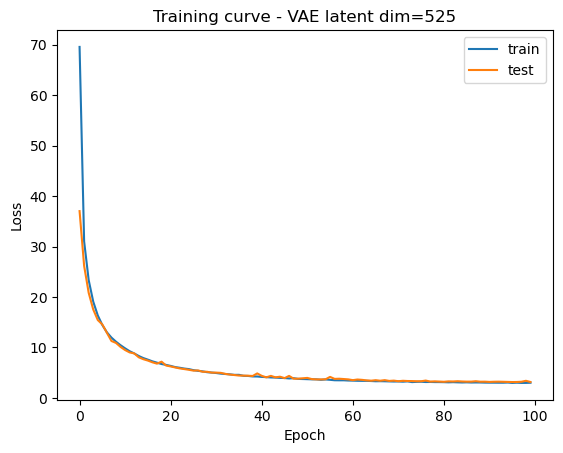

#### latent ndims = 550 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.59it/s]


Epoch [1/100] Train Loss: 69.4986
Epoch [1/100] Test Loss: 35.8174
✅ Best model saved at epoch 1 with test loss: 35.8174


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.30it/s]


Epoch [2/100] Train Loss: 30.0440
Epoch [2/100] Test Loss: 25.7300
✅ Best model saved at epoch 2 with test loss: 25.7300


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.42it/s]


Epoch [3/100] Train Loss: 22.7546
Epoch [3/100] Test Loss: 20.2717
✅ Best model saved at epoch 3 with test loss: 20.2717


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.12it/s]


Epoch [4/100] Train Loss: 18.6539
Epoch [4/100] Test Loss: 17.1292
✅ Best model saved at epoch 4 with test loss: 17.1292


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.96it/s]


Epoch [5/100] Train Loss: 16.0667
Epoch [5/100] Test Loss: 14.8596
✅ Best model saved at epoch 5 with test loss: 14.8596


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.65it/s]


Epoch [6/100] Train Loss: 14.2454
Epoch [6/100] Test Loss: 13.6047
✅ Best model saved at epoch 6 with test loss: 13.6047


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.48it/s]


Epoch [7/100] Train Loss: 13.1184
Epoch [7/100] Test Loss: 12.8157
✅ Best model saved at epoch 7 with test loss: 12.8157


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.81it/s]


Epoch [8/100] Train Loss: 12.0223
Epoch [8/100] Test Loss: 11.6243
✅ Best model saved at epoch 8 with test loss: 11.6243


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.41it/s]


Epoch [9/100] Train Loss: 11.1732
Epoch [9/100] Test Loss: 10.6769
✅ Best model saved at epoch 9 with test loss: 10.6769


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.98it/s]


Epoch [10/100] Train Loss: 10.4155
Epoch [10/100] Test Loss: 10.1822
✅ Best model saved at epoch 10 with test loss: 10.1822


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.56it/s]


Epoch [11/100] Train Loss: 9.9010
Epoch [11/100] Test Loss: 9.5464
✅ Best model saved at epoch 11 with test loss: 9.5464


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.55it/s]


Epoch [12/100] Train Loss: 9.3627
Epoch [12/100] Test Loss: 9.0545
✅ Best model saved at epoch 12 with test loss: 9.0545


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.02it/s]


Epoch [13/100] Train Loss: 8.9871
Epoch [13/100] Test Loss: 8.7739
✅ Best model saved at epoch 13 with test loss: 8.7739


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.19it/s]


Epoch [14/100] Train Loss: 8.6426
Epoch [14/100] Test Loss: 8.4022
✅ Best model saved at epoch 14 with test loss: 8.4022


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.23it/s]


Epoch [15/100] Train Loss: 8.2673
Epoch [15/100] Test Loss: 8.0407
✅ Best model saved at epoch 15 with test loss: 8.0407


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.74it/s]


Epoch [16/100] Train Loss: 7.8828
Epoch [16/100] Test Loss: 7.7749
✅ Best model saved at epoch 16 with test loss: 7.7749


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.31it/s]


Epoch [17/100] Train Loss: 7.6226
Epoch [17/100] Test Loss: 7.5237
✅ Best model saved at epoch 17 with test loss: 7.5237


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.35it/s]


Epoch [18/100] Train Loss: 7.3201
Epoch [18/100] Test Loss: 7.1555
✅ Best model saved at epoch 18 with test loss: 7.1555


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.99it/s]


Epoch [19/100] Train Loss: 7.0431
Epoch [19/100] Test Loss: 6.8679
✅ Best model saved at epoch 19 with test loss: 6.8679


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.25it/s]


Epoch [20/100] Train Loss: 6.8230
Epoch [20/100] Test Loss: 6.6560
✅ Best model saved at epoch 20 with test loss: 6.6560


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.10it/s]


Epoch [21/100] Train Loss: 6.6411
Epoch [21/100] Test Loss: 6.5722
✅ Best model saved at epoch 21 with test loss: 6.5722


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.99it/s]


Epoch [22/100] Train Loss: 6.4479
Epoch [22/100] Test Loss: 6.3882
✅ Best model saved at epoch 22 with test loss: 6.3882


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.13it/s]


Epoch [23/100] Train Loss: 6.2678
Epoch [23/100] Test Loss: 6.3858
✅ Best model saved at epoch 23 with test loss: 6.3858


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.78it/s]


Epoch [24/100] Train Loss: 6.0955
Epoch [24/100] Test Loss: 6.1941
✅ Best model saved at epoch 24 with test loss: 6.1941


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [25/100] Train Loss: 5.9812
Epoch [25/100] Test Loss: 5.8677
✅ Best model saved at epoch 25 with test loss: 5.8677


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.80it/s]


Epoch [26/100] Train Loss: 5.7948
Epoch [26/100] Test Loss: 5.6941
✅ Best model saved at epoch 26 with test loss: 5.6941


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.89it/s]


Epoch [27/100] Train Loss: 5.6558
Epoch [27/100] Test Loss: 5.5664
✅ Best model saved at epoch 27 with test loss: 5.5664


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.10it/s]


Epoch [28/100] Train Loss: 5.5245
Epoch [28/100] Test Loss: 5.4780
✅ Best model saved at epoch 28 with test loss: 5.4780


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [29/100] Train Loss: 5.4250
Epoch [29/100] Test Loss: 5.3945
✅ Best model saved at epoch 29 with test loss: 5.3945


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.30it/s]


Epoch [30/100] Train Loss: 5.3312
Epoch [30/100] Test Loss: 5.3045
✅ Best model saved at epoch 30 with test loss: 5.3045


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.52it/s]


Epoch [31/100] Train Loss: 5.2159
Epoch [31/100] Test Loss: 5.2106
✅ Best model saved at epoch 31 with test loss: 5.2106


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.29it/s]


Epoch [32/100] Train Loss: 5.0885
Epoch [32/100] Test Loss: 5.0745
✅ Best model saved at epoch 32 with test loss: 5.0745


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.75it/s]


Epoch [33/100] Train Loss: 4.9955
Epoch [33/100] Test Loss: 5.0731
✅ Best model saved at epoch 33 with test loss: 5.0731


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.43it/s]


Epoch [34/100] Train Loss: 4.9666
Epoch [34/100] Test Loss: 4.9673
✅ Best model saved at epoch 34 with test loss: 4.9673


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.71it/s]


Epoch [35/100] Train Loss: 4.8408
Epoch [35/100] Test Loss: 5.3635


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.10it/s]


Epoch [36/100] Train Loss: 4.9043
Epoch [36/100] Test Loss: 4.7508
✅ Best model saved at epoch 36 with test loss: 4.7508


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.33it/s]


Epoch [37/100] Train Loss: 4.6639
Epoch [37/100] Test Loss: 4.7254
✅ Best model saved at epoch 37 with test loss: 4.7254


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.35it/s]


Epoch [38/100] Train Loss: 4.6435
Epoch [38/100] Test Loss: 4.6553
✅ Best model saved at epoch 38 with test loss: 4.6553


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.30it/s]


Epoch [39/100] Train Loss: 4.5608
Epoch [39/100] Test Loss: 4.6742


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.00it/s]


Epoch [40/100] Train Loss: 4.5139
Epoch [40/100] Test Loss: 4.5278
✅ Best model saved at epoch 40 with test loss: 4.5278


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.80it/s]


Epoch [41/100] Train Loss: 4.4249
Epoch [41/100] Test Loss: 4.3986
✅ Best model saved at epoch 41 with test loss: 4.3986


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.51it/s]


Epoch [42/100] Train Loss: 4.3906
Epoch [42/100] Test Loss: 4.4144


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [43/100] Train Loss: 4.2929
Epoch [43/100] Test Loss: 4.4145


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.06it/s]


Epoch [44/100] Train Loss: 4.2142
Epoch [44/100] Test Loss: 4.2753
✅ Best model saved at epoch 44 with test loss: 4.2753


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.72it/s]


Epoch [45/100] Train Loss: 4.1939
Epoch [45/100] Test Loss: 4.2971


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.08it/s]


Epoch [46/100] Train Loss: 4.1147
Epoch [46/100] Test Loss: 4.1652
✅ Best model saved at epoch 46 with test loss: 4.1652


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.84it/s]


Epoch [47/100] Train Loss: 4.0780
Epoch [47/100] Test Loss: 4.2588


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.90it/s]


Epoch [48/100] Train Loss: 4.0714
Epoch [48/100] Test Loss: 4.1035
✅ Best model saved at epoch 48 with test loss: 4.1035


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.39it/s]


Epoch [49/100] Train Loss: 3.9510
Epoch [49/100] Test Loss: 3.9625
✅ Best model saved at epoch 49 with test loss: 3.9625


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.80it/s]


Epoch [50/100] Train Loss: 3.9033
Epoch [50/100] Test Loss: 3.9348
✅ Best model saved at epoch 50 with test loss: 3.9348


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.87it/s]


Epoch [51/100] Train Loss: 3.8901
Epoch [51/100] Test Loss: 4.0339


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.69it/s]


Epoch [52/100] Train Loss: 3.8283
Epoch [52/100] Test Loss: 3.8889
✅ Best model saved at epoch 52 with test loss: 3.8889


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.65it/s]


Epoch [53/100] Train Loss: 3.7807
Epoch [53/100] Test Loss: 3.7996
✅ Best model saved at epoch 53 with test loss: 3.7996


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.77it/s]


Epoch [54/100] Train Loss: 3.7508
Epoch [54/100] Test Loss: 3.7802
✅ Best model saved at epoch 54 with test loss: 3.7802


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.35it/s]


Epoch [55/100] Train Loss: 3.7202
Epoch [55/100] Test Loss: 3.8636


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.25it/s]


Epoch [56/100] Train Loss: 3.6666
Epoch [56/100] Test Loss: 3.7209
✅ Best model saved at epoch 56 with test loss: 3.7209


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.79it/s]


Epoch [57/100] Train Loss: 3.6543
Epoch [57/100] Test Loss: 3.8892


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [58/100] Train Loss: 3.6572
Epoch [58/100] Test Loss: 3.7139
✅ Best model saved at epoch 58 with test loss: 3.7139


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.52it/s]


Epoch [59/100] Train Loss: 3.5764
Epoch [59/100] Test Loss: 3.6125
✅ Best model saved at epoch 59 with test loss: 3.6125


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.12it/s]


Epoch [60/100] Train Loss: 3.5527
Epoch [60/100] Test Loss: 3.5944
✅ Best model saved at epoch 60 with test loss: 3.5944


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.50it/s]


Epoch [61/100] Train Loss: 3.5360
Epoch [61/100] Test Loss: 3.6056


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.55it/s]


Epoch [62/100] Train Loss: 3.4952
Epoch [62/100] Test Loss: 3.5191
✅ Best model saved at epoch 62 with test loss: 3.5191


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.77it/s]


Epoch [63/100] Train Loss: 3.4616
Epoch [63/100] Test Loss: 3.5192


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.78it/s]


Epoch [64/100] Train Loss: 3.4498
Epoch [64/100] Test Loss: 3.6228


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.63it/s]


Epoch [65/100] Train Loss: 3.4125
Epoch [65/100] Test Loss: 3.4895
✅ Best model saved at epoch 65 with test loss: 3.4895


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.17it/s]


Epoch [66/100] Train Loss: 3.3822
Epoch [66/100] Test Loss: 3.4177
✅ Best model saved at epoch 66 with test loss: 3.4177


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.47it/s]


Epoch [67/100] Train Loss: 3.3755
Epoch [67/100] Test Loss: 3.6228


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.44it/s]


Epoch [68/100] Train Loss: 3.3640
Epoch [68/100] Test Loss: 3.4700


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.68it/s]


Epoch [69/100] Train Loss: 3.3090
Epoch [69/100] Test Loss: 3.3698
✅ Best model saved at epoch 69 with test loss: 3.3698


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.54it/s]


Epoch [70/100] Train Loss: 3.3031
Epoch [70/100] Test Loss: 3.3617
✅ Best model saved at epoch 70 with test loss: 3.3617


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.50it/s]


Epoch [71/100] Train Loss: 3.2903
Epoch [71/100] Test Loss: 3.3641


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.37it/s]


Epoch [72/100] Train Loss: 3.2418
Epoch [72/100] Test Loss: 3.3988


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.22it/s]


Epoch [73/100] Train Loss: 3.2324
Epoch [73/100] Test Loss: 3.3337
✅ Best model saved at epoch 73 with test loss: 3.3337


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.24it/s]


Epoch [74/100] Train Loss: 3.2270
Epoch [74/100] Test Loss: 3.3451


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.22it/s]


Epoch [75/100] Train Loss: 3.2070
Epoch [75/100] Test Loss: 3.2638
✅ Best model saved at epoch 75 with test loss: 3.2638


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.60it/s]


Epoch [76/100] Train Loss: 3.1902
Epoch [76/100] Test Loss: 3.2838


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.11it/s]


Epoch [77/100] Train Loss: 3.1586
Epoch [77/100] Test Loss: 3.3333


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.19it/s]


Epoch [78/100] Train Loss: 3.1611
Epoch [78/100] Test Loss: 3.3605


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.28it/s]


Epoch [79/100] Train Loss: 3.1379
Epoch [79/100] Test Loss: 3.2316
✅ Best model saved at epoch 79 with test loss: 3.2316


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.18it/s]


Epoch [80/100] Train Loss: 3.1224
Epoch [80/100] Test Loss: 3.2172
✅ Best model saved at epoch 80 with test loss: 3.2172


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.98it/s]


Epoch [81/100] Train Loss: 3.1106
Epoch [81/100] Test Loss: 3.3092


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.08it/s]


Epoch [82/100] Train Loss: 3.1231
Epoch [82/100] Test Loss: 3.2153
✅ Best model saved at epoch 82 with test loss: 3.2153


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.74it/s]


Epoch [83/100] Train Loss: 3.0713
Epoch [83/100] Test Loss: 3.2229


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.38it/s]


Epoch [84/100] Train Loss: 3.0560
Epoch [84/100] Test Loss: 3.2126
✅ Best model saved at epoch 84 with test loss: 3.2126


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.91it/s]


Epoch [85/100] Train Loss: 3.0602
Epoch [85/100] Test Loss: 3.1743
✅ Best model saved at epoch 85 with test loss: 3.1743


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.68it/s]


Epoch [86/100] Train Loss: 3.0463
Epoch [86/100] Test Loss: 3.2013


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.90it/s]


Epoch [87/100] Train Loss: 3.0372
Epoch [87/100] Test Loss: 3.1106
✅ Best model saved at epoch 87 with test loss: 3.1106


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.03it/s]


Epoch [88/100] Train Loss: 3.0456
Epoch [88/100] Test Loss: 3.2027


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.20it/s]


Epoch [89/100] Train Loss: 2.9917
Epoch [89/100] Test Loss: 3.1291


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.36it/s]


Epoch [90/100] Train Loss: 3.0142
Epoch [90/100] Test Loss: 3.2233


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.10it/s]


Epoch [91/100] Train Loss: 3.0024
Epoch [91/100] Test Loss: 3.1397


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.24it/s]


Epoch [92/100] Train Loss: 2.9865
Epoch [92/100] Test Loss: 3.1223


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.09it/s]


Epoch [93/100] Train Loss: 2.9916
Epoch [93/100] Test Loss: 3.2454


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.99it/s]


Epoch [94/100] Train Loss: 2.9780
Epoch [94/100] Test Loss: 3.1471


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.73it/s]


Epoch [95/100] Train Loss: 2.9446
Epoch [95/100] Test Loss: 3.0877
✅ Best model saved at epoch 95 with test loss: 3.0877


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.69it/s]


Epoch [96/100] Train Loss: 2.9676
Epoch [96/100] Test Loss: 3.0349
✅ Best model saved at epoch 96 with test loss: 3.0349


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.42it/s]


Epoch [97/100] Train Loss: 2.9740
Epoch [97/100] Test Loss: 3.1852


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.16it/s]


Epoch [98/100] Train Loss: 2.9497
Epoch [98/100] Test Loss: 3.1604


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.39it/s]


Epoch [99/100] Train Loss: 2.9244
Epoch [99/100] Test Loss: 3.1084


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.64it/s]


Epoch [100/100] Train Loss: 2.9267
Epoch [100/100] Test Loss: 3.0552


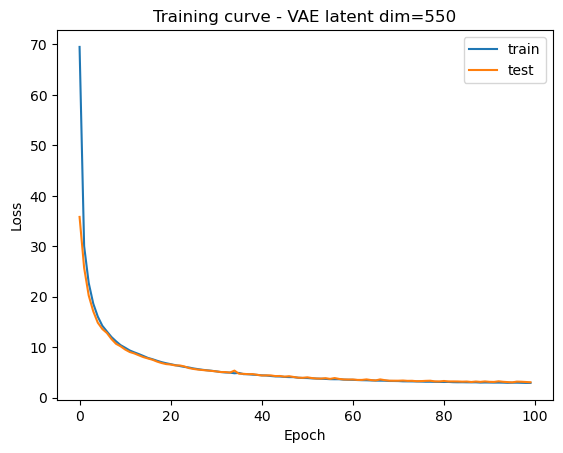

#### latent ndims = 575 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.06it/s]


Epoch [1/100] Train Loss: 71.3282
Epoch [1/100] Test Loss: 37.5484
✅ Best model saved at epoch 1 with test loss: 37.5484


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.31it/s]


Epoch [2/100] Train Loss: 30.9718
Epoch [2/100] Test Loss: 25.7131
✅ Best model saved at epoch 2 with test loss: 25.7131


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.43it/s]


Epoch [3/100] Train Loss: 22.9808
Epoch [3/100] Test Loss: 20.5243
✅ Best model saved at epoch 3 with test loss: 20.5243


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.61it/s]


Epoch [4/100] Train Loss: 18.8149
Epoch [4/100] Test Loss: 17.2942
✅ Best model saved at epoch 4 with test loss: 17.2942


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [5/100] Train Loss: 16.2294
Epoch [5/100] Test Loss: 15.3669
✅ Best model saved at epoch 5 with test loss: 15.3669


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.89it/s]


Epoch [6/100] Train Loss: 14.4987
Epoch [6/100] Test Loss: 14.1496
✅ Best model saved at epoch 6 with test loss: 14.1496


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.33it/s]


Epoch [7/100] Train Loss: 13.4243
Epoch [7/100] Test Loss: 13.1066
✅ Best model saved at epoch 7 with test loss: 13.1066


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.62it/s]


Epoch [8/100] Train Loss: 12.4182
Epoch [8/100] Test Loss: 11.9067
✅ Best model saved at epoch 8 with test loss: 11.9067


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.89it/s]


Epoch [9/100] Train Loss: 11.4636
Epoch [9/100] Test Loss: 11.0441
✅ Best model saved at epoch 9 with test loss: 11.0441


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.12it/s]


Epoch [10/100] Train Loss: 10.7273
Epoch [10/100] Test Loss: 10.2845
✅ Best model saved at epoch 10 with test loss: 10.2845


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.41it/s]


Epoch [11/100] Train Loss: 10.0038
Epoch [11/100] Test Loss: 9.8553
✅ Best model saved at epoch 11 with test loss: 9.8553


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.48it/s]


Epoch [12/100] Train Loss: 9.4667
Epoch [12/100] Test Loss: 9.1874
✅ Best model saved at epoch 12 with test loss: 9.1874


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.10it/s]


Epoch [13/100] Train Loss: 9.0818
Epoch [13/100] Test Loss: 8.9638
✅ Best model saved at epoch 13 with test loss: 8.9638


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.40it/s]


Epoch [14/100] Train Loss: 8.5666
Epoch [14/100] Test Loss: 8.3496
✅ Best model saved at epoch 14 with test loss: 8.3496


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.13it/s]


Epoch [15/100] Train Loss: 8.1889
Epoch [15/100] Test Loss: 7.9579
✅ Best model saved at epoch 15 with test loss: 7.9579


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.89it/s]


Epoch [16/100] Train Loss: 7.8142
Epoch [16/100] Test Loss: 7.6314
✅ Best model saved at epoch 16 with test loss: 7.6314


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.21it/s]


Epoch [17/100] Train Loss: 7.4428
Epoch [17/100] Test Loss: 7.4237
✅ Best model saved at epoch 17 with test loss: 7.4237


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.25it/s]


Epoch [18/100] Train Loss: 7.3637
Epoch [18/100] Test Loss: 7.0314
✅ Best model saved at epoch 18 with test loss: 7.0314


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.79it/s]


Epoch [19/100] Train Loss: 6.8682
Epoch [19/100] Test Loss: 6.7409
✅ Best model saved at epoch 19 with test loss: 6.7409


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.08it/s]


Epoch [20/100] Train Loss: 6.6432
Epoch [20/100] Test Loss: 6.6112
✅ Best model saved at epoch 20 with test loss: 6.6112


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.20it/s]


Epoch [21/100] Train Loss: 6.4373
Epoch [21/100] Test Loss: 6.7565


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.55it/s]


Epoch [22/100] Train Loss: 6.2161
Epoch [22/100] Test Loss: 6.0958
✅ Best model saved at epoch 22 with test loss: 6.0958


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.21it/s]


Epoch [23/100] Train Loss: 6.0319
Epoch [23/100] Test Loss: 6.0303
✅ Best model saved at epoch 23 with test loss: 6.0303


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.53it/s]


Epoch [24/100] Train Loss: 5.8918
Epoch [24/100] Test Loss: 5.9167
✅ Best model saved at epoch 24 with test loss: 5.9167


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.76it/s]


Epoch [25/100] Train Loss: 5.6765
Epoch [25/100] Test Loss: 5.6423
✅ Best model saved at epoch 25 with test loss: 5.6423


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [26/100] Train Loss: 5.5756
Epoch [26/100] Test Loss: 5.7079


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.88it/s]


Epoch [27/100] Train Loss: 5.4182
Epoch [27/100] Test Loss: 5.4291
✅ Best model saved at epoch 27 with test loss: 5.4291


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.15it/s]


Epoch [28/100] Train Loss: 5.3107
Epoch [28/100] Test Loss: 5.4511


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.29it/s]


Epoch [29/100] Train Loss: 5.1890
Epoch [29/100] Test Loss: 5.0522
✅ Best model saved at epoch 29 with test loss: 5.0522


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.42it/s]


Epoch [30/100] Train Loss: 5.0275
Epoch [30/100] Test Loss: 5.9021


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.36it/s]


Epoch [31/100] Train Loss: 4.9234
Epoch [31/100] Test Loss: 4.8280
✅ Best model saved at epoch 31 with test loss: 4.8280


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.37it/s]


Epoch [32/100] Train Loss: 4.8137
Epoch [32/100] Test Loss: 4.7383
✅ Best model saved at epoch 32 with test loss: 4.7383


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.82it/s]


Epoch [33/100] Train Loss: 4.7170
Epoch [33/100] Test Loss: 4.6023
✅ Best model saved at epoch 33 with test loss: 4.6023


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.45it/s]


Epoch [34/100] Train Loss: 4.6746
Epoch [34/100] Test Loss: 4.5950
✅ Best model saved at epoch 34 with test loss: 4.5950


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.56it/s]


Epoch [35/100] Train Loss: 4.5217
Epoch [35/100] Test Loss: 4.4750
✅ Best model saved at epoch 35 with test loss: 4.4750


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.31it/s]


Epoch [36/100] Train Loss: 4.4424
Epoch [36/100] Test Loss: 5.5386


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.15it/s]


Epoch [37/100] Train Loss: 4.4099
Epoch [37/100] Test Loss: 4.6391


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.02it/s]


Epoch [38/100] Train Loss: 4.3092
Epoch [38/100] Test Loss: 4.2872
✅ Best model saved at epoch 38 with test loss: 4.2872


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.25it/s]


Epoch [39/100] Train Loss: 4.2209
Epoch [39/100] Test Loss: 4.3431


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.81it/s]


Epoch [40/100] Train Loss: 4.2386
Epoch [40/100] Test Loss: 4.1632
✅ Best model saved at epoch 40 with test loss: 4.1632


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.00it/s]


Epoch [41/100] Train Loss: 4.0615
Epoch [41/100] Test Loss: 4.0832
✅ Best model saved at epoch 41 with test loss: 4.0832


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.63it/s]


Epoch [42/100] Train Loss: 4.0541
Epoch [42/100] Test Loss: 4.0200
✅ Best model saved at epoch 42 with test loss: 4.0200


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.91it/s]


Epoch [43/100] Train Loss: 3.9974
Epoch [43/100] Test Loss: 3.9974
✅ Best model saved at epoch 43 with test loss: 3.9974


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.29it/s]


Epoch [44/100] Train Loss: 3.9241
Epoch [44/100] Test Loss: 4.5324


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.27it/s]


Epoch [45/100] Train Loss: 3.8645
Epoch [45/100] Test Loss: 3.8618
✅ Best model saved at epoch 45 with test loss: 3.8618


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.62it/s]


Epoch [46/100] Train Loss: 3.8439
Epoch [46/100] Test Loss: 3.8186
✅ Best model saved at epoch 46 with test loss: 3.8186


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.25it/s]


Epoch [47/100] Train Loss: 3.7288
Epoch [47/100] Test Loss: 3.7639
✅ Best model saved at epoch 47 with test loss: 3.7639


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.25it/s]


Epoch [48/100] Train Loss: 3.7118
Epoch [48/100] Test Loss: 3.8884


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.02it/s]


Epoch [49/100] Train Loss: 3.6492
Epoch [49/100] Test Loss: 3.7809


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.37it/s]


Epoch [50/100] Train Loss: 3.6460
Epoch [50/100] Test Loss: 3.9357


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.23it/s]


Epoch [51/100] Train Loss: 3.5813
Epoch [51/100] Test Loss: 3.6048
✅ Best model saved at epoch 51 with test loss: 3.6048


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.07it/s]


Epoch [52/100] Train Loss: 3.5261
Epoch [52/100] Test Loss: 3.5886
✅ Best model saved at epoch 52 with test loss: 3.5886


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.85it/s]


Epoch [53/100] Train Loss: 3.4782
Epoch [53/100] Test Loss: 3.5343
✅ Best model saved at epoch 53 with test loss: 3.5343


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.32it/s]


Epoch [54/100] Train Loss: 3.4823
Epoch [54/100] Test Loss: 3.7928


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.27it/s]


Epoch [55/100] Train Loss: 3.4024
Epoch [55/100] Test Loss: 3.4818
✅ Best model saved at epoch 55 with test loss: 3.4818


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.11it/s]


Epoch [56/100] Train Loss: 3.3691
Epoch [56/100] Test Loss: 3.3712
✅ Best model saved at epoch 56 with test loss: 3.3712


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.73it/s]


Epoch [57/100] Train Loss: 3.3422
Epoch [57/100] Test Loss: 3.4713


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.58it/s]


Epoch [58/100] Train Loss: 3.3304
Epoch [58/100] Test Loss: 3.4513


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.60it/s]


Epoch [59/100] Train Loss: 3.2995
Epoch [59/100] Test Loss: 3.5918


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.52it/s]


Epoch [60/100] Train Loss: 3.2131
Epoch [60/100] Test Loss: 3.3391
✅ Best model saved at epoch 60 with test loss: 3.3391


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.36it/s]


Epoch [61/100] Train Loss: 3.2273
Epoch [61/100] Test Loss: 3.3113
✅ Best model saved at epoch 61 with test loss: 3.3113


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.57it/s]


Epoch [62/100] Train Loss: 3.2172
Epoch [62/100] Test Loss: 3.2872
✅ Best model saved at epoch 62 with test loss: 3.2872


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.68it/s]


Epoch [63/100] Train Loss: 3.1451
Epoch [63/100] Test Loss: 3.2104
✅ Best model saved at epoch 63 with test loss: 3.2104


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.26it/s]


Epoch [64/100] Train Loss: 3.1663
Epoch [64/100] Test Loss: 3.2990


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.90it/s]


Epoch [65/100] Train Loss: 3.1169
Epoch [65/100] Test Loss: 3.1578
✅ Best model saved at epoch 65 with test loss: 3.1578


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.78it/s]


Epoch [66/100] Train Loss: 3.0891
Epoch [66/100] Test Loss: 3.1515
✅ Best model saved at epoch 66 with test loss: 3.1515


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.55it/s]


Epoch [67/100] Train Loss: 3.1861
Epoch [67/100] Test Loss: 3.1364
✅ Best model saved at epoch 67 with test loss: 3.1364


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.50it/s]


Epoch [68/100] Train Loss: 2.9971
Epoch [68/100] Test Loss: 3.2044


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.08it/s]


Epoch [69/100] Train Loss: 3.0424
Epoch [69/100] Test Loss: 3.1054
✅ Best model saved at epoch 69 with test loss: 3.1054


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.60it/s]


Epoch [70/100] Train Loss: 3.0764
Epoch [70/100] Test Loss: 3.1167


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.97it/s]


Epoch [71/100] Train Loss: 3.0009
Epoch [71/100] Test Loss: 3.0596
✅ Best model saved at epoch 71 with test loss: 3.0596


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.82it/s]


Epoch [72/100] Train Loss: 2.9573
Epoch [72/100] Test Loss: 3.0951


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.86it/s]


Epoch [73/100] Train Loss: 2.9903
Epoch [73/100] Test Loss: 3.0777


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.46it/s]


Epoch [74/100] Train Loss: 2.9546
Epoch [74/100] Test Loss: 3.0216
✅ Best model saved at epoch 74 with test loss: 3.0216


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.29it/s]


Epoch [75/100] Train Loss: 2.9585
Epoch [75/100] Test Loss: 3.1946


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.11it/s]


Epoch [76/100] Train Loss: 2.9052
Epoch [76/100] Test Loss: 3.0956


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.83it/s]


Epoch [77/100] Train Loss: 2.9135
Epoch [77/100] Test Loss: 2.9960
✅ Best model saved at epoch 77 with test loss: 2.9960


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.80it/s]


Epoch [78/100] Train Loss: 2.9094
Epoch [78/100] Test Loss: 3.2663


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.19it/s]


Epoch [79/100] Train Loss: 2.8976
Epoch [79/100] Test Loss: 2.9826
✅ Best model saved at epoch 79 with test loss: 2.9826


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.60it/s]


Epoch [80/100] Train Loss: 2.8623
Epoch [80/100] Test Loss: 3.0186


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.91it/s]


Epoch [81/100] Train Loss: 2.8547
Epoch [81/100] Test Loss: 3.0039


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.99it/s]


Epoch [82/100] Train Loss: 2.8667
Epoch [82/100] Test Loss: 3.0994


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.13it/s]


Epoch [83/100] Train Loss: 3.2017
Epoch [83/100] Test Loss: 3.2560


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.54it/s]


Epoch [84/100] Train Loss: 2.7899
Epoch [84/100] Test Loss: 2.9550
✅ Best model saved at epoch 84 with test loss: 2.9550


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.75it/s]


Epoch [85/100] Train Loss: 2.8027
Epoch [85/100] Test Loss: 2.9641


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.18it/s]


Epoch [86/100] Train Loss: 2.8161
Epoch [86/100] Test Loss: 2.9315
✅ Best model saved at epoch 86 with test loss: 2.9315


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.06it/s]


Epoch [87/100] Train Loss: 2.7909
Epoch [87/100] Test Loss: 2.9285
✅ Best model saved at epoch 87 with test loss: 2.9285


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.84it/s]


Epoch [88/100] Train Loss: 2.8034
Epoch [88/100] Test Loss: 2.9839


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.06it/s]


Epoch [89/100] Train Loss: 2.8117
Epoch [89/100] Test Loss: 2.9065
✅ Best model saved at epoch 89 with test loss: 2.9065


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.16it/s]


Epoch [90/100] Train Loss: 2.7861
Epoch [90/100] Test Loss: 2.9200


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.64it/s]


Epoch [91/100] Train Loss: 2.7872
Epoch [91/100] Test Loss: 2.9241


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.18it/s]


Epoch [92/100] Train Loss: 2.7743
Epoch [92/100] Test Loss: 2.9464


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.62it/s]


Epoch [93/100] Train Loss: 2.7702
Epoch [93/100] Test Loss: 2.9312


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.85it/s]


Epoch [94/100] Train Loss: 2.7818
Epoch [94/100] Test Loss: 3.0957


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.19it/s]


Epoch [95/100] Train Loss: 2.7096
Epoch [95/100] Test Loss: 2.9130


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.85it/s]


Epoch [96/100] Train Loss: 2.7334
Epoch [96/100] Test Loss: 2.8998
✅ Best model saved at epoch 96 with test loss: 2.8998


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.11it/s]


Epoch [97/100] Train Loss: 2.7343
Epoch [97/100] Test Loss: 2.8938
✅ Best model saved at epoch 97 with test loss: 2.8938


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.11it/s]


Epoch [98/100] Train Loss: 2.7210
Epoch [98/100] Test Loss: 2.9695


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.52it/s]


Epoch [99/100] Train Loss: 2.7280
Epoch [99/100] Test Loss: 2.9025


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.93it/s]


Epoch [100/100] Train Loss: 2.6801
Epoch [100/100] Test Loss: 2.8950


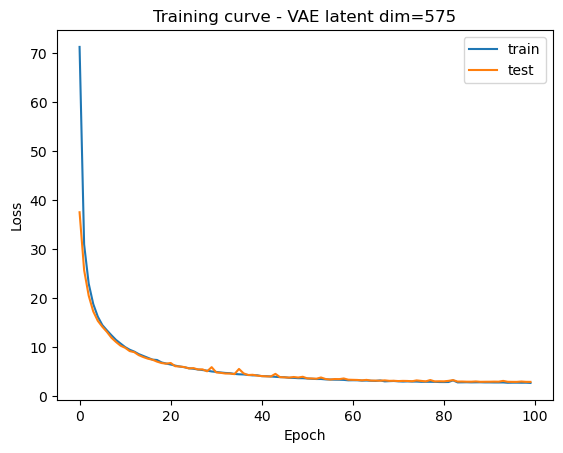

#### latent ndims = 600 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.58it/s]


Epoch [1/100] Train Loss: 68.3928
Epoch [1/100] Test Loss: 36.1823
✅ Best model saved at epoch 1 with test loss: 36.1823


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.46it/s]


Epoch [2/100] Train Loss: 30.6330
Epoch [2/100] Test Loss: 25.6626
✅ Best model saved at epoch 2 with test loss: 25.6626


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.09it/s]


Epoch [3/100] Train Loss: 22.8470
Epoch [3/100] Test Loss: 20.3834
✅ Best model saved at epoch 3 with test loss: 20.3834


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.70it/s]


Epoch [4/100] Train Loss: 18.6880
Epoch [4/100] Test Loss: 16.8472
✅ Best model saved at epoch 4 with test loss: 16.8472


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.90it/s]


Epoch [5/100] Train Loss: 16.1521
Epoch [5/100] Test Loss: 15.0378
✅ Best model saved at epoch 5 with test loss: 15.0378


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.44it/s]


Epoch [6/100] Train Loss: 14.3866
Epoch [6/100] Test Loss: 13.9694
✅ Best model saved at epoch 6 with test loss: 13.9694


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [7/100] Train Loss: 13.2637
Epoch [7/100] Test Loss: 12.6654
✅ Best model saved at epoch 7 with test loss: 12.6654


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [8/100] Train Loss: 12.0233
Epoch [8/100] Test Loss: 11.3222
✅ Best model saved at epoch 8 with test loss: 11.3222


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.62it/s]


Epoch [9/100] Train Loss: 11.0684
Epoch [9/100] Test Loss: 10.6065
✅ Best model saved at epoch 9 with test loss: 10.6065


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.99it/s]


Epoch [10/100] Train Loss: 10.3344
Epoch [10/100] Test Loss: 9.9682
✅ Best model saved at epoch 10 with test loss: 9.9682


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.23it/s]


Epoch [11/100] Train Loss: 9.8338
Epoch [11/100] Test Loss: 9.5654
✅ Best model saved at epoch 11 with test loss: 9.5654


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.78it/s]


Epoch [12/100] Train Loss: 9.3548
Epoch [12/100] Test Loss: 9.1714
✅ Best model saved at epoch 12 with test loss: 9.1714


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.75it/s]


Epoch [13/100] Train Loss: 8.9770
Epoch [13/100] Test Loss: 8.8627
✅ Best model saved at epoch 13 with test loss: 8.8627


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.31it/s]


Epoch [14/100] Train Loss: 8.6455
Epoch [14/100] Test Loss: 8.6334
✅ Best model saved at epoch 14 with test loss: 8.6334


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.44it/s]


Epoch [15/100] Train Loss: 8.2321
Epoch [15/100] Test Loss: 8.1286
✅ Best model saved at epoch 15 with test loss: 8.1286


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.68it/s]


Epoch [16/100] Train Loss: 7.9093
Epoch [16/100] Test Loss: 7.7994
✅ Best model saved at epoch 16 with test loss: 7.7994


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.58it/s]


Epoch [17/100] Train Loss: 7.5933
Epoch [17/100] Test Loss: 7.3863
✅ Best model saved at epoch 17 with test loss: 7.3863


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.38it/s]


Epoch [18/100] Train Loss: 7.3516
Epoch [18/100] Test Loss: 7.4497


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.93it/s]


Epoch [19/100] Train Loss: 7.0411
Epoch [19/100] Test Loss: 6.8444
✅ Best model saved at epoch 19 with test loss: 6.8444


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.76it/s]


Epoch [20/100] Train Loss: 6.8118
Epoch [20/100] Test Loss: 6.7188
✅ Best model saved at epoch 20 with test loss: 6.7188


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.30it/s]


Epoch [21/100] Train Loss: 6.5913
Epoch [21/100] Test Loss: 6.8633


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.63it/s]


Epoch [22/100] Train Loss: 6.4153
Epoch [22/100] Test Loss: 6.2733
✅ Best model saved at epoch 22 with test loss: 6.2733


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.91it/s]


Epoch [23/100] Train Loss: 6.2501
Epoch [23/100] Test Loss: 6.6658


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.05it/s]


Epoch [24/100] Train Loss: 6.1106
Epoch [24/100] Test Loss: 5.9962
✅ Best model saved at epoch 24 with test loss: 5.9962


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.65it/s]


Epoch [25/100] Train Loss: 5.9610
Epoch [25/100] Test Loss: 5.9435
✅ Best model saved at epoch 25 with test loss: 5.9435


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.65it/s]


Epoch [26/100] Train Loss: 5.7974
Epoch [26/100] Test Loss: 5.7241
✅ Best model saved at epoch 26 with test loss: 5.7241


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.93it/s]


Epoch [27/100] Train Loss: 6.1011
Epoch [27/100] Test Loss: 5.7275


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.35it/s]


Epoch [28/100] Train Loss: 5.4738
Epoch [28/100] Test Loss: 5.4800
✅ Best model saved at epoch 28 with test loss: 5.4800


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.88it/s]


Epoch [29/100] Train Loss: 5.4092
Epoch [29/100] Test Loss: 5.4836


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.31it/s]


Epoch [30/100] Train Loss: 5.2914
Epoch [30/100] Test Loss: 5.2923
✅ Best model saved at epoch 30 with test loss: 5.2923


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.42it/s]


Epoch [31/100] Train Loss: 5.1798
Epoch [31/100] Test Loss: 5.1372
✅ Best model saved at epoch 31 with test loss: 5.1372


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [32/100] Train Loss: 5.0689
Epoch [32/100] Test Loss: 5.0208
✅ Best model saved at epoch 32 with test loss: 5.0208


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [33/100] Train Loss: 4.9504
Epoch [33/100] Test Loss: 5.0344


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.35it/s]


Epoch [34/100] Train Loss: 4.8676
Epoch [34/100] Test Loss: 4.7977
✅ Best model saved at epoch 34 with test loss: 4.7977


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.48it/s]


Epoch [35/100] Train Loss: 4.7519
Epoch [35/100] Test Loss: 4.8253


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.09it/s]


Epoch [36/100] Train Loss: 4.6546
Epoch [36/100] Test Loss: 4.7313
✅ Best model saved at epoch 36 with test loss: 4.7313


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.37it/s]


Epoch [37/100] Train Loss: 4.6000
Epoch [37/100] Test Loss: 4.7319


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.33it/s]


Epoch [38/100] Train Loss: 4.5396
Epoch [38/100] Test Loss: 4.4442
✅ Best model saved at epoch 38 with test loss: 4.4442


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.81it/s]


Epoch [39/100] Train Loss: 4.4056
Epoch [39/100] Test Loss: 4.4153
✅ Best model saved at epoch 39 with test loss: 4.4153


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.28it/s]


Epoch [40/100] Train Loss: 4.3692
Epoch [40/100] Test Loss: 4.3255
✅ Best model saved at epoch 40 with test loss: 4.3255


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.78it/s]


Epoch [41/100] Train Loss: 4.3212
Epoch [41/100] Test Loss: 4.3266


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.41it/s]


Epoch [42/100] Train Loss: 4.2413
Epoch [42/100] Test Loss: 4.3445


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.46it/s]


Epoch [43/100] Train Loss: 4.2036
Epoch [43/100] Test Loss: 4.2008
✅ Best model saved at epoch 43 with test loss: 4.2008


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.12it/s]


Epoch [44/100] Train Loss: 4.1629
Epoch [44/100] Test Loss: 4.1235
✅ Best model saved at epoch 44 with test loss: 4.1235


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.69it/s]


Epoch [45/100] Train Loss: 4.0693
Epoch [45/100] Test Loss: 4.1497


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.77it/s]


Epoch [46/100] Train Loss: 4.0238
Epoch [46/100] Test Loss: 4.0148
✅ Best model saved at epoch 46 with test loss: 4.0148


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.63it/s]


Epoch [47/100] Train Loss: 4.0201
Epoch [47/100] Test Loss: 3.9401
✅ Best model saved at epoch 47 with test loss: 3.9401


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.21it/s]


Epoch [48/100] Train Loss: 3.9276
Epoch [48/100] Test Loss: 4.3256


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.42it/s]


Epoch [49/100] Train Loss: 3.8927
Epoch [49/100] Test Loss: 4.0157


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.39it/s]


Epoch [50/100] Train Loss: 3.8571
Epoch [50/100] Test Loss: 3.8814
✅ Best model saved at epoch 50 with test loss: 3.8814


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.82it/s]


Epoch [51/100] Train Loss: 3.7873
Epoch [51/100] Test Loss: 3.8435
✅ Best model saved at epoch 51 with test loss: 3.8435


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.60it/s]


Epoch [52/100] Train Loss: 3.7601
Epoch [52/100] Test Loss: 3.8350
✅ Best model saved at epoch 52 with test loss: 3.8350


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.25it/s]


Epoch [53/100] Train Loss: 3.7178
Epoch [53/100] Test Loss: 3.7496
✅ Best model saved at epoch 53 with test loss: 3.7496


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.61it/s]


Epoch [54/100] Train Loss: 3.6705
Epoch [54/100] Test Loss: 3.6602
✅ Best model saved at epoch 54 with test loss: 3.6602


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.42it/s]


Epoch [55/100] Train Loss: 3.6442
Epoch [55/100] Test Loss: 3.6448
✅ Best model saved at epoch 55 with test loss: 3.6448


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.13it/s]


Epoch [56/100] Train Loss: 3.5743
Epoch [56/100] Test Loss: 3.8669


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.04it/s]


Epoch [57/100] Train Loss: 3.5399
Epoch [57/100] Test Loss: 3.6112
✅ Best model saved at epoch 57 with test loss: 3.6112


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [58/100] Train Loss: 3.5022
Epoch [58/100] Test Loss: 3.5443
✅ Best model saved at epoch 58 with test loss: 3.5443


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.30it/s]


Epoch [59/100] Train Loss: 3.4842
Epoch [59/100] Test Loss: 3.5014
✅ Best model saved at epoch 59 with test loss: 3.5014


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.59it/s]


Epoch [60/100] Train Loss: 3.4567
Epoch [60/100] Test Loss: 3.4850
✅ Best model saved at epoch 60 with test loss: 3.4850


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.12it/s]


Epoch [61/100] Train Loss: 3.4262
Epoch [61/100] Test Loss: 3.4667
✅ Best model saved at epoch 61 with test loss: 3.4667


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.82it/s]


Epoch [62/100] Train Loss: 3.3608
Epoch [62/100] Test Loss: 3.4955


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.91it/s]


Epoch [63/100] Train Loss: 3.3576
Epoch [63/100] Test Loss: 3.3732
✅ Best model saved at epoch 63 with test loss: 3.3732


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.39it/s]


Epoch [64/100] Train Loss: 3.3052
Epoch [64/100] Test Loss: 3.3164
✅ Best model saved at epoch 64 with test loss: 3.3164


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.97it/s]


Epoch [65/100] Train Loss: 3.3174
Epoch [65/100] Test Loss: 3.4322


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.73it/s]


Epoch [66/100] Train Loss: 3.2509
Epoch [66/100] Test Loss: 3.4415


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.26it/s]


Epoch [67/100] Train Loss: 3.2456
Epoch [67/100] Test Loss: 3.2271
✅ Best model saved at epoch 67 with test loss: 3.2271


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.90it/s]


Epoch [68/100] Train Loss: 3.2107
Epoch [68/100] Test Loss: 3.4184


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.30it/s]


Epoch [69/100] Train Loss: 3.1757
Epoch [69/100] Test Loss: 3.2535


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.24it/s]


Epoch [70/100] Train Loss: 3.1739
Epoch [70/100] Test Loss: 3.2412


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.22it/s]


Epoch [71/100] Train Loss: 3.1451
Epoch [71/100] Test Loss: 3.2307


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.83it/s]


Epoch [72/100] Train Loss: 3.1144
Epoch [72/100] Test Loss: 3.2517


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.39it/s]


Epoch [73/100] Train Loss: 3.0822
Epoch [73/100] Test Loss: 3.3519


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.26it/s]


Epoch [74/100] Train Loss: 3.1784
Epoch [74/100] Test Loss: 3.1538
✅ Best model saved at epoch 74 with test loss: 3.1538


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.45it/s]


Epoch [75/100] Train Loss: 3.0253
Epoch [75/100] Test Loss: 3.1100
✅ Best model saved at epoch 75 with test loss: 3.1100


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.16it/s]


Epoch [76/100] Train Loss: 3.4612
Epoch [76/100] Test Loss: 3.1316


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.43it/s]


Epoch [77/100] Train Loss: 2.9767
Epoch [77/100] Test Loss: 3.0731
✅ Best model saved at epoch 77 with test loss: 3.0731


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.71it/s]


Epoch [78/100] Train Loss: 3.0312
Epoch [78/100] Test Loss: 3.1156


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.27it/s]


Epoch [79/100] Train Loss: 2.9940
Epoch [79/100] Test Loss: 3.2549


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.22it/s]


Epoch [80/100] Train Loss: 2.9697
Epoch [80/100] Test Loss: 3.0666
✅ Best model saved at epoch 80 with test loss: 3.0666


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.65it/s]


Epoch [81/100] Train Loss: 2.9626
Epoch [81/100] Test Loss: 3.0518
✅ Best model saved at epoch 81 with test loss: 3.0518


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.08it/s]


Epoch [82/100] Train Loss: 2.9662
Epoch [82/100] Test Loss: 3.3612


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.19it/s]


Epoch [83/100] Train Loss: 2.9470
Epoch [83/100] Test Loss: 3.0402
✅ Best model saved at epoch 83 with test loss: 3.0402


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.67it/s]


Epoch [84/100] Train Loss: 2.9276
Epoch [84/100] Test Loss: 3.0974


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.37it/s]


Epoch [85/100] Train Loss: 2.9311
Epoch [85/100] Test Loss: 3.0819


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.78it/s]


Epoch [86/100] Train Loss: 2.8997
Epoch [86/100] Test Loss: 3.0705


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.36it/s]


Epoch [87/100] Train Loss: 2.8783
Epoch [87/100] Test Loss: 2.9893
✅ Best model saved at epoch 87 with test loss: 2.9893


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.98it/s]


Epoch [88/100] Train Loss: 2.8689
Epoch [88/100] Test Loss: 2.9488
✅ Best model saved at epoch 88 with test loss: 2.9488


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.54it/s]


Epoch [89/100] Train Loss: 2.8831
Epoch [89/100] Test Loss: 2.9609


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.62it/s]


Epoch [90/100] Train Loss: 2.9111
Epoch [90/100] Test Loss: 2.9636


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.60it/s]


Epoch [91/100] Train Loss: 2.8085
Epoch [91/100] Test Loss: 2.9159
✅ Best model saved at epoch 91 with test loss: 2.9159


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.26it/s]


Epoch [92/100] Train Loss: 2.8317
Epoch [92/100] Test Loss: 2.9935


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.92it/s]


Epoch [93/100] Train Loss: 2.8267
Epoch [93/100] Test Loss: 2.9288


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.11it/s]


Epoch [94/100] Train Loss: 2.8102
Epoch [94/100] Test Loss: 3.0542


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.18it/s]


Epoch [95/100] Train Loss: 2.7845
Epoch [95/100] Test Loss: 2.9509


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.80it/s]


Epoch [96/100] Train Loss: 2.8583
Epoch [96/100] Test Loss: 2.8932
✅ Best model saved at epoch 96 with test loss: 2.8932


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [97/100] Train Loss: 2.8563
Epoch [97/100] Test Loss: 2.8397
✅ Best model saved at epoch 97 with test loss: 2.8397


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.45it/s]


Epoch [98/100] Train Loss: 2.7584
Epoch [98/100] Test Loss: 2.8731


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.01it/s]


Epoch [99/100] Train Loss: 2.7410
Epoch [99/100] Test Loss: 2.9150


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.75it/s]


Epoch [100/100] Train Loss: 2.7585
Epoch [100/100] Test Loss: 2.8318
✅ Best model saved at epoch 100 with test loss: 2.8318


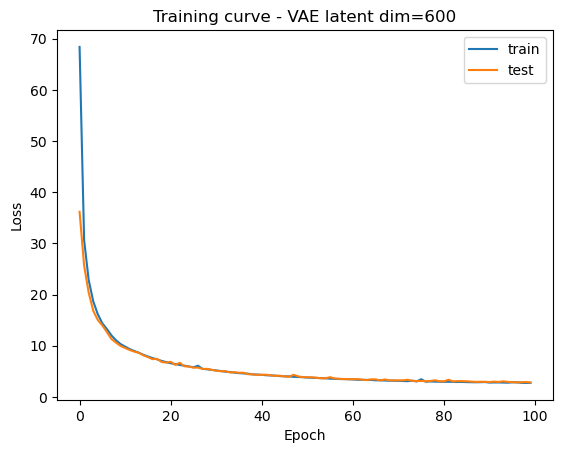

#### latent ndims = 625 ####


Epoch 1/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.45it/s]


Epoch [1/100] Train Loss: 63.7322
Epoch [1/100] Test Loss: 34.6541
✅ Best model saved at epoch 1 with test loss: 34.6541


Epoch 2/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.76it/s]


Epoch [2/100] Train Loss: 29.0472
Epoch [2/100] Test Loss: 28.4301
✅ Best model saved at epoch 2 with test loss: 28.4301


Epoch 3/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.89it/s]


Epoch [3/100] Train Loss: 21.6711
Epoch [3/100] Test Loss: 18.9631
✅ Best model saved at epoch 3 with test loss: 18.9631


Epoch 4/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.91it/s]


Epoch [4/100] Train Loss: 17.4735
Epoch [4/100] Test Loss: 16.2978
✅ Best model saved at epoch 4 with test loss: 16.2978


Epoch 5/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.73it/s]


Epoch [5/100] Train Loss: 15.1168
Epoch [5/100] Test Loss: 14.1008
✅ Best model saved at epoch 5 with test loss: 14.1008


Epoch 6/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.21it/s]


Epoch [6/100] Train Loss: 13.4925
Epoch [6/100] Test Loss: 12.6533
✅ Best model saved at epoch 6 with test loss: 12.6533


Epoch 7/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.30it/s]


Epoch [7/100] Train Loss: 12.2037
Epoch [7/100] Test Loss: 11.7216
✅ Best model saved at epoch 7 with test loss: 11.7216


Epoch 8/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.25it/s]


Epoch [8/100] Train Loss: 11.3854
Epoch [8/100] Test Loss: 11.0013
✅ Best model saved at epoch 8 with test loss: 11.0013


Epoch 9/100: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.92it/s]


Epoch [9/100] Train Loss: 10.6541
Epoch [9/100] Test Loss: 10.4310
✅ Best model saved at epoch 9 with test loss: 10.4310


Epoch 10/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.70it/s]


Epoch [10/100] Train Loss: 10.0073
Epoch [10/100] Test Loss: 11.1978


Epoch 11/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.87it/s]


Epoch [11/100] Train Loss: 9.4294
Epoch [11/100] Test Loss: 9.1079
✅ Best model saved at epoch 11 with test loss: 9.1079


Epoch 12/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.02it/s]


Epoch [12/100] Train Loss: 8.9287
Epoch [12/100] Test Loss: 8.7694
✅ Best model saved at epoch 12 with test loss: 8.7694


Epoch 13/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.05it/s]


Epoch [13/100] Train Loss: 8.5332
Epoch [13/100] Test Loss: 8.3327
✅ Best model saved at epoch 13 with test loss: 8.3327


Epoch 14/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.78it/s]


Epoch [14/100] Train Loss: 8.1163
Epoch [14/100] Test Loss: 8.6928


Epoch 15/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.77it/s]


Epoch [15/100] Train Loss: 7.8702
Epoch [15/100] Test Loss: 7.4527
✅ Best model saved at epoch 15 with test loss: 7.4527


Epoch 16/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.05it/s]


Epoch [16/100] Train Loss: 7.3821
Epoch [16/100] Test Loss: 8.0425


Epoch 17/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.57it/s]


Epoch [17/100] Train Loss: 7.2130
Epoch [17/100] Test Loss: 6.9652
✅ Best model saved at epoch 17 with test loss: 6.9652


Epoch 18/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.33it/s]


Epoch [18/100] Train Loss: 6.8337
Epoch [18/100] Test Loss: 6.9876


Epoch 19/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.55it/s]


Epoch [19/100] Train Loss: 6.6469
Epoch [19/100] Test Loss: 6.5707
✅ Best model saved at epoch 19 with test loss: 6.5707


Epoch 20/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.74it/s]


Epoch [20/100] Train Loss: 6.3682
Epoch [20/100] Test Loss: 6.4090
✅ Best model saved at epoch 20 with test loss: 6.4090


Epoch 21/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.58it/s]


Epoch [21/100] Train Loss: 6.2066
Epoch [21/100] Test Loss: 6.3787
✅ Best model saved at epoch 21 with test loss: 6.3787


Epoch 22/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.75it/s]


Epoch [22/100] Train Loss: 6.1134
Epoch [22/100] Test Loss: 5.8784
✅ Best model saved at epoch 22 with test loss: 5.8784


Epoch 23/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.35it/s]


Epoch [23/100] Train Loss: 5.7532
Epoch [23/100] Test Loss: 5.7239
✅ Best model saved at epoch 23 with test loss: 5.7239


Epoch 24/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.45it/s]


Epoch [24/100] Train Loss: 5.6955
Epoch [24/100] Test Loss: 5.5567
✅ Best model saved at epoch 24 with test loss: 5.5567


Epoch 25/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.74it/s]


Epoch [25/100] Train Loss: 5.4726
Epoch [25/100] Test Loss: 5.5632


Epoch 26/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [26/100] Train Loss: 5.3745
Epoch [26/100] Test Loss: 5.5757


Epoch 27/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.54it/s]


Epoch [27/100] Train Loss: 5.2288
Epoch [27/100] Test Loss: 5.4138
✅ Best model saved at epoch 27 with test loss: 5.4138


Epoch 28/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.73it/s]


Epoch [28/100] Train Loss: 5.1006
Epoch [28/100] Test Loss: 5.1744
✅ Best model saved at epoch 28 with test loss: 5.1744


Epoch 29/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.20it/s]


Epoch [29/100] Train Loss: 5.0197
Epoch [29/100] Test Loss: 5.0697
✅ Best model saved at epoch 29 with test loss: 5.0697


Epoch 30/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [30/100] Train Loss: 4.8815
Epoch [30/100] Test Loss: 4.8822
✅ Best model saved at epoch 30 with test loss: 4.8822


Epoch 31/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.17it/s]


Epoch [31/100] Train Loss: 4.9814
Epoch [31/100] Test Loss: 4.7343
✅ Best model saved at epoch 31 with test loss: 4.7343


Epoch 32/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.09it/s]


Epoch [32/100] Train Loss: 4.6847
Epoch [32/100] Test Loss: 4.6870
✅ Best model saved at epoch 32 with test loss: 4.6870


Epoch 33/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.12it/s]


Epoch [33/100] Train Loss: 4.6391
Epoch [33/100] Test Loss: 4.8330


Epoch 34/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.44it/s]


Epoch [34/100] Train Loss: 4.5597
Epoch [34/100] Test Loss: 4.6330
✅ Best model saved at epoch 34 with test loss: 4.6330


Epoch 35/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.47it/s]


Epoch [35/100] Train Loss: 4.4839
Epoch [35/100] Test Loss: 4.4932
✅ Best model saved at epoch 35 with test loss: 4.4932


Epoch 36/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.68it/s]


Epoch [36/100] Train Loss: 4.4171
Epoch [36/100] Test Loss: 4.3945
✅ Best model saved at epoch 36 with test loss: 4.3945


Epoch 37/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.20it/s]


Epoch [37/100] Train Loss: 4.3739
Epoch [37/100] Test Loss: 4.3133
✅ Best model saved at epoch 37 with test loss: 4.3133


Epoch 38/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.55it/s]


Epoch [38/100] Train Loss: 4.2517
Epoch [38/100] Test Loss: 4.4229


Epoch 39/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.86it/s]


Epoch [39/100] Train Loss: 4.1621
Epoch [39/100] Test Loss: 4.2082
✅ Best model saved at epoch 39 with test loss: 4.2082


Epoch 40/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.61it/s]


Epoch [40/100] Train Loss: 4.1645
Epoch [40/100] Test Loss: 4.4012


Epoch 41/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.27it/s]


Epoch [41/100] Train Loss: 4.0482
Epoch [41/100] Test Loss: 4.1660
✅ Best model saved at epoch 41 with test loss: 4.1660


Epoch 42/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.10it/s]


Epoch [42/100] Train Loss: 3.9686
Epoch [42/100] Test Loss: 4.0171
✅ Best model saved at epoch 42 with test loss: 4.0171


Epoch 43/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.22it/s]


Epoch [43/100] Train Loss: 3.9321
Epoch [43/100] Test Loss: 3.9987
✅ Best model saved at epoch 43 with test loss: 3.9987


Epoch 44/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.08it/s]


Epoch [44/100] Train Loss: 3.8808
Epoch [44/100] Test Loss: 3.9042
✅ Best model saved at epoch 44 with test loss: 3.9042


Epoch 45/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.44it/s]


Epoch [45/100] Train Loss: 3.7743
Epoch [45/100] Test Loss: 3.8407
✅ Best model saved at epoch 45 with test loss: 3.8407


Epoch 46/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.53it/s]


Epoch [46/100] Train Loss: 3.7854
Epoch [46/100] Test Loss: 4.0532


Epoch 47/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.34it/s]


Epoch [47/100] Train Loss: 3.6864
Epoch [47/100] Test Loss: 3.6923
✅ Best model saved at epoch 47 with test loss: 3.6923


Epoch 48/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.84it/s]


Epoch [48/100] Train Loss: 3.6328
Epoch [48/100] Test Loss: 3.6688
✅ Best model saved at epoch 48 with test loss: 3.6688


Epoch 49/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [49/100] Train Loss: 3.6025
Epoch [49/100] Test Loss: 3.7306


Epoch 50/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.37it/s]


Epoch [50/100] Train Loss: 3.5573
Epoch [50/100] Test Loss: 3.6318
✅ Best model saved at epoch 50 with test loss: 3.6318


Epoch 51/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.30it/s]


Epoch [51/100] Train Loss: 3.5206
Epoch [51/100] Test Loss: 3.7078


Epoch 52/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.92it/s]


Epoch [52/100] Train Loss: 3.4735
Epoch [52/100] Test Loss: 3.5374
✅ Best model saved at epoch 52 with test loss: 3.5374


Epoch 53/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.17it/s]


Epoch [53/100] Train Loss: 3.4437
Epoch [53/100] Test Loss: 4.2858


Epoch 54/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.42it/s]


Epoch [54/100] Train Loss: 3.4668
Epoch [54/100] Test Loss: 3.5334
✅ Best model saved at epoch 54 with test loss: 3.5334


Epoch 55/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.66it/s]


Epoch [55/100] Train Loss: 3.3696
Epoch [55/100] Test Loss: 3.4427
✅ Best model saved at epoch 55 with test loss: 3.4427


Epoch 56/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.53it/s]


Epoch [56/100] Train Loss: 3.3201
Epoch [56/100] Test Loss: 3.3943
✅ Best model saved at epoch 56 with test loss: 3.3943


Epoch 57/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.27it/s]


Epoch [57/100] Train Loss: 3.3227
Epoch [57/100] Test Loss: 3.3475
✅ Best model saved at epoch 57 with test loss: 3.3475


Epoch 58/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.21it/s]


Epoch [58/100] Train Loss: 3.2756
Epoch [58/100] Test Loss: 3.6123


Epoch 59/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.55it/s]


Epoch [59/100] Train Loss: 3.2188
Epoch [59/100] Test Loss: 3.3161
✅ Best model saved at epoch 59 with test loss: 3.3161


Epoch 60/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [60/100] Train Loss: 3.2066
Epoch [60/100] Test Loss: 3.4126


Epoch 61/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.20it/s]


Epoch [61/100] Train Loss: 3.1708
Epoch [61/100] Test Loss: 3.3531


Epoch 62/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.36it/s]


Epoch [62/100] Train Loss: 3.1470
Epoch [62/100] Test Loss: 3.2034
✅ Best model saved at epoch 62 with test loss: 3.2034


Epoch 63/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.32it/s]


Epoch [63/100] Train Loss: 3.1251
Epoch [63/100] Test Loss: 3.2089


Epoch 64/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.61it/s]


Epoch [64/100] Train Loss: 3.1024
Epoch [64/100] Test Loss: 3.1521
✅ Best model saved at epoch 64 with test loss: 3.1521


Epoch 65/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.14it/s]


Epoch [65/100] Train Loss: 3.0867
Epoch [65/100] Test Loss: 3.3398


Epoch 66/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.50it/s]


Epoch [66/100] Train Loss: 3.0989
Epoch [66/100] Test Loss: 3.2034


Epoch 67/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.32it/s]


Epoch [67/100] Train Loss: 3.0052
Epoch [67/100] Test Loss: 3.2205


Epoch 68/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.15it/s]


Epoch [68/100] Train Loss: 3.0241
Epoch [68/100] Test Loss: 3.0798
✅ Best model saved at epoch 68 with test loss: 3.0798


Epoch 69/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.37it/s]


Epoch [69/100] Train Loss: 2.9732
Epoch [69/100] Test Loss: 3.0926


Epoch 70/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.92it/s]


Epoch [70/100] Train Loss: 2.9826
Epoch [70/100] Test Loss: 3.1268


Epoch 71/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.40it/s]


Epoch [71/100] Train Loss: 2.9355
Epoch [71/100] Test Loss: 3.0631
✅ Best model saved at epoch 71 with test loss: 3.0631


Epoch 72/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.46it/s]


Epoch [72/100] Train Loss: 2.9483
Epoch [72/100] Test Loss: 3.0190
✅ Best model saved at epoch 72 with test loss: 3.0190


Epoch 73/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.36it/s]


Epoch [73/100] Train Loss: 2.9113
Epoch [73/100] Test Loss: 2.9959
✅ Best model saved at epoch 73 with test loss: 2.9959


Epoch 74/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.12it/s]


Epoch [74/100] Train Loss: 2.8854
Epoch [74/100] Test Loss: 2.9583
✅ Best model saved at epoch 74 with test loss: 2.9583


Epoch 75/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.47it/s]


Epoch [75/100] Train Loss: 2.9291
Epoch [75/100] Test Loss: 3.0278


Epoch 76/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.70it/s]


Epoch [76/100] Train Loss: 2.8475
Epoch [76/100] Test Loss: 3.0134


Epoch 77/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.46it/s]


Epoch [77/100] Train Loss: 2.8609
Epoch [77/100] Test Loss: 3.3373


Epoch 78/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.10it/s]


Epoch [78/100] Train Loss: 2.8483
Epoch [78/100] Test Loss: 2.9116
✅ Best model saved at epoch 78 with test loss: 2.9116


Epoch 79/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.99it/s]


Epoch [79/100] Train Loss: 2.8175
Epoch [79/100] Test Loss: 3.2316


Epoch 80/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.00it/s]


Epoch [80/100] Train Loss: 2.8454
Epoch [80/100] Test Loss: 2.8966
✅ Best model saved at epoch 80 with test loss: 2.8966


Epoch 81/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.57it/s]


Epoch [81/100] Train Loss: 2.7718
Epoch [81/100] Test Loss: 2.9456


Epoch 82/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.71it/s]


Epoch [82/100] Train Loss: 2.7931
Epoch [82/100] Test Loss: 2.9727


Epoch 83/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.37it/s]


Epoch [83/100] Train Loss: 2.7500
Epoch [83/100] Test Loss: 2.9463


Epoch 84/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.61it/s]


Epoch [84/100] Train Loss: 2.7620
Epoch [84/100] Test Loss: 2.8865
✅ Best model saved at epoch 84 with test loss: 2.8865


Epoch 85/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.45it/s]


Epoch [85/100] Train Loss: 2.7402
Epoch [85/100] Test Loss: 2.9855


Epoch 86/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.49it/s]


Epoch [86/100] Train Loss: 2.7307
Epoch [86/100] Test Loss: 2.8509
✅ Best model saved at epoch 86 with test loss: 2.8509


Epoch 87/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.66it/s]


Epoch [87/100] Train Loss: 2.6983
Epoch [87/100] Test Loss: 2.9404


Epoch 88/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.11it/s]


Epoch [88/100] Train Loss: 2.7160
Epoch [88/100] Test Loss: 2.8279
✅ Best model saved at epoch 88 with test loss: 2.8279


Epoch 89/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.42it/s]


Epoch [89/100] Train Loss: 2.6722
Epoch [89/100] Test Loss: 2.8102
✅ Best model saved at epoch 89 with test loss: 2.8102


Epoch 90/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.05it/s]


Epoch [90/100] Train Loss: 2.6696
Epoch [90/100] Test Loss: 2.8704


Epoch 91/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.14it/s]


Epoch [91/100] Train Loss: 2.6596
Epoch [91/100] Test Loss: 2.7794
✅ Best model saved at epoch 91 with test loss: 2.7794


Epoch 92/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.28it/s]


Epoch [92/100] Train Loss: 2.6359
Epoch [92/100] Test Loss: 2.8089


Epoch 93/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.84it/s]


Epoch [93/100] Train Loss: 2.6400
Epoch [93/100] Test Loss: 2.7388
✅ Best model saved at epoch 93 with test loss: 2.7388


Epoch 94/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.29it/s]


Epoch [94/100] Train Loss: 2.6213
Epoch [94/100] Test Loss: 2.7445


Epoch 95/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.02it/s]


Epoch [95/100] Train Loss: 2.6083
Epoch [95/100] Test Loss: 2.7573


Epoch 96/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.87it/s]


Epoch [96/100] Train Loss: 2.5981
Epoch [96/100] Test Loss: 2.7317
✅ Best model saved at epoch 96 with test loss: 2.7317


Epoch 97/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.62it/s]


Epoch [97/100] Train Loss: 2.5940
Epoch [97/100] Test Loss: 2.8067


Epoch 98/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.76it/s]


Epoch [98/100] Train Loss: 2.5642
Epoch [98/100] Test Loss: 2.6886
✅ Best model saved at epoch 98 with test loss: 2.6886


Epoch 99/100: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.20it/s]


Epoch [99/100] Train Loss: 2.5693
Epoch [99/100] Test Loss: 3.5226


Epoch 100/100: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.79it/s]


Epoch [100/100] Train Loss: 2.6263
Epoch [100/100] Test Loss: 2.7318


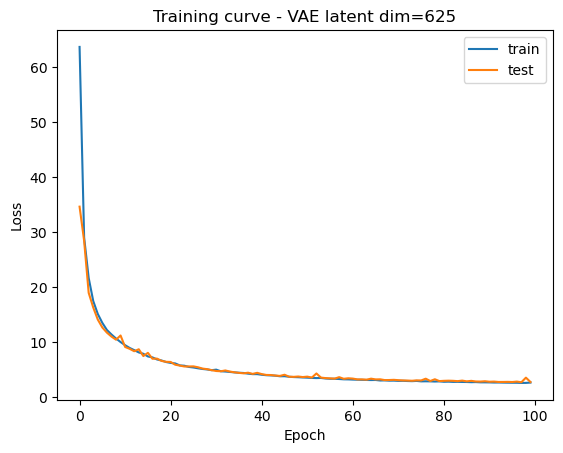

In [9]:
ndims_list = [2, 4, 6, 8] + list(range(10, 50, 5)) + list(range(50, 100, 10)) + \
                list(range(100, 200, 20)) + list(range(200,650, 25))

# ndims_list = [2, 4]

for ndims in ndims_list:
    print(f"#### latent ndims = {ndims} ####")
# for ndims in [100]:
    model = VAE(latent_dim=ndims).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    criterion = nn.MSELoss(reduction='sum')
    epochs = 100
    # epochs = 3
    
    best_test_loss = float('inf')
    
    
    patience_counter = 0
    patience = 15
    train_losses = []
    test_losses = []
    
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for x, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            x = x.to(device)
            optimizer.zero_grad()
            recon, mu, logvar = model(x)
            loss, recon_loss, kl_loss = vae_loss(recon, x, mu, logvar)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
    
        avg_train_loss = total_loss / len(train_loader.dataset)
        train_losses.append(avg_train_loss)
        print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {avg_train_loss:.4f}")
    
        # --- Evaluation ---
        model.eval()
        test_loss = 0
        with torch.no_grad():
            for x, _ in test_loader:
                x = x.to(device)
                recon, mu, logvar = model(x)
                loss, _, _ = vae_loss(recon, x, mu, logvar)
                test_loss += loss.item()
    
        avg_test_loss = test_loss / len(test_loader.dataset)
        test_losses.append(avg_test_loss)
        print(f"Epoch [{epoch+1}/{epochs}] Test Loss: {avg_test_loss:.4f}")
    
        # --- Save Best Model ---
        if avg_test_loss < best_test_loss:
            best_test_loss = avg_test_loss
            torch.save(model.state_dict(), f"best_vae_dim_{ndims}.pth")
            print(f"✅ Best model saved at epoch {epoch+1} with test loss: {best_test_loss:.4f}")
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("🚦🚦🚦 Early stopping triggered 🚦")
                break

    # Plot training curve
    plt.figure()
    plt.title(f"Training curve - VAE latent dim={ndims}")
    plt.plot(train_losses, label='train')
    plt.plot(test_losses, label='test')
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()


In [11]:
model

VAE(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc_mu): Linear(in_features=2048, out_features=625, bias=True)
  (fc_logvar): Linear(in_features=2048, out_features=625, bias=True)
  (fc_decode): Linear(in_features=625, out_features=2048, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(32, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): Sigmoid()
  )
)

latent dim 625 reconstruction:

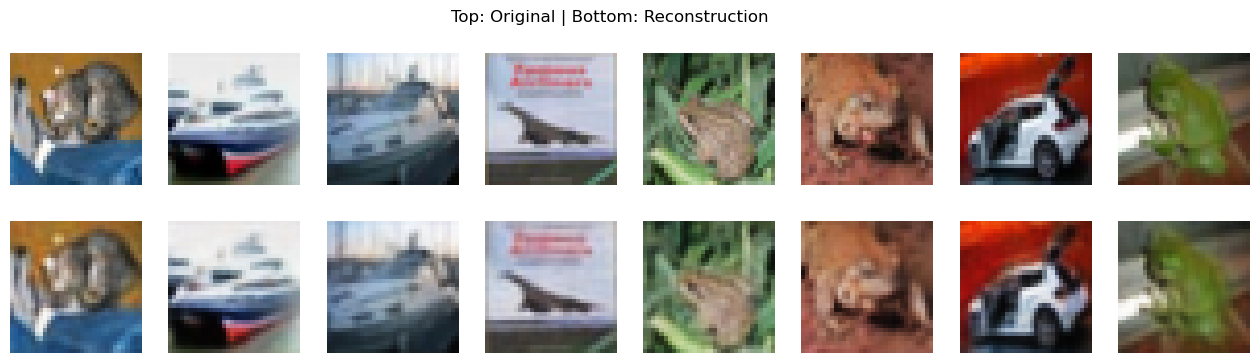

In [10]:
model.eval()
with torch.no_grad():
    x, _ = next(iter(test_loader))
    x = x.to(device)[:8]
    recon, _, _ = model(x)

    plt.figure(figsize=(16, 4))
    for i in range(8):
        plt.subplot(2, 8, i+1)
        plt.imshow(x[i].permute(1, 2, 0).cpu())
        plt.axis('off')

        plt.subplot(2, 8, i+9)
        plt.imshow(recon[i].permute(1, 2, 0).cpu())
        plt.axis('off')

    plt.suptitle("Top: Original | Bottom: Reconstruction")
    plt.show()

latent dim 100 reconstruction:

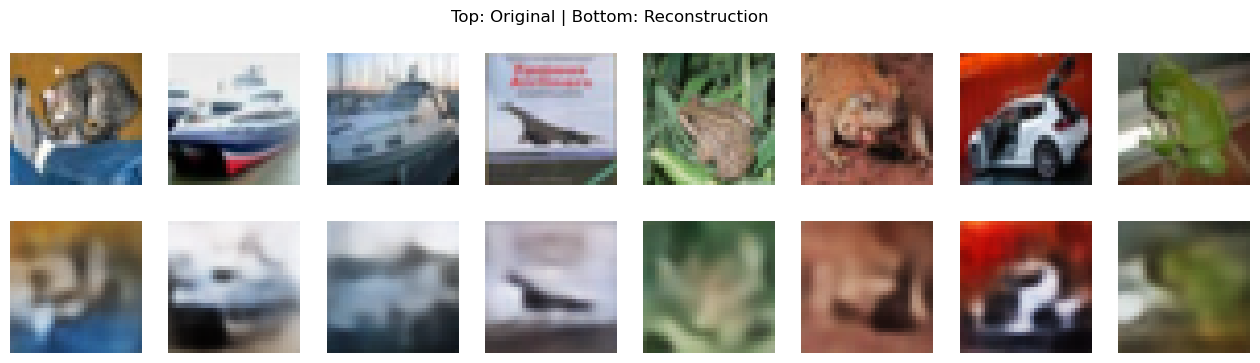

In [7]:
model.eval()
with torch.no_grad():
    x, _ = next(iter(test_loader))
    x = x.to(device)[:8]
    recon, _, _ = model(x)

    plt.figure(figsize=(16, 4))
    for i in range(8):
        plt.subplot(2, 8, i+1)
        plt.imshow(x[i].permute(1, 2, 0).cpu())
        plt.axis('off')

        plt.subplot(2, 8, i+9)
        plt.imshow(recon[i].permute(1, 2, 0).cpu())
        plt.axis('off')

    plt.suptitle("Top: Original | Bottom: Reconstruction")
    plt.show()

## Train for longer

In [8]:
model = VAE(latent_dim=100).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss(reduction='sum')
epochs = 200

best_test_loss = float('inf')

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    for x, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        x = x.to(device)
        optimizer.zero_grad()
        recon, mu, logvar = model(x)
        loss, recon_loss, kl_loss = vae_loss(recon, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_loader.dataset)
    train_losses.append(avg_train_loss)
    print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {avg_train_loss:.4f}")

    # --- Evaluation ---
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for x, _ in test_loader:
            x = x.to(device)
            recon, mu, logvar = model(x)
            loss, _, _ = vae_loss(recon, x, mu, logvar)
            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader.dataset)
    test_losses.append(avg_test_loss)
    print(f"Epoch [{epoch+1}/{epochs}] Test Loss: {avg_test_loss:.4f}")

    # --- Save Best Model ---
    if avg_test_loss < best_test_loss:
        best_test_loss = avg_test_loss
        torch.save(model.state_dict(), "best_vae_long_training.pth")
        print(f"✅ Best model saved at epoch {epoch+1} with test loss: {best_test_loss:.4f}")



Epoch 1/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.56it/s]


Epoch [1/250] Train Loss: 68.5698
Epoch [1/250] Test Loss: 38.6870
✅ Best model saved at epoch 1 with test loss: 38.6870


Epoch 2/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.93it/s]


Epoch [2/250] Train Loss: 33.5759
Epoch [2/250] Test Loss: 29.0814
✅ Best model saved at epoch 2 with test loss: 29.0814


Epoch 3/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.54it/s]


Epoch [3/250] Train Loss: 26.8066
Epoch [3/250] Test Loss: 24.7030
✅ Best model saved at epoch 3 with test loss: 24.7030


Epoch 4/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.48it/s]


Epoch [4/250] Train Loss: 23.4828
Epoch [4/250] Test Loss: 22.0614
✅ Best model saved at epoch 4 with test loss: 22.0614


Epoch 5/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.89it/s]


Epoch [5/250] Train Loss: 21.1796
Epoch [5/250] Test Loss: 20.3741
✅ Best model saved at epoch 5 with test loss: 20.3741


Epoch 6/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.99it/s]


Epoch [6/250] Train Loss: 19.9571
Epoch [6/250] Test Loss: 19.5891
✅ Best model saved at epoch 6 with test loss: 19.5891


Epoch 7/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.32it/s]


Epoch [7/250] Train Loss: 19.1369
Epoch [7/250] Test Loss: 18.9300
✅ Best model saved at epoch 7 with test loss: 18.9300


Epoch 8/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.09it/s]


Epoch [8/250] Train Loss: 18.5695
Epoch [8/250] Test Loss: 18.5039
✅ Best model saved at epoch 8 with test loss: 18.5039


Epoch 9/250: 100%|█████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.61it/s]


Epoch [9/250] Train Loss: 18.2290
Epoch [9/250] Test Loss: 18.5126


Epoch 10/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.58it/s]


Epoch [10/250] Train Loss: 17.9476
Epoch [10/250] Test Loss: 17.9463
✅ Best model saved at epoch 10 with test loss: 17.9463


Epoch 11/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.97it/s]


Epoch [11/250] Train Loss: 17.8292
Epoch [11/250] Test Loss: 18.0502


Epoch 12/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.58it/s]


Epoch [12/250] Train Loss: 17.6328
Epoch [12/250] Test Loss: 17.6753
✅ Best model saved at epoch 12 with test loss: 17.6753


Epoch 13/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.55it/s]


Epoch [13/250] Train Loss: 17.5511
Epoch [13/250] Test Loss: 17.8248


Epoch 14/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.57it/s]


Epoch [14/250] Train Loss: 17.4175
Epoch [14/250] Test Loss: 17.7369


Epoch 15/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.89it/s]


Epoch [15/250] Train Loss: 17.3519
Epoch [15/250] Test Loss: 17.4730
✅ Best model saved at epoch 15 with test loss: 17.4730


Epoch 16/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.25it/s]


Epoch [16/250] Train Loss: 17.2322
Epoch [16/250] Test Loss: 17.4209
✅ Best model saved at epoch 16 with test loss: 17.4209


Epoch 17/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.91it/s]


Epoch [17/250] Train Loss: 17.2085
Epoch [17/250] Test Loss: 17.4378


Epoch 18/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.73it/s]


Epoch [18/250] Train Loss: 17.1336
Epoch [18/250] Test Loss: 17.2343
✅ Best model saved at epoch 18 with test loss: 17.2343


Epoch 19/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.54it/s]


Epoch [19/250] Train Loss: 17.0598
Epoch [19/250] Test Loss: 17.4092


Epoch 20/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.43it/s]


Epoch [20/250] Train Loss: 16.9906
Epoch [20/250] Test Loss: 17.3793


Epoch 21/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.07it/s]


Epoch [21/250] Train Loss: 16.9167
Epoch [21/250] Test Loss: 17.1736
✅ Best model saved at epoch 21 with test loss: 17.1736


Epoch 22/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.92it/s]


Epoch [22/250] Train Loss: 16.8641
Epoch [22/250] Test Loss: 17.0952
✅ Best model saved at epoch 22 with test loss: 17.0952


Epoch 23/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 65.94it/s]


Epoch [23/250] Train Loss: 16.8331
Epoch [23/250] Test Loss: 17.1676


Epoch 24/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 65.61it/s]


Epoch [24/250] Train Loss: 16.7687
Epoch [24/250] Test Loss: 17.0707
✅ Best model saved at epoch 24 with test loss: 17.0707


Epoch 25/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.96it/s]


Epoch [25/250] Train Loss: 16.6968
Epoch [25/250] Test Loss: 17.1249


Epoch 26/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.01it/s]


Epoch [26/250] Train Loss: 16.6680
Epoch [26/250] Test Loss: 16.9641
✅ Best model saved at epoch 26 with test loss: 16.9641


Epoch 27/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.00it/s]


Epoch [27/250] Train Loss: 16.6231
Epoch [27/250] Test Loss: 17.0011


Epoch 28/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.92it/s]


Epoch [28/250] Train Loss: 16.5678
Epoch [28/250] Test Loss: 16.9828


Epoch 29/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.94it/s]


Epoch [29/250] Train Loss: 16.5363
Epoch [29/250] Test Loss: 16.9770


Epoch 30/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.43it/s]


Epoch [30/250] Train Loss: 16.5190
Epoch [30/250] Test Loss: 17.2355


Epoch 31/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.62it/s]


Epoch [31/250] Train Loss: 16.4824
Epoch [31/250] Test Loss: 16.9514
✅ Best model saved at epoch 31 with test loss: 16.9514


Epoch 32/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.52it/s]


Epoch [32/250] Train Loss: 16.4251
Epoch [32/250] Test Loss: 16.9654


Epoch 33/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.98it/s]


Epoch [33/250] Train Loss: 16.4216
Epoch [33/250] Test Loss: 17.0195


Epoch 34/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.47it/s]


Epoch [34/250] Train Loss: 16.3735
Epoch [34/250] Test Loss: 16.8745
✅ Best model saved at epoch 34 with test loss: 16.8745


Epoch 35/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.68it/s]


Epoch [35/250] Train Loss: 16.3870
Epoch [35/250] Test Loss: 16.8491
✅ Best model saved at epoch 35 with test loss: 16.8491


Epoch 36/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.61it/s]


Epoch [36/250] Train Loss: 16.3210
Epoch [36/250] Test Loss: 16.8332
✅ Best model saved at epoch 36 with test loss: 16.8332


Epoch 37/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.18it/s]


Epoch [37/250] Train Loss: 16.3188
Epoch [37/250] Test Loss: 16.9998


Epoch 38/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.43it/s]


Epoch [38/250] Train Loss: 16.2880
Epoch [38/250] Test Loss: 16.9125


Epoch 39/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.47it/s]


Epoch [39/250] Train Loss: 16.2603
Epoch [39/250] Test Loss: 16.7679
✅ Best model saved at epoch 39 with test loss: 16.7679


Epoch 40/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.14it/s]


Epoch [40/250] Train Loss: 16.2363
Epoch [40/250] Test Loss: 16.9072


Epoch 41/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.70it/s]


Epoch [41/250] Train Loss: 16.2177
Epoch [41/250] Test Loss: 16.7628
✅ Best model saved at epoch 41 with test loss: 16.7628


Epoch 42/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.00it/s]


Epoch [42/250] Train Loss: 16.2038
Epoch [42/250] Test Loss: 16.8407


Epoch 43/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.21it/s]


Epoch [43/250] Train Loss: 16.1973
Epoch [43/250] Test Loss: 17.0041


Epoch 44/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.16it/s]


Epoch [44/250] Train Loss: 16.1686
Epoch [44/250] Test Loss: 16.9296


Epoch 45/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.75it/s]


Epoch [45/250] Train Loss: 16.1406
Epoch [45/250] Test Loss: 16.8475


Epoch 46/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.46it/s]


Epoch [46/250] Train Loss: 16.1583
Epoch [46/250] Test Loss: 16.7720


Epoch 47/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.79it/s]


Epoch [47/250] Train Loss: 16.0976
Epoch [47/250] Test Loss: 17.0618


Epoch 48/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.04it/s]


Epoch [48/250] Train Loss: 16.0932
Epoch [48/250] Test Loss: 16.7942


Epoch 49/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.91it/s]


Epoch [49/250] Train Loss: 16.0920
Epoch [49/250] Test Loss: 16.7715


Epoch 50/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.63it/s]


Epoch [50/250] Train Loss: 16.0850
Epoch [50/250] Test Loss: 16.7480
✅ Best model saved at epoch 50 with test loss: 16.7480


Epoch 51/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.57it/s]


Epoch [51/250] Train Loss: 16.0212
Epoch [51/250] Test Loss: 16.7811


Epoch 52/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.69it/s]


Epoch [52/250] Train Loss: 16.0330
Epoch [52/250] Test Loss: 16.7493


Epoch 53/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.85it/s]


Epoch [53/250] Train Loss: 16.0340
Epoch [53/250] Test Loss: 16.7990


Epoch 54/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.49it/s]


Epoch [54/250] Train Loss: 15.9957
Epoch [54/250] Test Loss: 16.7729


Epoch 55/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.96it/s]


Epoch [55/250] Train Loss: 16.0230
Epoch [55/250] Test Loss: 16.7170
✅ Best model saved at epoch 55 with test loss: 16.7170


Epoch 56/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.23it/s]


Epoch [56/250] Train Loss: 15.9570
Epoch [56/250] Test Loss: 16.7593


Epoch 57/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.73it/s]


Epoch [57/250] Train Loss: 15.9599
Epoch [57/250] Test Loss: 17.0245


Epoch 58/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.80it/s]


Epoch [58/250] Train Loss: 15.9665
Epoch [58/250] Test Loss: 16.7239


Epoch 59/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.68it/s]


Epoch [59/250] Train Loss: 15.9566
Epoch [59/250] Test Loss: 16.7967


Epoch 60/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.79it/s]


Epoch [60/250] Train Loss: 15.9162
Epoch [60/250] Test Loss: 16.7186


Epoch 61/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.82it/s]


Epoch [61/250] Train Loss: 15.9079
Epoch [61/250] Test Loss: 16.7495


Epoch 62/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.54it/s]


Epoch [62/250] Train Loss: 15.9193
Epoch [62/250] Test Loss: 16.7193


Epoch 63/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.35it/s]


Epoch [63/250] Train Loss: 15.9099
Epoch [63/250] Test Loss: 16.7320


Epoch 64/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.82it/s]


Epoch [64/250] Train Loss: 15.8871
Epoch [64/250] Test Loss: 16.7241


Epoch 65/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.06it/s]


Epoch [65/250] Train Loss: 15.8842
Epoch [65/250] Test Loss: 16.8426


Epoch 66/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.50it/s]


Epoch [66/250] Train Loss: 15.8709
Epoch [66/250] Test Loss: 16.7692


Epoch 67/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.28it/s]


Epoch [67/250] Train Loss: 15.8607
Epoch [67/250] Test Loss: 16.6973
✅ Best model saved at epoch 67 with test loss: 16.6973


Epoch 68/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.07it/s]


Epoch [68/250] Train Loss: 15.8565
Epoch [68/250] Test Loss: 16.6979


Epoch 69/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.16it/s]


Epoch [69/250] Train Loss: 15.8312
Epoch [69/250] Test Loss: 16.7140


Epoch 70/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.74it/s]


Epoch [70/250] Train Loss: 15.8307
Epoch [70/250] Test Loss: 16.6793
✅ Best model saved at epoch 70 with test loss: 16.6793


Epoch 71/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.28it/s]


Epoch [71/250] Train Loss: 15.8343
Epoch [71/250] Test Loss: 16.7588


Epoch 72/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.94it/s]


Epoch [72/250] Train Loss: 15.8115
Epoch [72/250] Test Loss: 16.6629
✅ Best model saved at epoch 72 with test loss: 16.6629


Epoch 73/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.56it/s]


Epoch [73/250] Train Loss: 15.7989
Epoch [73/250] Test Loss: 16.6691


Epoch 74/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.23it/s]


Epoch [74/250] Train Loss: 15.8158
Epoch [74/250] Test Loss: 16.7997


Epoch 75/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.78it/s]


Epoch [75/250] Train Loss: 15.7835
Epoch [75/250] Test Loss: 16.8678


Epoch 76/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.18it/s]


Epoch [76/250] Train Loss: 15.8044
Epoch [76/250] Test Loss: 16.7251


Epoch 77/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.46it/s]


Epoch [77/250] Train Loss: 15.7619
Epoch [77/250] Test Loss: 16.9849


Epoch 78/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.56it/s]


Epoch [78/250] Train Loss: 15.7725
Epoch [78/250] Test Loss: 16.7421


Epoch 79/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.48it/s]


Epoch [79/250] Train Loss: 15.7609
Epoch [79/250] Test Loss: 16.7716


Epoch 80/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.36it/s]


Epoch [80/250] Train Loss: 15.7659
Epoch [80/250] Test Loss: 16.7275


Epoch 81/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.04it/s]


Epoch [81/250] Train Loss: 15.7309
Epoch [81/250] Test Loss: 16.7496


Epoch 82/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.63it/s]


Epoch [82/250] Train Loss: 15.7310
Epoch [82/250] Test Loss: 16.7497


Epoch 83/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.81it/s]


Epoch [83/250] Train Loss: 15.7525
Epoch [83/250] Test Loss: 16.6754


Epoch 84/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.79it/s]


Epoch [84/250] Train Loss: 15.7083
Epoch [84/250] Test Loss: 16.6884


Epoch 85/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.21it/s]


Epoch [85/250] Train Loss: 15.7095
Epoch [85/250] Test Loss: 16.7520


Epoch 86/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.68it/s]


Epoch [86/250] Train Loss: 15.7110
Epoch [86/250] Test Loss: 16.7154


Epoch 87/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.17it/s]


Epoch [87/250] Train Loss: 15.6920
Epoch [87/250] Test Loss: 16.6872


Epoch 88/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.17it/s]


Epoch [88/250] Train Loss: 15.7155
Epoch [88/250] Test Loss: 16.7365


Epoch 89/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.53it/s]


Epoch [89/250] Train Loss: 15.6963
Epoch [89/250] Test Loss: 16.7874


Epoch 90/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.78it/s]


Epoch [90/250] Train Loss: 15.6779
Epoch [90/250] Test Loss: 16.7289


Epoch 91/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.32it/s]


Epoch [91/250] Train Loss: 15.6778
Epoch [91/250] Test Loss: 16.7392


Epoch 92/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.43it/s]


Epoch [92/250] Train Loss: 15.6713
Epoch [92/250] Test Loss: 16.6828


Epoch 93/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.71it/s]


Epoch [93/250] Train Loss: 15.6582
Epoch [93/250] Test Loss: 16.7189


Epoch 94/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.21it/s]


Epoch [94/250] Train Loss: 15.6745
Epoch [94/250] Test Loss: 16.7879


Epoch 95/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.24it/s]


Epoch [95/250] Train Loss: 15.6358
Epoch [95/250] Test Loss: 16.6888


Epoch 96/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.02it/s]


Epoch [96/250] Train Loss: 15.6674
Epoch [96/250] Test Loss: 16.7422


Epoch 97/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.27it/s]


Epoch [97/250] Train Loss: 15.6352
Epoch [97/250] Test Loss: 16.7249


Epoch 98/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.16it/s]


Epoch [98/250] Train Loss: 15.6384
Epoch [98/250] Test Loss: 16.6963


Epoch 99/250: 100%|████████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.29it/s]


Epoch [99/250] Train Loss: 15.6255
Epoch [99/250] Test Loss: 16.6814


Epoch 100/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.79it/s]


Epoch [100/250] Train Loss: 15.6241
Epoch [100/250] Test Loss: 16.7448


Epoch 101/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.78it/s]


Epoch [101/250] Train Loss: 15.6182
Epoch [101/250] Test Loss: 16.7397


Epoch 102/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.38it/s]


Epoch [102/250] Train Loss: 15.6191
Epoch [102/250] Test Loss: 16.7071


Epoch 103/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.97it/s]


Epoch [103/250] Train Loss: 15.6243
Epoch [103/250] Test Loss: 16.7204


Epoch 104/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.31it/s]


Epoch [104/250] Train Loss: 15.5955
Epoch [104/250] Test Loss: 16.7194


Epoch 105/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.24it/s]


Epoch [105/250] Train Loss: 15.6016
Epoch [105/250] Test Loss: 16.7086


Epoch 106/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.27it/s]


Epoch [106/250] Train Loss: 15.5985
Epoch [106/250] Test Loss: 16.7634


Epoch 107/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.39it/s]


Epoch [107/250] Train Loss: 15.6150
Epoch [107/250] Test Loss: 16.8397


Epoch 108/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.88it/s]


Epoch [108/250] Train Loss: 15.5719
Epoch [108/250] Test Loss: 16.7375


Epoch 109/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.27it/s]


Epoch [109/250] Train Loss: 15.5815
Epoch [109/250] Test Loss: 16.7804


Epoch 110/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.14it/s]


Epoch [110/250] Train Loss: 15.5757
Epoch [110/250] Test Loss: 16.7047


Epoch 111/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.27it/s]


Epoch [111/250] Train Loss: 15.5872
Epoch [111/250] Test Loss: 16.7186


Epoch 112/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.05it/s]


Epoch [112/250] Train Loss: 15.5695
Epoch [112/250] Test Loss: 16.7386


Epoch 113/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.90it/s]


Epoch [113/250] Train Loss: 15.5653
Epoch [113/250] Test Loss: 16.7366


Epoch 114/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.04it/s]


Epoch [114/250] Train Loss: 15.5676
Epoch [114/250] Test Loss: 16.7234


Epoch 115/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.91it/s]


Epoch [115/250] Train Loss: 15.5396
Epoch [115/250] Test Loss: 16.7399


Epoch 116/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.50it/s]


Epoch [116/250] Train Loss: 15.5526
Epoch [116/250] Test Loss: 16.7365


Epoch 117/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.09it/s]


Epoch [117/250] Train Loss: 15.5522
Epoch [117/250] Test Loss: 16.7825


Epoch 118/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.90it/s]


Epoch [118/250] Train Loss: 15.5482
Epoch [118/250] Test Loss: 16.7137


Epoch 119/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.95it/s]


Epoch [119/250] Train Loss: 15.5330
Epoch [119/250] Test Loss: 16.7334


Epoch 120/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.49it/s]


Epoch [120/250] Train Loss: 15.5339
Epoch [120/250] Test Loss: 16.7394


Epoch 121/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.83it/s]


Epoch [121/250] Train Loss: 15.5348
Epoch [121/250] Test Loss: 16.7272


Epoch 122/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.68it/s]


Epoch [122/250] Train Loss: 15.5204
Epoch [122/250] Test Loss: 16.7173


Epoch 123/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.01it/s]


Epoch [123/250] Train Loss: 15.5276
Epoch [123/250] Test Loss: 16.7291


Epoch 124/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.24it/s]


Epoch [124/250] Train Loss: 15.5322
Epoch [124/250] Test Loss: 16.7127


Epoch 125/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.90it/s]


Epoch [125/250] Train Loss: 15.5045
Epoch [125/250] Test Loss: 16.6682


Epoch 126/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.84it/s]


Epoch [126/250] Train Loss: 15.5095
Epoch [126/250] Test Loss: 16.7720


Epoch 127/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.02it/s]


Epoch [127/250] Train Loss: 15.5144
Epoch [127/250] Test Loss: 16.7931


Epoch 128/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.00it/s]


Epoch [128/250] Train Loss: 15.5126
Epoch [128/250] Test Loss: 16.7205


Epoch 129/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.80it/s]


Epoch [129/250] Train Loss: 15.4916
Epoch [129/250] Test Loss: 16.7011


Epoch 130/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.61it/s]


Epoch [130/250] Train Loss: 15.4985
Epoch [130/250] Test Loss: 16.7507


Epoch 131/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.05it/s]


Epoch [131/250] Train Loss: 15.4851
Epoch [131/250] Test Loss: 16.7146


Epoch 132/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.34it/s]


Epoch [132/250] Train Loss: 15.4891
Epoch [132/250] Test Loss: 17.0633


Epoch 133/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.20it/s]


Epoch [133/250] Train Loss: 15.5058
Epoch [133/250] Test Loss: 16.7845


Epoch 134/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.81it/s]


Epoch [134/250] Train Loss: 15.4852
Epoch [134/250] Test Loss: 16.8594


Epoch 135/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.03it/s]


Epoch [135/250] Train Loss: 15.4774
Epoch [135/250] Test Loss: 16.7063


Epoch 136/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.13it/s]


Epoch [136/250] Train Loss: 15.4774
Epoch [136/250] Test Loss: 16.7411


Epoch 137/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.24it/s]


Epoch [137/250] Train Loss: 15.4731
Epoch [137/250] Test Loss: 16.6883


Epoch 138/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.82it/s]


Epoch [138/250] Train Loss: 15.4876
Epoch [138/250] Test Loss: 16.7155


Epoch 139/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.35it/s]


Epoch [139/250] Train Loss: 15.4417
Epoch [139/250] Test Loss: 16.7286


Epoch 140/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.06it/s]


Epoch [140/250] Train Loss: 15.4635
Epoch [140/250] Test Loss: 16.7645


Epoch 141/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 65.48it/s]


Epoch [141/250] Train Loss: 15.4656
Epoch [141/250] Test Loss: 16.7062


Epoch 142/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.27it/s]


Epoch [142/250] Train Loss: 15.4587
Epoch [142/250] Test Loss: 16.7932


Epoch 143/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.60it/s]


Epoch [143/250] Train Loss: 15.4747
Epoch [143/250] Test Loss: 16.6920


Epoch 144/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.15it/s]


Epoch [144/250] Train Loss: 15.4251
Epoch [144/250] Test Loss: 16.7136


Epoch 145/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.66it/s]


Epoch [145/250] Train Loss: 15.4469
Epoch [145/250] Test Loss: 16.7532


Epoch 146/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.49it/s]


Epoch [146/250] Train Loss: 15.4515
Epoch [146/250] Test Loss: 16.7360


Epoch 147/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.42it/s]


Epoch [147/250] Train Loss: 15.4327
Epoch [147/250] Test Loss: 16.7155


Epoch 148/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.02it/s]


Epoch [148/250] Train Loss: 15.4391
Epoch [148/250] Test Loss: 16.7135


Epoch 149/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.52it/s]


Epoch [149/250] Train Loss: 15.4399
Epoch [149/250] Test Loss: 16.8086


Epoch 150/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.85it/s]


Epoch [150/250] Train Loss: 15.4424
Epoch [150/250] Test Loss: 16.7756


Epoch 151/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.54it/s]


Epoch [151/250] Train Loss: 15.4224
Epoch [151/250] Test Loss: 16.7282


Epoch 152/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.62it/s]


Epoch [152/250] Train Loss: 15.4405
Epoch [152/250] Test Loss: 16.7799


Epoch 153/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.89it/s]


Epoch [153/250] Train Loss: 15.4320
Epoch [153/250] Test Loss: 16.7920


Epoch 154/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.70it/s]


Epoch [154/250] Train Loss: 15.4160
Epoch [154/250] Test Loss: 16.8638


Epoch 155/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.56it/s]


Epoch [155/250] Train Loss: 15.4080
Epoch [155/250] Test Loss: 16.7422


Epoch 156/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.97it/s]


Epoch [156/250] Train Loss: 15.4092
Epoch [156/250] Test Loss: 16.7471


Epoch 157/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.16it/s]


Epoch [157/250] Train Loss: 15.4320
Epoch [157/250] Test Loss: 16.8073


Epoch 158/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.03it/s]


Epoch [158/250] Train Loss: 15.4045
Epoch [158/250] Test Loss: 16.7643


Epoch 159/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.22it/s]


Epoch [159/250] Train Loss: 15.4069
Epoch [159/250] Test Loss: 16.7958


Epoch 160/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.26it/s]


Epoch [160/250] Train Loss: 15.4100
Epoch [160/250] Test Loss: 16.7784


Epoch 161/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 78.28it/s]


Epoch [161/250] Train Loss: 15.3977
Epoch [161/250] Test Loss: 16.7956


Epoch 162/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.45it/s]


Epoch [162/250] Train Loss: 15.4049
Epoch [162/250] Test Loss: 16.7572


Epoch 163/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.85it/s]


Epoch [163/250] Train Loss: 15.4026
Epoch [163/250] Test Loss: 16.7373


Epoch 164/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.79it/s]


Epoch [164/250] Train Loss: 15.3840
Epoch [164/250] Test Loss: 16.7420


Epoch 165/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.66it/s]


Epoch [165/250] Train Loss: 15.3922
Epoch [165/250] Test Loss: 16.7922


Epoch 166/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.69it/s]


Epoch [166/250] Train Loss: 15.3860
Epoch [166/250] Test Loss: 16.7845


Epoch 167/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.42it/s]


Epoch [167/250] Train Loss: 15.3943
Epoch [167/250] Test Loss: 16.7847


Epoch 168/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.78it/s]


Epoch [168/250] Train Loss: 15.3756
Epoch [168/250] Test Loss: 16.7363


Epoch 169/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.57it/s]


Epoch [169/250] Train Loss: 15.3904
Epoch [169/250] Test Loss: 16.7911


Epoch 170/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.46it/s]


Epoch [170/250] Train Loss: 15.3867
Epoch [170/250] Test Loss: 16.7209


Epoch 171/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.96it/s]


Epoch [171/250] Train Loss: 15.3696
Epoch [171/250] Test Loss: 16.7500


Epoch 172/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.70it/s]


Epoch [172/250] Train Loss: 15.3857
Epoch [172/250] Test Loss: 16.8097


Epoch 173/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.87it/s]


Epoch [173/250] Train Loss: 15.3553
Epoch [173/250] Test Loss: 16.7846


Epoch 174/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.24it/s]


Epoch [174/250] Train Loss: 15.3765
Epoch [174/250] Test Loss: 16.8615


Epoch 175/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.11it/s]


Epoch [175/250] Train Loss: 15.3685
Epoch [175/250] Test Loss: 16.7464


Epoch 176/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.36it/s]


Epoch [176/250] Train Loss: 15.3609
Epoch [176/250] Test Loss: 16.7810


Epoch 177/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.68it/s]


Epoch [177/250] Train Loss: 15.3641
Epoch [177/250] Test Loss: 16.8128


Epoch 178/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.02it/s]


Epoch [178/250] Train Loss: 15.3603
Epoch [178/250] Test Loss: 16.7145


Epoch 179/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.96it/s]


Epoch [179/250] Train Loss: 15.3477
Epoch [179/250] Test Loss: 16.7753


Epoch 180/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.74it/s]


Epoch [180/250] Train Loss: 15.3560
Epoch [180/250] Test Loss: 16.7832


Epoch 181/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.19it/s]


Epoch [181/250] Train Loss: 15.3613
Epoch [181/250] Test Loss: 16.7506


Epoch 182/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.60it/s]


Epoch [182/250] Train Loss: 15.3427
Epoch [182/250] Test Loss: 16.7853


Epoch 183/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [183/250] Train Loss: 15.3435
Epoch [183/250] Test Loss: 16.8325


Epoch 184/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.80it/s]


Epoch [184/250] Train Loss: 15.3475
Epoch [184/250] Test Loss: 16.8951


Epoch 185/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.59it/s]


Epoch [185/250] Train Loss: 15.3429
Epoch [185/250] Test Loss: 16.7640


Epoch 186/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.48it/s]


Epoch [186/250] Train Loss: 15.3470
Epoch [186/250] Test Loss: 16.7917


Epoch 187/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.11it/s]


Epoch [187/250] Train Loss: 15.3359
Epoch [187/250] Test Loss: 16.7746


Epoch 188/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.16it/s]


Epoch [188/250] Train Loss: 15.3306
Epoch [188/250] Test Loss: 16.7582


Epoch 189/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 77.88it/s]


Epoch [189/250] Train Loss: 15.3281
Epoch [189/250] Test Loss: 16.7867


Epoch 190/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.67it/s]


Epoch [190/250] Train Loss: 15.3314
Epoch [190/250] Test Loss: 16.7207


Epoch 191/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.14it/s]


Epoch [191/250] Train Loss: 15.3261
Epoch [191/250] Test Loss: 16.7702


Epoch 192/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 80.19it/s]


Epoch [192/250] Train Loss: 15.3389
Epoch [192/250] Test Loss: 16.7413


Epoch 193/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.85it/s]


Epoch [193/250] Train Loss: 15.3229
Epoch [193/250] Test Loss: 16.7747


Epoch 194/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.06it/s]


Epoch [194/250] Train Loss: 15.3137
Epoch [194/250] Test Loss: 16.7749


Epoch 195/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 82.26it/s]


Epoch [195/250] Train Loss: 15.3344
Epoch [195/250] Test Loss: 16.7545


Epoch 196/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.98it/s]


Epoch [196/250] Train Loss: 15.3118
Epoch [196/250] Test Loss: 17.1748


Epoch 197/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 81.11it/s]


Epoch [197/250] Train Loss: 15.3217
Epoch [197/250] Test Loss: 16.7557


Epoch 198/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.57it/s]


Epoch [198/250] Train Loss: 15.3070
Epoch [198/250] Test Loss: 16.7847


Epoch 199/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:04<00:00, 79.59it/s]


Epoch [199/250] Train Loss: 15.3118
Epoch [199/250] Test Loss: 16.7615


Epoch 200/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.26it/s]


Epoch [200/250] Train Loss: 15.3111
Epoch [200/250] Test Loss: 16.7914


Epoch 201/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.77it/s]


Epoch [201/250] Train Loss: 15.3316
Epoch [201/250] Test Loss: 16.7325


Epoch 202/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.12it/s]


Epoch [202/250] Train Loss: 15.2852
Epoch [202/250] Test Loss: 16.7907


Epoch 203/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.49it/s]


Epoch [203/250] Train Loss: 15.3241
Epoch [203/250] Test Loss: 16.7953


Epoch 204/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.97it/s]


Epoch [204/250] Train Loss: 15.2958
Epoch [204/250] Test Loss: 16.7946


Epoch 205/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.77it/s]


Epoch [205/250] Train Loss: 15.2972
Epoch [205/250] Test Loss: 16.8496


Epoch 206/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.15it/s]


Epoch [206/250] Train Loss: 15.3011
Epoch [206/250] Test Loss: 16.7849


Epoch 207/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.72it/s]


Epoch [207/250] Train Loss: 15.3055
Epoch [207/250] Test Loss: 16.7480


Epoch 208/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.53it/s]


Epoch [208/250] Train Loss: 15.2917
Epoch [208/250] Test Loss: 16.7473


Epoch 209/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.76it/s]


Epoch [209/250] Train Loss: 15.2824
Epoch [209/250] Test Loss: 16.7627


Epoch 210/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.76it/s]


Epoch [210/250] Train Loss: 15.2911
Epoch [210/250] Test Loss: 16.8043


Epoch 211/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.35it/s]


Epoch [211/250] Train Loss: 15.2923
Epoch [211/250] Test Loss: 16.7783


Epoch 212/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.71it/s]


Epoch [212/250] Train Loss: 15.2948
Epoch [212/250] Test Loss: 16.8599


Epoch 213/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.84it/s]


Epoch [213/250] Train Loss: 15.2941
Epoch [213/250] Test Loss: 16.9291


Epoch 214/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.53it/s]


Epoch [214/250] Train Loss: 15.2915
Epoch [214/250] Test Loss: 16.7924


Epoch 215/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.12it/s]


Epoch [215/250] Train Loss: 15.2740
Epoch [215/250] Test Loss: 16.7786


Epoch 216/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.94it/s]


Epoch [216/250] Train Loss: 15.2802
Epoch [216/250] Test Loss: 16.8722


Epoch 217/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.86it/s]


Epoch [217/250] Train Loss: 15.2694
Epoch [217/250] Test Loss: 16.7689


Epoch 218/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 65.77it/s]


Epoch [218/250] Train Loss: 15.2872
Epoch [218/250] Test Loss: 16.7838


Epoch 219/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.57it/s]


Epoch [219/250] Train Loss: 15.2725
Epoch [219/250] Test Loss: 16.7802


Epoch 220/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:06<00:00, 64.22it/s]


Epoch [220/250] Train Loss: 15.2834
Epoch [220/250] Test Loss: 16.7788


Epoch 221/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.13it/s]


Epoch [221/250] Train Loss: 15.2798
Epoch [221/250] Test Loss: 16.7624


Epoch 222/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.29it/s]


Epoch [222/250] Train Loss: 15.2641
Epoch [222/250] Test Loss: 16.7838


Epoch 223/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.62it/s]


Epoch [223/250] Train Loss: 15.2673
Epoch [223/250] Test Loss: 16.7949


Epoch 224/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 75.38it/s]


Epoch [224/250] Train Loss: 15.2640
Epoch [224/250] Test Loss: 16.7708


Epoch 225/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.27it/s]


Epoch [225/250] Train Loss: 15.2705
Epoch [225/250] Test Loss: 16.8076


Epoch 226/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.77it/s]


Epoch [226/250] Train Loss: 15.2648
Epoch [226/250] Test Loss: 16.8533


Epoch 227/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.99it/s]


Epoch [227/250] Train Loss: 15.2597
Epoch [227/250] Test Loss: 16.8111


Epoch 228/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 74.86it/s]


Epoch [228/250] Train Loss: 15.2689
Epoch [228/250] Test Loss: 16.8151


Epoch 229/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.69it/s]


Epoch [229/250] Train Loss: 15.2617
Epoch [229/250] Test Loss: 16.8181


Epoch 230/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 78.13it/s]


Epoch [230/250] Train Loss: 15.2664
Epoch [230/250] Test Loss: 16.7858


Epoch 231/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.23it/s]


Epoch [231/250] Train Loss: 15.2495
Epoch [231/250] Test Loss: 16.9321


Epoch 232/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 72.90it/s]


Epoch [232/250] Train Loss: 15.2850
Epoch [232/250] Test Loss: 16.7641


Epoch 233/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.74it/s]


Epoch [233/250] Train Loss: 15.2422
Epoch [233/250] Test Loss: 16.7817


Epoch 234/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.19it/s]


Epoch [234/250] Train Loss: 15.2574
Epoch [234/250] Test Loss: 16.8074


Epoch 235/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 71.81it/s]


Epoch [235/250] Train Loss: 15.2676
Epoch [235/250] Test Loss: 16.8299


Epoch 236/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.00it/s]


Epoch [236/250] Train Loss: 15.2467
Epoch [236/250] Test Loss: 16.7662


Epoch 237/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.08it/s]


Epoch [237/250] Train Loss: 15.2540
Epoch [237/250] Test Loss: 16.8246


Epoch 238/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 70.27it/s]


Epoch [238/250] Train Loss: 15.2501
Epoch [238/250] Test Loss: 16.8249


Epoch 239/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.83it/s]


Epoch [239/250] Train Loss: 15.2472
Epoch [239/250] Test Loss: 16.8848


Epoch 240/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.39it/s]


Epoch [240/250] Train Loss: 15.2524
Epoch [240/250] Test Loss: 16.7767


Epoch 241/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.07it/s]


Epoch [241/250] Train Loss: 15.2425
Epoch [241/250] Test Loss: 16.7751


Epoch 242/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.38it/s]


Epoch [242/250] Train Loss: 15.2302
Epoch [242/250] Test Loss: 16.8379


Epoch 243/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 69.49it/s]


Epoch [243/250] Train Loss: 15.2533
Epoch [243/250] Test Loss: 16.7607


Epoch 244/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 68.65it/s]


Epoch [244/250] Train Loss: 15.2275
Epoch [244/250] Test Loss: 16.8020


Epoch 245/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 66.41it/s]


Epoch [245/250] Train Loss: 15.2548
Epoch [245/250] Test Loss: 16.8638


Epoch 246/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 65.99it/s]


Epoch [246/250] Train Loss: 15.2217
Epoch [246/250] Test Loss: 16.7970


Epoch 247/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 67.41it/s]


Epoch [247/250] Train Loss: 15.2434
Epoch [247/250] Test Loss: 16.8378


Epoch 248/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.65it/s]


Epoch [248/250] Train Loss: 15.2358
Epoch [248/250] Test Loss: 16.7972


Epoch 249/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 76.99it/s]


Epoch [249/250] Train Loss: 15.2203
Epoch [249/250] Test Loss: 16.8000


Epoch 250/250: 100%|███████████████████████████████████████████████████████████████| 391/391 [00:05<00:00, 73.51it/s]


Epoch [250/250] Train Loss: 15.2396
Epoch [250/250] Test Loss: 16.8081


In [18]:
train_losses = [68.5698, 33.5759, 26.8066, 23.4828, 21.1796, 19.9571, 19.1369, 18.5695, 18.2290, 17.9476, 17.8292, 17.6328, 17.5511, 17.4175, 17.3519, 17.2322, 17.2085, 17.1336, 17.0598, 16.9906, 16.9167, 16.8641, 16.8331, 16.7687, 16.6968, 16.6680, 16.6231, 16.5678, 16.5363, 16.5190, 16.4824, 16.4251, 16.4216, 16.3735, 16.3870, 16.3210, 16.3188, 16.2880, 16.2603, 16.2363, 16.2177, 16.2038, 16.1973, 16.1686, 16.1406, 16.1583, 16.0976, 16.0932, 16.0920, 16.0850, 16.0212, 16.0330, 16.0340, 15.9957, 16.0230, 15.9570, 15.9599, 15.9665, 15.9566, 15.9162, 15.9079, 15.9193, 15.9099, 15.8871, 15.8842, 15.8709, 15.8607, 15.8565, 15.8312, 15.8307, 15.8343, 15.8115, 15.7989, 15.8158, 15.7835, 15.8044, 15.7619, 15.7725, 15.7609, 15.7659, 15.7309, 15.7310, 15.7525, 15.7083, 15.7095, 15.7110, 15.6920, 15.7155, 15.6963, 15.6779, 15.6778, 15.6713, 15.6582, 15.6745, 15.6358, 15.6674, 15.6352, 15.6384, 15.6255, 15.6241, 15.6182, 15.6191, 15.6243, 15.5955, 15.6016, 15.5985, 15.6150, 15.5719, 15.5815, 15.5757, 15.5872, 15.5695, 15.5653, 15.5676, 15.5396, 15.5526, 15.5522, 15.5482, 15.5330, 15.5339, 15.5348, 15.5204, 15.5276, 15.5322, 15.5045, 15.5095, 15.5144, 15.5126, 15.4916, 15.4985, 15.4851, 15.4891, 15.5058, 15.4852, 15.4774, 15.4774, 15.4731, 15.4876, 15.4417, 15.4635, 15.4656, 15.4587, 15.4747, 15.4251, 15.4469, 15.4515, 15.4327, 15.4391, 15.4399, 15.4424, 15.4224, 15.4405, 15.4320, 15.4160, 15.4080, 15.4092, 15.4320, 15.4045, 15.4069, 15.4100, 15.3977, 15.4049, 15.4026, 15.3840, 15.3922, 15.3860, 15.3943, 15.3756, 15.3904, 15.3867, 15.3696, 15.3857, 15.3553, 15.3765, 15.3685, 15.3609, 15.3641, 15.3603, 15.3477, 15.3560, 15.3613, 15.3427, 15.3435, 15.3475, 15.3429, 15.3470, 15.3359, 15.3306, 15.3281, 15.3314, 15.3261, 15.3389, 15.3229, 15.3137, 15.3344, 15.3118, 15.3217, 15.3070, 15.3118, 15.3111, 15.3316, 15.2852, 15.3241, 15.2958, 15.2972, 15.3011, 15.3055, 15.2917, 15.2824, 15.2911, 15.2923, 15.2948, 15.2941, 15.2915, 15.2740, 15.2802, 15.2694, 15.2872, 15.2725, 15.2834, 15.2798, 15.2641, 15.2673, 15.2640, 15.2705, 15.2648, 15.2597, 15.2689, 15.2617, 15.2664, 15.2495, 15.2850, 15.2422, 15.2574, 15.2676, 15.2467, 15.2540, 15.2501, 15.2472, 15.2524, 15.2425, 15.2302, 15.2533, 15.2275, 15.2548, 15.2217, 15.2434, 15.2358, 15.2203, 15.2396]
test_losses = [38.6870, 29.0814, 24.7030, 22.0614, 20.3741, 19.5891, 18.9300, 18.5039, 18.5126, 17.9463, 18.0502, 17.6753, 17.8248, 17.7369, 17.4730, 17.4209, 17.4378, 17.2343, 17.4092, 17.3793, 17.1736, 17.0952, 17.1676, 17.0707, 17.1249, 16.9641, 17.0011, 16.9828, 16.9770, 17.2355, 16.9514, 16.9654, 17.0195, 16.8745, 16.8491, 16.8332, 16.9998, 16.9125, 16.7679, 16.9072, 16.7628, 16.8407, 17.0041, 16.9296, 16.8475, 16.7720, 17.0618, 16.7942, 16.7715, 16.7480, 16.7811, 16.7493, 16.7990, 16.7729, 16.7170, 16.7593, 17.0245, 16.7239, 16.7967, 16.7186, 16.7495, 16.7193, 16.7320, 16.7241, 16.8426, 16.7692, 16.6973, 16.6979, 16.7140, 16.6793, 16.7588, 16.6629, 16.6691, 16.7997, 16.8678, 16.7251, 16.9849, 16.7421, 16.7716, 16.7275, 16.7496, 16.7497, 16.6754, 16.6884, 16.7520, 16.7154, 16.6872, 16.7365, 16.7874, 16.7289, 16.7392, 16.6828, 16.7189, 16.7879, 16.6888, 16.7422, 16.7249, 16.6963, 16.6814, 16.7448, 16.7397, 16.7071, 16.7204, 16.7194, 16.7086, 16.7634, 16.8397, 16.7375, 16.7804, 16.7047, 16.7186, 16.7386, 16.7366, 16.7234, 16.7399, 16.7365, 16.7825, 16.7137, 16.7334, 16.7394, 16.7272, 16.7173, 16.7291, 16.7127, 16.6682, 16.7720, 16.7931, 16.7205, 16.7011, 16.7507, 16.7146, 17.0633, 16.7845, 16.8594, 16.7063, 16.7411, 16.6883, 16.7155, 16.7286, 16.7645, 16.7062, 16.7932, 16.6920, 16.7136, 16.7532, 16.7360, 16.7155, 16.7135, 16.8086, 16.7756, 16.7282, 16.7799, 16.7920, 16.8638, 16.7422, 16.7471, 16.8073, 16.7643, 16.7958, 16.7784, 16.7956, 16.7572, 16.7373, 16.7420, 16.7922, 16.7845, 16.7847, 16.7363, 16.7911, 16.7209, 16.7500, 16.8097, 16.7846, 16.8615, 16.7464, 16.7810, 16.8128, 16.7145, 16.7753, 16.7832, 16.7506, 16.7853, 16.8325, 16.8951, 16.7640, 16.7917, 16.7746, 16.7582, 16.7867, 16.7207, 16.7702, 16.7413, 16.7747, 16.7749, 16.7545, 17.1748, 16.7557, 16.7847, 16.7615, 16.7914, 16.7325, 16.7907, 16.7953, 16.7946, 16.8496, 16.7849, 16.7480, 16.7473, 16.7627, 16.8043, 16.7783, 16.8599, 16.9291, 16.7924, 16.7786, 16.8722, 16.7689, 16.7838, 16.7802, 16.7788, 16.7624, 16.7838, 16.7949, 16.7708, 16.8076, 16.8533, 16.8111, 16.8151, 16.8181, 16.7858, 16.9321, 16.7641, 16.7817, 16.8074, 16.8299, 16.7662, 16.8246, 16.8249, 16.8848, 16.7767, 16.7751, 16.8379, 16.7607, 16.8020, 16.8638, 16.7970, 16.8378, 16.7972, 16.8000, 16.8081]

Text(0.5, 1.0, 'Training curve - VAE latent dim=100')

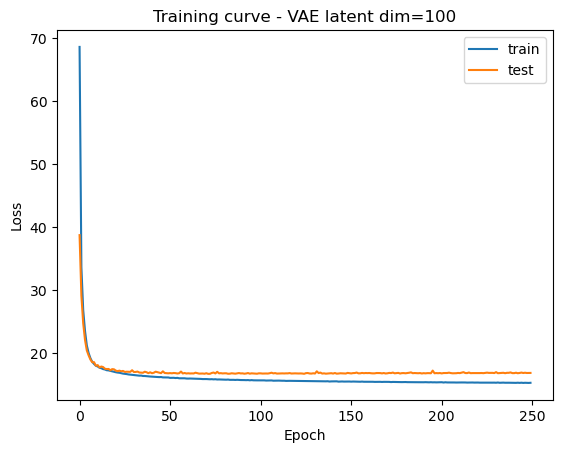

In [16]:
plt.title(f"Training curve - VAE latent dim={100}")
plt.plot(train_losses, label='train')
plt.plot(test_losses, label='test')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()

## Another VAE code

100%|██████████| 170M/170M [00:03<00:00, 43.7MB/s]
Epoch 1/20: 100%|██████████| 391/391 [00:11<00:00, 34.63it/s]


Epoch 1: Total=5274906.47, Recon=5273223.61, KL=22438069.07


Epoch 2/20: 100%|██████████| 391/391 [00:09<00:00, 41.61it/s]


Epoch 2: Total=4203206.42, Recon=4201354.85, KL=24687697.29


Epoch 3/20: 100%|██████████| 391/391 [00:09<00:00, 39.35it/s]


Epoch 3: Total=4023071.27, Recon=4021234.08, KL=24495935.40


Epoch 4/20: 100%|██████████| 391/391 [00:10<00:00, 36.98it/s]


Epoch 4: Total=3914220.09, Recon=3912376.88, KL=24576303.74


Epoch 5/20: 100%|██████████| 391/391 [00:09<00:00, 39.52it/s]


Epoch 5: Total=3834449.36, Recon=3832601.03, KL=24644403.77


Epoch 6/20: 100%|██████████| 391/391 [00:09<00:00, 39.54it/s]


Epoch 6: Total=3798413.81, Recon=3796585.59, KL=24376328.54


Epoch 7/20: 100%|██████████| 391/391 [00:09<00:00, 40.40it/s]


Epoch 7: Total=3780648.88, Recon=3778836.07, KL=24170798.78


Epoch 8/20: 100%|██████████| 391/391 [00:09<00:00, 40.91it/s]


Epoch 8: Total=3770061.95, Recon=3768261.85, KL=24001302.07


Epoch 9/20: 100%|██████████| 391/391 [00:09<00:00, 39.67it/s]


Epoch 9: Total=3759498.59, Recon=3757701.70, KL=23958447.43


Epoch 10/20: 100%|██████████| 391/391 [00:09<00:00, 39.67it/s]


Epoch 10: Total=3751496.66, Recon=3749709.55, KL=23828313.89


Epoch 11/20: 100%|██████████| 391/391 [00:09<00:00, 39.33it/s]


Epoch 11: Total=3743579.18, Recon=3741794.43, KL=23796757.95


Epoch 12/20: 100%|██████████| 391/391 [00:09<00:00, 39.56it/s]


Epoch 12: Total=3737650.70, Recon=3735872.61, KL=23707849.31


Epoch 13/20: 100%|██████████| 391/391 [00:09<00:00, 41.51it/s]


Epoch 13: Total=3733403.98, Recon=3731625.82, KL=23708612.40


Epoch 14/20: 100%|██████████| 391/391 [00:09<00:00, 39.46it/s]


Epoch 14: Total=3728756.53, Recon=3726977.77, KL=23716788.74


Epoch 15/20: 100%|██████████| 391/391 [00:09<00:00, 39.83it/s]


Epoch 15: Total=3725034.48, Recon=3723255.86, KL=23714797.91


Epoch 16/20: 100%|██████████| 391/391 [00:09<00:00, 39.38it/s]


Epoch 16: Total=3721021.37, Recon=3719246.38, KL=23666494.43


Epoch 17/20: 100%|██████████| 391/391 [00:10<00:00, 38.23it/s]


Epoch 17: Total=3717802.49, Recon=3716024.78, KL=23702855.98


Epoch 18/20: 100%|██████████| 391/391 [00:09<00:00, 40.50it/s]


Epoch 18: Total=3715478.64, Recon=3713699.99, KL=23715247.66


Epoch 19/20: 100%|██████████| 391/391 [00:09<00:00, 40.11it/s]


Epoch 19: Total=3712068.10, Recon=3710292.17, KL=23679109.08


Epoch 20/20: 100%|██████████| 391/391 [00:10<00:00, 38.81it/s]


Epoch 20: Total=3709730.31, Recon=3707951.08, KL=23723031.64


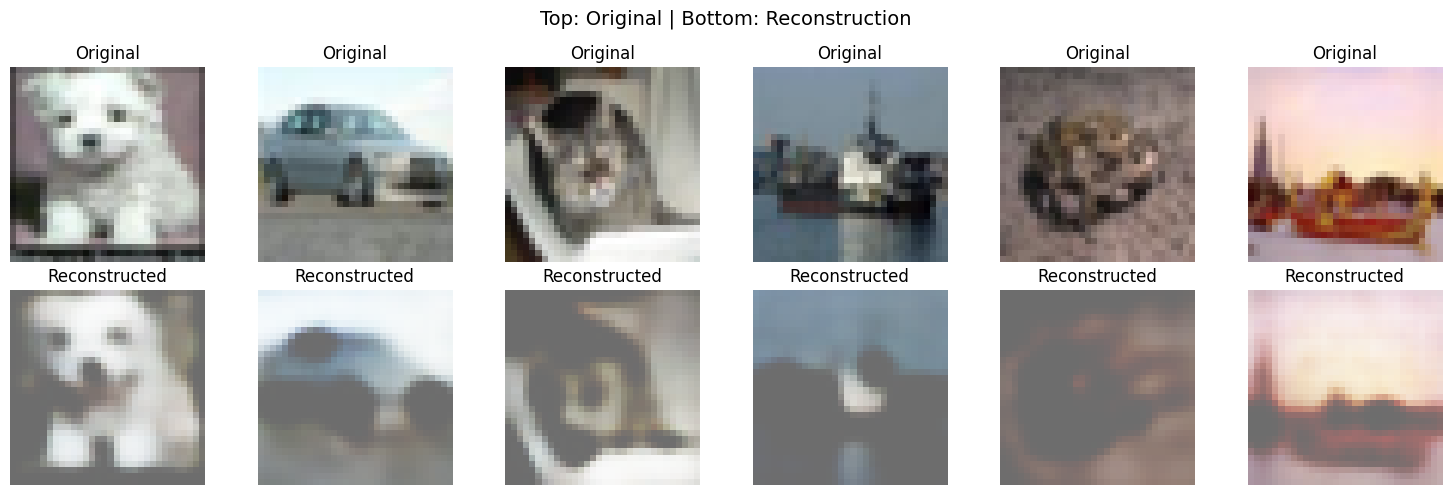

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import numpy as np
from tqdm import tqdm

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Parameters
latent_dim = 100
learning_rate = 1e-3
batch_size = 128
epochs = 20
kl_weight = 0.000075

# CIFAR-10 loader
transform = transforms.ToTensor()
train_set = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)

# === VAE Model ===
class Reshape(nn.Module):
    def __init__(self, *args):
        super(Reshape, self).__init__()
        self.shape = args
    def forward(self, x):
        return x.view(x.size(0), *self.shape)

class Trim(nn.Module):
    def __init__(self):
        super(Trim, self).__init__()
    def forward(self, x):
        return x[:, :, :32, :32]

class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.flatten = nn.Flatten()

        self.fc_mu = nn.Linear(128 * 4 * 4, latent_dim)
        self.fc_logvar = nn.Linear(128 * 4 * 4, latent_dim)

        self.fc_decode = nn.Linear(latent_dim, 128 * 4 * 4)
        self.reshape = Reshape(128, 4, 4)

        self.deconv1 = nn.ConvTranspose2d(128, 64, 3, stride=2)
        self.deconv2 = nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1)
        self.deconv3 = nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1)
        self.trim = Trim()

    def encode(self, x):
        x = F.silu(self.conv1(x))
        x = F.silu(self.conv2(x))
        x = F.silu(self.conv3(x))
        x = self.flatten(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        eps = torch.randn_like(mu)
        return mu + eps * torch.exp(0.5 * logvar)

    def decode(self, z):
        x = self.fc_decode(z)
        x = self.reshape(x)
        x = F.silu(self.deconv1(x))
        x = F.silu(self.deconv2(x))
        x = F.silu(self.deconv3(x))
        x = self.trim(x)
        return torch.sigmoid(x)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss(reduction='sum')

# === VAE Loss ===
def vae_loss(recon_x, x, mu, logvar):
    recon_loss = criterion(recon_x, x)
    kl_loss = torch.sum(-0.5 * (1 + logvar - mu.pow(2) - logvar.exp()))
    total_loss = recon_loss + kl_weight * kl_loss
    return total_loss, recon_loss, kl_loss

# === Training ===
for epoch in range(epochs):
    model.train()
    total_loss, recon_sum, kl_sum = 0.0, 0.0, 0.0
    for x, _ in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        x = x.to(device)
        optimizer.zero_grad()
        recon_x, mu, logvar = model(x)
        loss, recon_loss, kl_loss = vae_loss(recon_x, x, mu, logvar)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        recon_sum += recon_loss.item()
        kl_sum += kl_loss.item()

    print(f"Epoch {epoch+1}: Total={total_loss:.2f}, Recon={recon_sum:.2f}, KL={kl_sum:.2f}")

# === Visualize Reconstruction ===
X_vis = next(iter(train_loader))[0][:6].to(device)
with torch.no_grad():
    recon_vis, _, _ = model(X_vis)

fig, axs = plt.subplots(2, 6, figsize=(15, 5))
for i in range(6):
    axs[0][i].imshow(X_vis[i].permute(1, 2, 0).cpu())
    axs[0][i].set_title("Original")
    axs[0][i].axis("off")
    axs[1][i].imshow(recon_vis[i].permute(1, 2, 0).cpu())
    axs[1][i].set_title("Reconstructed")
    axs[1][i].axis("off")

plt.suptitle("Top: Original | Bottom: Reconstruction", fontsize=14)
plt.tight_layout()
plt.show()
